In [1]:
import numpy as np
import gym
from gym import spaces
import random
import matplotlib.pyplot as plt
import optuna

In [2]:
class MysticForestExplorer(gym.Env):
    def __init__(self):
        super(MysticForestExplorer, self).__init__()

        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)

        self.state = 0
        self.reward_table = {
            'trap': -30,
            'witch': -50,
            'bear': -20,
            'fairy_fountain': 5,
            'treasure': 20,
            'wishing_well': 40,
            'gold': 25,
            'castle_base': 400
        }

        self.forest_elements = {
            2: 'trap',
            8: 'trap',
            10: 'witch',
            12: 'bear',
            21: 'bear',
            6: 'fairy_fountain',
            18: 'wishing_well',
            16: 'treasure',
            19: 'gold',
            23: 'gold',
            24: 'castle_base'
        }

    def step(self, action):
        if action == 0: # Up
            if self.state >= 5:
                self.state -= 5
        elif action == 1: # Down
            if self.state <= 19:
                self.state += 5
        elif action == 2: # Right
            if self.state % 5 != 4:
                self.state += 1
        elif action == 3: # Left
            if self.state % 5 != 0:
                self.state -= 1

        reward = 0
        done = False
        
        if self.state in self.forest_elements:
            element = self.forest_elements[self.state]
            reward = self.reward_table[element]

            if element == 'castle_base':
                done = True

        return self.state, reward, done

    def reset(self):
        self.state = 0
        return self.state

    def render(self):
        grid = np.zeros((5, 5))

        for key, value in self.forest_elements.items():
            row, col = divmod(key, 5)
            if value == 'trap':
                grid[row, col] = 1
            elif value == 'witch':
                grid[row, col] = 2
            elif value == 'bear':
                grid[row, col] = 8
            elif value == 'fairy_fountain':
                grid[row, col] = 3
            elif value == 'wishing_well':
                grid[row, col] = 7
            elif value == 'treasure':
                grid[row, col] = 4
            elif value == 'gold':
                grid[row, col] = 9
            elif value == 'castle_base':
                grid[row, col] = 5

        explorer_row, explorer_col = divmod(self.state, 5)
        grid[explorer_row, explorer_col] = 6

        fig, ax = plt.subplots()
        cmap = plt.cm.get_cmap('Paired', 10)
        ax.imshow(grid, cmap=cmap)

        legend_elements = [
            plt.Line2D([0], [0], marker='o', color=cmap(1), label='Trap', markersize=10),
            plt.Line2D([0], [0], marker='o', color=cmap(2), label='Witch', markersize=10),
            plt.Line2D([0], [0], marker='o', color=cmap(8), label='Bear', markersize=10),
            plt.Line2D([0], [0], marker='o', color=cmap(3), label='Fairy Fountain', markersize=10),
            plt.Line2D([0], [0], marker='o', color=cmap(7), label='Wishing Well', markersize=10),
            plt.Line2D([0], [0], marker='o', color=cmap(4), label='Treasure', markersize=10),
            plt.Line2D([0], [0], marker='o', color=cmap(9), label='Gold', markersize=10),
            plt.Line2D([0], [0], marker='o', color=cmap(5), label='Castle Base', markersize=10),
            plt.Line2D([0], [0], marker='o', color=cmap(6), label='Explorer', markersize=10),
        ]

        ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

        for i in range(5):
            for j in range(5):
                if (i, j) == (explorer_row, explorer_col):
                    text = 'E'
                else:
                    text = ''
                ax.text(j, i, text, ha='center', va='center', color='black')

        plt.show()

C:\Users\karti\AppData\Local\Temp\ipykernel_18276\600712846.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Paired', 10)


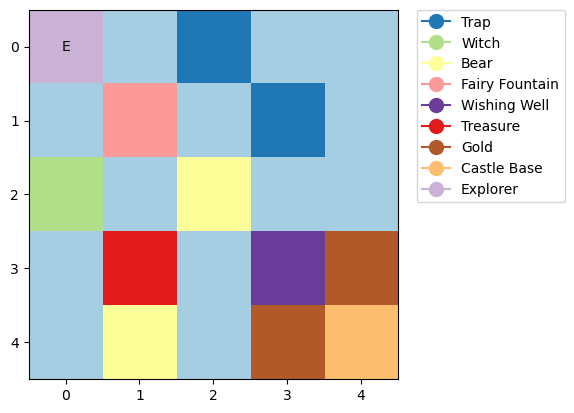

Step: 1
State: 1
Action: 2
Reward: 0
Current grid:


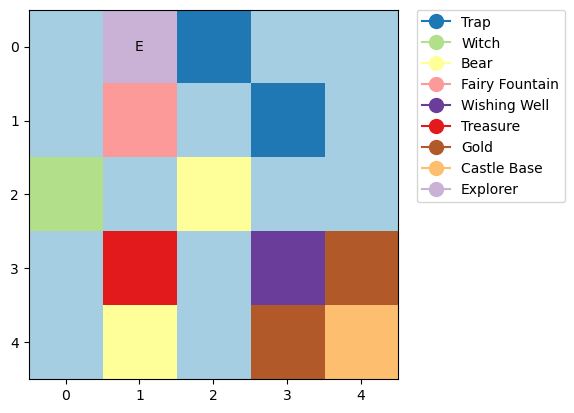


Step: 2
State: 6
Action: 1
Reward: 5
Current grid:


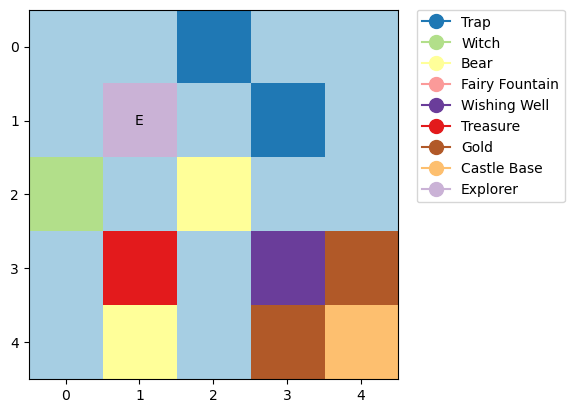


Step: 3
State: 7
Action: 2
Reward: 0
Current grid:


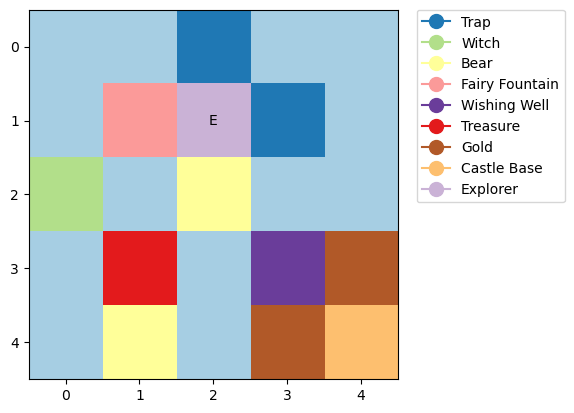


Step: 4
State: 12
Action: 1
Reward: -20
Current grid:


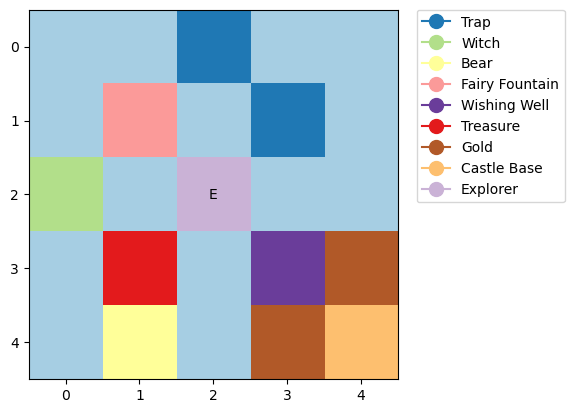


Step: 5
State: 17
Action: 1
Reward: 0
Current grid:


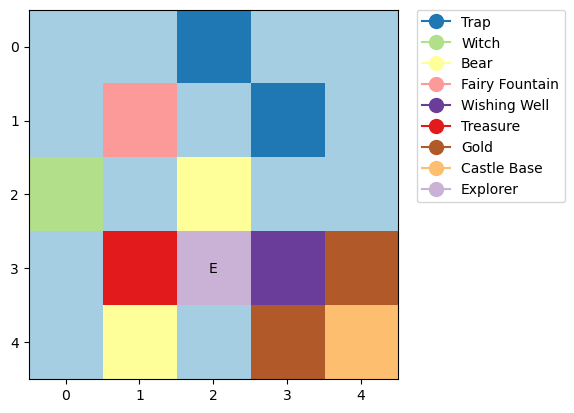


Step: 6
State: 16
Action: 3
Reward: 20
Current grid:


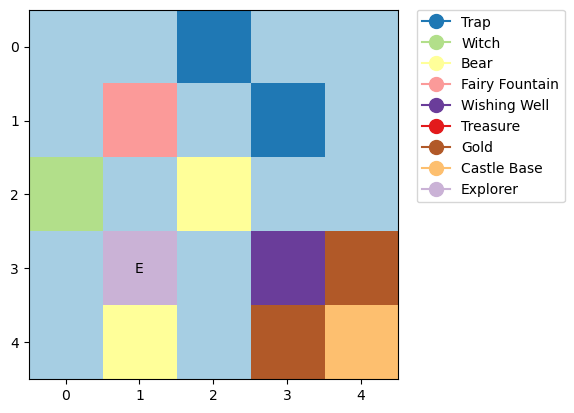


Step: 7
State: 17
Action: 2
Reward: 0
Current grid:


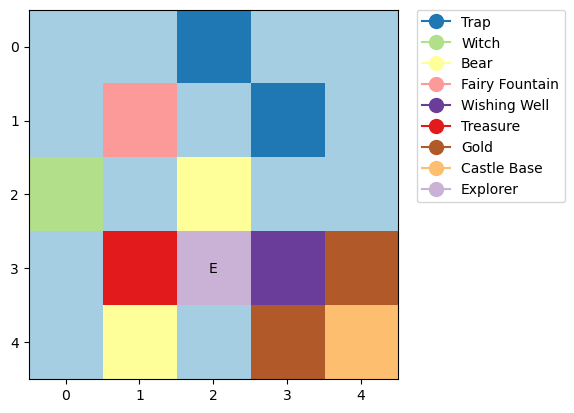


Step: 8
State: 12
Action: 0
Reward: -20
Current grid:


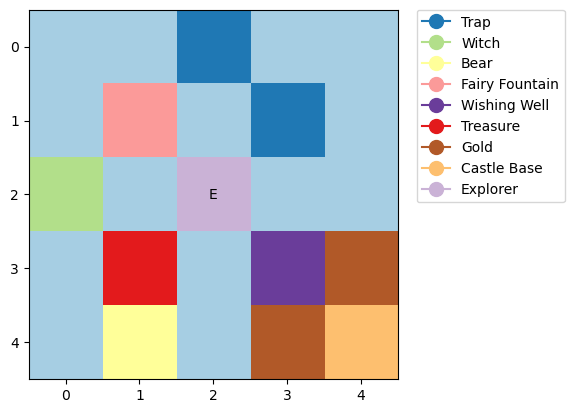


Step: 9
State: 11
Action: 3
Reward: 0
Current grid:


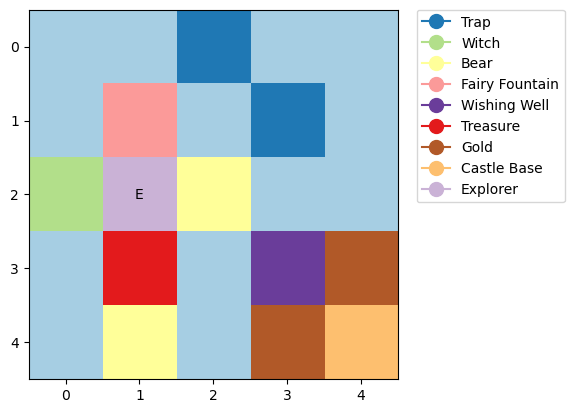


Step: 10
State: 16
Action: 1
Reward: 20
Current grid:


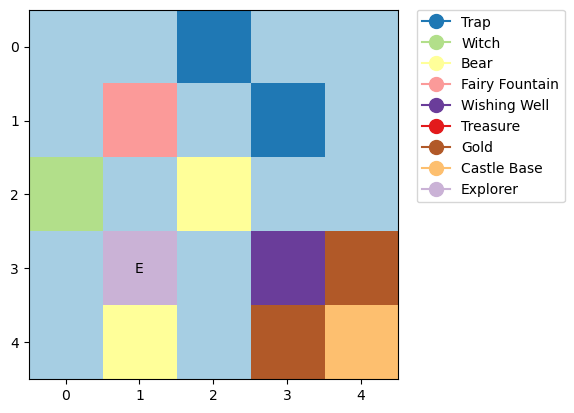


Step: 11
State: 21
Action: 1
Reward: -20
Current grid:


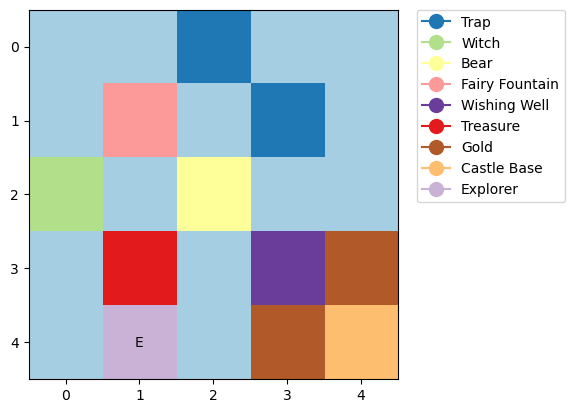


Step: 12
State: 22
Action: 2
Reward: 0
Current grid:


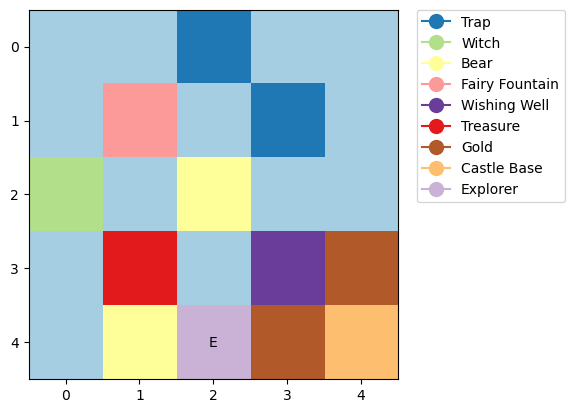

In [3]:
env = MysticForestExplorer()
env.render()
for t in range(12):
    action = env.action_space.sample()
    state, reward, done = env.step(action)
    
    print(f"Step: {t+1}")
    print(f"State: {state}")
    print(f"Action: {action}")
    print(f"Reward: {reward}")
    print(f"Current grid:")
    env.render()
    print()

    if done:
        env.reset()
        print("Reached the goal! Resetting the environment.\n")

In [4]:
# Helper Functions
def choose_action(q_table, state, epsilon, n_actions):
    if np.random.uniform(0,1) < epsilon:
        return np.random.choice(n_actions)
    else:
        return np.argmax(q_table[state])

def plot_rewards(rewards, title):
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title(title)
    plt.show()
    
def plot_epsilon_decay(num_episodes,epsilon_values):
    plt.figure()
    plt.plot(range(num_episodes), epsilon_values)
    plt.title("Epsilon Decay over Episodes")
    plt.xlabel("Episode")
    plt.ylabel("Epsilon")
    plt.show()
    
    
def plot2_rewards(rewards_list, labels, title):
    for rewards, label in zip(rewards_list, labels):
        plt.plot(rewards, label=label)

    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title(title)
    plt.legend()
    plt.show()

def evaluate_policy(env, q_table, num_episodes=10, max_timesteps=10):
    rewards_per_episode = []
    
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        for timestep in range(max_timesteps):
            action = np.argmax(q_table[state])  # Greedy action
            next_state, reward, done = env.step(action)

            state = next_state
            total_reward += reward

            if done:
                break

        rewards_per_episode.append(total_reward)

    return rewards_per_episode

def run_best_episode(env, q_table, max_timesteps=10):
    state = env.reset()
    done = False
    total_reward = 0

    for timestep in range(max_timesteps):
        env.render()  
        action = np.argmax(q_table[state])  
        next_state, reward, done = env.step(action)
        
        total_reward += reward
        
        if done:
            env.render()
            break
        
        state = next_state
    print(f"Episode done with total reward: {total_reward}")

In [5]:
def sarsa(env, num_episodes, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay, max_timesteps):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    epsilon_values = []
    rewards_per_episode = []
    
    print("Initial Q-table:")
    print(q_table)
    
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        epsilon = max(epsilon_min, epsilon_start * (epsilon_decay ** episode))
        epsilon_values.append(epsilon) 
        action = choose_action(q_table, state, epsilon, env.action_space.n)

        for timestep in range(max_timesteps):
            next_state, reward, done = env.step(action)
            next_action = choose_action(q_table, next_state, epsilon, env.action_space.n)

            q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[next_state, next_action] - q_table[state, action])

            state = next_state
            action = next_action
            total_reward += reward

            if done:
                break

        rewards_per_episode.append(total_reward)
    
    print("Trained Q-table:")
    print(q_table)
    
    plot_epsilon_decay(num_episodes,epsilon_values)
    return q_table, rewards_per_episode

For Gamma: 0.5
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-9.62244804e-02  1.96661055e+00  1.34513038e-01 -2.94991358e-02]
 [-1.74451148e+00  6.20909835e+00 -2.69033951e+01  1.22582332e-01]
 [-1.71401674e+01 -1.88590470e-01 -1.35000000e-01 -3.18975862e-01]
 [ 0.00000000e+00 -5.70000000e+00  0.00000000e+00 -6.21585000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.52023945e-01 -3.75608444e+01  6.32243690e+00  1.03633872e+00]
 [-3.35727536e-02  5.89569265e+00 -8.12400085e-01 -1.63994634e+00]
 [-1.10663295e+01 -1.13276946e+01 -3.00000000e+00  4.54681199e+00]
 [-1.50000000e-01  1.05126732e+00  0.00

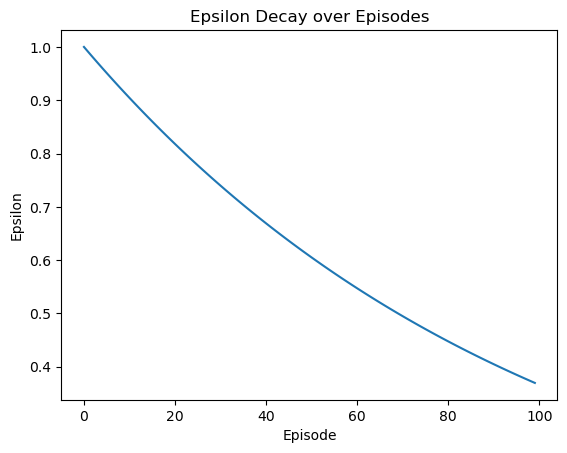

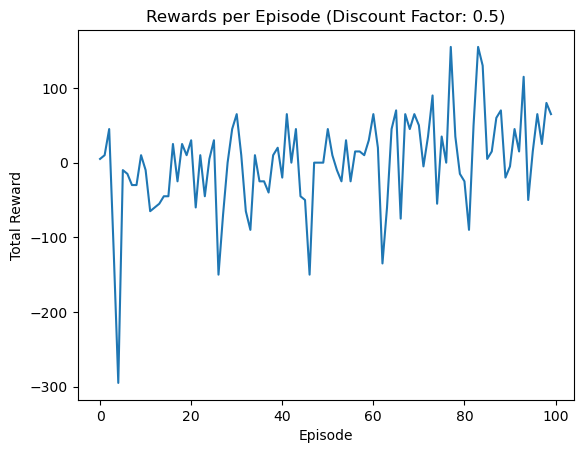

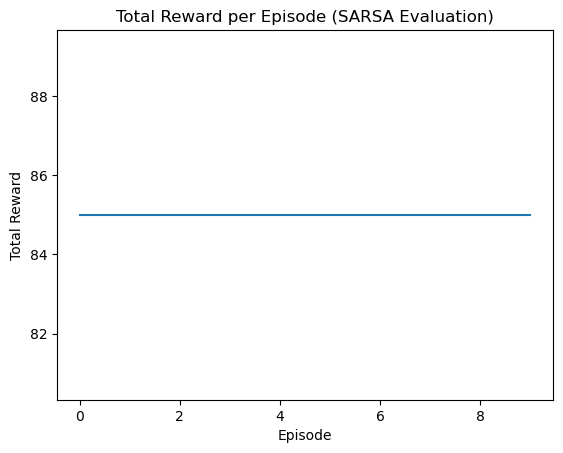

For Gamma: 0.8
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ -0.35412947  -0.98959537   0.69182254  -0.80007121]
 [  0.99283222   5.86782858 -25.2335731   -0.54115329]
 [-10.33764743  -0.79995836  -0.28602058  -1.23572553]
 [ -1.19982375  -5.7          0.         -10.3850401 ]
 [  0.           0.           0.           0.        ]
 [ -0.29582648 -44.6111867    5.52165071  -5.37333328]
 [ -2.9387051   -1.52368636   0.88739917  -6.16963468]
 [-12.66681658  -9.2619599  -12.26492472   4.70614117]
 [ -0.58903399   0.           0.           0.56787805]
 [  0.           0.          -0.24        -5.7       ]
 [ -6.33631595   0.073253

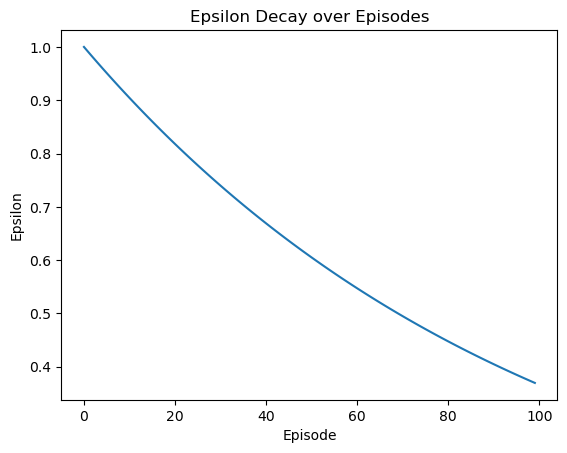

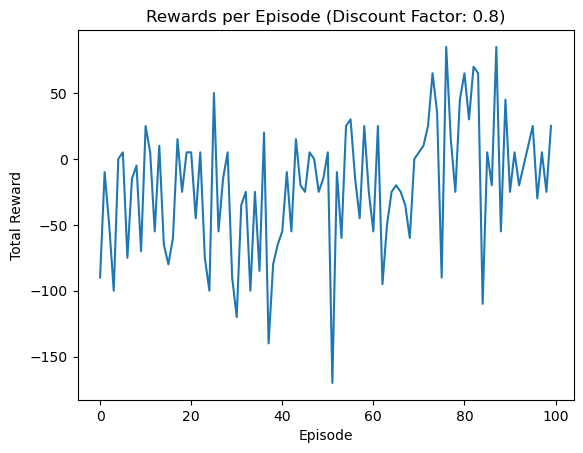

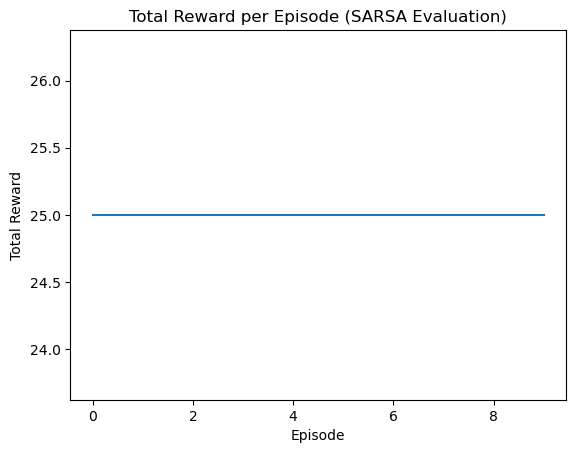

For Gamma: 0.99
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-1.68086681e+00 -2.21599790e+00  2.54205998e+00 -9.25628527e-01]
 [-6.19484801e-01  7.50358400e+00 -2.76366398e+01 -1.13783737e+00]
 [-1.23276091e+01 -2.40037620e+00 -1.60530571e+00 -2.23792438e+00]
 [-1.42950294e+00 -3.00000000e+00  0.00000000e+00 -1.61720649e+01]
 [ 0.00000000e+00 -8.31600000e-01  0.00000000e+00  0.00000000e+00]
 [-5.09145770e-01 -4.22030646e+01  6.67744904e+00  1.57745345e+00]
 [-7.53107938e-01  1.13519841e+01 -1.74159035e+00 -4.37093560e+00]
 [-1.34639593e+01 -7.78184970e+00 -1.56510930e+01  3.36080539e+00]
 [-1.23443752e+00  0.00000000e+00  0.0

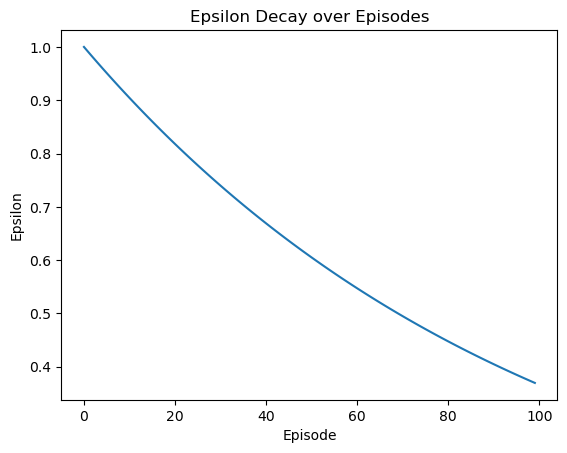

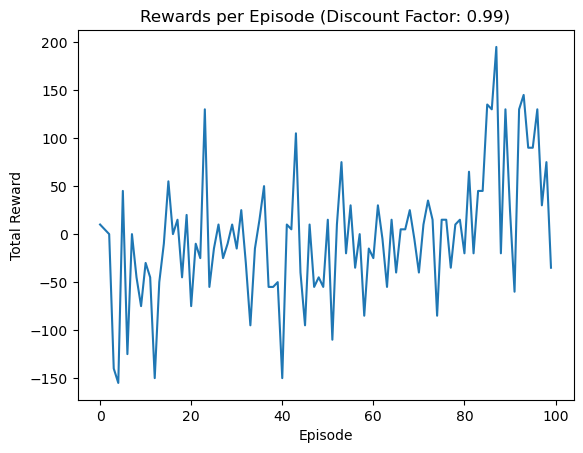

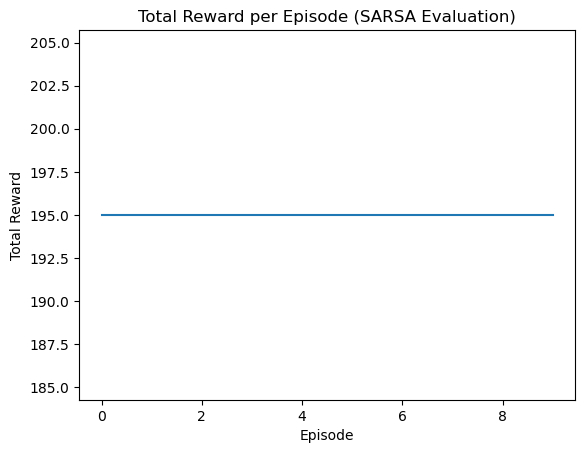

In [6]:
gammas = [0.5, 0.8, 0.99]
for gamma in gammas:
    print(f"For Gamma: {gamma}")
    q_table, rewards = sarsa(env, num_episodes=100, alpha=0.1, gamma=gamma, epsilon_start=1.0, epsilon_min=0.01, epsilon_decay=0.99, max_timesteps=10)
    plot_rewards(rewards, f"Rewards per Episode (Discount Factor: {gamma})")
    
    eval_rewards = evaluate_policy(env, q_table, num_episodes=10, max_timesteps=10)
    plot_rewards(eval_rewards, "Total Reward per Episode (SARSA Evaluation)")

Decay Rate: 0.9
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 7.51195032e-02 -1.23023828e-01  6.44908897e+01  3.61490330e-01]
 [ 3.76242939e+00  7.27918142e+01 -1.93222635e+01  6.98518125e-01]
 [-3.00000000e+00  1.31779172e+00  0.00000000e+00 -5.19750000e-01]
 [ 0.00000000e+00 -3.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.32307899e-02 -1.35500000e+01  1.44585601e+01  4.01836545e-02]
 [ 7.00672840e+01  1.98000000e-01  1.32635002e+00  1.45100147e-01]
 [-2.99509950e+00 -2.00000000e+00 -3.00000000e+00  7.50847358e+00]
 [ 0.00000000e+00  0.00000000e+00  0.0

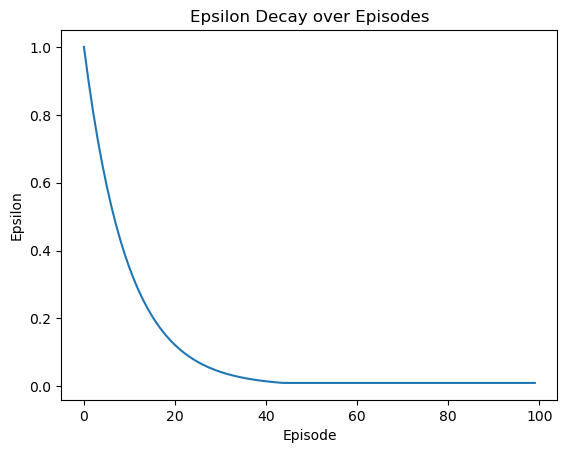

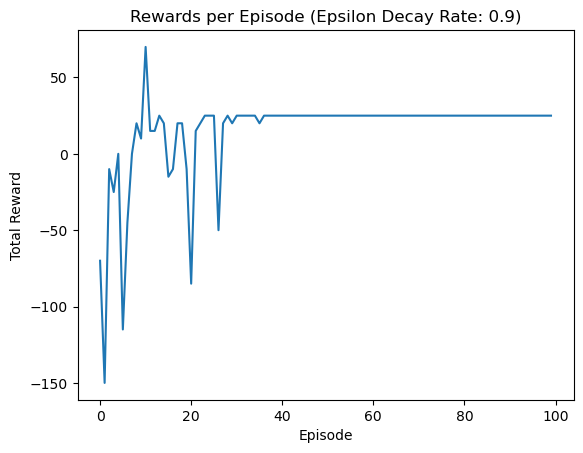

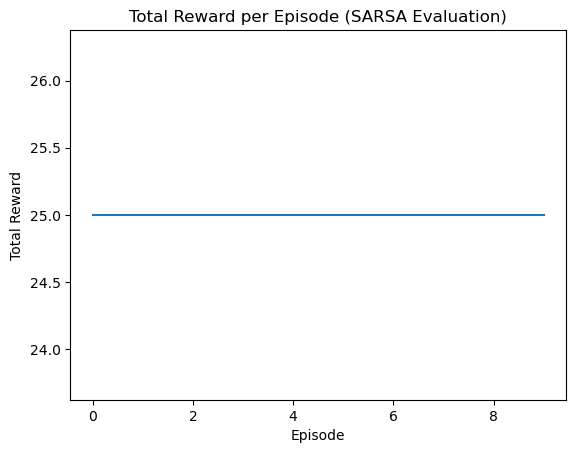

Decay Rate: 0.99
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-3.14491968e+00 -5.69138653e+00  1.46372413e+00 -2.35241277e+00]
 [-4.10194731e+00  8.33425040e+00 -2.80686513e+01 -1.69708680e+00]
 [-1.03573671e+01 -5.02414035e-01 -7.08973987e-01 -4.50595728e-01]
 [-2.97000000e-01 -8.15381643e+00  0.00000000e+00 -5.71736218e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.24050694e-01 -4.22097809e+01  8.49002208e+00 -4.11205891e+00]
 [-1.65449673e+00  1.20994983e+01 -1.16046608e+00 -5.47521441e-01]
 [-1.23361158e+01 -5.94735798e+00 -1.57095681e+01  5.12400867e+00]
 [-5.66919807e-01  1.18120313e+00 -2.

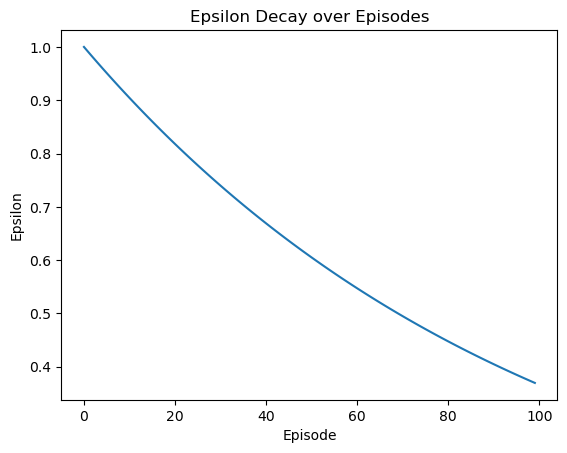

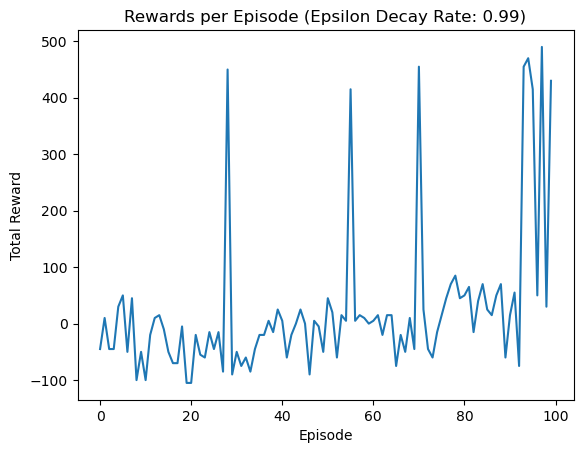

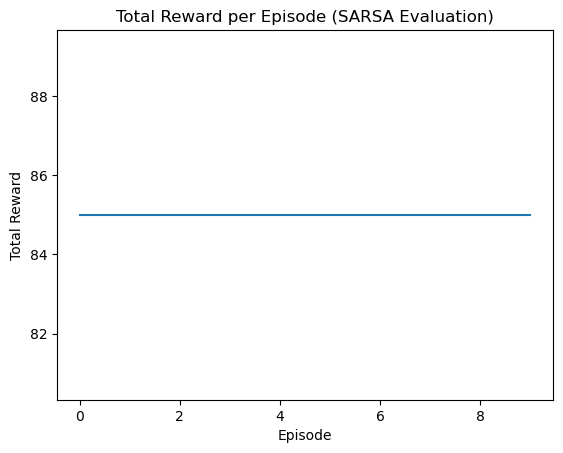

Decay Rate: 0.999
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-10.48042881 -21.78488905  -7.38293922 -11.55453796]
 [ -7.23640662   1.57702071 -42.01561644  -8.9329604 ]
 [-30.59854638  -7.2468785   -2.04386294  -9.53142688]
 [ -1.52346647 -12.39168506  -0.07409826 -17.40679687]
 [  0.           0.           0.          -1.76956301]
 [ -9.54529089 -52.44787009   0.21150002  -9.6146105 ]
 [ -8.94889977  -3.94061962  -9.55109308 -10.82373392]
 [-26.70274244  -9.385353   -10.317        0.98976417]
 [ -2.17009731   0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ -9.06798339  -0.779

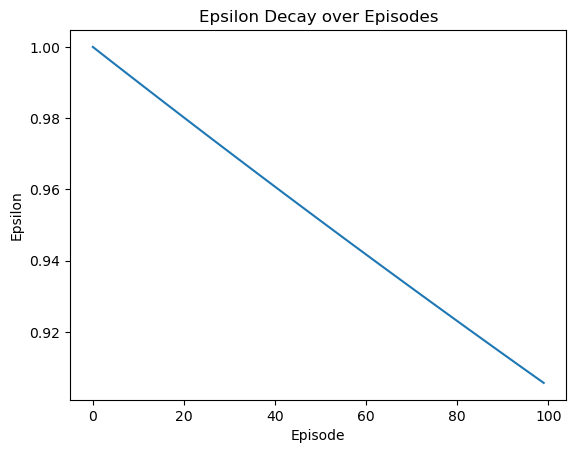

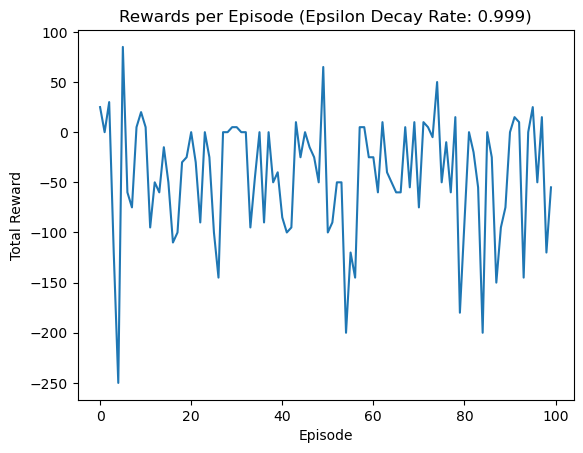

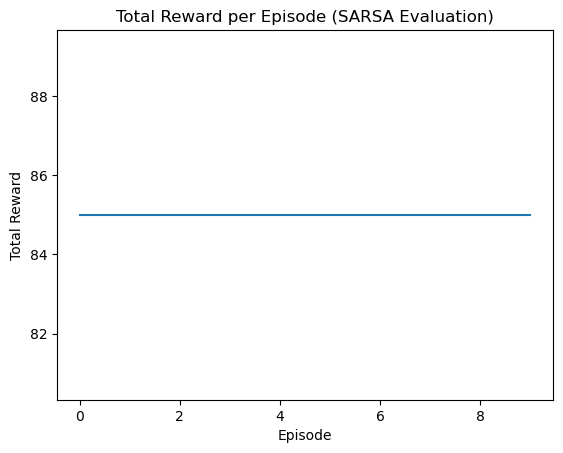

In [7]:
decay_rates = [0.9, 0.99, 0.999]
for decay_rate in decay_rates:
    print(f"Decay Rate: {decay_rate}")
    q_table, rewards = sarsa(env, num_episodes=100, alpha=0.1, gamma=0.99, epsilon_start=1.0, epsilon_min=0.01, epsilon_decay=decay_rate, max_timesteps=10)
    plot_rewards(rewards, f"Rewards per Episode (Epsilon Decay Rate: {decay_rate})")
    
    eval_rewards = evaluate_policy(env, q_table, num_episodes=10, max_timesteps=10)
    plot_rewards(eval_rewards, "Total Reward per Episode (SARSA Evaluation)")

In [35]:
def objective(trial):
    alpha = trial.suggest_uniform('alpha', 0.1, 1)
    gamma = trial.suggest_uniform('gamma', 0.1, 1)
    epsilon_start = 1
    epsilon_min = 0.1
    epsilon_decay = trial.suggest_uniform('epsilon_decay', 0.87, 0.999)
    num_episodes=100
    max_timesteps = trial.suggest_int('max_timesteps',8,25)
    algo = "sarsa"
    env = MysticForestExplorer()
    
    if algo == "sarsa":
        _, rewards_per_episode = sarsa(env, num_episodes, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay, max_timesteps)
    else:
        _, rewards_per_episode = q_learning(env, num_episodes, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay, max_timesteps)
        
    mean_reward = np.mean(rewards_per_episode)
    
    return -mean_reward

[I 2023-11-09 09:34:46,980] A new study created in memory with name: no-name-a6b9d38e-9ac7-4332-951f-a6be764d54c3
C:\Users\karti\AppData\Local\Temp\ipykernel_18276\4010232659.py:2: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.1, 1)
C:\Users\karti\AppData\Local\Temp\ipykernel_18276\4010232659.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  gamma = trial.suggest_uniform('gamma', 0.1, 1)
C:\Users\karti\AppData\Local\Temp\ipykernel_18276\4010232659.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  epsilon_decay = trial.su

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.60264433  -4.78022594  11.86649673   5.30487492]
 [ 10.92695449  16.31830631 -26.89684017   1.68113975]
 [-23.01513292   0.          -5.72965442   3.70462636]
 [  0.           0.           0.         -23.44137905]
 [  0.           0.           0.           0.        ]
 [  0.         -46.59007249  18.45110054   4.26832968]
 [  3.61280245  30.2092929   -3.57011564   4.22451137]
 [-11.53365087 -17.18504904 -18.74509914   4.53947956]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ -4.15113539   4.40306049   0.        

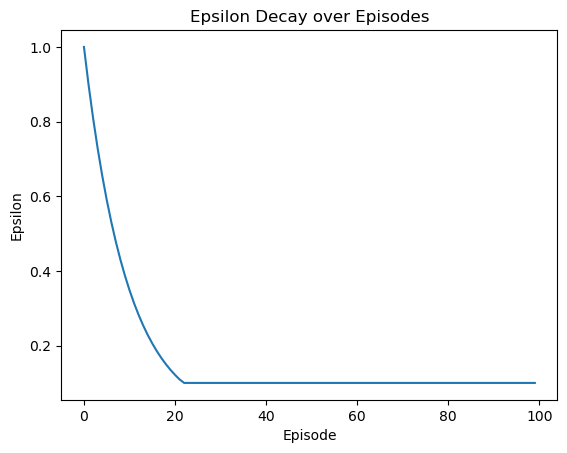

[I 2023-11-09 09:34:47,312] Trial 0 finished with value: -407.0 and parameters: {'alpha': 0.3874941944018938, 'gamma': 0.5598284913133967, 'epsilon_decay': 0.8999660863213411, 'max_timesteps': 25}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-2.57011239e+00 -3.37731149e+00  1.29054276e+01 -1.26884374e+01]
 [ 7.34827044e+00  1.98698519e+01 -3.20636953e+01 -1.05497943e-02]
 [-2.97187041e+01 -2.05259922e+00  0.00000000e+00 -1.57683986e+00]
 [-1.81123488e+01 -3.61489209e+01  0.00000000e+00 -3.54570171e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.33340046e+01 -2.13890192e+01 -6.31368648e+00 -2.84305244e+00]
 [ 7.10864599e+00  5.20499120e+01  8.67493010e+00 -2.75527761e+00]
 [-4.44362777e+01 -1.95642831e+01 -3.00129969e+01  4.23274993e+01]
 [-1.75416643e+01 -1.91052877e+01 -1.46249318e+01 -5.4

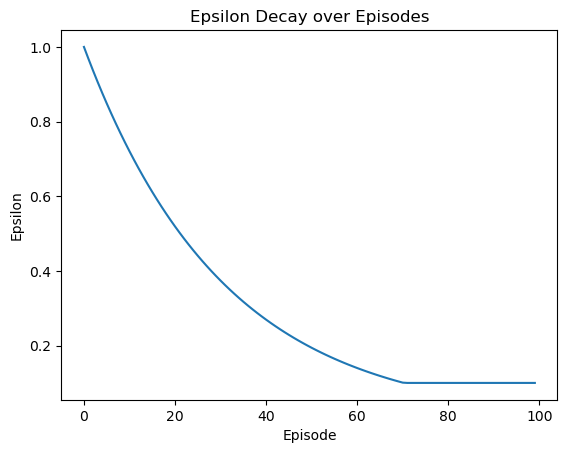

[I 2023-11-09 09:34:47,674] Trial 1 finished with value: -185.45 and parameters: {'alpha': 0.8807715103814865, 'gamma': 0.6284143257107245, 'epsilon_decay': 0.9677444664961591, 'max_timesteps': 17}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  7.02788276  -4.15885346  13.51650639   1.64884267]
 [ -9.76474969  14.84056088 -26.73827843   2.93056757]
 [-14.54764227  -7.19871342   0.           0.        ]
 [  0.           0.           0.         -19.25407589]
 [  0.           0.           0.           0.        ]
 [ -1.4610647  -48.42916634  19.36190559   6.50428122]
 [  4.69864598 -17.12896213  -0.14634573  17.08786183]
 [-22.30300179 -19.20344159 -22.30300179  15.99374799]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [-15.36077375   0.          11.55433539

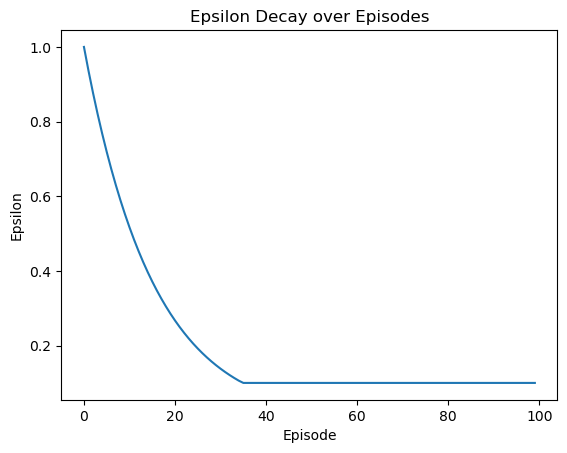

[I 2023-11-09 09:34:47,993] Trial 2 finished with value: -3.05 and parameters: {'alpha': 0.4934759561418868, 'gamma': 0.9182799717766951, 'epsilon_decay': 0.936117264472494, 'max_timesteps': 8}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 4.12732359e-01  1.10496004e+00  2.73814116e+00  1.60945432e-01]
 [ 1.03007088e+00  8.60576347e+00 -2.36709730e+01  1.17780151e-02]
 [-1.65454686e+01 -1.00076416e+00 -1.04556897e+00  2.12292840e-01]
 [-5.97709941e-01 -1.14372838e+01  0.00000000e+00 -1.66072123e+01]
 [-1.08625828e-02  0.00000000e+00  0.00000000e+00 -8.18811188e-01]
 [ 7.14791364e-02 -3.03451248e+01  7.81752113e+00 -9.20570015e-02]
 [-6.76451936e-01  1.11352212e+01 -8.42534905e-01  1.97628130e-01]
 [-1.87672119e+01 -1.23414758e+01 -8.21614350e+00  4.04407940e+00]
 [-1.28190225e-02  0.00000000e+00  0.00000000e+00 -2.3

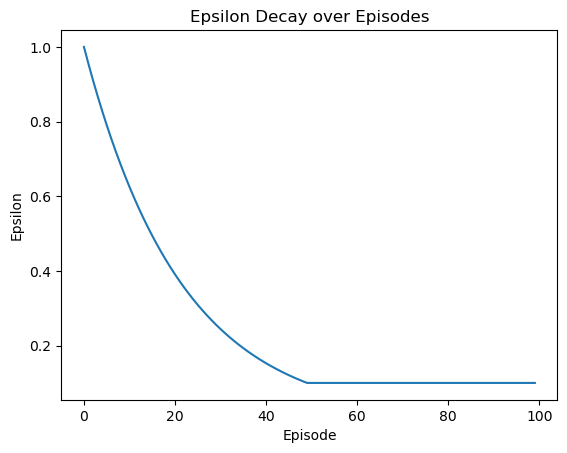

[I 2023-11-09 09:34:48,337] Trial 3 finished with value: -329.6 and parameters: {'alpha': 0.14786823201075486, 'gamma': 0.3625268895492145, 'epsilon_decay': 0.9540921930568811, 'max_timesteps': 23}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-3.45407188e+00  1.89668048e+02  1.97300090e-01  2.49987763e+01]
 [ 5.27969825e+00  1.08370709e+02 -2.73463633e+01 -4.51404318e-01]
 [-1.35112719e+01 -7.02296172e+00 -4.58890196e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.75900534e+00  0.00000000e+00 -1.80884014e+01]
 [-4.21642880e-01 -1.34093696e+00  0.00000000e+00  0.00000000e+00]
 [ 3.49873777e+01 -4.30463650e+01  2.16888171e+02  2.74826682e+00]
 [ 2.00451839e+01  2.48383249e+02  6.63145021e+00  6.36980351e+01]
 [-9.56774229e+00 -8.44532409e+00 -2.02566020e+01  7.38069697e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.1

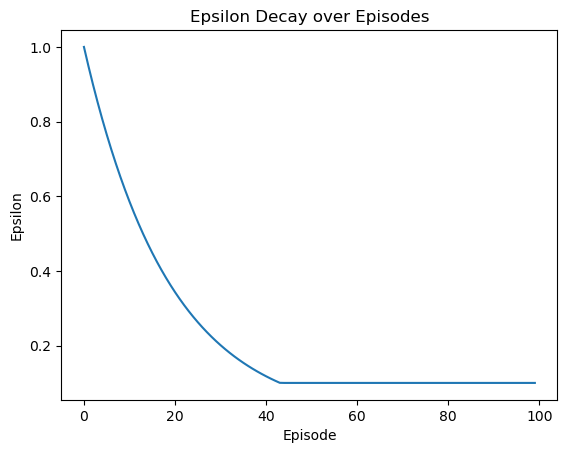

[I 2023-11-09 09:34:48,665] Trial 4 finished with value: -373.9 and parameters: {'alpha': 0.2586335114596373, 'gamma': 0.9013315301298414, 'epsilon_decay': 0.9479240883889781, 'max_timesteps': 19}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.43821230e+02 -1.41167967e+01  1.86805760e+02  5.92077900e+01]
 [ 8.78920708e+01  1.49375326e+02 -1.05062730e+01  2.56008730e+00]
 [-1.14972402e+01  7.48118486e+01 -4.08231399e+00  1.49935700e+02]
 [ 0.00000000e+00 -1.85882626e+01  0.00000000e+00 -1.85882626e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.08190545e+00 -4.31315608e+01  7.11467857e+01 -6.43214289e+00]
 [ 1.05906500e+02  1.39831788e+02  9.09136173e+01 -1.77423774e-01]
 [-1.14972402e+01 -1.25685051e+00 -1.37704848e+01  1.09636310e+02]
 [-4.08231399e+00  1.34873946e+02  0.00000000e+00  0.0

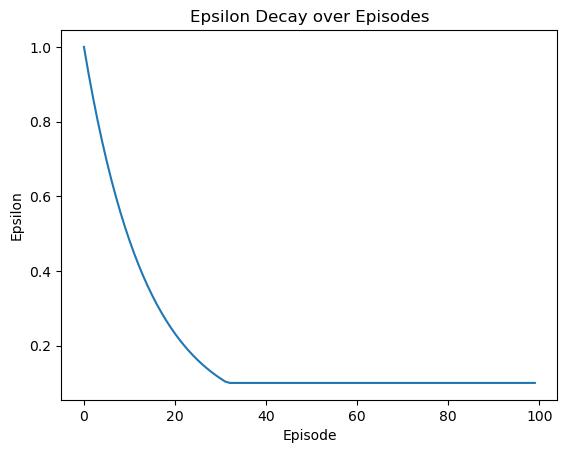

[I 2023-11-09 09:34:49,289] Trial 5 finished with value: -401.3 and parameters: {'alpha': 0.38324133841149344, 'gamma': 0.9264893992112191, 'epsilon_decay': 0.9295248506308683, 'max_timesteps': 20}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.09532699e-05  1.59109835e-05 -1.07530123e-01  2.35842933e-05]
 [ 8.88895650e-03  4.83315909e+00 -2.92476050e+01  6.72575128e-03]
 [-2.97809800e+01 -8.57824660e+00 -4.64048582e+00  5.83062247e-01]
 [-1.98297548e+00 -3.01512332e+01 -2.52048324e-01 -4.09999288e+01]
 [-3.20914451e+00  0.00000000e+00  0.00000000e+00 -7.39754973e-01]
 [-4.64331794e-02 -4.54437450e+01  5.78927386e+00  6.02836396e-01]
 [-6.25221200e-01 -1.70008730e+00 -9.81377936e+00  2.13635455e+00]
 [-2.92174293e+01 -1.99013136e+01 -1.79476453e+01  5.79187860e+00]
 [-3.85901669e+00  1.81157426e+01 -8.25632541e-01 -9.8

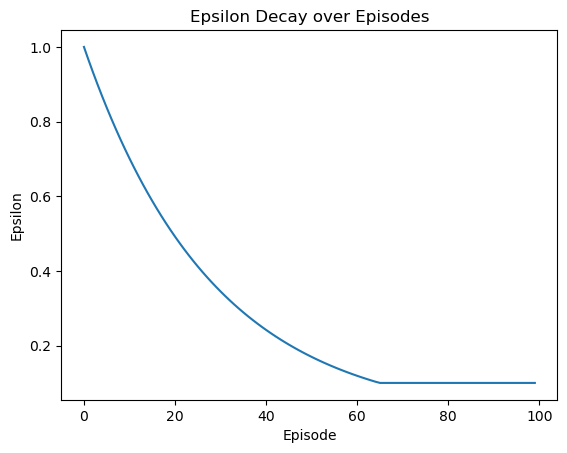

[I 2023-11-09 09:34:49,617] Trial 6 finished with value: -207.95 and parameters: {'alpha': 0.9214593410424412, 'gamma': 0.369759843383794, 'epsilon_decay': 0.9651416937493073, 'max_timesteps': 21}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 4.62457424e-01 -1.50095370e+01  2.49190563e+00 -3.06048085e-02]
 [ 2.69418929e+00  6.03055839e+00 -2.92321365e+01 -1.58366778e-01]
 [-2.21040560e+01 -4.70354453e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.46091481e+01  0.00000000e+00 -1.46091481e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.10177134e-01 -4.93027724e+01  5.81796668e+00  0.00000000e+00]
 [ 2.50328284e+00  2.36331977e-02  1.70741823e+00 -8.89735334e+00]
 [-2.59491565e+01 -1.07644908e+01 -2.79218023e+01  5.75992405e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

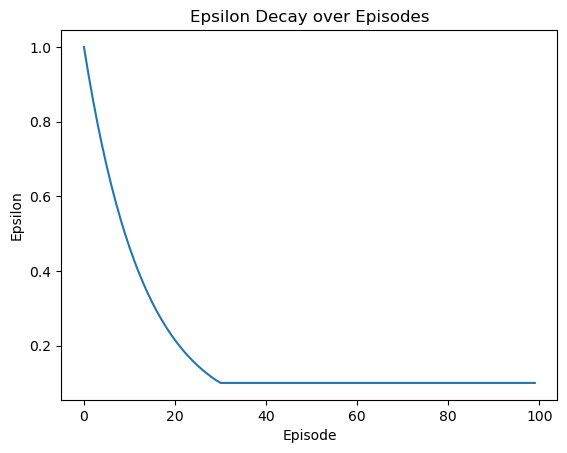

[I 2023-11-09 09:34:49,930] Trial 7 finished with value: -262.95 and parameters: {'alpha': 0.4869716044107597, 'gamma': 0.41643965721441967, 'epsilon_decay': 0.9259270093065277, 'max_timesteps': 13}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-4.01149254e-01 -9.25297979e-01  5.27226039e+00  9.03139877e-01]
 [ 3.58274808e+00  1.06591073e+01 -2.92316055e+01  8.93703578e-01]
 [-3.05247837e+01  3.41728678e+00 -1.47631220e+01 -7.25305516e+00]
 [-1.51411223e+01 -2.99995569e+01  0.00000000e+00 -3.36741926e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.47785340e+01]
 [ 1.84293298e-01 -4.29988073e+01 -5.38486797e+00 -3.66575998e+00]
 [ 3.53111738e+00 -2.06715161e+01  1.14206248e+01 -4.43894353e-01]
 [-3.55330531e+01  2.28652400e+01 -2.88816162e+01 -5.40251597e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.5

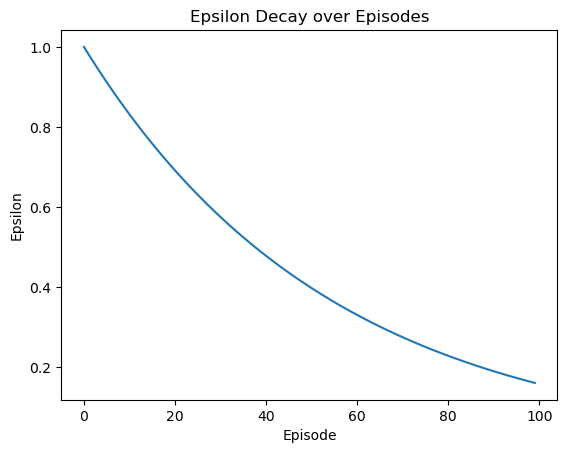

[I 2023-11-09 09:34:50,285] Trial 8 finished with value: -262.7 and parameters: {'alpha': 0.9754652067734408, 'gamma': 0.5177099761117532, 'epsilon_decay': 0.9817345640962358, 'max_timesteps': 22}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-4.88166049e-01 -1.60186992e+01  4.09327370e-01 -5.65111657e-01]
 [-1.01125567e+01 -7.61188216e-01 -3.27238214e+01  5.16031566e-02]
 [-3.54775827e+01 -1.30792937e+01 -1.60467429e+01 -2.27845029e-01]
 [-9.99354776e-01 -3.43027776e+01  2.13685342e+00 -3.57657743e+01]
 [ 3.59052075e+00 -7.92238342e+00  2.20067007e+00 -7.01447414e-01]
 [-1.25672736e+00 -6.83748509e+01  1.99011139e+00  3.46859330e-01]
 [-3.63809901e+00 -2.02456208e+01 -7.62275867e+00 -7.42139268e+00]
 [-3.31192912e+01 -1.40355816e+01 -2.78599869e+01 -4.15112751e-02]
 [-2.87656218e-01  4.12509560e+01 -8.10046894e+00 -2.0

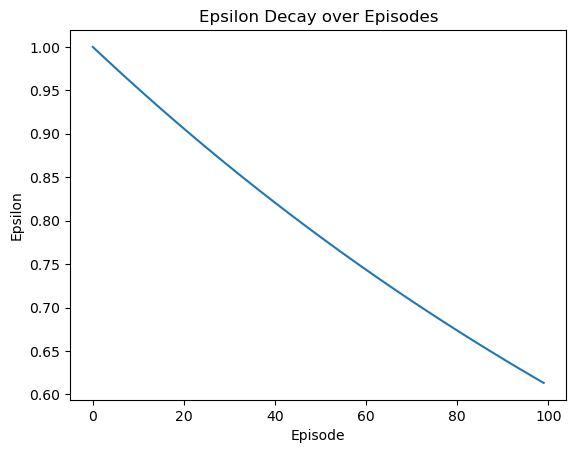

[I 2023-11-09 09:34:50,835] Trial 9 finished with value: -85.3 and parameters: {'alpha': 0.5974505941067478, 'gamma': 0.48365750216557013, 'epsilon_decay': 0.9950716472751224, 'max_timesteps': 21}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.54138958e-07 -3.49821739e+00 -1.81997848e+00  5.92396170e-07]
 [ 5.41008336e-01  5.23668959e+00 -2.90400342e+01  4.47031617e-02]
 [-2.71372365e+01 -1.48769520e-01 -3.51124805e-02  1.54441159e-01]
 [-4.75794494e-01 -2.06197199e+01  0.00000000e+00 -2.90829249e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.34613726e-02 -4.97654900e+01  5.05983876e+00 -7.29895967e-01]
 [ 5.36086308e-01 -2.98963579e+00  3.59782590e-01 -3.50340587e+00]
 [-3.12432252e+01 -1.95838923e+01 -2.99103410e+01  5.18557392e+00]
 [-1.99747985e+00  0.00000000e+00  0.00000000e+00  0.0

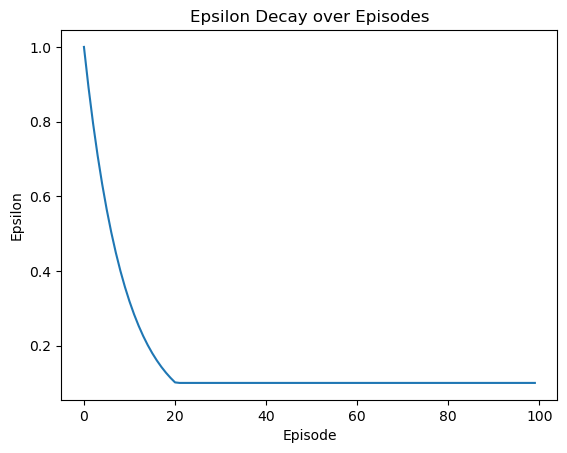

[I 2023-11-09 09:34:51,227] Trial 10 finished with value: -320.05 and parameters: {'alpha': 0.6873239979502552, 'gamma': 0.10736941614213802, 'epsilon_decay': 0.891860282273782, 'max_timesteps': 25}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.49526035   1.04325939   6.07289062   3.61228611]
 [  5.93967573   7.91816417 -24.5021352    4.81166619]
 [ -8.27539916   0.           0.           6.77129119]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.33605429 -45.13629414   8.99658642   1.42230473]
 [  6.34770422   1.96408077  -1.4621075   -3.55174283]
 [-25.17465988 -14.44381611 -26.13520473   9.83793677]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ -8.28346733  10.73286704   0.        

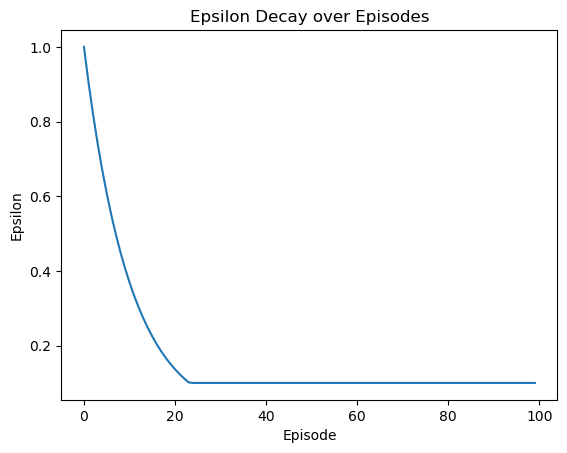

[I 2023-11-09 09:34:51,575] Trial 11 finished with value: -16.9 and parameters: {'alpha': 0.33625532855557144, 'gamma': 0.7514675378754254, 'epsilon_decay': 0.905221481243935, 'max_timesteps': 14}. Best is trial 0 with value: -407.0.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 7.03299362e+00  6.03829967e+01  1.68392266e+01  1.25890368e-01]
 [ 0.00000000e+00  6.14235358e+01 -1.06523177e+01  8.52678485e-02]
 [-2.37766764e+01 -2.82804077e+00 -2.82804077e+00  4.71340128e-01]
 [ 0.00000000e+00 -1.75222396e+01  0.00000000e+00 -1.06523177e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.01160712e+01 -3.41571154e+01  8.74839300e+01  3.28261559e+00]
 [ 1.70152160e+01  1.17446460e+02  0.00000000e+00  2.05610293e+01]
 [-1.75222396e+01 -7.10154513e+00 -1.06523177e+01  4.31895908e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

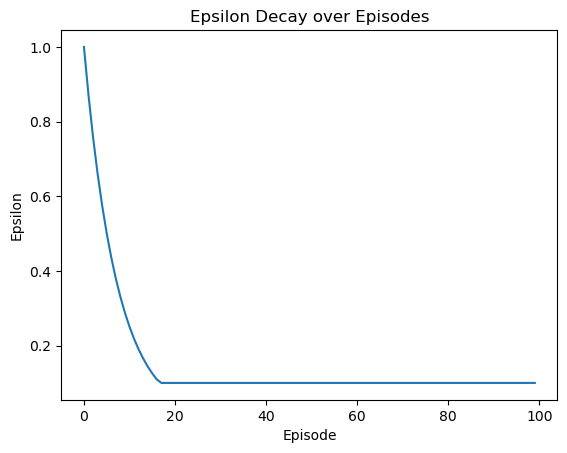

[I 2023-11-09 09:34:51,929] Trial 12 finished with value: -452.65 and parameters: {'alpha': 0.3550772564650141, 'gamma': 0.7476850553798181, 'epsilon_decay': 0.8707667436155486, 'max_timesteps': 25}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.08561101e+00  1.09650896e+01  4.03704582e-01  1.87573150e+00]
 [-7.11216819e-01  1.14887995e+01 -1.34112162e+01  0.00000000e+00]
 [-3.35608070e+00  3.09026875e-01  0.00000000e+00 -1.13330346e+00]
 [-2.65686071e-01 -8.98391486e+00  0.00000000e+00 -3.35608070e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.01650012e-01]
 [ 2.45483628e+00 -1.69180914e+01  1.73937867e+01  2.34329013e+00]
 [ 2.13211352e+00  2.22266928e+01  2.53896427e+00  1.53310871e+00]
 [-1.13560040e+01 -2.23738713e+00 -3.35608070e+00  1.28842277e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

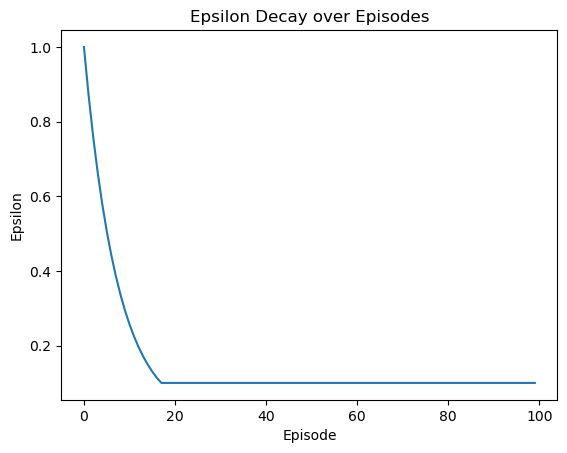

[I 2023-11-09 09:34:52,296] Trial 13 finished with value: -162.35 and parameters: {'alpha': 0.1118693567154565, 'gamma': 0.70766098075087, 'epsilon_decay': 0.872975197663872, 'max_timesteps': 24}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 9.06244802e+00  5.91739331e+01  2.24252093e+01  1.90776685e+01]
 [-1.83651640e-01  7.28308756e+01 -2.75491063e+01  3.96224026e-01]
 [-2.24652918e+01  2.65034693e+00 -3.66765546e+00 -2.70640942e+00]
 [-1.27061346e+00 -8.29510709e+00  0.00000000e+00 -2.49026173e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.48962274e+01 -3.21263206e+01  8.45745052e+01  1.06565305e+01]
 [ 3.31233493e+00  1.18696029e+02  7.87503598e+00  1.56016400e+01]
 [-2.16130073e+01 -1.24257581e+01 -8.29510709e+00  4.56821870e+01]
 [-3.71819464e-01  0.00000000e+00  0.00000000e+00  0.0

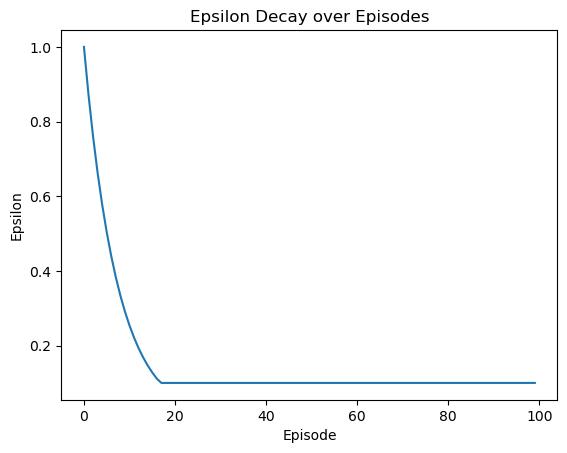

[I 2023-11-09 09:34:52,625] Trial 14 finished with value: -406.7 and parameters: {'alpha': 0.2765035696272821, 'gamma': 0.7656923702951898, 'epsilon_decay': 0.8718704194126254, 'max_timesteps': 25}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 5.31213978e-01  2.20721473e+01  2.53150354e+00  5.05458660e+00]
 [ 8.79382380e-01  3.69930534e+01 -3.06607021e+01  7.16433243e-01]
 [-1.99067127e+01 -2.83640664e+00  0.00000000e+00 -1.91685403e+00]
 [-3.30470999e+00 -1.99067127e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.50391766e+00 -4.46127573e+01  3.68860605e+01  2.50717928e-02]
 [ 1.35558202e+01  2.64278976e+01  1.56022288e+00  1.14535285e+01]
 [-1.99067127e+01 -1.64322094e+01 -1.25988903e+01  7.17635647e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

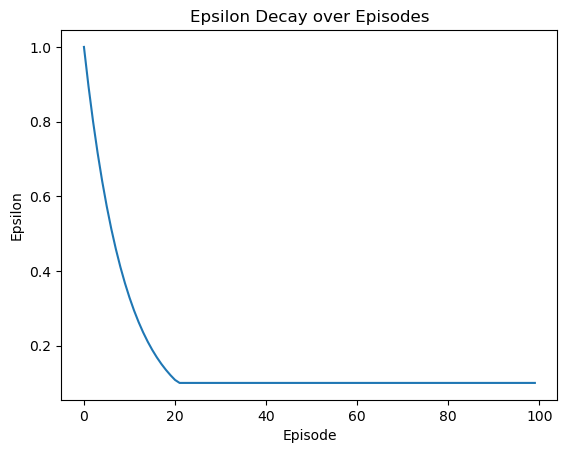

[I 2023-11-09 09:34:53,060] Trial 15 finished with value: -411.3 and parameters: {'alpha': 0.4199630110913021, 'gamma': 0.6245827940848557, 'epsilon_decay': 0.8946849658395714, 'max_timesteps': 18}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.93849932e+00 -1.08068229e+01  1.27865667e+02  7.01696195e-01]
 [ 9.26913084e+00  6.67043239e+01 -2.80972464e+01  5.18966289e-01]
 [-2.52287872e+01  0.00000000e+00  0.00000000e+00 -8.85100657e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.33866846e-01 -1.80817171e+01  1.32486288e+02  2.94082625e+01]
 [-9.88467028e+00  1.54744086e+02 -9.67037942e+00  4.29961020e+01]
 [-3.40797937e+01 -1.20240254e+01 -2.52287872e+01  4.88436325e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

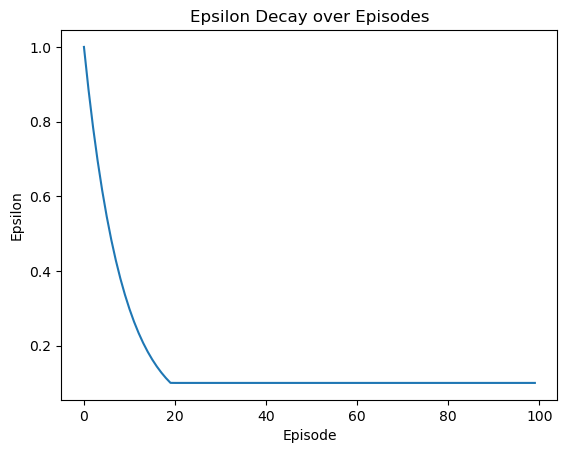

[I 2023-11-09 09:34:53,537] Trial 16 finished with value: -168.8 and parameters: {'alpha': 0.6012012685600061, 'gamma': 0.8162658586215256, 'epsilon_decay': 0.8859372901375814, 'max_timesteps': 14}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.39030953 -14.10687343   4.62965527  -1.55629452]
 [  3.94489861   5.76402401 -27.77188745   1.272281  ]
 [-13.15589733   0.           0.           4.41344273]
 [  0.         -13.15589733   0.         -13.15589733]
 [  0.           0.           0.           0.        ]
 [ -0.48556127 -49.12803977   8.6680532    4.85179886]
 [ -5.08531901   5.35246838   0.90363053 -11.03434328]
 [-19.77640759 -16.89435058 -19.98350287   7.7826056 ]
 [  0.           0.           0.          -2.5459527 ]
 [  0.           0.           0.           0.        ]
 [-12.44453089   5.31766426   0.        

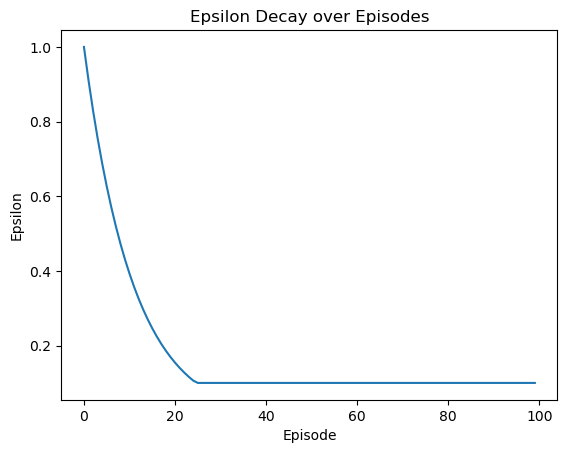

[I 2023-11-09 09:34:53,982] Trial 17 finished with value: -6.65 and parameters: {'alpha': 0.43852991114012996, 'gamma': 0.6512604722621433, 'epsilon_decay': 0.9107781669840412, 'max_timesteps': 10}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 16.29849011  15.48099732   8.58376324  -0.24807033]
 [  7.12695034  35.08539632 -15.32249654  17.23407972]
 [ -5.93125187  -1.14484663   0.          22.8596707 ]
 [ -1.13203445 -10.68984545   0.         -10.48627356]
 [  0.           0.           0.           0.        ]
 [ 21.99573324 -35.37945446  33.80284966  16.47226221]
 [ 33.28995125  23.07176012  23.21001905  22.19994087]
 [-11.14461637  -3.95416792 -20.0279949   31.52702052]
 [ -1.14484663   0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 23.15782068   0.          -1.2193517 

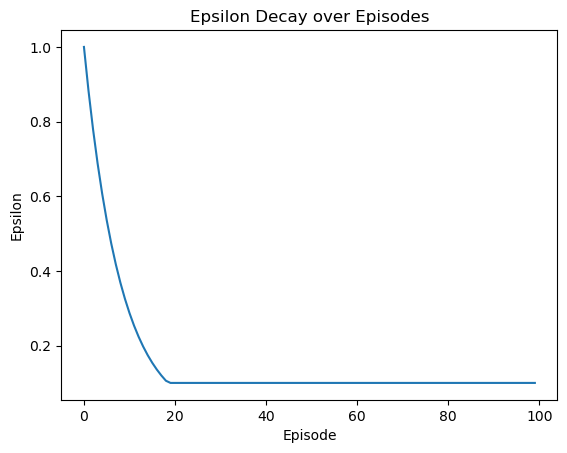

[I 2023-11-09 09:34:54,528] Trial 18 finished with value: -19.2 and parameters: {'alpha': 0.19770839576898278, 'gamma': 0.9762832360294963, 'epsilon_decay': 0.8826908381414698, 'max_timesteps': 17}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 14.85468554  26.21062432   3.62287991   9.42904892]
 [  0.82604728  20.76051912 -26.21157925  -0.12581438]
 [ -9.0445264    2.26629283   0.          -3.8502432 ]
 [ -2.26682803 -15.36227087   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 15.54227136 -37.64712181  33.41564432  18.2204698 ]
 [ -1.87352935  21.94574406   6.53084264   9.6451219 ]
 [-15.19639232   0.          -9.0445264   21.05808146]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  3.07498762  -2.52562857  42.67118275

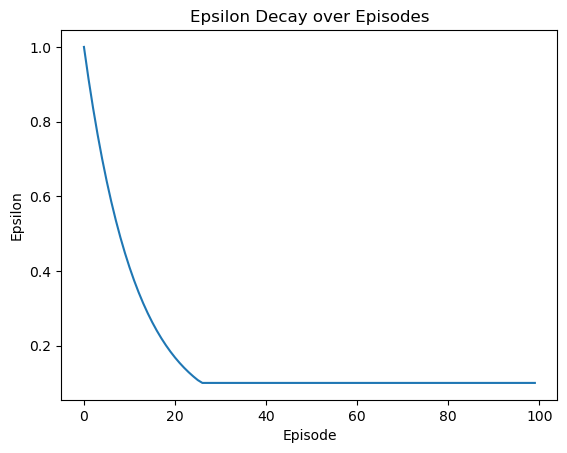

[I 2023-11-09 09:34:54,967] Trial 19 finished with value: -105.75 and parameters: {'alpha': 0.3014842133179002, 'gamma': 0.8313198834932867, 'epsilon_decay': 0.9146629786243562, 'max_timesteps': 19}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.9995529    2.11207295   4.98281245   0.95507043]
 [  3.7553282    9.02095898 -22.21993369   2.1206568 ]
 [-11.12029603   2.19822032   0.           0.        ]
 [  0.          -6.20102693   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  1.44525518 -39.07049331   8.06557508  -1.35430247]
 [  1.61755931  11.43977288   0.53541184  -1.16059478]
 [-21.12727175  -4.13401795 -11.12029603   7.09331354]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ -0.13928966   7.66811554   0.        

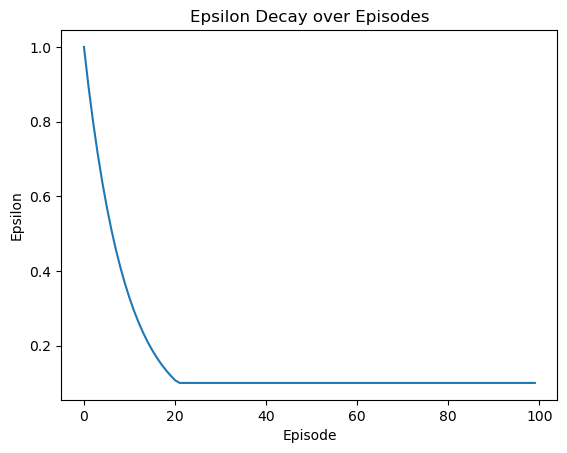

[I 2023-11-09 09:34:55,298] Trial 20 finished with value: -19.65 and parameters: {'alpha': 0.2067008977316143, 'gamma': 0.6339586621427025, 'epsilon_decay': 0.8944055562614242, 'max_timesteps': 12}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-5.62769659e-01  6.09908877e-01  5.40924984e+00  1.67110776e-01]
 [ 4.17365203e+00  2.00755963e+01 -2.90014815e+01  2.81752250e+00]
 [-2.27694635e+01 -4.17500002e+00  0.00000000e+00  0.00000000e+00]
 [-2.61379409e+00 -1.84919495e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.30441965e+00 -4.69091404e+01  2.09996495e+01  2.49177865e+00]
 [ 4.35211211e+00  3.77277440e+01  6.39045199e+00  7.97230331e+00]
 [-2.57076699e+01 -1.25141010e+01 -1.87711515e+01  2.14737517e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.0

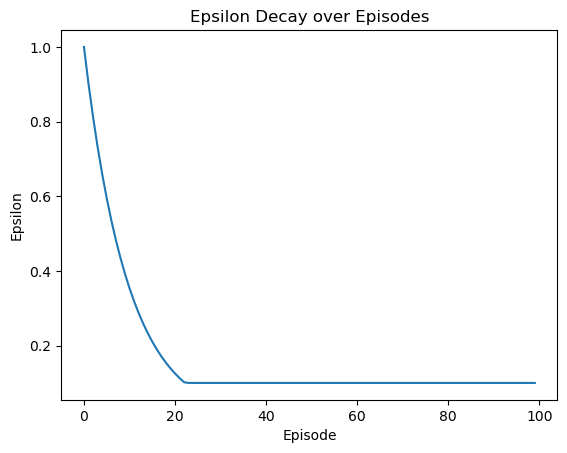

[I 2023-11-09 09:34:55,670] Trial 21 finished with value: -289.7 and parameters: {'alpha': 0.38820350648368573, 'gamma': 0.5781375925257219, 'epsilon_decay': 0.901334349897927, 'max_timesteps': 23}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-2.22152750e+00  1.71901067e+01  2.92824033e+01  1.07290366e+01]
 [ 1.42414266e+01  4.43419542e+01 -2.54748592e+01  5.16093259e+00]
 [-1.13039886e+01 -2.94393565e+00  0.00000000e+00  0.00000000e+00]
 [-5.92195942e+00 -2.54748592e+01 -3.24110915e-01 -1.13039886e+01]
 [-1.73275895e+00 -2.94393565e+00 -2.31785247e+00 -5.54647292e+00]
 [-8.82836348e-01 -4.40376756e+01  5.40236443e+01 -4.37210424e+00]
 [ 2.52640406e+01  6.80436829e+01  2.94355378e+00  1.94206809e+01]
 [-1.13039886e+01 -7.53599237e+00 -2.27388671e+01  3.17720679e+01]
 [-2.94393565e+00 -1.69485040e+00  0.00000000e+00  0.0

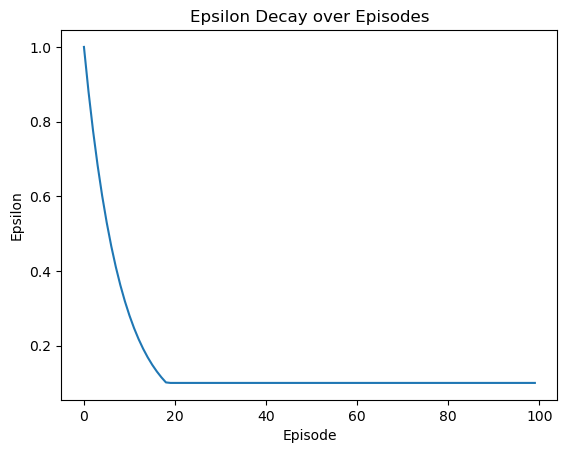

[I 2023-11-09 09:34:56,142] Trial 22 finished with value: -409.8 and parameters: {'alpha': 0.3767996185938689, 'gamma': 0.6911720213135096, 'epsilon_decay': 0.8805756281763425, 'max_timesteps': 25}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.81855930e-02  6.40485881e+00  3.35284512e+01  8.82993198e+00]
 [ 7.08083624e+00  6.51821401e+01 -2.07039115e+01  6.46758435e+00]
 [-1.64947029e+01 -2.28244763e+00 -1.53141277e+00  1.00523675e+01]
 [-3.93588332e+00 -9.87144036e+00  0.00000000e+00 -2.11457114e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.32367441e-01 -4.87758414e+01  3.31927087e+01  0.00000000e+00]
 [ 1.12357018e+01  8.91401436e+01 -1.24053290e-01  4.41626975e+00]
 [-1.64947029e+01 -6.58096024e+00 -2.09385941e+01  5.15618964e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

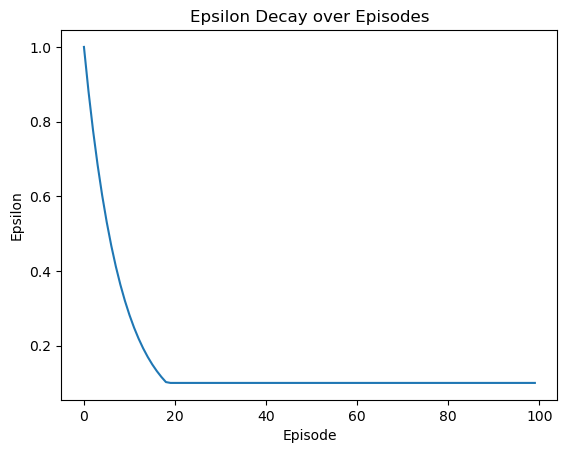

[I 2023-11-09 09:34:56,553] Trial 23 finished with value: -316.15 and parameters: {'alpha': 0.32904801208925766, 'gamma': 0.7026855507600733, 'epsilon_decay': 0.881019130593144, 'max_timesteps': 16}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 44.01697775   6.18647935 100.1971392   12.16750194]
 [ 32.73023228  73.74363926 -26.72600649  36.34392167]
 [-20.87621182  -6.66464705   0.           0.        ]
 [ -4.79375627 -13.45570656   0.         -20.87621182]
 [  0.           0.           0.           0.        ]
 [ 36.91309619 -41.61407617   1.22855792 -16.80173939]
 [ 30.39191843 139.5743665   32.03749432   3.30741012]
 [-13.45570656 -10.36871896 -24.9684457   88.9464763 ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.         -20.87621182]
 [  0.          49.74952717   0.        

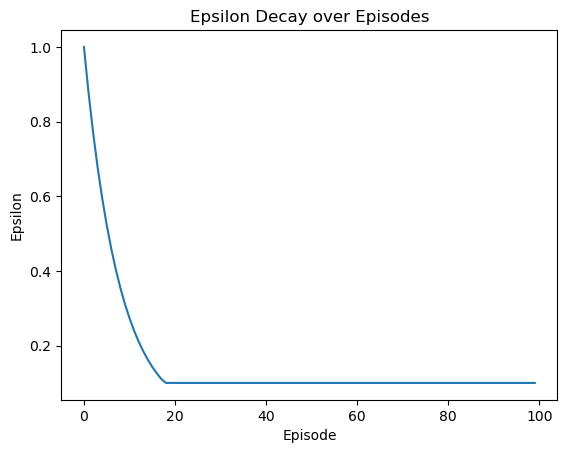

[I 2023-11-09 09:34:56,997] Trial 24 finished with value: -382.2 and parameters: {'alpha': 0.44852355195379573, 'gamma': 0.7942993173576104, 'epsilon_decay': 0.8784025594892991, 'max_timesteps': 23}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-3.56979322e+00  7.51276185e-01  5.20741077e+00 -7.09509444e-01]
 [ 4.22379184e+00  8.25190021e+00 -2.65799759e+01  1.61677026e+00]
 [-2.58813450e+01 -1.80719646e+00 -1.35251848e-01  5.98526899e+00]
 [-5.98518300e+00 -2.34120914e+01  0.00000000e+00 -2.34120914e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.17414486e+00 -4.61671330e+01 -2.65146209e+00 -1.73186945e+01]
 [-7.16885364e+00 -2.77218349e-02 -9.92163661e+00  6.23138061e-01]
 [-3.07307336e+01 -1.74532644e+01 -2.88421821e+01  8.59300222e+00]
 [-2.80472695e+00  1.34723172e+01  0.00000000e+00  0.0

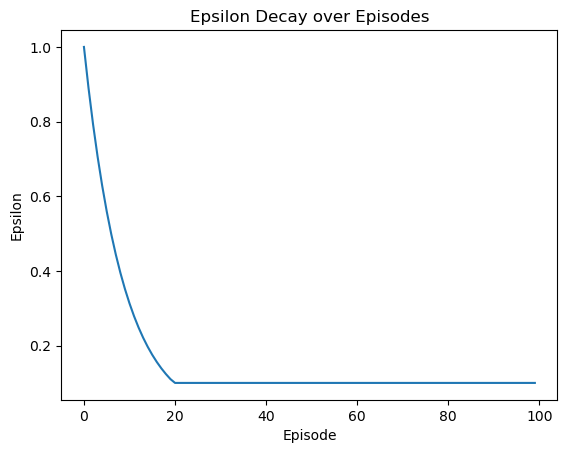

[I 2023-11-09 09:34:57,559] Trial 25 finished with value: -12.0 and parameters: {'alpha': 0.5313882707255999, 'gamma': 0.706532673893662, 'epsilon_decay': 0.8903727925118221, 'max_timesteps': 19}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.04702979e+01  1.19139089e+01  7.88764520e+01  1.61356892e+01]
 [ 4.28224932e+01  1.11787019e+02 -1.53612392e+01  0.00000000e+00]
 [-1.01933354e+01 -6.40157479e-01 -1.23732003e+00  3.42948095e+01]
 [ 0.00000000e+00 -1.63827548e+01  0.00000000e+00 -6.87008293e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.25380312e+01  9.21202878e+01  1.55388252e+01]
 [ 1.96644802e+01  1.48490678e+02 -3.18818306e+00  1.74844022e+01]
 [-1.19318647e+01 -1.06520127e+01 -1.91180829e+01  4.49165921e+00]
 [-1.70543841e+00  1.25982282e+01  0.00000000e+00 -2.0

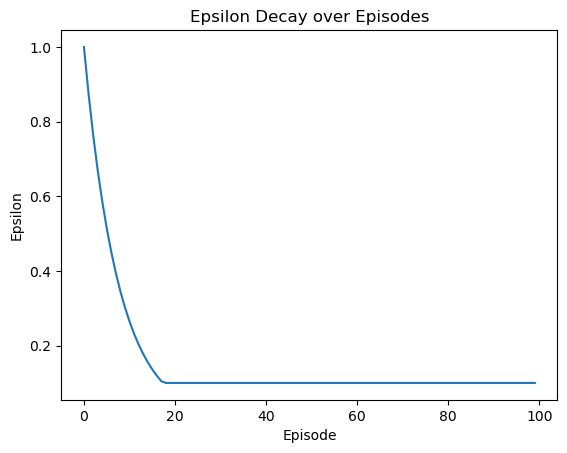

[I 2023-11-09 09:34:58,025] Trial 26 finished with value: -412.95 and parameters: {'alpha': 0.22393867666724798, 'gamma': 0.8224368725455391, 'epsilon_decay': 0.875581329127433, 'max_timesteps': 16}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.           1.87655409  35.25931436   3.62870581]
 [ 14.62954271  35.86139794 -22.62708474   5.24698018]
 [ -6.14124834  -0.72706439  -1.95793901  12.63047765]
 [ -1.09059658 -11.02533231   0.          -6.14124834]
 [  0.           0.           0.           0.        ]
 [  0.         -10.2354139   12.61793514   0.1817661 ]
 [ 12.07665003  39.43465843   2.82957109   0.63260961]
 [ -6.14124834  -7.35022154 -11.02533231  14.41858133]
 [ -0.19367413   0.           0.           0.        ]
 [  0.           0.           0.          -6.14124834]
 [  0.           0.          37.48854413

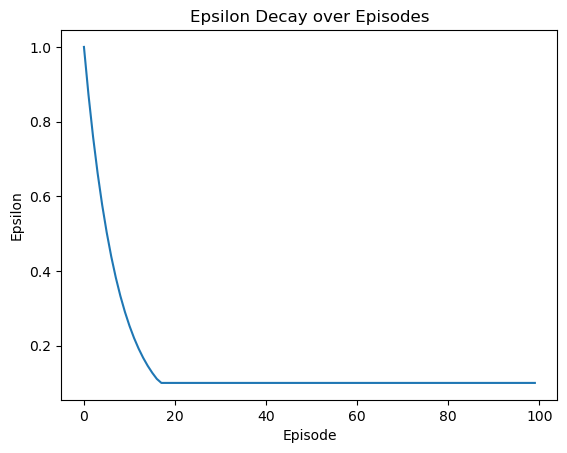

[I 2023-11-09 09:34:58,463] Trial 27 finished with value: -67.85 and parameters: {'alpha': 0.20470827797132715, 'gamma': 0.8675051609780884, 'epsilon_decay': 0.8715191792143533, 'max_timesteps': 15}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 41.07330031  31.06362075 146.08707946  51.15441645]
 [  5.51976399 144.97265506 -22.81937651  25.47692037]
 [-13.06685548  -1.2247878    0.           0.        ]
 [ -1.79130674 -12.92688238   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  2.10169202 -32.75328653  95.46403306   3.08015837]
 [  7.0381226  134.66524973   1.80699491  12.82273626]
 [ -7.46127032 -13.3710315  -17.2782811   61.42297174]
 [  0.           0.           0.          -1.57649287]
 [  0.           0.           0.           0.        ]
 [ 25.35190531   0.           0.        

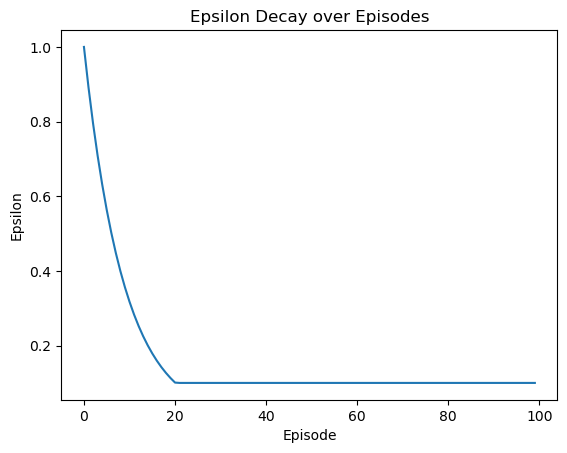

[I 2023-11-09 09:34:58,849] Trial 28 finished with value: -110.35 and parameters: {'alpha': 0.24870901060136574, 'gamma': 0.9900287733404215, 'epsilon_decay': 0.8916403525279164, 'max_timesteps': 18}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.32403027e+00  1.10900444e+01 -1.05056399e+00  3.63852282e+00]
 [-9.42638349e-01  8.84490153e+00 -1.77942885e+01  1.21712785e-02]
 [-6.79758393e+00 -2.50740353e-01  0.00000000e+00 -3.76110530e-01]
 [ 0.00000000e+00 -3.61681441e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.49852865e+00 -4.19601552e+01  1.08340790e+01  3.90850288e+00]
 [ 2.58279061e+00  2.35813570e+00  1.08055869e+00  5.95223979e+00]
 [-9.92564482e+00 -4.52520403e+00 -3.61681441e+00  7.20949478e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

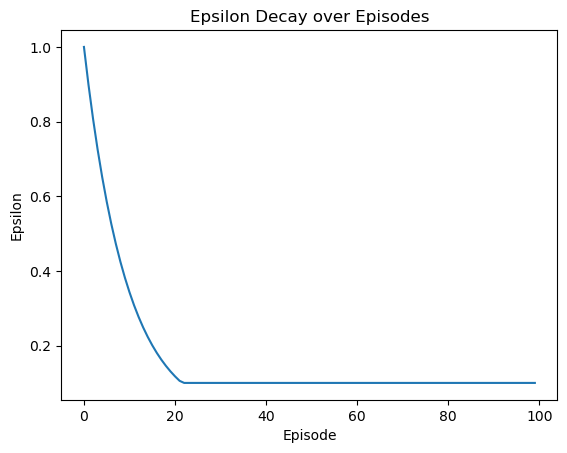

[I 2023-11-09 09:34:59,226] Trial 29 finished with value: -5.75 and parameters: {'alpha': 0.1205604802256538, 'gamma': 0.8625500385612315, 'epsilon_decay': 0.8984882716273317, 'max_timesteps': 10}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.94537819   1.71584559  21.84753632  -0.68844264]
 [  6.76379999  29.8656609  -20.40474229   4.99065628]
 [ -9.70453851   0.           0.          12.07716734]
 [  0.           0.           0.          -9.487357  ]
 [  0.           0.           0.           0.        ]
 [  3.87627502 -44.36199228  20.79448741   0.        ]
 [  9.12577485  33.01408525   7.24659109   2.58546044]
 [ -9.70453851 -10.84653873 -16.26980809  22.93829873]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ -9.65724028  -1.73286124  29.91956333

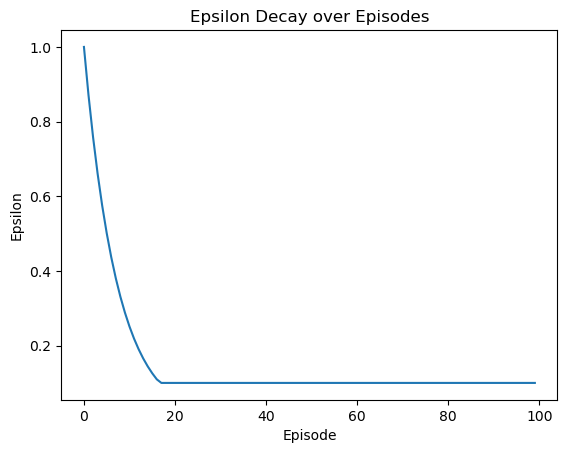

[I 2023-11-09 09:34:59,780] Trial 30 finished with value: -83.95 and parameters: {'alpha': 0.32348461692591934, 'gamma': 0.7754067742301667, 'epsilon_decay': 0.8709052069527792, 'max_timesteps': 16}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.42330984e+01  6.70526987e+00  3.61383979e+01  1.41981111e+01]
 [ 4.47462915e+00  5.25810343e+01 -3.33130460e+01  9.13697137e+00]
 [-2.92686966e+01  2.49517224e+00 -3.24938414e+00 -3.24938414e+00]
 [ 0.00000000e+00 -1.54662434e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.49696636e+01  2.43877383e+01  1.84549451e+00]
 [ 9.18735269e+00  6.22316857e+01  1.55039774e+00 -4.79131555e+00]
 [ 0.00000000e+00 -1.21853498e+01 -1.36291859e+01  6.12650273e+00]
 [ 0.00000000e+00  2.38572876e+01  0.00000000e+00  0.0

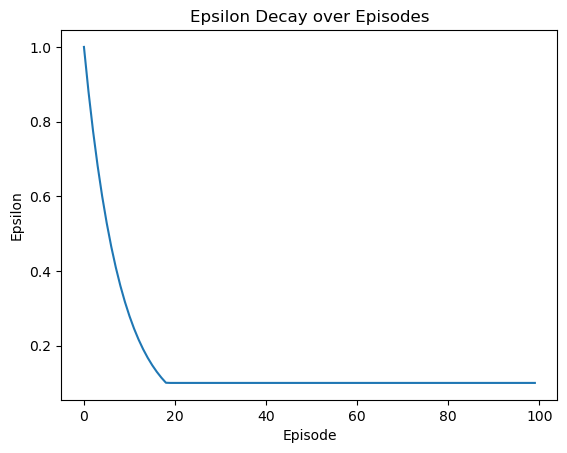

[I 2023-11-09 09:35:00,321] Trial 31 finished with value: -304.05 and parameters: {'alpha': 0.38483894379596695, 'gamma': 0.7313441181448838, 'epsilon_decay': 0.8801400170117536, 'max_timesteps': 24}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.05810820e+01  9.16367523e+00  2.52175981e+01  7.99007822e+00]
 [ 1.73937846e+01  3.74887473e+01 -3.20609747e+01  5.80652105e+00]
 [-2.20951304e+01 -4.23290550e+00 -2.52506141e+00  0.00000000e+00]
 [-2.52506141e+00 -1.76697970e+01  1.15728561e-01  0.00000000e+00]
 [ 0.00000000e+00  1.44257421e+00  0.00000000e+00 -2.52506141e+00]
 [ 2.29733048e-01 -2.83173611e+01  4.04920773e+01  5.12221854e+00]
 [ 7.27211030e+00  6.74403748e+01  5.09658198e-01  1.05073243e+01]
 [-1.32921186e+01 -7.17803811e+00 -2.27181560e+01  1.92055637e+01]
 [ 0.00000000e+00  0.00000000e+00 -5.44341793e-01  0.0

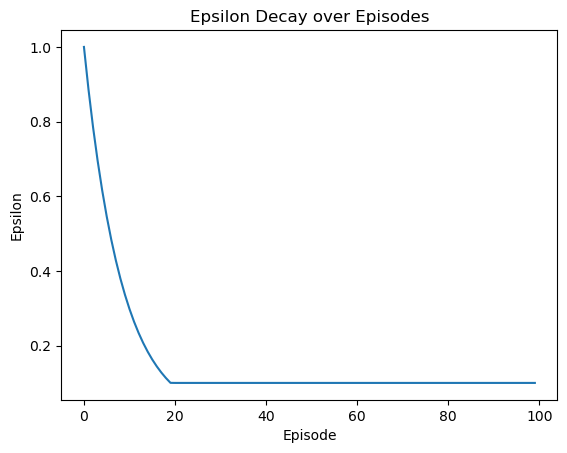

[I 2023-11-09 09:35:00,833] Trial 32 finished with value: -445.95 and parameters: {'alpha': 0.3589019056609087, 'gamma': 0.6534301386363253, 'epsilon_decay': 0.8859682039825613, 'max_timesteps': 21}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.67656488e+00  4.04557908e+00  1.61319850e+01  1.33600613e+00]
 [ 3.20862043e+00  2.87373074e+01 -1.70022909e+01  1.54545143e+00]
 [-1.32241721e+01 -4.31774298e+00  0.00000000e+00  0.00000000e+00]
 [-1.05077228e+00 -7.29944678e+00  0.00000000e+00 -7.29944678e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.75565759e+01  2.01562931e+01 -2.74325004e+00]
 [ 6.68922896e+00  4.19916027e+01  2.31890281e+00  4.08125798e+00]
 [-2.10146050e+01 -1.13348606e+01 -7.29944678e+00  9.86276949e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.0

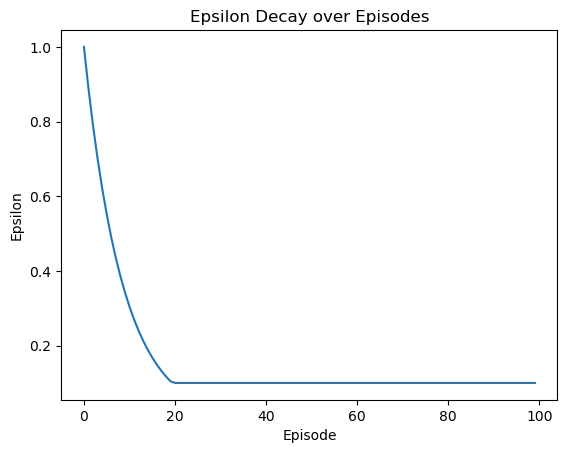

[I 2023-11-09 09:35:01,411] Trial 33 finished with value: -319.6 and parameters: {'alpha': 0.24331489271629464, 'gamma': 0.5916297026723559, 'epsilon_decay': 0.8878379976065348, 'max_timesteps': 17}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.16842639e+00  2.05675776e+00  1.87687571e+01  8.89538647e-01]
 [ 2.31978500e+00  3.56227667e+01 -2.24527576e+01  4.50473510e+00]
 [-2.13509595e+01 -1.06936008e+00 -1.11388522e+00  1.20154073e+01]
 [-6.08542592e-01 -1.32653141e+01  0.00000000e+00 -6.41826006e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.10954835e-01]
 [ 0.00000000e+00 -8.84062474e+00  1.53203770e+01  0.00000000e+00]
 [ 3.71515198e+00  5.15133104e+01  2.11918833e+00  2.20502525e+00]
 [-2.39570144e+01 -8.84354276e+00 -9.67086993e+00  1.75170193e+01]
 [-8.51465606e-02  8.14606447e-01  0.00000000e+00 -2.0

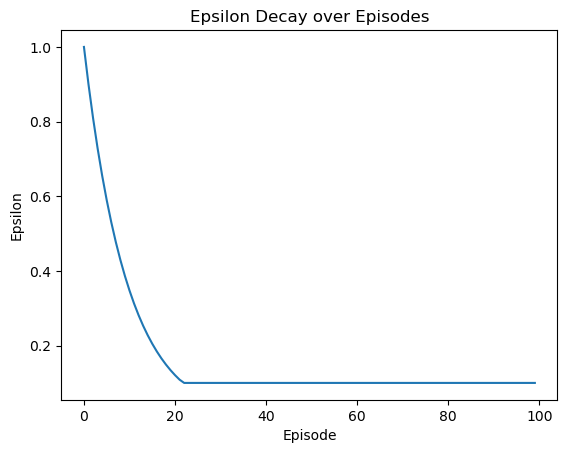

[I 2023-11-09 09:35:01,969] Trial 34 finished with value: -388.1 and parameters: {'alpha': 0.1768124947127533, 'gamma': 0.6514212894896286, 'epsilon_decay': 0.8997052703960285, 'max_timesteps': 21}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  6.66482337  78.38446462  16.84034925  11.90229   ]
 [  0.          84.84609967 -14.70397641   0.        ]
 [ -8.57849894   0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.719536   -31.92504766  91.39795874  32.55114184]
 [ 17.19898324 147.14635718   4.5969338   34.82054083]
 [ -8.57849894  -9.80265094  -8.57849894  46.57292189]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.          -8.57849894]
 [ -2.60762581  -3.24494758  89.34582357

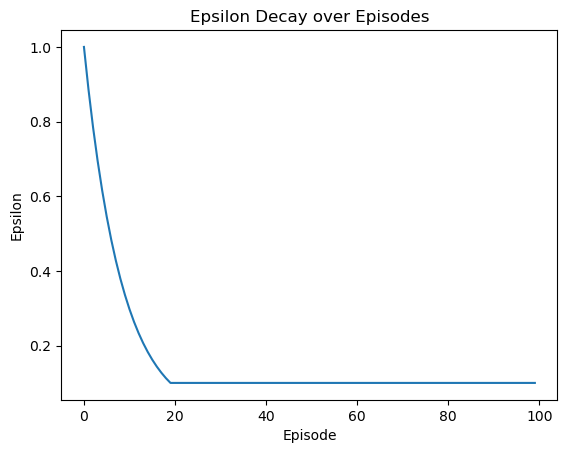

[I 2023-11-09 09:35:02,362] Trial 35 finished with value: -345.15 and parameters: {'alpha': 0.285949964670725, 'gamma': 0.8062388326425455, 'epsilon_decay': 0.8858018933179884, 'max_timesteps': 18}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  3.2881713   -6.79493103  14.12552207   0.76937774]
 [  6.23418497  29.5035299  -29.34414071   4.43041704]
 [-19.88989374  -4.34137376   0.           0.        ]
 [ -3.20292767 -12.70845985   0.         -19.80036189]
 [  0.           0.           0.           0.        ]
 [  2.01815873 -46.92854062  23.04935      1.85125717]
 [  8.59662508  44.51568531   4.14491035   4.10712793]
 [-12.70845985 -15.60729449 -22.54739867  22.91894241]
 [ -3.20292767  23.01118103   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  5.11031088   0.          37.95535169

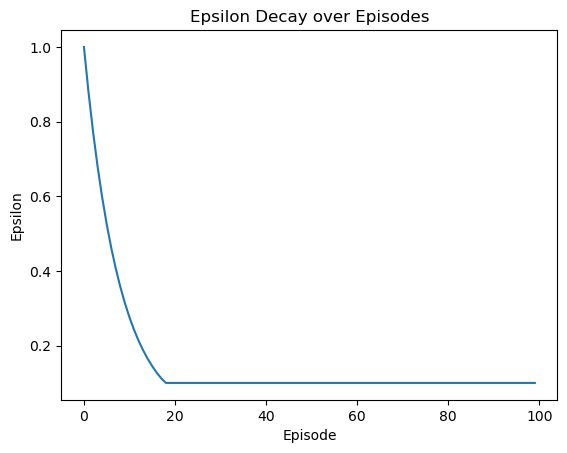

[I 2023-11-09 09:35:02,720] Trial 36 finished with value: -344.35 and parameters: {'alpha': 0.4236153282558129, 'gamma': 0.6145046295376991, 'epsilon_decay': 0.8790722038731789, 'max_timesteps': 20}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 5.09511016e+00  2.22096003e+01 -7.51791385e+00  7.96149488e+00]
 [ 7.56789036e-01  1.56996914e+01 -3.53976284e+01  9.16527671e-02]
 [-3.13072774e+01 -2.42531314e+00  0.00000000e+00  1.22120718e+00]
 [ 0.00000000e+00 -1.04826548e+01  0.00000000e+00 -2.11636343e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.79846501e+00]
 [-5.45304105e-01 -3.19724062e+01  5.12062794e+01  1.98652724e+01]
 [ 3.27361943e+00  6.22404077e+01 -1.49125705e+00  4.04556070e+00]
 [ 0.00000000e+00 -1.15349608e+01 -2.13364526e+01  1.79173153e+01]
 [-3.18556356e+00  2.26825762e+01  0.00000000e+00  0.0

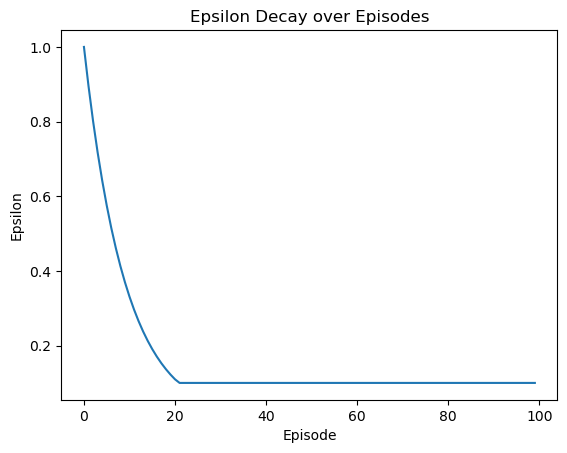

[I 2023-11-09 09:35:03,510] Trial 37 finished with value: -271.7 and parameters: {'alpha': 0.3494218254757727, 'gamma': 0.6621349456779498, 'epsilon_decay': 0.8953407847448522, 'max_timesteps': 18}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-4.08339307e-01  1.51437030e+00 -2.86046300e-01 -8.12685127e-02]
 [ 2.06222466e+00  1.10677110e+01 -2.64785563e+01  6.51973443e-01]
 [-7.54069699e+00  2.94740577e+00  0.00000000e+00 -4.63425001e-01]
 [-1.01360914e+00 -1.31859903e+01  0.00000000e+00 -1.31859903e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.34970984e-01 -4.44351994e+01  1.21524564e+01  2.62895916e+00]
 [ 4.50903973e-01  1.47584089e+01  5.97827176e-01 -6.40399407e-01]
 [-2.24805179e+01 -1.33742628e+01 -1.74123020e+01  8.71884457e+00]
 [-1.01360914e+00  1.35147886e+00  0.00000000e+00  0.0

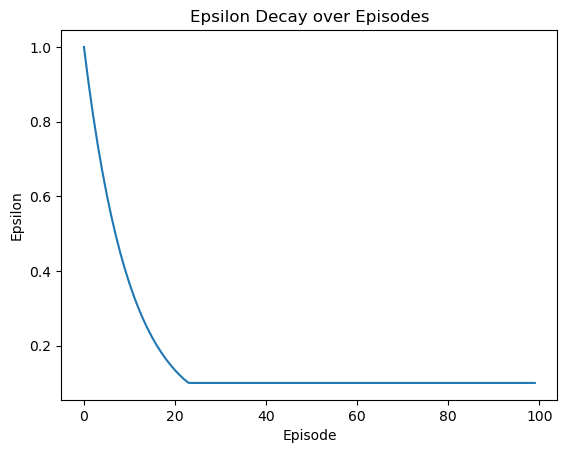

[I 2023-11-09 09:35:04,070] Trial 38 finished with value: -184.3 and parameters: {'alpha': 0.2513565664785676, 'gamma': 0.5347721652243117, 'epsilon_decay': 0.9043816298848778, 'max_timesteps': 22}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 6.47955832e+00  1.93584759e+01 -1.98528473e+00  3.55204180e+00]
 [ 0.00000000e+00  7.78369506e+00 -1.76789284e+01 -1.35038153e-01]
 [-8.96007088e+00  6.14078630e+00  0.00000000e+00 -1.53100805e+00]
 [ 0.00000000e+00 -4.87634832e+00  0.00000000e+00 -4.87634832e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.31334145e+00 -3.18137267e+01  2.78327532e+01  7.25751677e-01]
 [ 6.15542777e-01  3.35699165e+01  5.35475209e+00  8.67154252e+00]
 [-1.73255122e+01 -5.97338059e+00 -8.96007088e+00  2.32371925e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

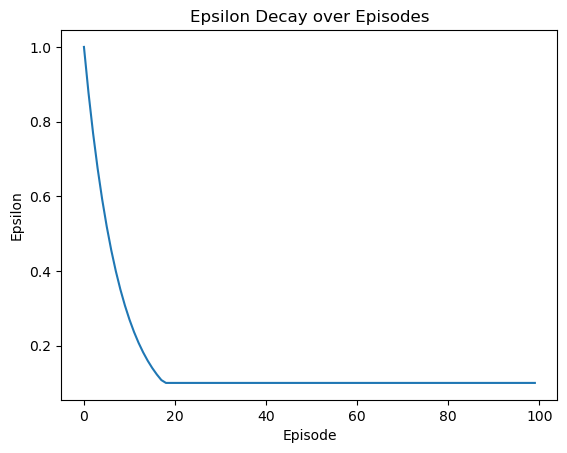

[I 2023-11-09 09:35:04,646] Trial 39 finished with value: -139.55 and parameters: {'alpha': 0.16254494411168602, 'gamma': 0.7576479349909438, 'epsilon_decay': 0.8771040145382425, 'max_timesteps': 20}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  7.83689444  -7.0950354   18.60666558   9.84983743]
 [ -5.07710784  19.15288126 -25.65150636  13.11642848]
 [-14.42413415  18.60241437   0.           9.19472753]
 [ -6.22851751 -21.9130801    0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 10.02953842 -42.55392058  11.65938862  11.51306427]
 [  8.47831497   0.29116429   9.45823588  15.01346378]
 [-22.09603439 -15.28876287 -25.80130735  20.56002452]
 [  0.           0.           0.          -6.22851751]
 [  0.           0.           0.           0.        ]
 [  5.84225508   0.           0.        

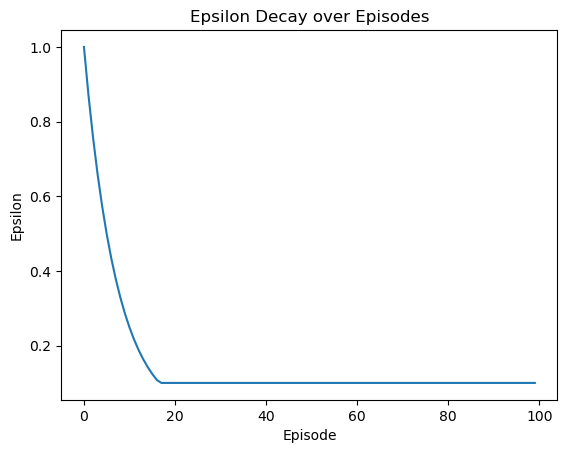

[I 2023-11-09 09:35:05,602] Trial 40 finished with value: -24.55 and parameters: {'alpha': 0.480804471770664, 'gamma': 0.89810360291369, 'epsilon_decay': 0.8700666701503559, 'max_timesteps': 15}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.78644043e+01  2.29627111e+01  1.93426265e+01  9.07480892e+00]
 [ 5.16290312e+00  4.01807694e+01 -2.47359639e+01  1.88467469e+00]
 [-1.09877474e+01 -1.07016850e+01 -2.75234679e+00  6.06573375e+00]
 [-2.75234679e+00 -1.79511416e+01  0.00000000e+00 -1.93544112e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.98112496e+00 -3.63320293e+01  3.16318096e+01  1.35392232e+01]
 [ 9.49562127e+00  5.80969370e+01  6.12052045e+00  2.67166247e-01]
 [-2.80595882e+01 -1.19674278e+01 -2.51608337e+01  2.67616935e+01]
 [ 0.00000000e+00  0.00000000e+00 -4.06456668e+00  4.5

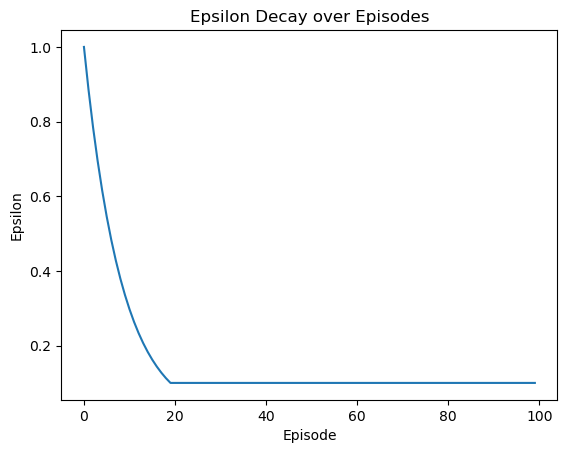

[I 2023-11-09 09:35:06,123] Trial 41 finished with value: -375.75 and parameters: {'alpha': 0.3662582451060432, 'gamma': 0.683922794800433, 'epsilon_decay': 0.8858106279289528, 'max_timesteps': 25}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.80081636e+00  4.05671298e+01  1.18720155e+01  1.84133298e+00]
 [ 5.28967412e+00  5.10320665e+01 -2.88556697e+01  1.25318293e+00]
 [-2.38483641e+01 -5.46073424e+00 -3.78722704e-01 -4.76521657e+00]
 [-2.15912511e+00 -2.38483641e+01  0.00000000e+00 -1.23093261e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.32944539e+00 -3.41629827e+01  6.64778302e+01 -2.62257458e+00]
 [ 1.63106544e+00  9.55285156e+01  9.35424727e+00  8.59080332e+00]
 [-2.58417194e+01 -1.30453346e+01 -2.33885835e+01  2.56161532e+01]
 [-3.43233772e+00 -3.66146331e+00  0.00000000e+00  7.4

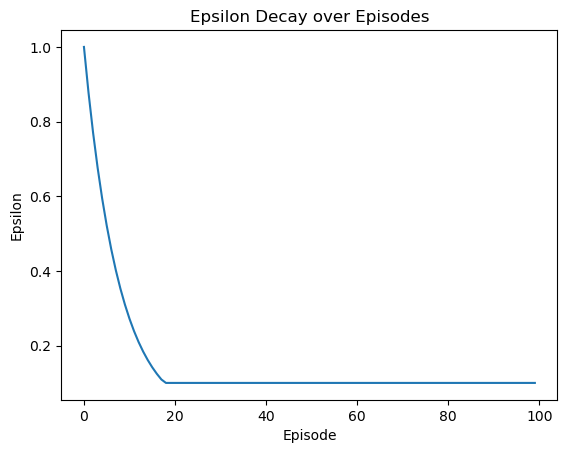

[I 2023-11-09 09:35:06,684] Trial 42 finished with value: -208.05 and parameters: {'alpha': 0.4103108698377733, 'gamma': 0.7249488864999947, 'epsilon_decay': 0.8778876657566334, 'max_timesteps': 24}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.23883472e+00  1.55751820e+01  7.89892967e+00  1.83224044e+00]
 [-2.40028268e+00  3.03845583e+01 -2.70759720e+01  9.71947515e-02]
 [-1.77903301e+01 -3.97265922e+00 -6.26757440e-01 -6.91030919e-01]
 [-4.95976004e+00 -2.22107570e+01  0.00000000e+00 -2.02157048e+01]
 [-3.51546164e-01 -7.71551269e-02 -2.00327528e-02 -1.54728451e+00]
 [ 4.96924568e+00 -3.40096951e+01  3.14089570e+01  5.47313006e+00]
 [ 1.02824836e+01  4.64542933e+01  2.28011282e+00  7.15786978e+00]
 [-2.51517397e+01 -7.24086217e+00  0.00000000e+00  8.68243176e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

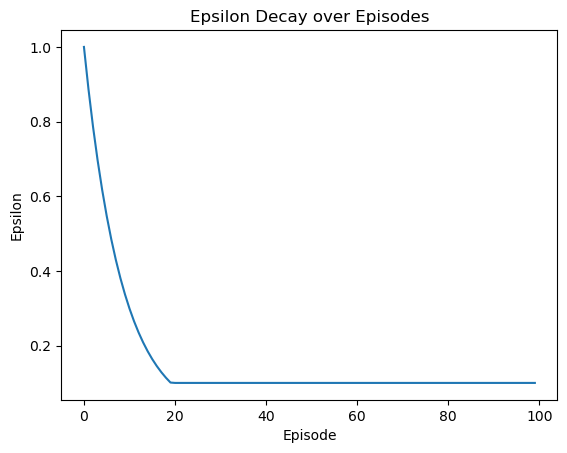

[I 2023-11-09 09:35:07,223] Trial 43 finished with value: -416.7 and parameters: {'alpha': 0.36204310826502567, 'gamma': 0.6167895695755421, 'epsilon_decay': 0.8863235502763537, 'max_timesteps': 23}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-2.50481158e-01 -1.02402469e+00  1.47774335e+01  2.00855493e+00]
 [ 1.10284302e+00  2.49340591e+01 -2.79460515e+01  3.91356637e+00]
 [-8.87248248e+00  4.60790713e+00  0.00000000e+00  3.59257273e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.21329103e+00 -4.05692389e+01  8.92308522e+00  2.37356354e+00]
 [ 5.79240178e-01  3.16596598e+01 -1.42198285e+00  1.93334633e+00]
 [-2.18856275e+01 -9.83239233e+00 -8.87248248e+00  1.32641848e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.5

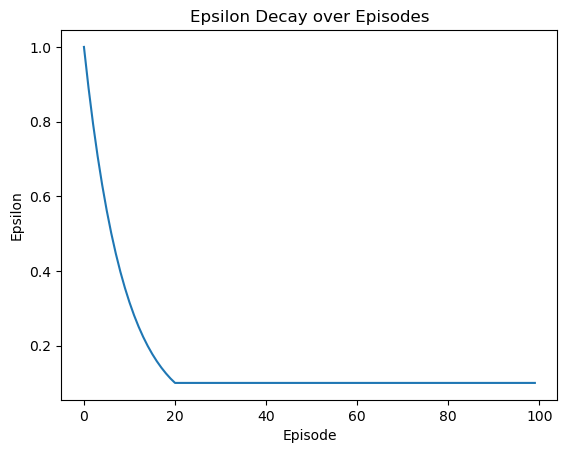

[I 2023-11-09 09:35:07,968] Trial 44 finished with value: -259.3 and parameters: {'alpha': 0.2957494160188373, 'gamma': 0.5768918927250472, 'epsilon_decay': 0.8911156418783974, 'max_timesteps': 22}. Best is trial 12 with value: -452.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 6.71556296e+00  9.45245671e+00  1.80652688e+01  9.89557342e+00]
 [ 4.54511613e+00  2.95097853e+01 -2.41242076e+01  9.23990118e-02]
 [-1.67231866e+01 -1.46651347e+00  0.00000000e+00  0.00000000e+00]
 [-1.37586890e+00 -1.67231866e+01  0.00000000e+00 -1.00424350e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.25934171e-01]
 [ 4.26614403e+00 -3.72336560e+01  3.40869200e+01  1.12374602e+01]
 [ 6.18011441e+00  5.36618805e+01  1.55636084e+00  4.34739535e+00]
 [-1.00424350e+01 -1.14321447e+01 -2.11675711e+01  1.67736588e+01]
 [ 0.00000000e+00 -1.37879436e+00  0.00000000e+00  0.0

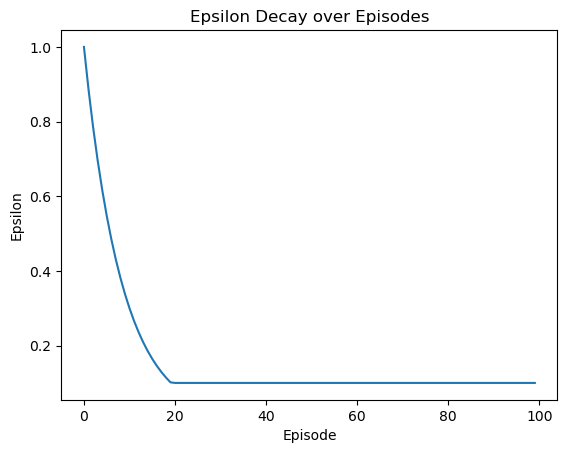

[I 2023-11-09 09:35:08,521] Trial 45 finished with value: -452.8 and parameters: {'alpha': 0.3347478332525182, 'gamma': 0.615224967950023, 'epsilon_decay': 0.886582911548409, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 7.60563302e-01  4.50749485e-01  6.36247382e+00  3.81583995e-01]
 [ 1.09873905e+00  1.35674499e+01 -2.79600567e+01  1.28526440e+00]
 [-1.00659318e+01 -3.20931368e+00 -1.74340958e+00 -3.57065612e+00]
 [-1.74358057e+00 -2.11987307e+01  0.00000000e+00 -1.73121683e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.32004430e+00 -3.44429589e+01  1.50465956e+01  1.25477498e+00]
 [ 4.04638468e+00  1.58673820e+01  1.30103269e+00  5.54577319e+00]
 [-2.16090436e+01 -1.71417277e+01 -1.67544308e+01  6.00308004e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

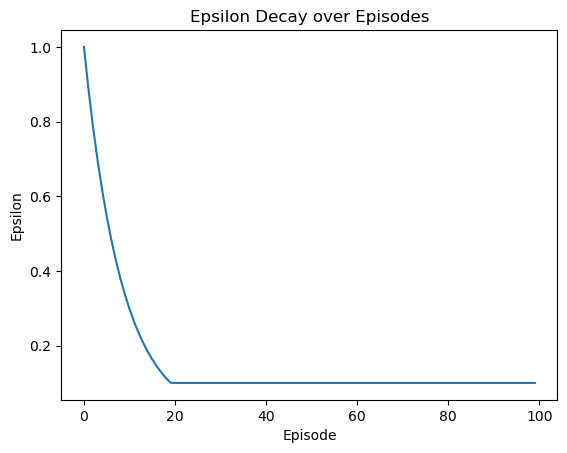

[I 2023-11-09 09:35:09,029] Trial 46 finished with value: -332.35 and parameters: {'alpha': 0.3355310600851897, 'gamma': 0.5020019912015949, 'epsilon_decay': 0.8860718905761547, 'max_timesteps': 22}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.04084008e+00  9.03367735e+00  7.88911121e-01  1.89176664e+00]
 [-1.76878173e+00  1.70640847e+01 -2.22167665e+01  1.89092683e-01]
 [-1.25316724e+01  5.93036810e-01 -1.00323899e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.10786539e+00  0.00000000e+00 -1.25316724e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.04860874e-02 -3.44978553e+01  2.40965746e+01  6.53012613e+00]
 [ 2.05711119e+00  4.37132979e+01  2.40275755e+00  3.40065693e+00]
 [ 0.00000000e+00 -8.35444829e+00 -7.10786539e+00  1.63344138e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

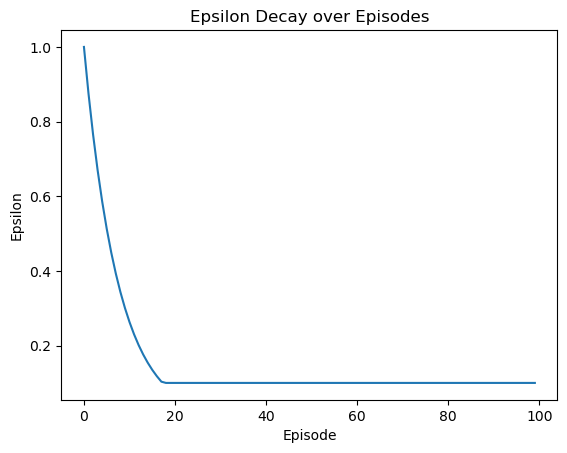

[I 2023-11-09 09:35:09,410] Trial 47 finished with value: -340.65 and parameters: {'alpha': 0.23692884624996333, 'gamma': 0.5957269803871829, 'epsilon_decay': 0.8750196146565238, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.20784375e+00  1.09688857e+01  3.30785739e+00  2.42759109e+00]
 [-1.34524485e-01  2.33187626e+01 -2.57395387e+01  2.05553659e-01]
 [-8.68508323e+00  3.39852671e+00  0.00000000e+00 -1.38803613e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.71265643e-01 -3.60467877e+01  2.04201799e+01  3.18698080e+00]
 [ 3.06829517e+00  3.04374370e+01  3.79709735e+00  3.11825436e+00]
 [-1.89317357e+01  0.00000000e+00 -1.92400956e+01  1.86466032e+01]
 [ 0.00000000e+00  1.85576403e+00  0.00000000e+00 -1.3

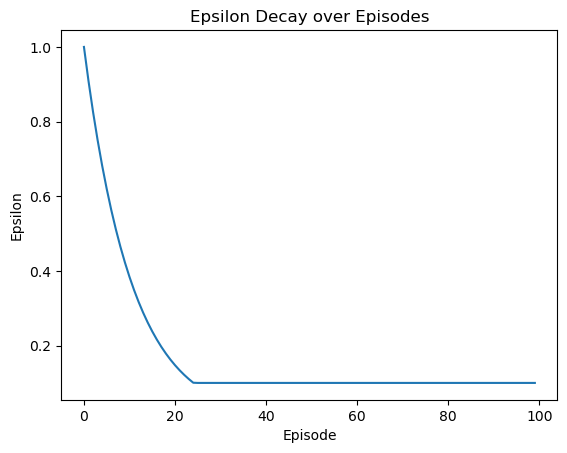

[I 2023-11-09 09:35:09,797] Trial 48 finished with value: -449.45 and parameters: {'alpha': 0.289502774283874, 'gamma': 0.5535505679303752, 'epsilon_decay': 0.90871433165998, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.48596715e+00  2.52758186e+00  8.70420032e+00 -8.35904018e-02]
 [ 5.24820498e+00  1.96713960e+01 -3.05163826e+01  1.96329358e+00]
 [-2.33365007e+01 -1.15157852e+00  0.00000000e+00  0.00000000e+00]
 [-1.36512648e+00 -1.92967102e+01  0.00000000e+00 -8.72253274e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.66436097e-01 -4.27331961e+01  1.48910404e+01 -3.23691073e+00]
 [ 1.73491445e+00  3.22316005e+01 -1.73408461e+00 -2.39066196e+00]
 [-1.48733712e+01 -1.01269535e+01 -2.46158812e+01  9.89865056e+00]
 [-2.33334095e+00  4.05834866e+00  0.00000000e+00 -3.0

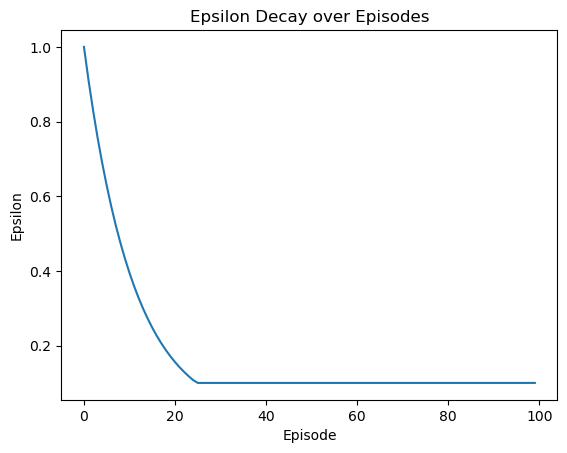

[I 2023-11-09 09:35:10,194] Trial 49 finished with value: -397.8 and parameters: {'alpha': 0.29075109132038146, 'gamma': 0.5382808498412576, 'epsilon_decay': 0.9112213053685896, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-1.35411858e+00  2.43812723e+00 -7.41900970e-01  1.16410149e-01]
 [ 3.00234146e+00  6.18690641e+00 -2.74061615e+01  1.37533241e+00]
 [-2.11787102e+01 -4.11099528e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.17937389e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.17709396e+00  0.00000000e+00  0.00000000e+00]
 [ 3.66089121e-01 -4.72807262e+01  6.34637599e+00  1.53495708e+00]
 [ 8.89601880e-01 -3.86931711e+00  2.02503385e-01  2.92913314e+00]
 [-2.10339001e+01 -1.53790694e+01 -2.43965528e+01  5.84752335e+00]
 [-1.57588473e+00  2.10117965e+00  0.00000000e+00 -1.9

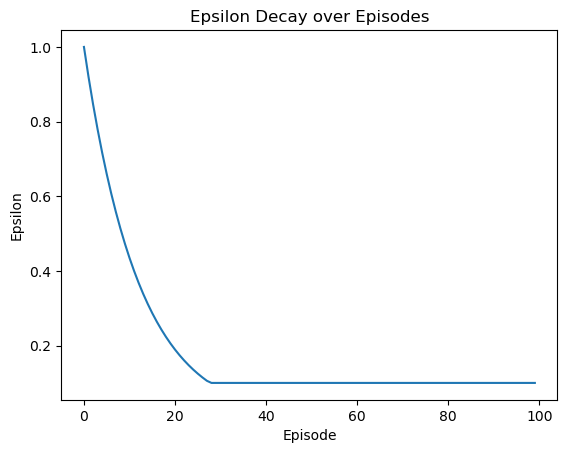

[I 2023-11-09 09:35:10,617] Trial 50 finished with value: -387.9 and parameters: {'alpha': 0.4577426865726823, 'gamma': 0.4623330577048863, 'epsilon_decay': 0.9201247126926783, 'max_timesteps': 21}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.83494483   7.04049268  -0.70976543   1.36271399]
 [  2.46482539  11.8645685  -27.58121546   1.48305429]
 [-21.52291272   3.08150324   0.           0.        ]
 [ -2.64795357 -17.192878     0.         -19.0432345 ]
 [  0.           0.           0.           0.        ]
 [  2.40711278 -47.23728976  12.25720971   5.66886739]
 [  0.54971881  16.75492807  -1.63842123  -3.57090125]
 [-20.91876318 -10.94010628 -24.53258754   7.09572098]
 [ -2.00730221  17.42325646   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ -1.44937549  -2.18588172  10.97233175

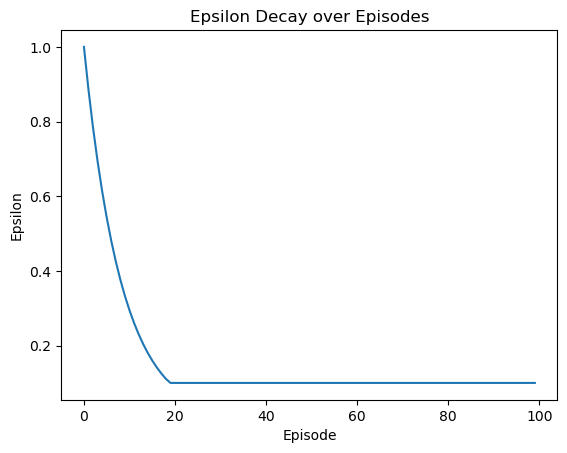

[I 2023-11-09 09:35:11,083] Trial 51 finished with value: -138.4 and parameters: {'alpha': 0.3466210391067248, 'gamma': 0.5569057058216053, 'epsilon_decay': 0.8849530270553594, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-3.97606109e-01 -2.94543631e+00  3.00743518e+01 -3.28583949e-01]
 [ 5.58669488e+00  5.19307130e+01 -2.70413625e+01  6.76996989e+00]
 [-1.57397076e+01 -1.93467269e+00 -1.33386258e+00  4.73496738e+00]
 [ 0.00000000e+00 -2.01682230e+01  0.00000000e+00 -1.12511340e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.26853527e+00]
 [ 2.56924827e+00 -4.38917866e+01  2.63067779e+01  5.25785265e+00]
 [ 5.93280084e-01  7.55602065e+01  1.18291414e-01  4.56223872e-01]
 [-2.45522716e+01 -9.93436149e+00 -2.53265328e+01  2.05595040e+01]
 [ 0.00000000e+00  0.00000000e+00 -1.93467269e+00  0.0

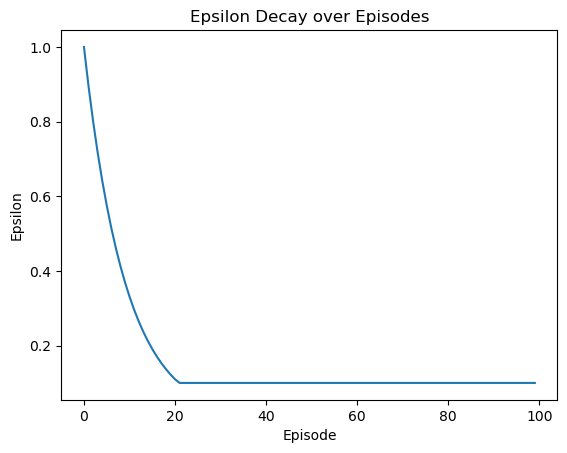

[I 2023-11-09 09:35:11,568] Trial 52 finished with value: -197.6 and parameters: {'alpha': 0.31054871065822026, 'gamma': 0.6686930133371127, 'epsilon_decay': 0.8954188822296582, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.50605893e+00  2.37520145e+01  6.99180481e-01  1.83336006e+00]
 [ 1.02397117e+00  2.57936344e+01 -2.94392930e+01  9.03651583e-02]
 [-1.85756461e+01 -3.56730180e+00  0.00000000e+00 -3.77430155e+00]
 [-1.50406050e+00 -8.33195065e+00  0.00000000e+00 -1.45344575e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.67668145e+00 -3.11606598e+01  3.68158611e+01  7.60864605e+00]
 [ 4.96477017e+00  4.89899632e+01  4.61725876e-01  3.77747616e+00]
 [-2.18357649e+01 -5.55463376e+00 -1.43498546e+01  8.96676495e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

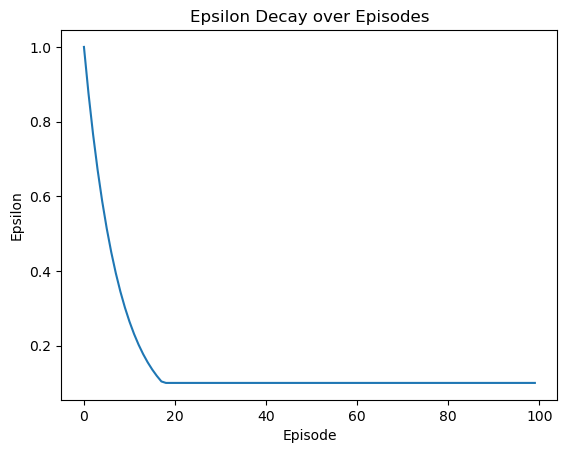

[I 2023-11-09 09:35:11,953] Trial 53 finished with value: -412.25 and parameters: {'alpha': 0.2777316881778128, 'gamma': 0.6306249984864566, 'epsilon_decay': 0.8753432394629013, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.0380706   -6.47940715  14.67488656  -1.11603844]
 [  4.56260775  27.08344156 -28.04403564   0.        ]
 [-19.46954927   0.           0.           4.35554109]
 [  0.         -12.22604372   0.         -12.22604372]
 [  0.          -2.76902009   0.           0.        ]
 [  1.56168799 -46.83778095  10.10673827   2.41975811]
 [  4.88520404  40.64053268   2.11947904   0.93381878]
 [-22.28496174 -19.25893714 -12.22604372  13.21159436]
 [  0.           0.           0.           0.60830682]
 [  0.           0.           0.         -19.46954927]
 [  5.64083786   0.           0.        

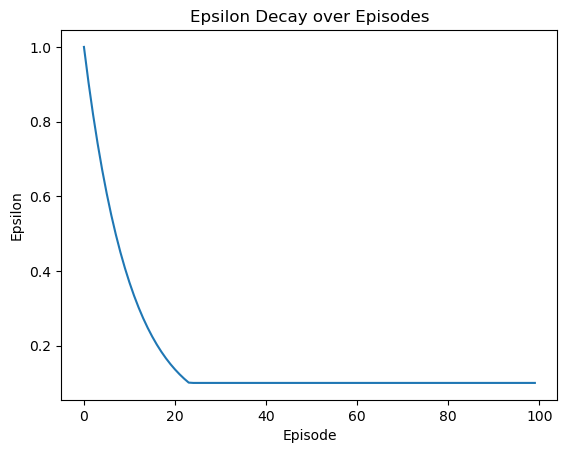

[I 2023-11-09 09:35:12,346] Trial 54 finished with value: -245.85 and parameters: {'alpha': 0.4075347906442591, 'gamma': 0.5557448826128569, 'epsilon_decay': 0.9050584807586254, 'max_timesteps': 22}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 5.09044012e+00  5.99740843e+00  1.80183330e+01  2.76617613e+00]
 [ 6.14703000e+00  2.80561155e+01 -2.17069650e+01  2.08145679e+00]
 [-1.20626553e+01 -9.37424465e-01  0.00000000e+00  0.00000000e+00]
 [-1.68008717e+00 -1.62298844e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.38611014e-01 -1.13376317e+01  2.37993603e+01  1.10064300e-01]
 [ 7.52312697e+00  3.85326788e+01  2.48706660e+00  6.03584735e+00]
 [-1.20626553e+01 -7.99293175e+00 -1.18904139e+01  1.60023659e+01]
 [-7.24860998e-01 -1.41708978e-01  0.00000000e+00  0.0

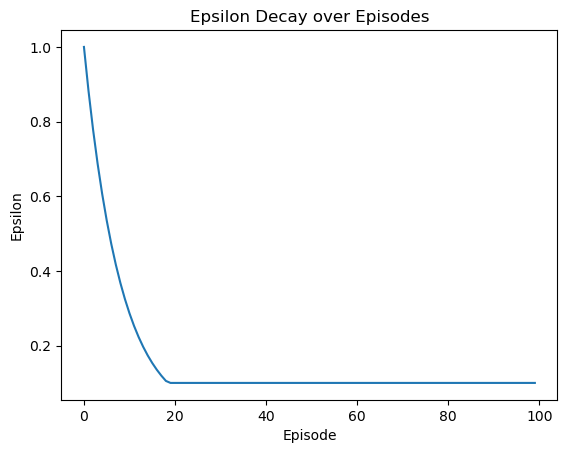

[I 2023-11-09 09:35:12,777] Trial 55 finished with value: -361.7 and parameters: {'alpha': 0.226752634319152, 'gamma': 0.6077295394998702, 'epsilon_decay': 0.8824577807593871, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.29193341e+00  1.15508276e+01  6.07450782e-01  3.01519385e+00]
 [ 6.90906456e-01  9.86312594e+00 -1.13771863e+01  1.20195828e-02]
 [ 0.00000000e+00 -3.24628518e-01  0.00000000e+00  5.43344822e-01]
 [ 0.00000000e+00 -4.42606447e+00  0.00000000e+00 -4.42606447e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.79641981e+00 -3.12007582e+01  2.48368592e+01  7.23287827e-01]
 [ 9.66649752e-01  2.86704162e+01  8.14112368e-01  4.07526648e+00]
 [-4.42606447e+00 -7.61035309e+00 -4.42606447e+00  7.10203695e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.8

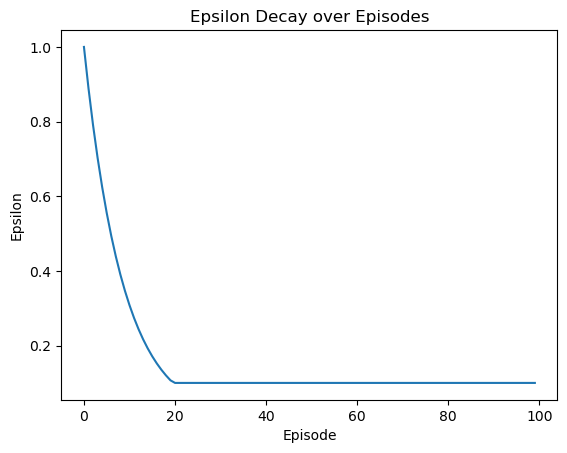

[I 2023-11-09 09:35:13,169] Trial 56 finished with value: -212.7 and parameters: {'alpha': 0.14753548233385783, 'gamma': 0.7456992603174964, 'epsilon_decay': 0.8889834317599686, 'max_timesteps': 21}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 5.39025152e+00  4.93212732e+00  2.15160738e+01 -2.36086640e-01]
 [ 8.94051911e+00  4.97323830e+01 -2.74554849e+01  5.66886003e+00]
 [-1.39175088e+01 -3.73317338e-01  0.00000000e+00  0.00000000e+00]
 [-1.45196672e+00 -8.03469248e+00  0.00000000e+00 -1.39175088e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.27806653e-01 -4.03932024e+01  3.16976626e+01  2.69903989e+00]
 [ 4.24442870e+00  6.33211099e+01  2.59580713e+00  7.69515933e+00]
 [-1.39175088e+01 -6.78699296e+00 -8.03469248e+00  2.05391446e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

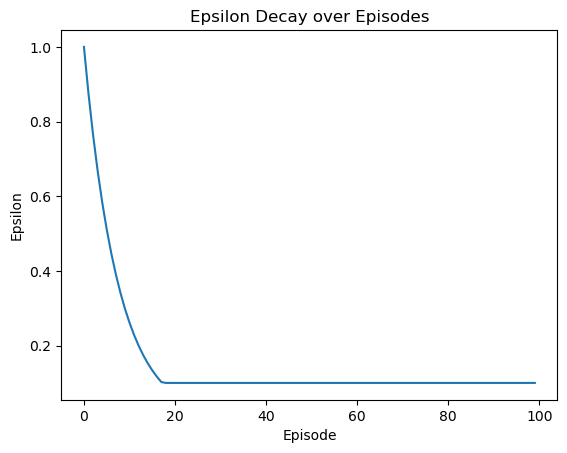

[I 2023-11-09 09:35:13,543] Trial 57 finished with value: -385.15 and parameters: {'alpha': 0.26782308260170257, 'gamma': 0.6747445683106237, 'epsilon_decay': 0.8744542781138261, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 30.03147852  80.31660564  -3.09100248  32.08657966]
 [ -4.47108885  51.55440794 -31.60986102   0.        ]
 [-28.55000703  -1.47518473  -1.64063661  -8.72755384]
 [ -1.83219623 -10.99017113   0.         -21.1818953 ]
 [  0.           0.           0.           0.        ]
 [ 18.80705887 -30.43224722 107.06183018  62.65827636]
 [ 10.40149777 133.37636555  10.81703893  15.51476636]
 [-22.36705536 -14.83913292   0.          62.00579093]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ -1.87674686  95.40171384   0.        

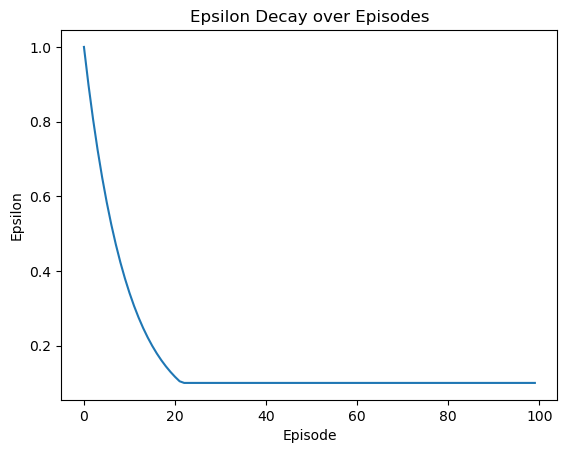

[I 2023-11-09 09:35:13,927] Trial 58 finished with value: -420.5 and parameters: {'alpha': 0.36633903750074553, 'gamma': 0.7744335691337121, 'epsilon_decay': 0.8980155363309704, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 5.97323780e+00  1.27967825e+01  3.34988271e+01  1.17524039e+01]
 [ 1.64307828e+01  5.81371197e+01 -2.12367885e+01  1.20454542e+01]
 [-1.90034032e+01 -4.90114199e+00 -2.86107863e+00  2.83938036e+01]
 [ 0.00000000e+00 -1.26142504e+01  0.00000000e+00 -2.40148067e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.57579384e-01 -3.10367131e+01  7.29243783e+01  2.12806208e+01]
 [ 2.52152314e+01  8.22239619e+01  9.52856684e+00  3.35816975e+00]
 [-2.50112344e+01 -1.25991842e+01 -2.21877679e+01  4.31369021e+01]
 [-5.44308933e+00 -4.28769211e+00  0.00000000e+00  0.0

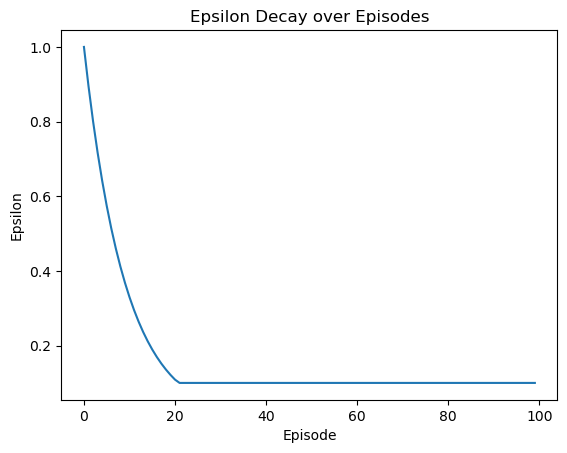

[I 2023-11-09 09:35:14,324] Trial 59 finished with value: -395.85 and parameters: {'alpha': 0.3614161066626809, 'gamma': 0.7301188018078647, 'epsilon_decay': 0.8950015706724024, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 6.25455483e+00 -3.87232477e-01  2.63813662e+01  1.31821680e+00]
 [ 1.15826875e+01  4.07239799e+01 -2.73969793e+01  1.82707051e+00]
 [-2.16713743e+01  5.11161507e+00  0.00000000e+00  6.92362575e-02]
 [-1.92200107e+00 -9.55153632e+00  0.00000000e+00 -2.04996513e+01]
 [-8.30055749e-01 -1.31006564e+00  0.00000000e+00 -2.81168263e+00]
 [ 4.68015892e+00 -4.60351998e+01  2.66360952e+01  1.26768669e+00]
 [ 3.66888716e-01  5.67618093e+01  6.32128053e+00  5.99334066e+00]
 [-2.07237092e+01  0.00000000e+00 -2.04996513e+01  3.04031114e+01]
 [-3.23206670e+00  3.10464335e+00  0.00000000e+00  0.0

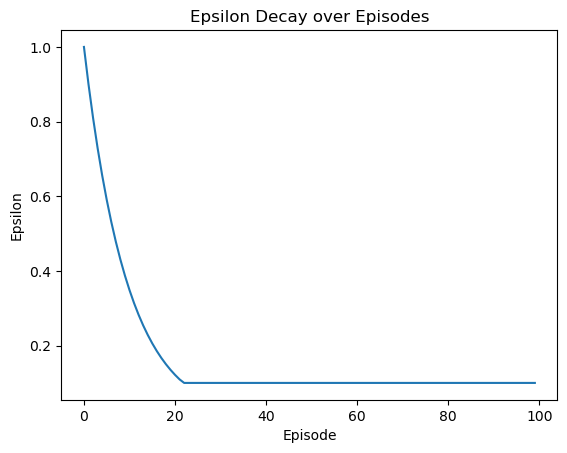

[I 2023-11-09 09:35:14,717] Trial 60 finished with value: -413.6 and parameters: {'alpha': 0.31838454386680826, 'gamma': 0.6320165008793786, 'epsilon_decay': 0.9000043444336446, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 10.03531477  11.95125835   5.82757198   8.10854417]
 [  4.9211797   23.7489971  -28.87089224   4.6460573 ]
 [-18.80955218  -3.13361922   0.          -4.67590966]
 [ -2.90294035 -11.6775156    0.         -23.16543982]
 [  0.           0.           0.           0.        ]
 [ -1.31279643 -49.52902346  34.49557468 -21.34287625]
 [ 11.0931389   24.72059966   8.34742272  11.24732079]
 [-18.80955218 -13.74244911 -23.16543982  27.76507415]
 [ -4.67590966  26.36159081   0.           0.        ]
 [  0.           0.           0.         -18.80955218]
 [  0.          29.50545207   0.        

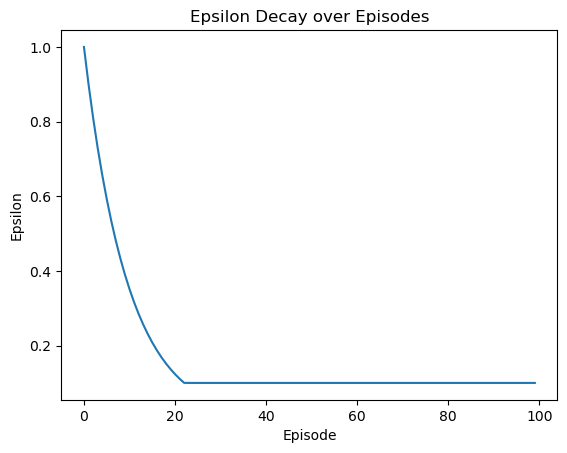

[I 2023-11-09 09:35:15,085] Trial 61 finished with value: -394.2 and parameters: {'alpha': 0.3892505201164721, 'gamma': 0.6386434378809351, 'epsilon_decay': 0.9006924225290263, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 5.87251383e+00 -2.66750511e+00  3.61850033e+01  1.74419992e+01]
 [ 5.29649330e+00  5.68245939e+01 -3.22641282e+01  1.49959981e+01]
 [-2.39798435e+01 -9.47153072e-01  0.00000000e+00 -7.62822459e+00]
 [-2.07891584e+00 -9.49802130e+00  0.00000000e+00 -1.62923161e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.57262732e+00 -3.87905808e+01  5.79550466e+00 -1.45579411e+00]
 [-1.58494631e+00  7.48015842e+01  9.07743127e+00  2.53127647e+00]
 [-1.74096919e+01 -1.06593082e+01 -1.59889623e+01  3.38442312e+01]
 [-3.56604317e+00 -2.07891584e+00  0.00000000e+00  0.0

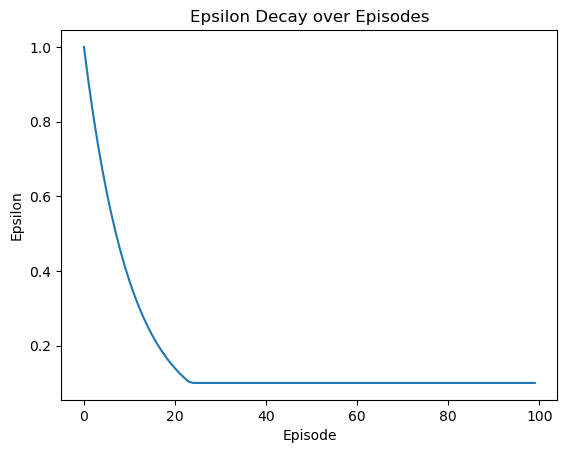

[I 2023-11-09 09:35:15,424] Trial 62 finished with value: -439.55 and parameters: {'alpha': 0.316600709848629, 'gamma': 0.6913403175408369, 'epsilon_decay': 0.9060155737475953, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 8.71941817e+00  4.13953895e+01  1.06828900e+01  8.12591345e+00]
 [-6.42832021e+00  4.99970286e+00 -2.51834471e+01  2.49112238e+01]
 [-2.36973779e+01 -4.34505480e+00  0.00000000e+00  2.74479461e+00]
 [ 0.00000000e+00 -1.06867217e+01  0.00000000e+00 -1.00710939e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.35440353e+00 -4.17396203e+01  6.15768917e+01  8.37604882e-01]
 [ 9.08521028e+00  8.11786919e+01 -5.33843862e+00  3.11185635e-01]
 [-1.75665761e+01 -1.46637739e+01 -2.48469990e+01  2.47070087e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.6

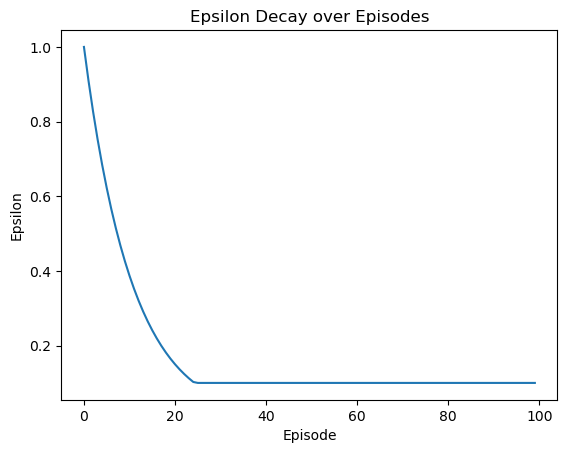

[I 2023-11-09 09:35:16,094] Trial 63 finished with value: -421.2 and parameters: {'alpha': 0.356224056981228, 'gamma': 0.6943603160203723, 'epsilon_decay': 0.9094780522039344, 'max_timesteps': 22}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.96197925e+01  1.15124631e+01  5.99950872e+01  1.59371431e+00]
 [ 2.25048384e+01  9.57450888e+01 -2.08349266e+01  2.59700394e+01]
 [-2.17256875e+01  1.91210554e+01  0.00000000e+00 -2.23906005e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.28061468e-01 -3.84458419e+01  4.83983219e+01  2.08702237e+00]
 [ 2.07618649e+01  1.32764299e+02  2.64115698e+01 -4.59023891e-01]
 [-1.72966963e+01 -1.05024885e+01 -2.53380154e+01  6.94829725e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.3

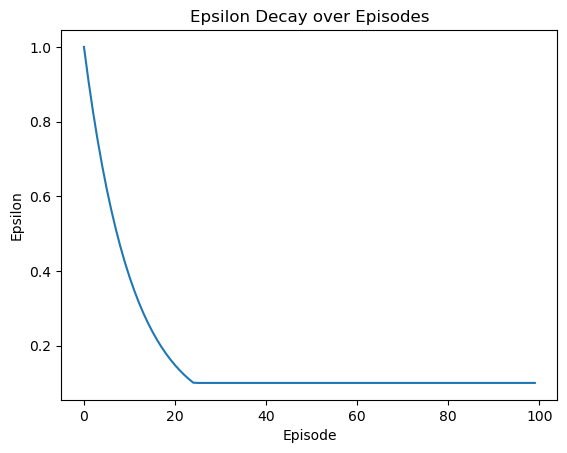

[I 2023-11-09 09:35:16,598] Trial 64 finished with value: -422.75 and parameters: {'alpha': 0.31088783729050157, 'gamma': 0.7722128469745343, 'epsilon_decay': 0.9087548276290498, 'max_timesteps': 22}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 7.85588009e+00  3.72264330e+01  5.08549721e+00  1.15257316e+01]
 [ 1.19097562e+00  3.90198377e+01 -2.43267752e+01  2.88049346e-01]
 [-2.27714079e+01  1.05044406e+00 -6.03005519e-01  1.02179423e+00]
 [-2.32102253e+00 -1.42946160e+01  0.00000000e+00 -1.69550669e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.33208859e-01 -4.81057581e+01  5.65707385e+01  1.59563105e+01]
 [ 8.53078471e+00  8.13901347e+01 -1.97910833e+00  4.20583151e+00]
 [-8.29374468e+00 -5.52916312e+00 -2.10269373e+01  6.37157132e+00]
 [ 0.00000000e+00  1.96909266e+01  0.00000000e+00  0.0

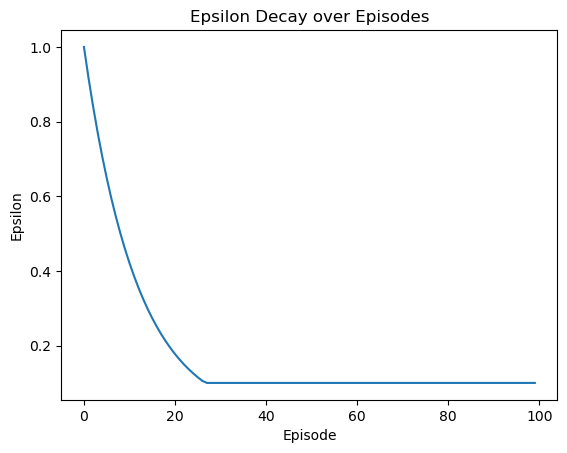

[I 2023-11-09 09:35:17,012] Trial 65 finished with value: -410.75 and parameters: {'alpha': 0.2764581560930974, 'gamma': 0.6943049500716015, 'epsilon_decay': 0.9171306897594651, 'max_timesteps': 22}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.47628586e+01  7.85279259e+00  4.47368210e+01  1.64691089e+00]
 [ 4.17991380e-01  6.75081705e+01 -2.32204077e+01  1.16730630e+01]
 [-1.57385916e+01  1.59276594e+00  0.00000000e+00  0.00000000e+00]
 [-2.08675474e+00 -2.01670689e+01  0.00000000e+00 -9.31565203e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.93077188e-01 -4.44060786e+01  4.49534674e+01  0.00000000e+00]
 [ 1.75924627e+01  1.00383889e+02  1.96458653e+01 -5.66710476e+00]
 [-9.31565203e+00 -6.21043469e+00 -2.01670689e+01  6.13642992e+01]
 [-3.52552679e+00  0.00000000e+00  0.00000000e+00  0.0

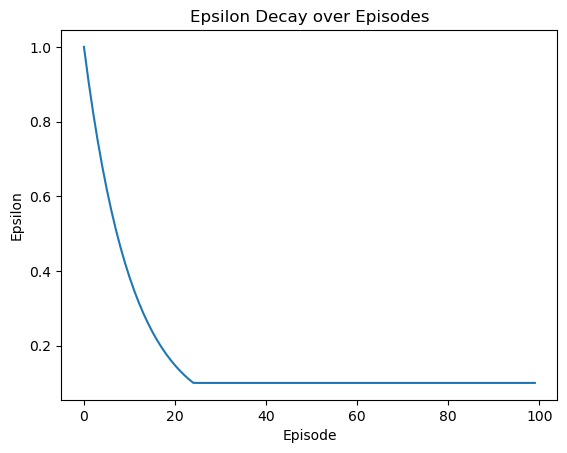

[I 2023-11-09 09:35:17,375] Trial 66 finished with value: -408.7 and parameters: {'alpha': 0.3105217344639842, 'gamma': 0.7213834061570439, 'epsilon_decay': 0.9086038219522957, 'max_timesteps': 21}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.52409558e+01  1.60974859e+01  8.38841323e+00  3.05945530e+01]
 [ 1.56155325e+00  6.74356133e+01 -3.16182348e+01 -1.07442844e+00]
 [-2.05498181e+01 -8.83852547e+00 -7.39690236e+00 -1.64782700e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.73363844e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.69072658e+01 -2.58066205e+01  8.39754223e+01  1.87090327e+01]
 [ 3.53477385e+01  9.21690434e+01  9.85645512e+00  2.02786884e+01]
 [-1.43670304e+01 -2.10070484e+01 -1.35888027e+01  7.64513592e+01]
 [-5.08448983e+00  1.35725020e+02  0.00000000e+00  0.0

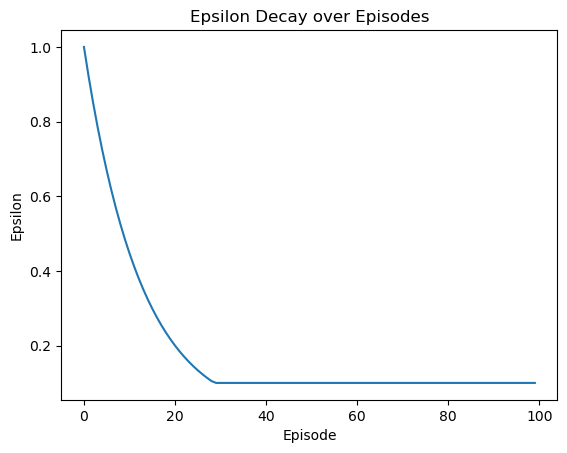

[I 2023-11-09 09:35:17,812] Trial 67 finished with value: -379.2 and parameters: {'alpha': 0.438745990252836, 'gamma': 0.7867113804161179, 'epsilon_decay': 0.9226705784527306, 'max_timesteps': 20}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-1.31802108e-01  2.87265493e+01  4.81652128e+00  1.27279289e+01]
 [-7.84756548e-02  3.86214614e+01 -2.93452041e+01  7.39946667e+00]
 [-1.63835025e+01 -1.50840674e+00 -3.77526600e+00  3.11113276e+00]
 [ 0.00000000e+00 -2.07711238e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.63147985e+00 -4.55956188e+01  5.16878961e+01  2.75009793e+01]
 [ 6.48499667e+00  4.12487982e+01  3.09681015e+00 -6.30468858e+00]
 [-2.33458089e+01 -1.92582494e+01 -1.65914417e+01  2.41887352e+01]
 [-2.26261012e+00  0.00000000e+00  0.00000000e+00  1.7

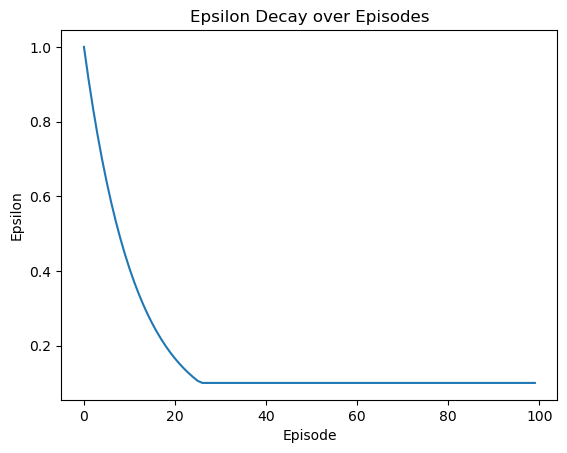

[I 2023-11-09 09:35:18,171] Trial 68 finished with value: -277.15 and parameters: {'alpha': 0.33145535455881564, 'gamma': 0.6864966012306896, 'epsilon_decay': 0.9139115749905016, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.14536292e-01  7.06681344e+00  2.83850347e+00  2.74415535e+00]
 [ 9.31040131e-01  2.54188987e+01 -2.39322413e+01 -2.43936141e-01]
 [-1.33566890e+01 -5.94748067e+00 -7.52816236e-03 -2.54606828e+00]
 [-1.08686418e+00 -1.33566890e+01 -2.19096892e-02 -1.33566890e+01]
 [-3.48121081e-01  0.00000000e+00 -8.90927408e-02 -1.02681947e+00]
 [ 5.10341587e+00 -4.18062001e+01  3.83220262e+01  9.10900422e+00]
 [ 3.19445000e+00  6.37399230e+01  1.24997102e+00  2.33453042e+00]
 [-2.34842019e+01 -5.05696957e+00 -7.65499317e+00  1.34084448e+01]
 [-5.60722798e-03  0.00000000e+00  0.00000000e+00  0.0

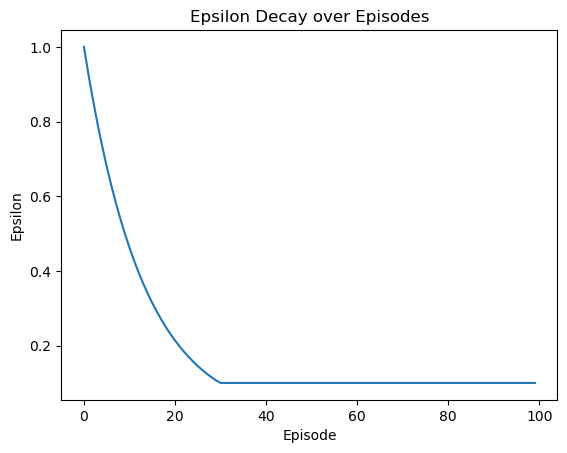

[I 2023-11-09 09:35:18,549] Trial 69 finished with value: -203.05 and parameters: {'alpha': 0.2551664390760609, 'gamma': 0.7470465769290334, 'epsilon_decay': 0.9257203548376395, 'max_timesteps': 22}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.14122048e+01  4.95925394e+00  2.36328795e+01  5.16975056e-01]
 [ 7.77485771e+00  3.61079602e+01 -1.96194882e+01  0.00000000e+00]
 [-2.73539577e+01  7.72421343e-01  0.00000000e+00  2.51577838e+01]
 [ 0.00000000e+00 -1.21213585e+01  0.00000000e+00 -5.39679506e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.29536553e-01 -4.17175776e+01  2.36618807e+01  8.63039250e+00]
 [ 9.93518342e+00  4.98795135e+01  2.28752294e-01  6.19860113e+00]
 [-3.04076861e+01 -1.87152349e+01 -1.93451392e+01  2.38169674e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.4

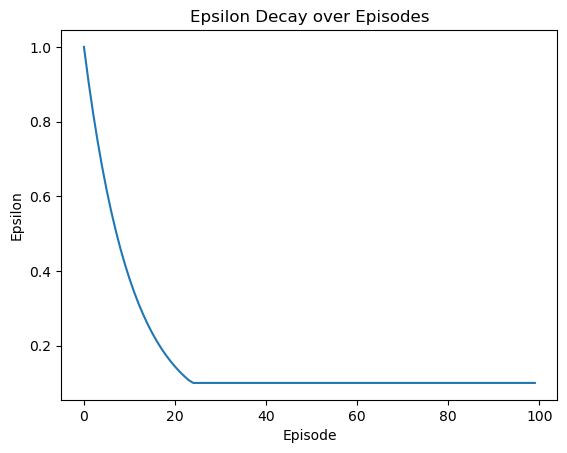

[I 2023-11-09 09:35:18,924] Trial 70 finished with value: -440.0 and parameters: {'alpha': 0.40404528172851206, 'gamma': 0.6543277000781543, 'epsilon_decay': 0.9075504918820357, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  4.66256584  17.62479851   4.20005244  -2.81199717]
 [  4.5167002   15.06316828 -27.74819385   2.4145121 ]
 [-33.3463354  -11.47783218  -1.8890702    4.58124967]
 [ -5.00396639 -26.06586845   0.         -11.99985384]
 [  0.           0.           0.           0.        ]
 [  1.66922045 -47.56326408  30.45949243   2.67689782]
 [  1.22040051  45.64105681  -2.26145242   6.91296597]
 [-35.928023   -15.04752513 -24.55553491  10.46914426]
 [ -6.15082898  14.45760744   0.          -2.80030714]
 [  0.           0.           0.         -11.99985384]
 [ -5.99192911   9.52405029  -9.74139937

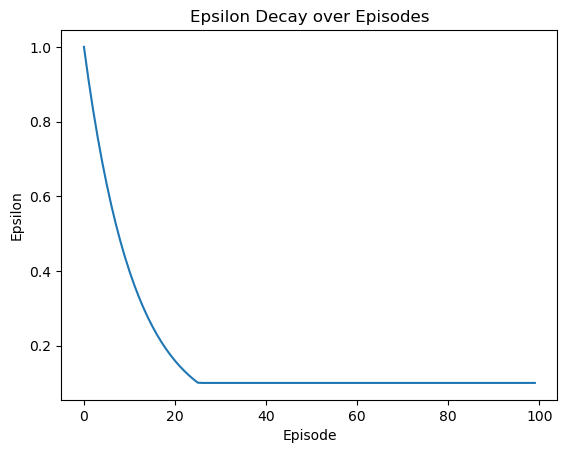

[I 2023-11-09 09:35:19,393] Trial 71 finished with value: -146.6 and parameters: {'alpha': 0.3999951278764117, 'gamma': 0.6559378066749229, 'epsilon_decay': 0.9122221435464025, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.57793525e+01  1.51330030e+00  5.05079474e+01 -5.56390708e-01]
 [ 1.65877629e+01  7.55032677e+01 -1.73086757e+01 -1.77360788e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.28042556e+01]
 [ 0.00000000e+00 -1.02701782e+01  0.00000000e+00 -1.69835720e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.31158144e-01 -3.75435335e+01  1.53932437e+01 -4.16572501e+00]
 [ 2.70413771e+01  1.01856835e+02  5.26932103e+00  4.09087086e+00]
 [-1.02701782e+01  0.00000000e+00 -2.14665042e+01  3.53813160e+01]
 [-2.49943501e+00  0.00000000e+00  0.00000000e+00  5.2

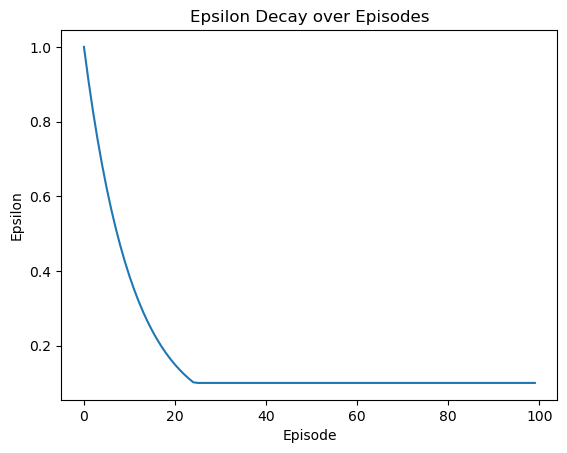

[I 2023-11-09 09:35:19,823] Trial 72 finished with value: -435.35 and parameters: {'alpha': 0.3423392743245978, 'gamma': 0.7108977534073525, 'epsilon_decay': 0.9091549952303875, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.65004977e+01  6.17586578e+01  1.81970797e+01 -1.63373385e+00]
 [-2.12150212e+00  6.82443071e+01 -3.14722836e+01 -1.33326701e-01]
 [-2.33663804e+01  7.02904890e-01 -1.48553716e+00  4.87098820e+00]
 [-3.74195638e+00 -2.32741456e+01  0.00000000e+00 -1.55434550e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.73757921e+00]
 [ 4.33070170e+00 -2.52083611e+01  9.98485167e+01  1.76012836e+00]
 [ 1.19642238e+01  1.27307621e+02  1.16963617e+01  1.22807548e+01]
 [-9.17462248e+00 -1.24498911e+01 -1.55434550e+01  4.48373860e+01]
 [-1.48553716e+00 -1.48553716e+00  0.00000000e+00  0.0

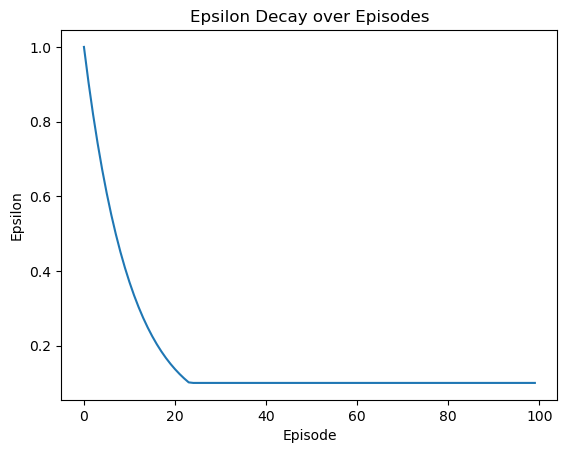

[I 2023-11-09 09:35:20,301] Trial 73 finished with value: -428.85 and parameters: {'alpha': 0.3058207491944984, 'gamma': 0.762705259905848, 'epsilon_decay': 0.9053079990055584, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ -2.04352833 -12.87139152  10.53494065   0.33909336]
 [  6.23531096  20.3370655  -32.85966567   2.57690651]
 [-28.94423014  -1.28948951   0.          -2.90431949]
 [ -3.12986041 -18.54251065   0.         -18.89467962]
 [  0.           0.           0.           0.        ]
 [  0.19843944 -43.13090019  11.92656542  -3.0430011 ]
 [  7.9449104   26.09729929   4.72228961   3.05320182]
 [-23.13929693 -10.04225635 -11.46018661  15.91623781]
 [ -3.2854929    0.           0.           2.50745904]
 [  0.           0.           0.           0.        ]
 [ -3.03254118  26.13542979   0.        

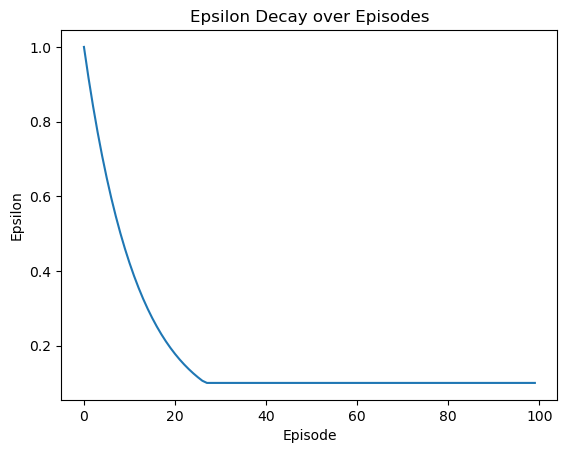

[I 2023-11-09 09:35:20,979] Trial 74 finished with value: -142.3 and parameters: {'alpha': 0.38200622033348264, 'gamma': 0.7149288850526222, 'epsilon_decay': 0.9172299196481205, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-8.96698585e-01 -2.43467864e+00  1.10407159e+01 -9.43314061e-02]
 [ 4.87640110e+00  2.73099906e+01 -2.85818022e+01  1.48109754e+00]
 [-1.01051528e+01  3.37652529e+00  0.00000000e+00  1.57780581e-01]
 [-3.28126781e+00 -1.68065019e+01  0.00000000e+00 -1.87794117e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.20843832e-01 -3.88871755e+01  1.08565723e+01  2.19806143e+00]
 [ 6.20168719e+00  4.56161479e+01  3.78752873e+00  4.56010776e+00]
 [-1.67423040e+01 -1.29575813e+01 -1.68065019e+01  1.77022461e+01]
 [-3.85186968e-01  1.11478153e+01  0.00000000e+00  0.0

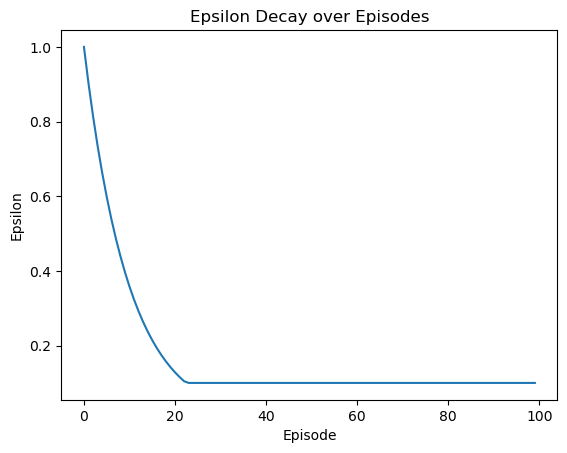

[I 2023-11-09 09:35:21,368] Trial 75 finished with value: -266.95 and parameters: {'alpha': 0.3368384277786535, 'gamma': 0.579619139939389, 'epsilon_decay': 0.9024084957143478, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.37929798e+00  4.67191513e+00  2.17074259e+01  1.55930123e+00]
 [ 1.33135935e+01  3.67529875e+01 -2.49872226e+01  3.84921063e+00]
 [ 0.00000000e+00  1.35992621e-01  0.00000000e+00  1.05627878e+01]
 [ 0.00000000e+00 -8.81208597e+00  0.00000000e+00 -1.42574481e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.94007456e-01 -4.75635917e+01  3.04891237e+01 -4.88279982e+00]
 [ 9.64913484e+00  5.34380005e+01  3.99803216e+00  3.53095346e-01]
 [-1.94312872e+01 -5.87472398e+00 -1.50357433e+01  3.21240089e+01]
 [-1.64333176e+00  2.25916016e+01  0.00000000e+00  3.5

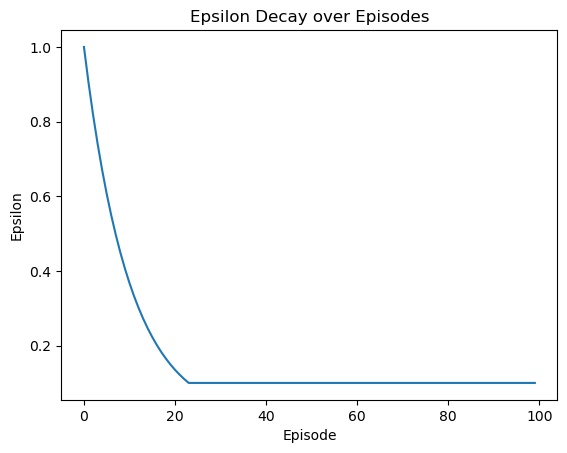

[I 2023-11-09 09:35:21,824] Trial 76 finished with value: -351.6 and parameters: {'alpha': 0.29373619884299973, 'gamma': 0.6633424601899801, 'epsilon_decay': 0.9047340081324015, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 36.49277514  76.5902848   49.96992443  43.80266763]
 [ 45.73041151 111.44308958  -4.14869602   0.63031563]
 [-26.41715522 -10.85813724  -1.42394949  67.46997737]
 [ -4.29254533 -20.04821583   0.         -24.34076116]
 [  0.           0.           0.           0.        ]
 [ 12.30978945 -33.95240418 114.88678385  20.17751541]
 [ 51.64751983 165.36308049  -4.96149311  20.67931038]
 [-37.34188532   0.         -24.26820307  27.60028935]
 [  0.           0.           0.           1.31277306]
 [  0.           0.           0.         -12.72129851]
 [  1.9828854  116.37406103  -7.15424222

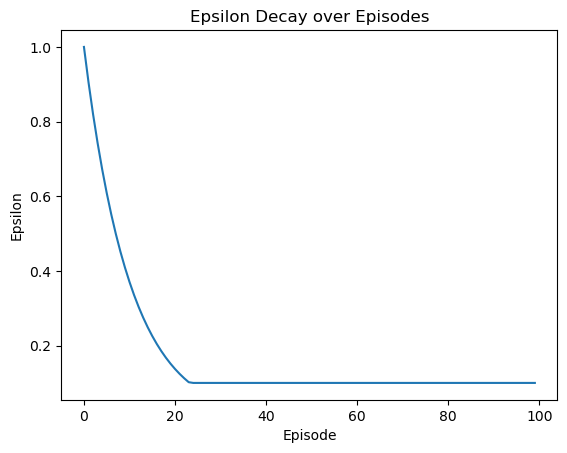

[I 2023-11-09 09:35:22,307] Trial 77 finished with value: -428.2 and parameters: {'alpha': 0.42404328366272837, 'gamma': 0.7957437898092122, 'epsilon_decay': 0.9054937197446667, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.04207501e+00  1.57558487e+01 -8.44852685e-01  3.38275844e+00]
 [-6.91674569e-01  1.77329117e+01 -2.14155731e+01  2.19530813e-01]
 [-6.58030718e+00 -8.86016620e-01  0.00000000e+00 -2.67538760e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.46075621e+00 -3.89280889e+01  3.24937134e+01  7.06926905e+00]
 [ 2.44544100e+00  4.24378526e+01 -7.58441315e-02  2.36639945e+00]
 [-1.59863876e+01 -2.38587926e+00 -1.17172663e+01  1.42445553e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

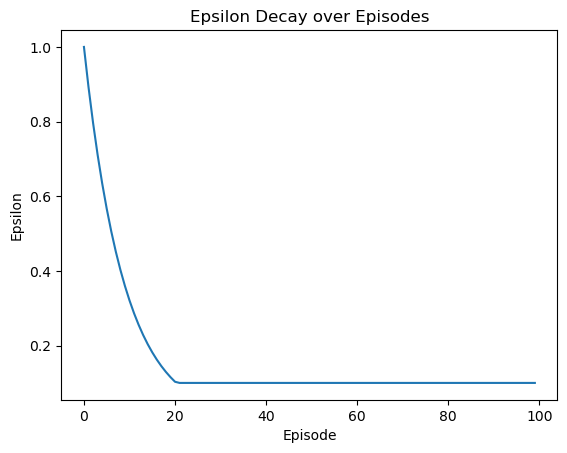

[I 2023-11-09 09:35:22,765] Trial 78 finished with value: -447.95 and parameters: {'alpha': 0.21934357262873572, 'gamma': 0.6138620537418459, 'epsilon_decay': 0.8925954433427695, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.69849309e+00  9.16031967e-01  1.73250006e+01  7.90586724e-01]
 [ 7.27995567e+00  3.00879977e+01 -2.51857976e+01  9.70763165e-01]
 [-6.42671618e+00  0.00000000e+00  0.00000000e+00  6.27118958e+00]
 [-6.47182935e-01 -6.44024333e+00  0.00000000e+00 -1.14766763e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.33394196e-01 -3.49969582e+01  1.22547713e+01  3.80386634e-01]
 [ 1.01563748e+01  4.22143804e+01  6.76891443e-01 -1.88270971e+00]
 [-1.14766763e+01 -1.00191155e+01 -6.42671618e+00  1.04191144e+01]
 [-8.29404073e-02  1.86475348e+01  0.00000000e+00  0.0

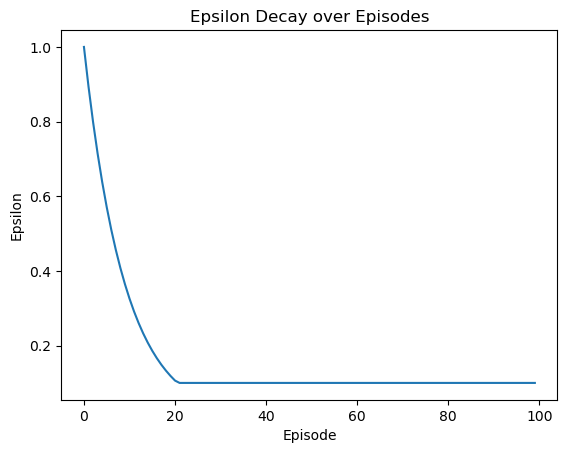

[I 2023-11-09 09:35:23,252] Trial 79 finished with value: -443.9 and parameters: {'alpha': 0.21422387259468784, 'gamma': 0.5982342042092557, 'epsilon_decay': 0.8939462773273801, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.77738705e+00 -6.41392678e-01  1.54301851e+01  1.59832581e+00]
 [ 4.27909355e+00  2.64476385e+01 -2.04337645e+01  3.99080937e-01]
 [-6.13039583e+00 -5.01193757e-01  0.00000000e+00  0.00000000e+00]
 [-7.51790635e-01 -6.07129343e+00  0.00000000e+00 -1.10080666e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.53657604e-01 -2.99461045e+01  1.83468594e+01  0.00000000e+00]
 [ 4.41462505e+00  3.97023237e+01  4.24759407e-01  2.37184032e+00]
 [-6.13039583e+00 -9.92600147e+00 -1.48614106e+01  7.84970409e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  8.3

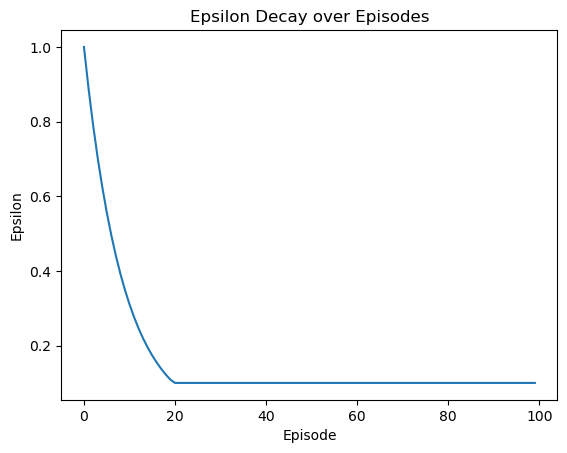

[I 2023-11-09 09:35:23,663] Trial 80 finished with value: -437.0 and parameters: {'alpha': 0.2043465276130413, 'gamma': 0.6001241893716596, 'epsilon_decay': 0.8896836243954188, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 5.19033903e+00  4.76728444e+00  1.49217178e+01  9.10140386e-01]
 [ 8.13552023e+00  2.82636743e+01 -2.43859145e+01  8.40974861e-01]
 [-1.16106768e+01 -8.12964778e-01 -2.11053831e-03 -1.53992728e+00]
 [-1.46320712e+00 -6.38729841e+00 -6.52579077e-03 -1.14961199e+01]
 [-1.65523541e-01  0.00000000e+00  0.00000000e+00 -5.11799283e-01]
 [ 4.03354086e-01 -2.93028349e+01  2.25391122e+01  8.93114834e-01]
 [ 2.25789264e+00  4.51984695e+01  4.71593427e-01  1.64202411e+00]
 [-1.60869549e+01 -7.60978496e+00 -1.14146774e+01  1.04581519e+01]
 [-1.70339119e-03  0.00000000e+00  0.00000000e+00  0.0

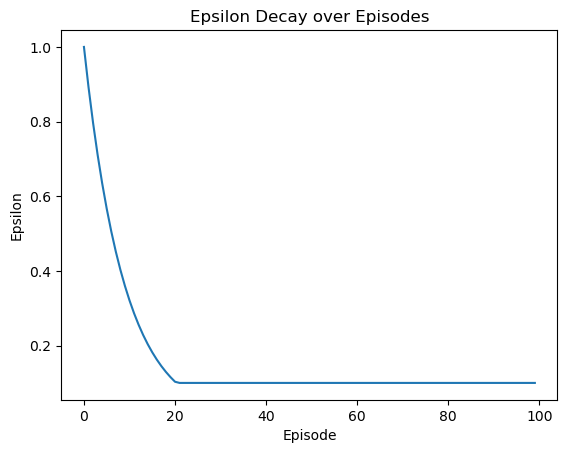

[I 2023-11-09 09:35:24,159] Trial 81 finished with value: -373.45 and parameters: {'alpha': 0.21290994684371484, 'gamma': 0.5978036635884755, 'epsilon_decay': 0.8926159636576264, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.28334140e-02 -6.84099204e-01  1.32506350e+01  3.22882052e+00]
 [ 4.88919515e+00  2.15859939e+01 -2.26547946e+01  2.86103883e+00]
 [-5.68955690e+00  3.36881682e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.68955690e+00  0.00000000e+00 -5.68955690e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.03676981e-01 -2.33936767e+01  8.12405684e+00  0.00000000e+00]
 [ 2.83933486e+00  3.00696055e+01  1.57960576e+00  8.18222108e-01]
 [-5.68955690e+00 -2.54635068e+00 -5.68955690e+00  1.80784214e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

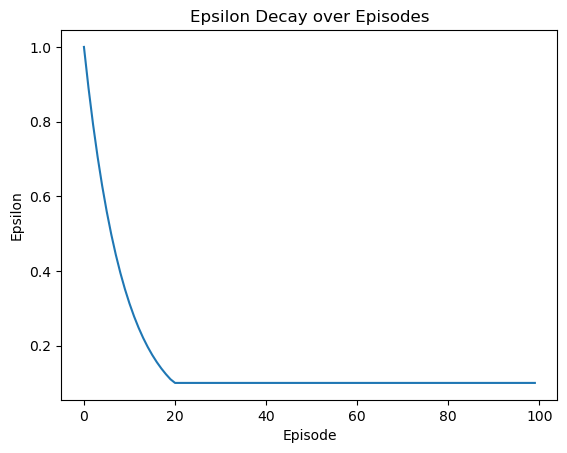

[I 2023-11-09 09:35:24,627] Trial 82 finished with value: -444.0 and parameters: {'alpha': 0.1896518967177283, 'gamma': 0.5666249303833704, 'epsilon_decay': 0.8902445546724739, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 8.45473420e-01  4.39578379e-01  5.69488200e+00 -7.36947522e-02]
 [ 1.39591259e+00  1.22770316e+01 -2.27053493e+01  1.24930050e+00]
 [-1.40907774e+01 -5.56593664e-01  0.00000000e+00  1.88171139e+00]
 [-5.22348084e-01 -9.99523425e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.73910688e-01 -2.83207150e+01  8.39226349e+00 -1.49015277e+00]
 [ 2.24312187e+00  1.24432988e+01 -2.50952747e-01  9.10366052e-01]
 [-1.00853172e+01 -1.10760671e+01 -1.36266233e+01  9.80998367e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.4

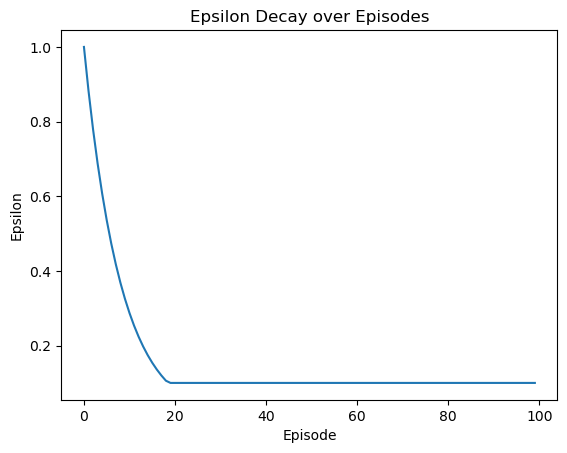

[I 2023-11-09 09:35:25,005] Trial 83 finished with value: -149.7 and parameters: {'alpha': 0.18340614448348552, 'gamma': 0.5176199284439532, 'epsilon_decay': 0.8827234265061841, 'max_timesteps': 21}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.40332708e-02 -1.26601345e-01  1.09714058e+01  7.69298990e-01]
 [ 3.16285622e+00  2.00753022e+01 -1.95352678e+01  3.61792466e+00]
 [-6.94458359e+00 -9.19022158e-01  0.00000000e+00  0.00000000e+00]
 [-7.06281284e-01 -1.22815925e+01  0.00000000e+00 -1.95352678e+01]
 [-2.27456108e-01  0.00000000e+00 -1.60947979e-02 -2.23992096e+00]
 [ 4.90524006e-02 -3.76568001e+01  1.90784188e+01  2.27611734e+00]
 [ 5.29300411e+00  3.22443487e+01  3.02195146e+00  4.33377236e+00]
 [-6.94458359e+00 -1.07599450e+01 -6.94458359e+00  1.42603380e+01]
 [-2.16809041e+00  8.27314762e+00  0.00000000e+00  0.0

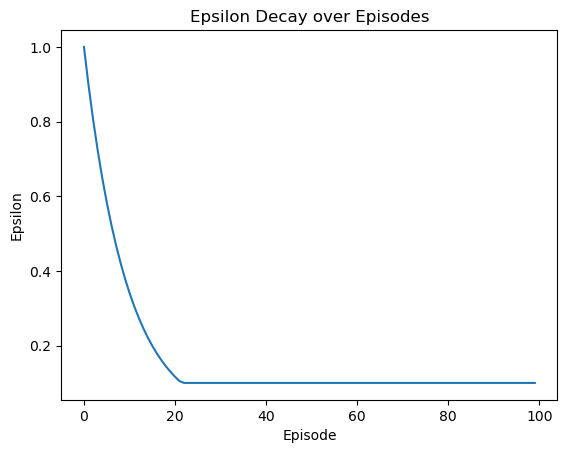

[I 2023-11-09 09:35:25,502] Trial 84 finished with value: -434.35 and parameters: {'alpha': 0.2314861197683459, 'gamma': 0.5716823935501067, 'epsilon_decay': 0.898100751026155, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  3.75899935  -0.17005333   9.38115281   2.92002283]
 [  5.74695349  14.39543204 -24.29901642   0.90568745]
 [ -7.35196778   6.00165843   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.09254104 -37.14487447  12.14568652   0.589389  ]
 [  5.15906169  20.83800553   5.52191752   0.97442592]
 [ -7.31386451 -11.32132511 -20.06976613  15.15605181]
 [  0.           0.           0.           1.35471457]
 [  0.           0.           0.          -7.31386451]
 [  2.56985911   0.          14.36467185

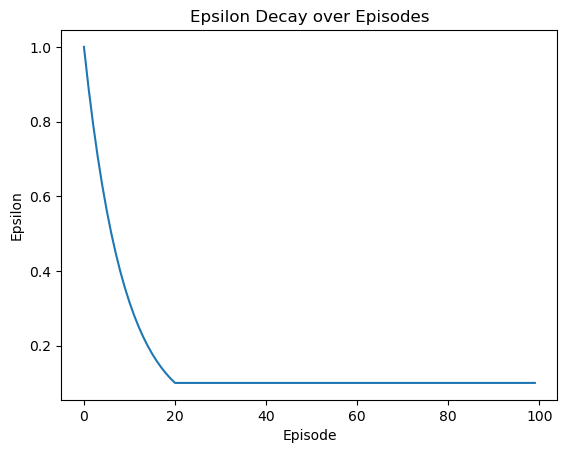

[I 2023-11-09 09:35:25,894] Trial 85 finished with value: -108.4 and parameters: {'alpha': 0.2437954835989285, 'gamma': 0.6438622385059602, 'epsilon_decay': 0.8911551243738566, 'max_timesteps': 19}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.76497898  17.72891709   1.19370008   8.13903228]
 [  0.84862216  25.7652808  -22.71915289   2.99997448]
 [-23.23402133  -0.51577313  -0.97071398  -3.00749639]
 [ -2.29705814 -21.88871283   0.          -8.04384416]
 [  0.           0.           0.           0.        ]
 [  0.49823877 -21.94322547  30.67516325  11.0887781 ]
 [  5.39420462  39.72551246  -0.74137674   8.46526929]
 [-23.96707095  -9.28727157  -8.04384416  15.51388143]
 [ -2.20110198   0.           0.          -2.33311945]
 [  0.           0.           0.         -13.93090736]
 [ 15.85083706   0.           0.        

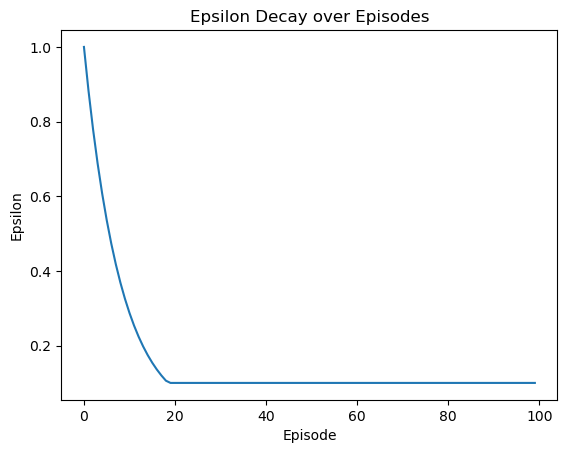

[I 2023-11-09 09:35:26,477] Trial 86 finished with value: -444.2 and parameters: {'alpha': 0.26812813875298974, 'gamma': 0.614964704924672, 'epsilon_decay': 0.8827524292463196, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.86574597e+00  1.39842345e+00  1.81552919e+01  3.11902395e+00]
 [ 1.53440275e+00  3.12187035e+01 -2.14997464e+01  2.26434687e+00]
 [-1.02952667e+01 -2.06067442e-01  0.00000000e+00  1.46282608e+00]
 [ 0.00000000e+00 -5.73917499e+00  0.00000000e+00 -6.40634262e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.94453068e-02 -3.36189043e+01  1.48087877e+01 -1.00204199e+00]
 [ 2.84688651e+00  4.80564051e+01  2.58452732e+00 -3.53938667e-02]
 [-1.02601460e+01 -1.14301438e+01 -1.71018198e+01  1.38537762e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.0

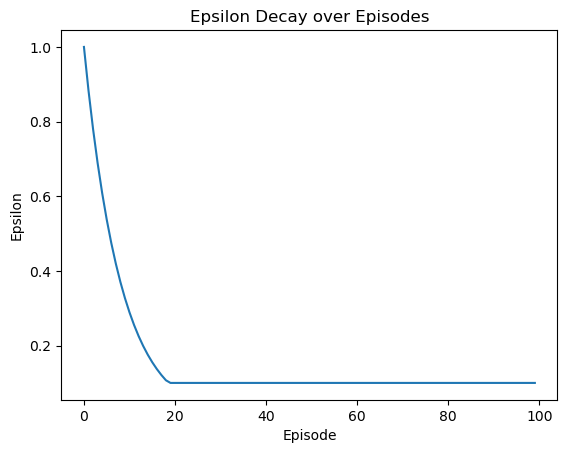

[I 2023-11-09 09:35:26,990] Trial 87 finished with value: -418.7 and parameters: {'alpha': 0.19130583311227928, 'gamma': 0.6172047832735487, 'epsilon_decay': 0.8832612255595903, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.31122624   3.56832787   0.43757618   1.41275098]
 [  1.77183108   6.75115842 -25.03033497   0.57266333]
 [-13.62923718  -1.17948143   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  1.47688181 -39.47127543   6.01112113   1.3743124 ]
 [  3.43655146   1.24431135  -0.12348302  -2.8565311 ]
 [-19.01174042  -5.32214827 -13.84205015   6.15464032]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ -1.44990004   0.           0.        

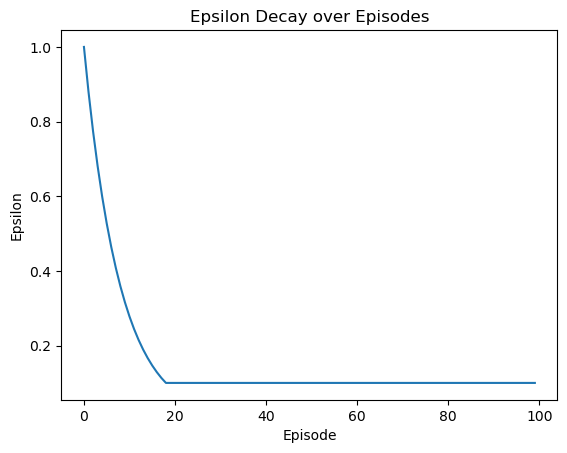

[I 2023-11-09 09:35:27,335] Trial 88 finished with value: -6.3 and parameters: {'alpha': 0.26610741361113066, 'gamma': 0.557983823617931, 'epsilon_decay': 0.8798055601335358, 'max_timesteps': 8}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.68709503e+00  1.13742356e+01  7.68186991e-01  2.43189231e+00]
 [ 0.00000000e+00  9.81895587e+00 -2.33635301e+01  6.17397663e-01]
 [-6.61933012e+00 -1.30243796e+00  0.00000000e+00 -7.27354712e-01]
 [-7.89613300e-01 -1.17781425e+01  0.00000000e+00 -6.61933012e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.27123453e+00 -2.59844444e+01  2.06617807e+01  3.84801446e+00]
 [-4.48890410e+00  3.26735987e+01  1.18607113e+00  5.29517585e+00]
 [-1.57986922e+01 -4.41288675e+00 -1.17781425e+01  8.92878197e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.9

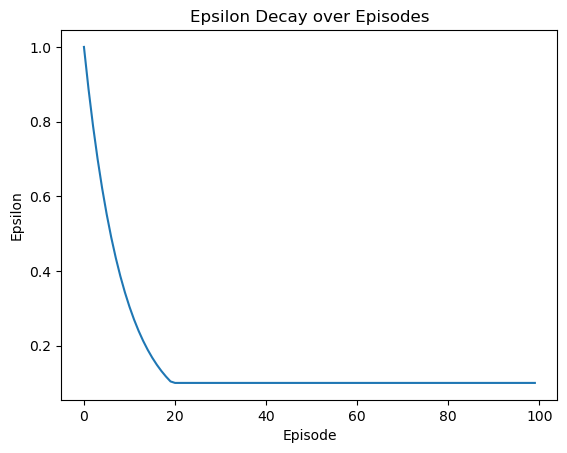

[I 2023-11-09 09:35:27,782] Trial 89 finished with value: -355.8 and parameters: {'alpha': 0.22064433727714788, 'gamma': 0.5406393201777486, 'epsilon_decay': 0.8877123199388975, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 9.66964582e-01  1.37785727e-01  1.28460853e+01  6.52608657e-01]
 [ 1.74972426e+00  2.71663739e+01 -1.87979553e+01 -1.76258818e-01]
 [-8.30679182e+00  1.23399535e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.45929682e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.91903702e-03 -3.10406302e+01  1.22759848e+01 -1.66275340e+00]
 [ 3.34198307e+00  4.13440457e+01  5.81305079e-01  1.09109255e+00]
 [-8.30679182e+00 -5.52760515e+00 -4.48929156e+00  1.16149695e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

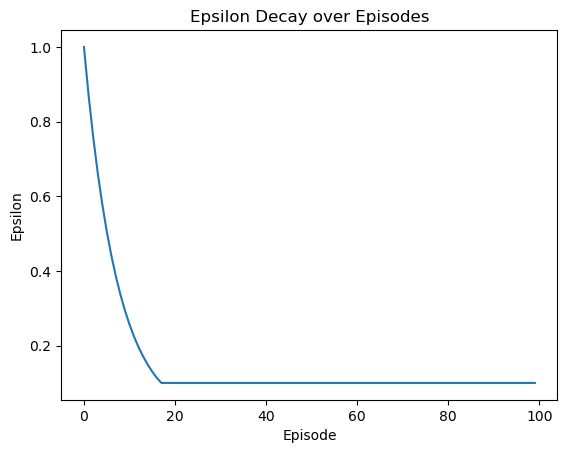

[I 2023-11-09 09:35:28,264] Trial 90 finished with value: -443.8 and parameters: {'alpha': 0.14964305185638516, 'gamma': 0.5740221971318633, 'epsilon_decay': 0.872852098673122, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.61704999e+00  1.93519329e-01  7.17275021e+00 -4.29305959e-02]
 [ 3.61466777e+00  1.33562235e+01 -1.93875304e+01  5.18617507e-01]
 [-4.16729017e+00  1.49576388e+00  0.00000000e+00 -8.73131401e-01]
 [-3.35488554e-01 -7.75570342e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.68779075e-04 -1.29261724e+01  9.01042331e+00  1.04122643e-01]
 [ 1.84194837e+00  1.46318638e+01 -1.03360233e-02  1.82862793e+00]
 [-7.73961026e+00 -5.14835747e+00 -7.75570342e+00  1.24371545e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.6

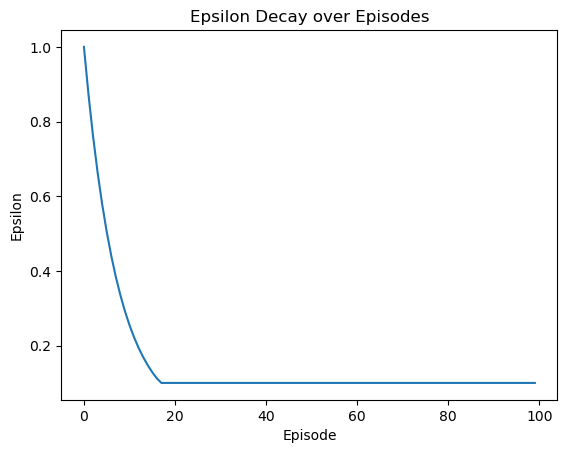

[I 2023-11-09 09:35:28,611] Trial 91 finished with value: -156.2 and parameters: {'alpha': 0.13890967217275957, 'gamma': 0.5795507615265522, 'epsilon_decay': 0.8722364399151588, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-1.09391700e-01 -5.16960873e-01  1.46540373e+01 -3.87397910e-01]
 [ 7.02075632e+00  3.19761498e+01 -2.05839028e+01  1.87827349e+00]
 [-1.62302639e+01 -3.40428442e-01 -5.37742239e-01  2.14290215e+00]
 [ 0.00000000e+00 -1.57861343e+01  0.00000000e+00  0.00000000e+00]
 [-5.62228898e-02 -1.20351168e+00  0.00000000e+00  0.00000000e+00]
 [-2.99768068e-02 -2.72005266e+01  9.15336328e+00  0.00000000e+00]
 [ 4.17948674e+00  4.52389350e+01  5.57620163e+00  3.98554953e-01]
 [-9.40468364e+00 -3.42881362e+00 -9.50749053e+00  1.85151448e+01]
 [-1.79563417e+00  4.52649232e+00  0.00000000e+00  0.0

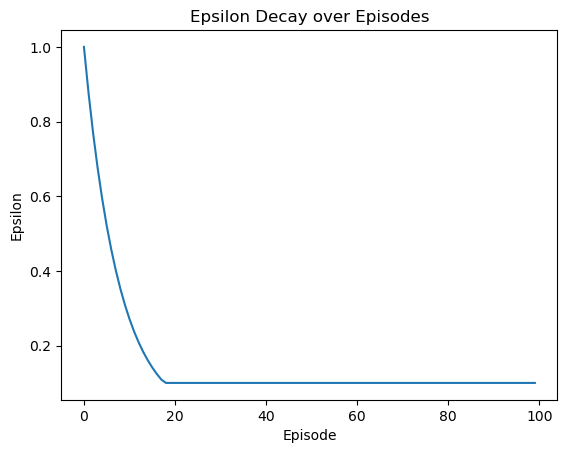

[I 2023-11-09 09:35:28,984] Trial 92 finished with value: -360.85 and parameters: {'alpha': 0.17144068089338152, 'gamma': 0.6098529521645722, 'epsilon_decay': 0.8776841189010088, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.45222741   8.65413407   1.49894162   0.5071805 ]
 [  2.88290468   8.43476136 -24.81156949   0.81417236]
 [ -6.55191258   2.7340189    0.          -0.07616271]
 [ -0.25296328  -6.56634602   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.44789    -22.78069818  14.8424227    2.18017049]
 [  2.55454324  16.76387213   2.72887235   1.81311906]
 [ -9.07283347  -9.13201897 -13.80964877   8.808813  ]
 [  0.           0.          -0.1817198   -0.25296328]
 [  0.           0.          -0.47794509  -9.30179281]
 [  5.65142213   0.           2.00395342

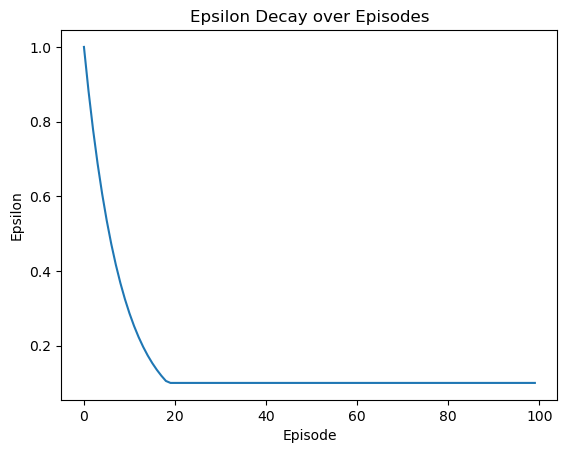

[I 2023-11-09 09:35:29,403] Trial 93 finished with value: -81.9 and parameters: {'alpha': 0.11590711173419668, 'gamma': 0.6276478613635946, 'epsilon_decay': 0.8824111348567971, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.18474759e-01  5.50964912e-01  7.14458552e+00  4.88241173e-01]
 [ 2.18870914e+00  1.42018752e+01 -2.14795056e+01  7.79002245e-01]
 [-8.32513006e+00 -1.06189772e-01 -1.59284658e-01  2.02266729e+00]
 [-3.02527388e-01 -1.03792402e+01  0.00000000e+00 -3.02136972e+00]
 [-8.39738417e-03  0.00000000e+00  0.00000000e+00 -1.43242730e-01]
 [ 1.19152364e-03 -2.05899932e+01  7.20703774e+00  0.00000000e+00]
 [ 3.50159533e+00  2.42474415e+01  3.25906152e-01  2.95379080e-01]
 [-8.18188733e+00 -5.44452267e+00  0.00000000e+00  4.27898329e+00]
 [-4.31343809e-01  0.00000000e+00  0.00000000e+00  0.0

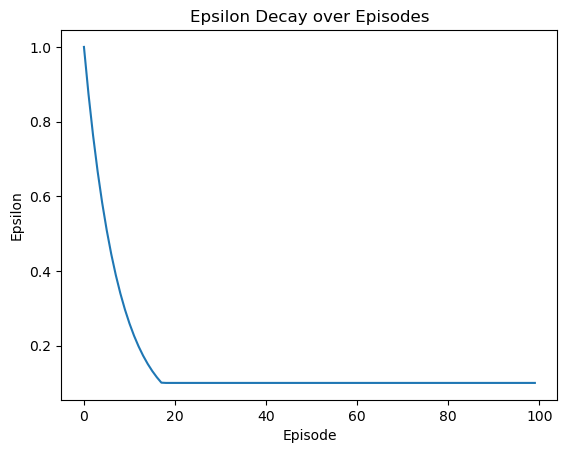

[I 2023-11-09 09:35:29,772] Trial 94 finished with value: -355.25 and parameters: {'alpha': 0.10071232395646044, 'gamma': 0.5234647689539286, 'epsilon_decay': 0.8736751479822485, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 4.87471500e+00  2.18101935e+01  2.68808834e+00  2.58287042e+00]
 [ 1.81341273e-01  2.26760537e+01 -9.38227130e+00  0.00000000e+00]
 [-2.06927265e+01  0.00000000e+00  0.00000000e+00  7.89422517e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.17992871e+00 -3.23922402e+01  3.90783716e+01  4.01835848e+00]
 [ 4.82159551e+00  4.48027843e+01  4.96491809e-01  7.67111565e+00]
 [ 0.00000000e+00 -1.03903949e+01 -5.13609226e+00  1.09538171e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

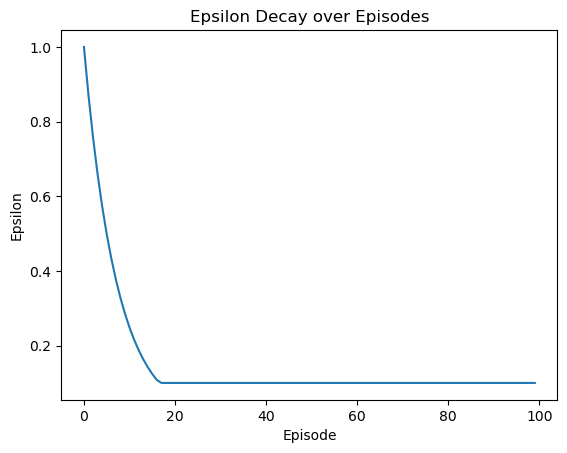

[I 2023-11-09 09:35:30,138] Trial 95 finished with value: -392.15 and parameters: {'alpha': 0.1712030752158266, 'gamma': 0.6499324955331911, 'epsilon_decay': 0.8700582902173135, 'max_timesteps': 25}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 9.41003419e-01  6.10880460e-01  6.65279280e+00  2.29667180e-01]
 [ 3.00689812e+00  1.35779698e+01 -2.52035460e+01  1.76484761e+00]
 [-1.74470680e+01  3.03926989e+00  0.00000000e+00  5.40107088e-01]
 [-7.25606948e-01 -8.28038106e+00 -1.79400748e-03 -9.30001804e+00]
 [-2.91224447e-03  0.00000000e+00  0.00000000e+00 -2.52027927e-02]
 [-2.53205360e-02 -2.91251319e+01  6.74831785e+00 -1.37980763e+00]
 [ 1.70905792e+00  1.79656947e+01  1.60063704e+00 -2.71411253e-01]
 [-2.11014347e+01 -1.05366965e+01 -1.41371084e+01  8.74124171e+00]
 [-1.77863162e-04  3.57140534e+00  0.00000000e+00  0.0

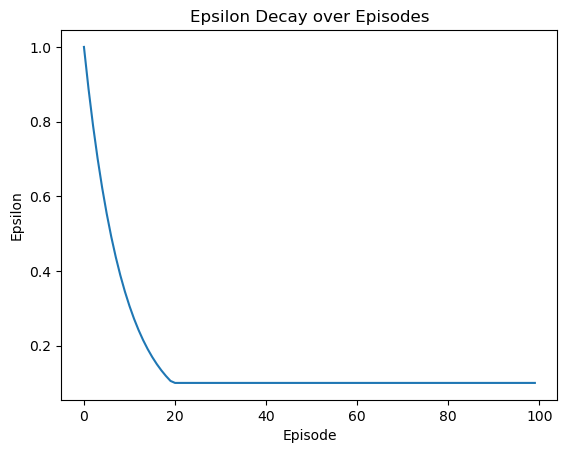

[I 2023-11-09 09:35:30,512] Trial 96 finished with value: -205.0 and parameters: {'alpha': 0.14912556860963855, 'gamma': 0.5656855958248186, 'epsilon_decay': 0.8883129867706546, 'max_timesteps': 24}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-6.20530748e-02  1.26435848e+01  5.83051059e-01 -4.33157631e-02]
 [ 0.00000000e+00  8.98645959e+00 -1.41218071e+01  0.00000000e+00]
 [-5.73308731e+00 -3.38718833e-01 -1.17175240e+00  4.49758030e-01]
 [-6.48591107e-01 -5.73308731e+00  0.00000000e+00 -1.41112095e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.05784380e+00 -3.75565037e+01  2.41458108e+01  3.55418901e+00]
 [ 9.55993392e-01  3.75119494e+01  1.60835392e-01  3.12782222e-02]
 [-5.73308731e+00 -6.59181195e+00 -1.41218071e+01  8.85358990e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

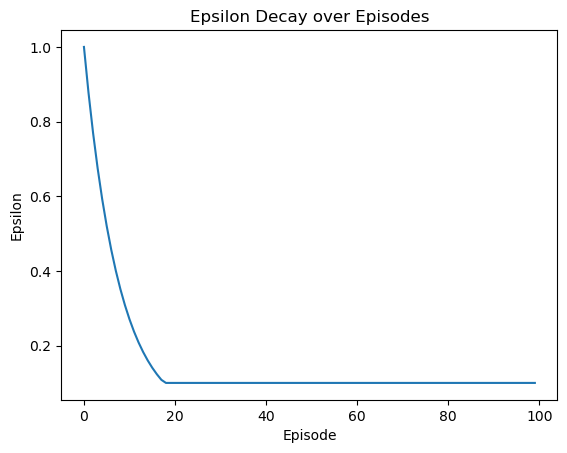

[I 2023-11-09 09:35:30,877] Trial 97 finished with value: -286.1 and parameters: {'alpha': 0.19110291034908328, 'gamma': 0.5919910392515851, 'epsilon_decay': 0.8774229133464918, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.72364267e+00 -1.75774755e+00  1.31653809e+01  2.19334284e-01]
 [ 1.29661447e+00  2.44265046e+01 -2.54568726e+01  1.29033918e+00]
 [-1.35747065e+01 -1.22248010e+00  0.00000000e+00  4.89821607e-01]
 [-1.11767855e+00 -7.80182882e+00  0.00000000e+00 -1.79109769e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.95721762e+00]
 [ 1.07143499e-02 -3.88848061e+01  1.12533198e+01  8.93463292e-01]
 [ 4.12594782e+00  3.78178137e+01 -1.04799306e+00 -7.65322280e-01]
 [-1.83653015e+01 -2.62980371e+00 -1.76883151e+01  3.85759551e+00]
 [ 0.00000000e+00  1.49023807e+00  0.00000000e+00  0.0

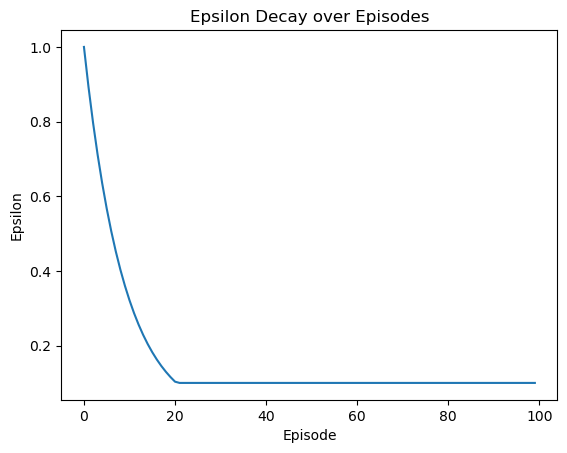

[I 2023-11-09 09:35:31,375] Trial 98 finished with value: -368.65 and parameters: {'alpha': 0.26006096075910345, 'gamma': 0.5508651982076247, 'epsilon_decay': 0.8927032558386799, 'max_timesteps': 22}. Best is trial 45 with value: -452.8.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 4.04412064e+00  2.30309080e+01  1.76405241e+00  1.94542443e+00]
 [ 4.49503977e-01  2.23018962e+01 -2.18804527e+01  1.46223549e+00]
 [-1.13357802e+01  1.53880545e+00 -1.65356541e+00  0.00000000e+00]
 [-9.26195296e-01  0.00000000e+00  0.00000000e+00 -1.54157357e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.27945535e+00 -2.89161954e+01  3.57011778e+01  5.54840244e+00]
 [ 6.61534736e+00  4.24001540e+01  2.64750625e+00  5.22417770e+00]
 [-6.44006252e+00 -1.23258481e+01 -1.14580095e+01  1.18310087e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.0

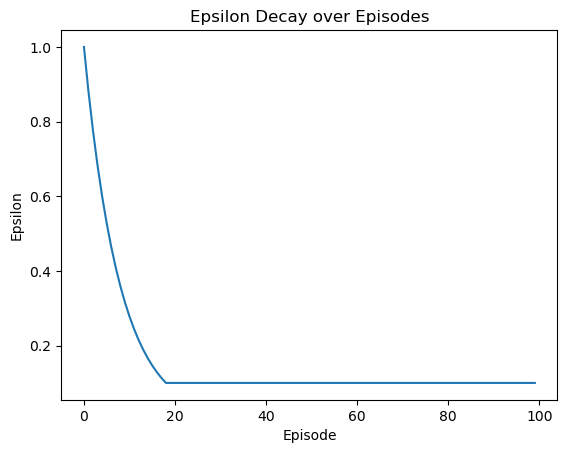

[I 2023-11-09 09:35:31,750] Trial 99 finished with value: -270.35 and parameters: {'alpha': 0.21466875075760325, 'gamma': 0.669951954538131, 'epsilon_decay': 0.8798345878636475, 'max_timesteps': 23}. Best is trial 45 with value: -452.8.


In [36]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)
best_params = study.best_params

Best Parameters: {'alpha': 0.3347478332525182, 'gamma': 0.615224967950023, 'epsilon_decay': 0.886582911548409, 'max_timesteps': 23}
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[-4.11428239e-01  6.99504244e-02  2.21171215e+01  9.96142920e-01]
 [ 0.00000000e+00  4.21942636e+01 -2.37157524e+01  1.46198514e-02]
 [-1.00424350e+01  2.83054473e+00  0.00000000e+00 -2.06819153e+00]
 [-2.06819153e+00 -1.71491208e+01  0.00000000e+00 -1.00424350e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.10602007e+00 -3.96724032e+01  7.80532534e+00  1.17742851e+00]
 [ 4.68604691e+00  6.04563705e+01 -7.41513805e-01 -1.166

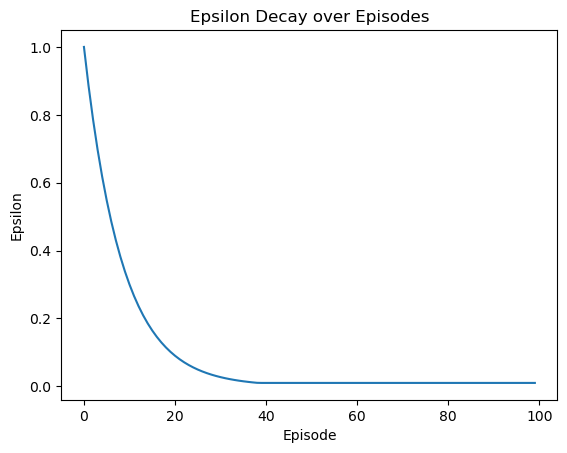

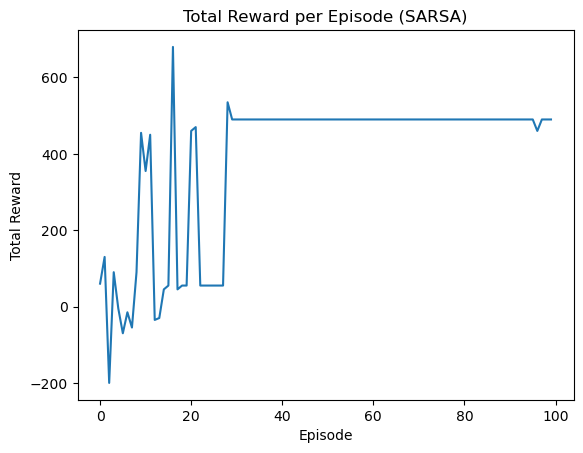

In [37]:
# Worked Best
print(f"Best Parameters: {best_params}")
q_table_sarsa, Srewards = sarsa(env, num_episodes=100, epsilon_start=1.0, epsilon_min=0.01, **best_params)
plot_rewards(Srewards, "Total Reward per Episode (SARSA)")

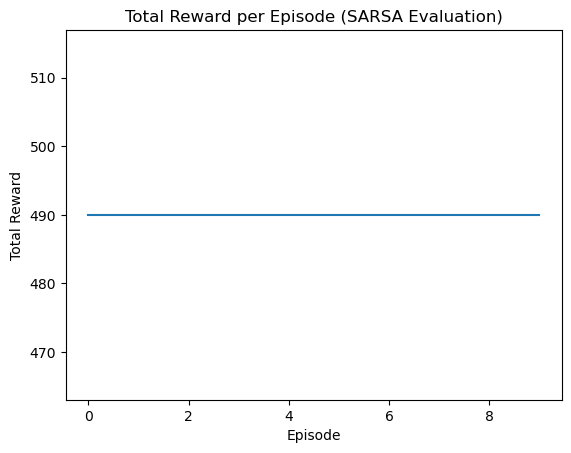

In [38]:
# Evaluate the SARSA policy
eval_rewards_sarsa = evaluate_policy(env, q_table_sarsa, num_episodes=10, max_timesteps=10)
plot_rewards(eval_rewards_sarsa, "Total Reward per Episode (SARSA Evaluation)")

C:\Users\karti\AppData\Local\Temp\ipykernel_18276\600712846.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Paired', 10)


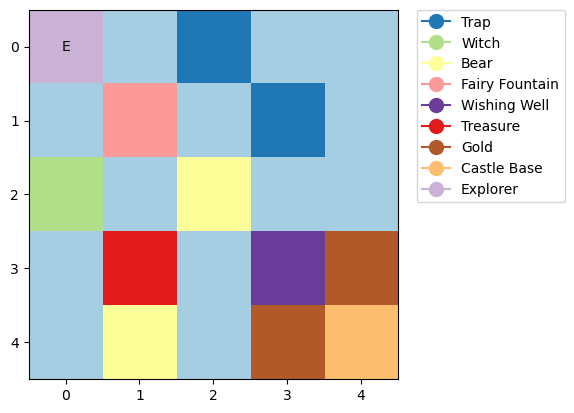

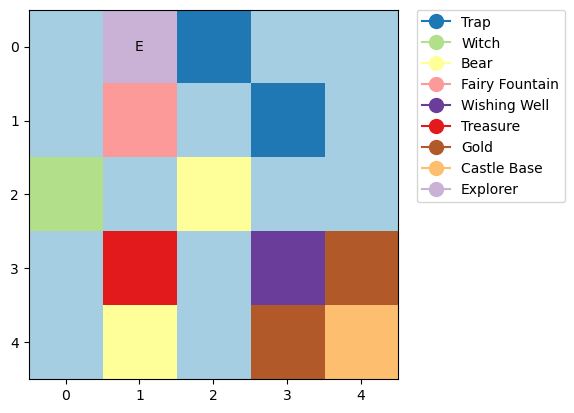

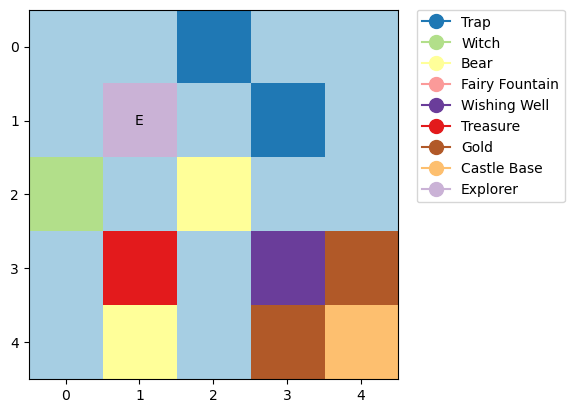

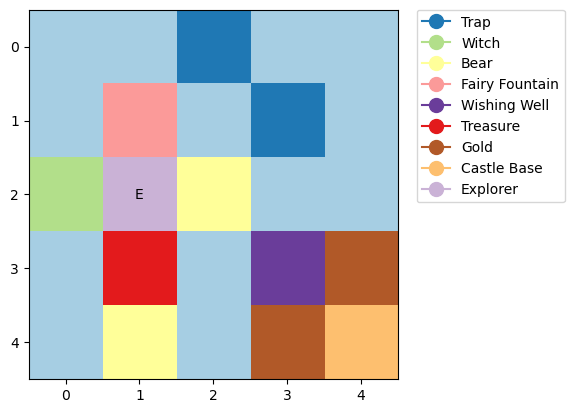

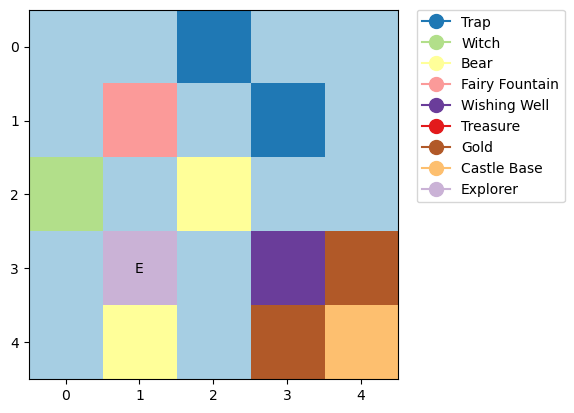

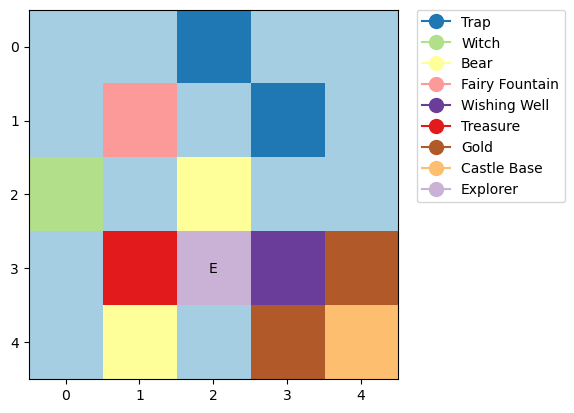

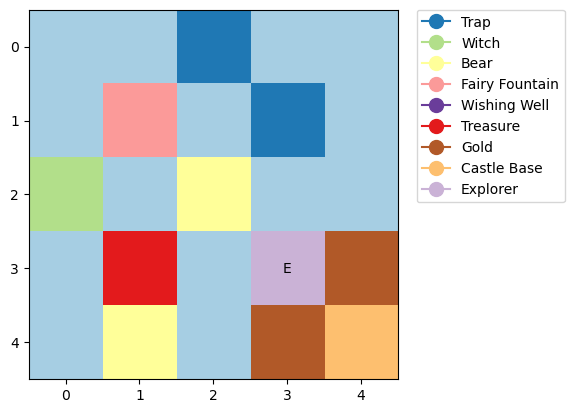

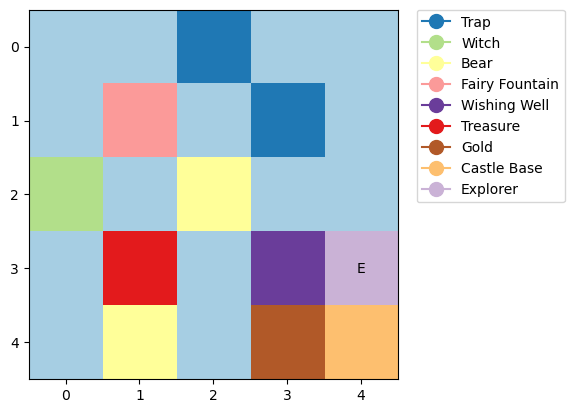

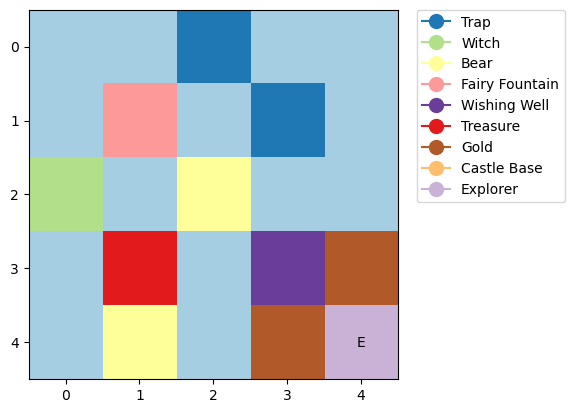

Episode done with total reward: 490


In [39]:
# Run the best episode
run_best_episode(env, q_table_sarsa)

In [13]:
def q_learning(env, num_episodes, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay, max_timesteps):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_per_episode = []
    epsilon_values = []
    
    print("Initial Q-table:")
    print(q_table)
    
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        epsilon = max(epsilon_min, epsilon_start * (epsilon_decay ** episode))
        epsilon_values.append(epsilon) 

        for timestep in range(max_timesteps):
            action = choose_action(q_table, state, epsilon, env.action_space.n)
            next_state, reward, done = env.step(action)

            q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

            state = next_state
            total_reward += reward

            if done:
                break
                
        rewards_per_episode.append(total_reward)
    
    print("Trained Q-table:")
    print(q_table)
    
    plot_epsilon_decay(num_episodes,epsilon_values)

    return q_table, rewards_per_episode

Gamma: 0.5
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.86073141e+00  2.67640311e+00  5.12901182e+00  1.57904378e+00]
 [ 3.80945732e+00  1.07098184e+01 -2.65079148e+01  1.84408425e+00]
 [-1.82633106e+01  2.09070547e+00  0.00000000e+00  1.87105911e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.01610708e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.96543440e-01 -3.86825224e+01  9.82562666e+00  1.65252360e+00]
 [ 3.34152236e+00  1.20518514e+01  2.39780048e+00  3.74508135e+00]
 [-1.92043461e+01 -1.03586741e+01 -2.05072086e+01  7.71908448e+00]
 [ 0.00000000e+00  2.00000000e-01  0.000000

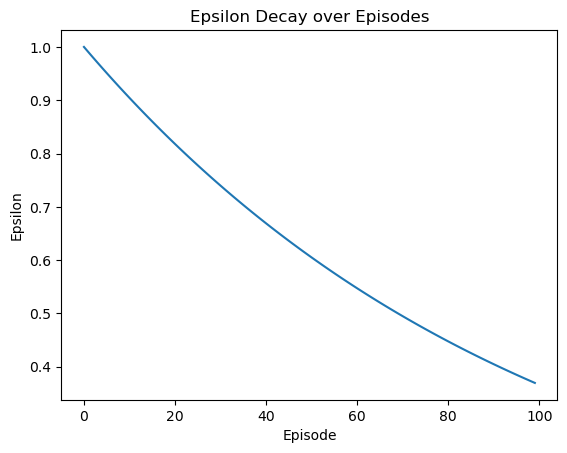

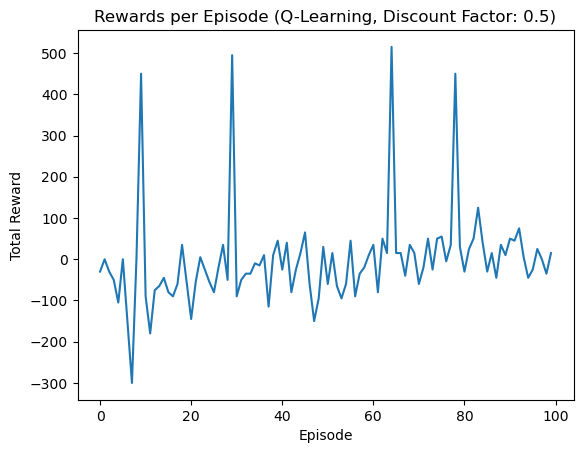

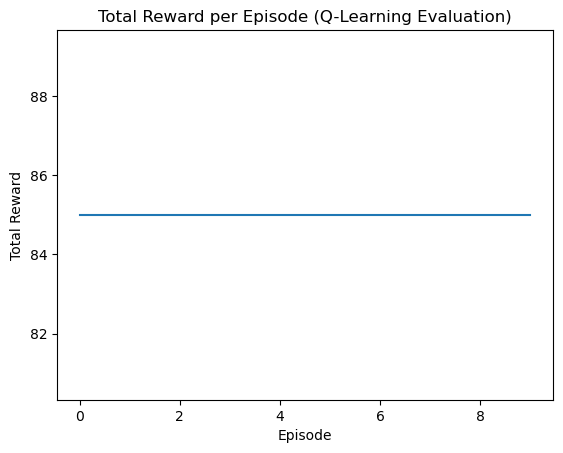

Gamma: 0.8
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 6.69757604e+00  6.65572253e+00  1.87619301e+01  5.62669301e+00]
 [ 9.52128681e+00  2.75193224e+01 -2.42267605e+01  6.46630510e+00]
 [-1.37798268e+01  1.53460736e+00  0.00000000e+00  9.24589323e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.46865159e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.81676759e+00 -3.90019829e+01  1.80838353e+01  1.21004945e+00]
 [ 1.18749808e+01  3.18635063e+01  6.59662574e+00  4.78430519e+00]
 [-5.06432929e+00 -7.43671385e+00 -1.30709719e+01  1.44565083e+01]
 [ 0.00000000e+00  4.86933090e+00  0.000000

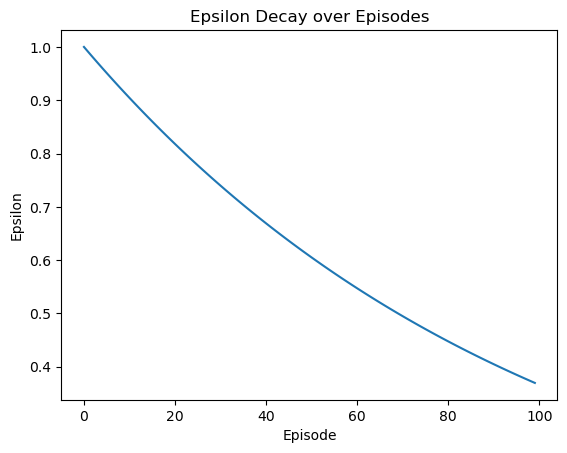

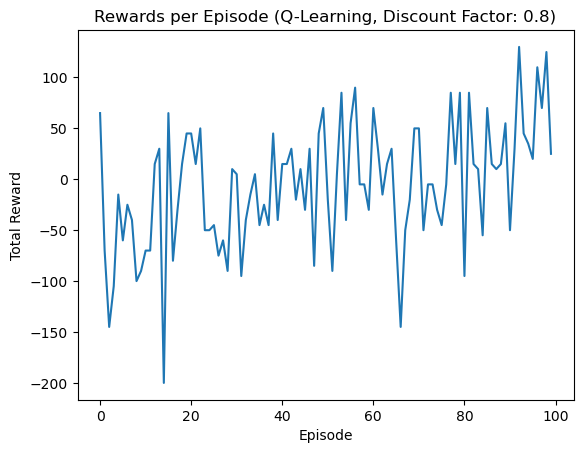

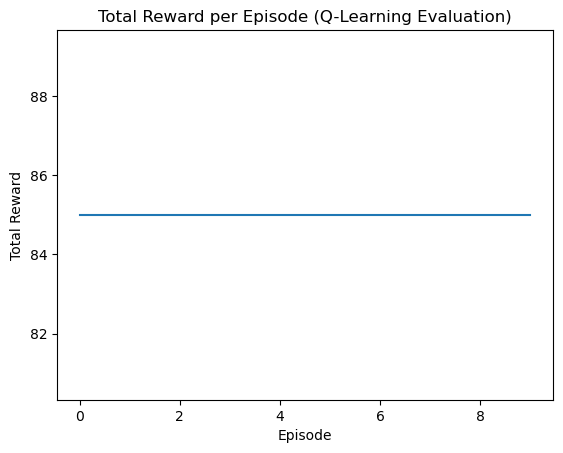

Gamma: 0.99
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 14.48317688  27.84216248  10.22386352  14.18069748]
 [  8.66291064  22.20106997 -17.97628905   5.99271409]
 [-16.84500308   0.           0.           3.19122631]
 [  0.          -5.7          0.          -5.68993426]
 [  0.           0.           0.           0.        ]
 [ 16.96204954 -41.35521746  32.53810718  23.19813202]
 [ 15.17543396   9.63517509   7.69532301  29.7048396 ]
 [-15.41011238  -8.90006592 -12.17176163  16.89955628]
 [  0.           0.           0.           0.84912355]
 [  0.           0.           0.           0.        ]
 [  5.03429276  10.28327073 

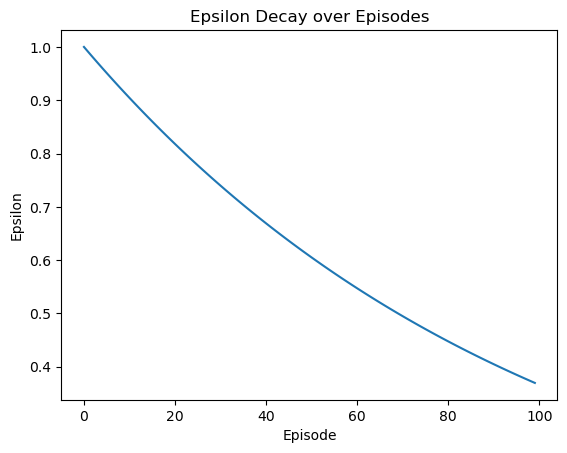

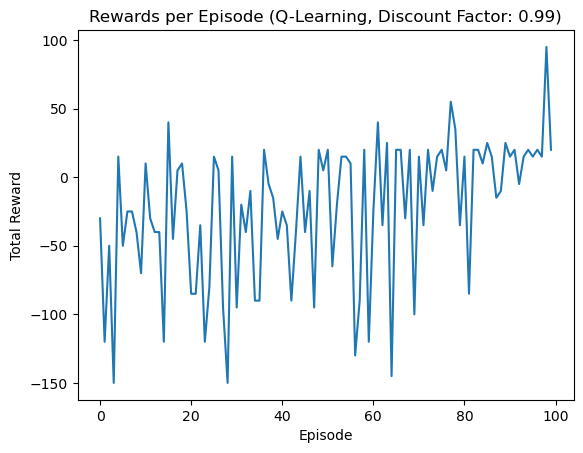

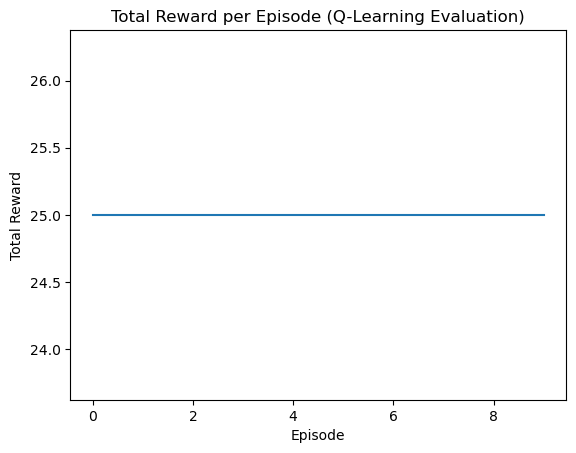

In [55]:
gammas = [0.5, 0.8, 0.99]
for gamma in gammas:
    print(f"Gamma: {gamma}")
    q_table, rewards = q_learning(env, num_episodes=100, alpha=0.1, gamma=gamma, epsilon_start=1.0, epsilon_min=0.1, epsilon_decay=0.99, max_timesteps=10)
    plot_rewards(rewards, f"Rewards per Episode (Q-Learning, Discount Factor: {gamma})")
    
    eval_rewards = evaluate_policy(env, q_table, num_episodes=10, max_timesteps=10)
    plot_rewards(eval_rewards, "Total Reward per Episode (Q-Learning Evaluation)")


Decay Rate: 0.9
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.53197568e+00  7.04145723e+01  6.07418559e-02  1.59160361e+01]
 [ 0.00000000e+00  2.84290791e+01 -1.03170000e+01  4.93643292e+00]
 [-5.70000000e+00  4.99899045e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.82871897e+01 -3.71663663e+01  7.72212359e+01  2.80362031e+01]
 [ 7.60465049e+00  1.83709669e+01  5.20728341e+00  7.45555230e+01]
 [-5.70000000e+00  0.00000000e+00  0.00000000e+00  2.55038938e+01]
 [ 0.00000000e+00  0.00000000e+00  0.0

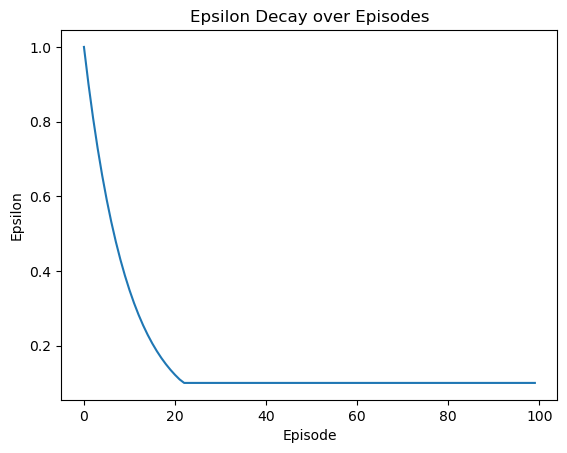

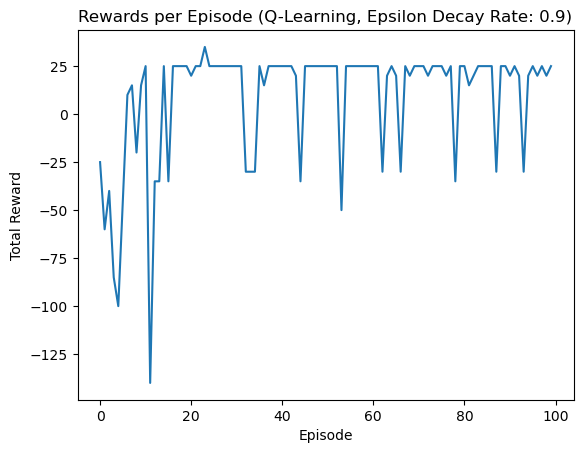

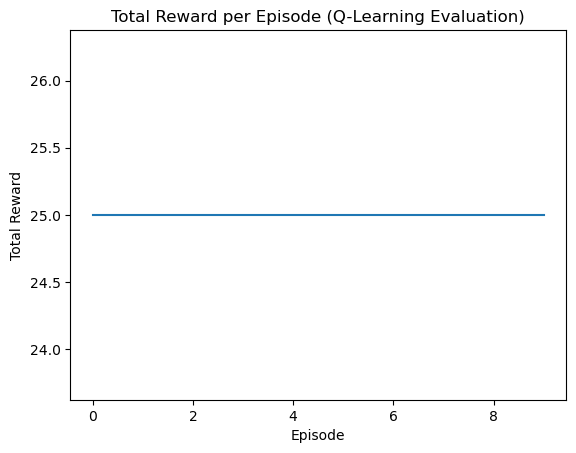

Decay Rate: 0.99
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 10.17124781  36.66148292  17.03230654  15.16427621]
 [  3.50245224  31.67459525 -21.6800941    8.30561191]
 [-11.54882744   0.3619003    0.           5.91215832]
 [  0.          -2.9950995    0.          -8.10476733]
 [  0.           0.           0.           0.        ]
 [  7.55525984 -31.79189756  47.19369601  25.41896506]
 [ 14.50142025  55.27332652   5.90925877  20.60360573]
 [-12.17412455 -12.90386305 -12.14968358  19.52211242]
 [  0.           0.           0.           1.0218024 ]
 [  0.           0.           0.          -2.9950995 ]
 [  3.77673637   0.    

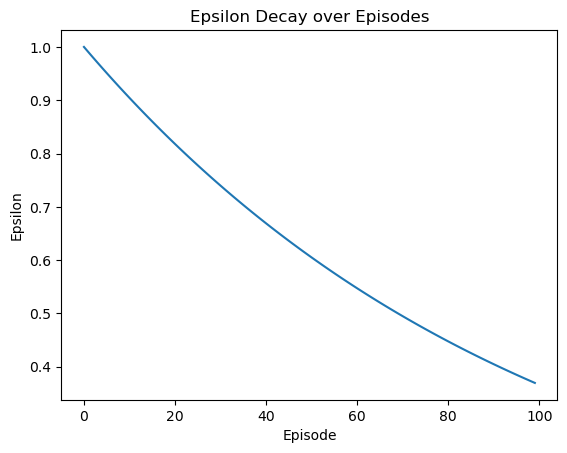

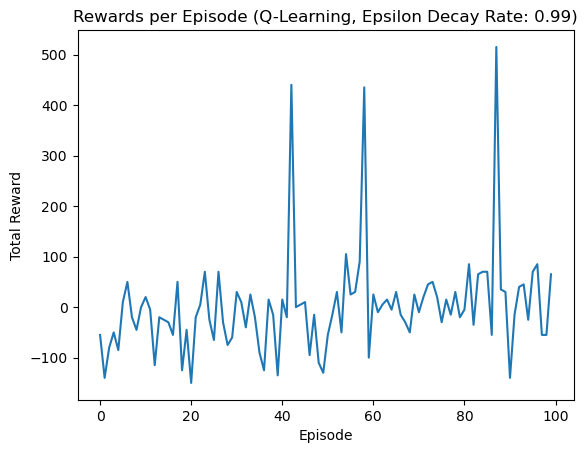

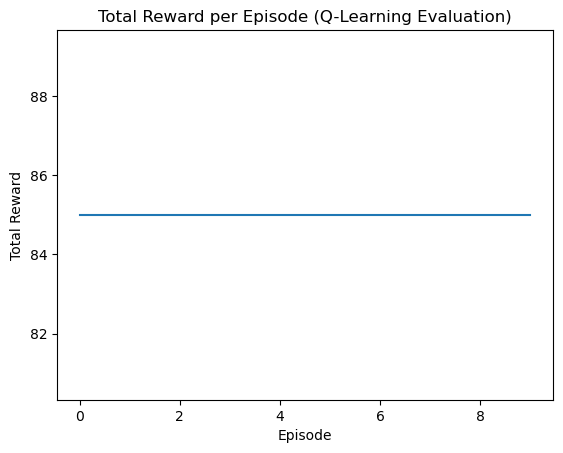

Decay Rate: 0.999
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.09644270e+01  1.09597586e+01  1.46162000e+01  1.20288031e+01]
 [ 1.18165379e+01  1.78167135e+01 -2.18575239e+01  9.41337300e+00]
 [-2.04665426e+01  2.52777631e+00  0.00000000e+00  1.13435387e+01]
 [ 0.00000000e+00 -5.49352968e+00  0.00000000e+00 -1.05776144e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.35754753e+00 -4.10757978e+01  1.35651431e+01  7.83972353e+00]
 [ 1.05784200e+01  1.70394454e+01  5.20917740e+00  6.63800164e+00]
 [-1.23255371e+01 -6.33684446e+00 -1.74751234e+01  8.13193957e+00]
 [ 0.00000000e+00  2.08555875e+00  0

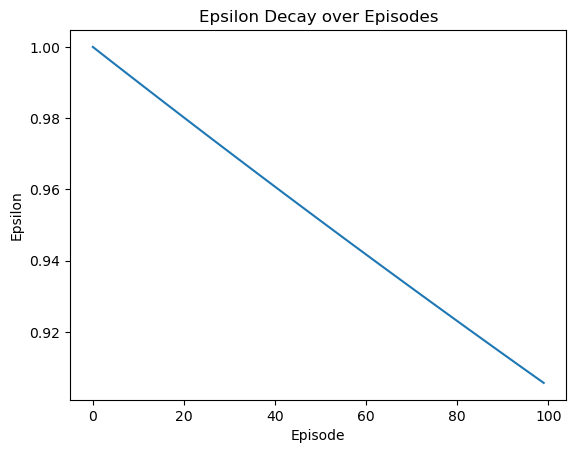

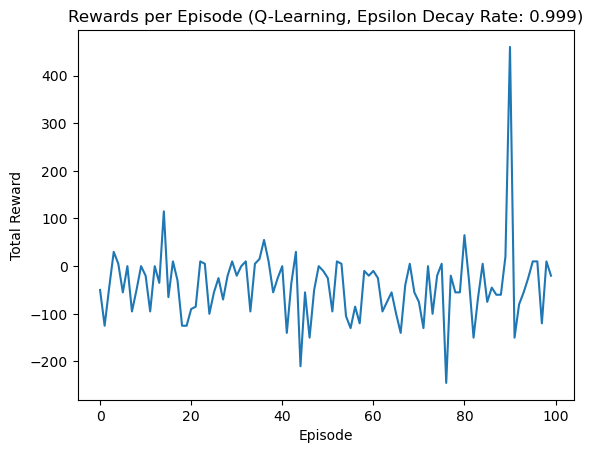

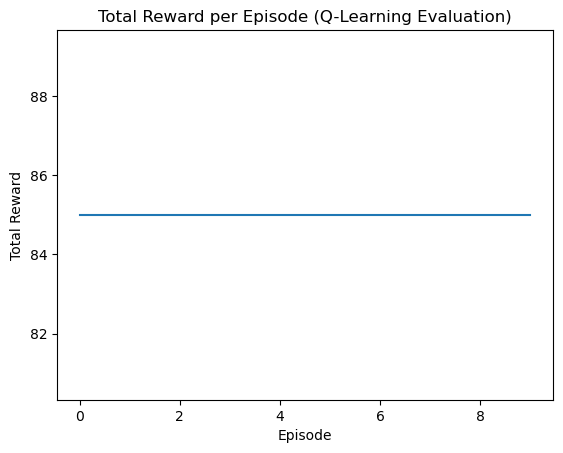

In [53]:
decay_rates = [0.9, 0.99, 0.999]
for decay_rate in decay_rates:
    print(f"Decay Rate: {decay_rate}")
    q_table, rewards = q_learning(env, num_episodes=100, alpha=0.1, gamma=0.99, epsilon_start=1.0, epsilon_min=0.1, epsilon_decay=decay_rate, max_timesteps=10)
    plot_rewards(rewards, f"Rewards per Episode (Q-Learning, Epsilon Decay Rate: {decay_rate})")
    
    eval_rewards = evaluate_policy(env, q_table, num_episodes=10, max_timesteps=10)
    plot_rewards(eval_rewards, "Total Reward per Episode (Q-Learning Evaluation)")
    

In [42]:
def objective(trial):
    alpha = trial.suggest_uniform('alpha', 0.1, 1)
    gamma = trial.suggest_uniform('gamma', 0.1, 1)
    epsilon_start = 1
    epsilon_min = 0.1
    epsilon_decay = trial.suggest_uniform('epsilon_decay', 0.87, 0.999)
    num_episodes=100
    max_timesteps = trial.suggest_int('max_timesteps',8,25)
    algo = "q-learning"
    env = MysticForestExplorer()
    
    if algo == "sarsa":
        _, rewards_per_episode = sarsa(env, num_episodes, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay, max_timesteps)
    else:
        _, rewards_per_episode = q_learning(env, num_episodes, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay, max_timesteps)
        
    mean_reward = np.mean(rewards_per_episode)
    
    return -mean_reward

[I 2023-11-09 09:36:29,887] A new study created in memory with name: no-name-6248ee52-752c-4cbd-8d91-53a85f843966
C:\Users\karti\AppData\Local\Temp\ipykernel_18276\3180417403.py:2: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.1, 1)
C:\Users\karti\AppData\Local\Temp\ipykernel_18276\3180417403.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  gamma = trial.suggest_uniform('gamma', 0.1, 1)
C:\Users\karti\AppData\Local\Temp\ipykernel_18276\3180417403.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  epsilon_decay = trial.su

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 16.36260174  67.35086438  65.97643822  48.67840696]
 [  8.54276328  92.3411113  -26.58121013   1.85023328]
 [-26.58121013   0.           0.           0.        ]
 [  0.           0.           0.         -26.58121013]
 [  0.           0.           0.           0.        ]
 [ 48.53952104  -6.25440583  92.3411274   16.78815189]
 [ 67.33950402 119.74869582  67.28330734  67.34200176]
 [-26.58121013   0.           0.          92.34112347]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 67.35085161   0.           0.        

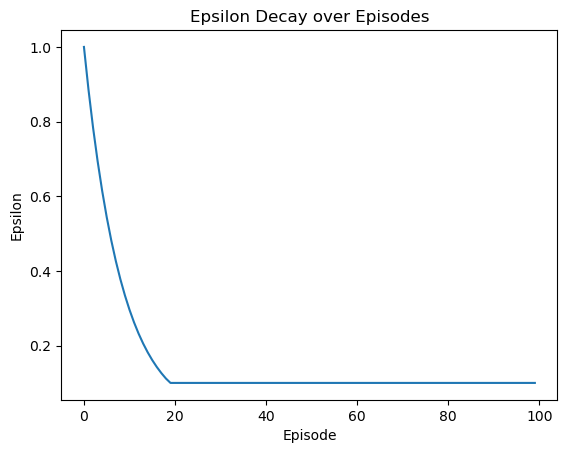

[I 2023-11-09 09:36:30,283] Trial 0 finished with value: -421.85 and parameters: {'alpha': 0.8860403377133393, 'gamma': 0.7293701763828131, 'epsilon_decay': 0.8853799165468287, 'max_timesteps': 16}. Best is trial 0 with value: -421.85.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.30617916  10.69086965   4.91305072   4.57992768]
 [  0.          15.72779929 -25.21277031   0.36278655]
 [-15.60185778   0.79693748   0.           0.        ]
 [  0.          -9.21673109   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  3.01771372 -45.63550049  17.31722252   4.245697  ]
 [  6.40472404  19.95140633   2.80584618   7.95380994]
 [-15.60185778  -6.14448739  -9.21673109  15.28066638]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 10.13301922   0.           0.        

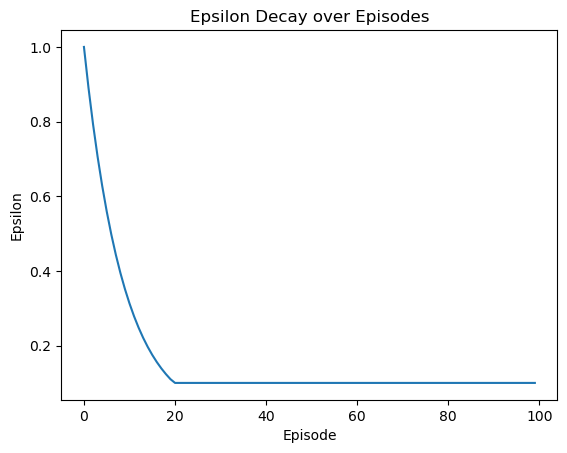

[I 2023-11-09 09:36:30,611] Trial 1 finished with value: -35.1 and parameters: {'alpha': 0.307224369664851, 'gamma': 0.6173613395881017, 'epsilon_decay': 0.8903101937307271, 'max_timesteps': 12}. Best is trial 0 with value: -421.85.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 8.96959195e-02  1.32854150e+00  5.04385382e-01  1.75450338e-01]
 [ 8.25458306e-02  5.10874135e+00 -5.20347388e+00  2.21708488e-02]
 [-5.20347388e+00  3.27868986e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -9.49469532e+00  0.00000000e+00 -1.30593520e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.25802134e-01 -3.67639517e+01  6.09549921e+00  7.99454899e-01]
 [ 5.90049971e-01  5.02651616e+00  5.07079221e-01  9.58390753e-01]
 [-5.20347388e+00  0.00000000e+00 -1.59898664e+01  5.01101746e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.7

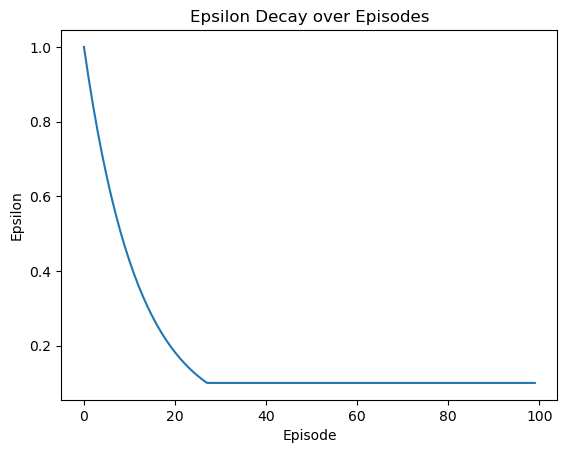

[I 2023-11-09 09:36:31,007] Trial 2 finished with value: -425.15 and parameters: {'alpha': 0.1734491292004483, 'gamma': 0.21796466060199515, 'epsilon_decay': 0.9183223607980244, 'max_timesteps': 24}. Best is trial 2 with value: -425.15.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  4.1626818    6.1883475    8.8213987    4.85501337]
 [  8.75592328  11.6688099  -23.62133671   6.60993313]
 [-13.230483     1.54814053   0.           8.74175719]
 [  0.         -14.27418705   0.          -8.27963194]
 [  0.           0.           0.           0.        ]
 [  1.91387738 -23.6448308   11.65546134   2.13341164]
 [  8.8213987    8.48875135   8.25690201   8.64789921]
 [-14.27418705 -11.5810477  -14.27418705  11.46667793]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  3.20799872   0.           0.        

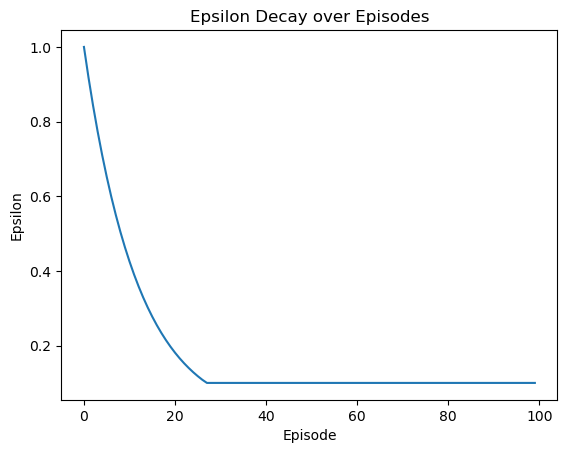

[I 2023-11-09 09:36:31,404] Trial 3 finished with value: -20.2 and parameters: {'alpha': 0.27598773149800404, 'gamma': 0.7559810104024246, 'epsilon_decay': 0.9180733383700492, 'max_timesteps': 14}. Best is trial 2 with value: -425.15.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.26370215e+02  1.38039660e+02  2.00167751e+00  8.86879640e+01]
 [ 0.00000000e+00  1.27962279e+02 -2.04069569e+01  3.59689309e-01]
 [-1.30355875e+01  0.00000000e+00  0.00000000e+00  3.18696196e+00]
 [ 0.00000000e+00 -2.04069569e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.52727094e+01  2.44786834e+01  1.47414314e+02  9.41801503e+01]
 [ 7.51909194e+01  1.52085963e+02  8.62051943e+01  9.28000994e+00]
 [-1.30355875e+01 -8.69039165e+00 -1.30355875e+01  1.37505179e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

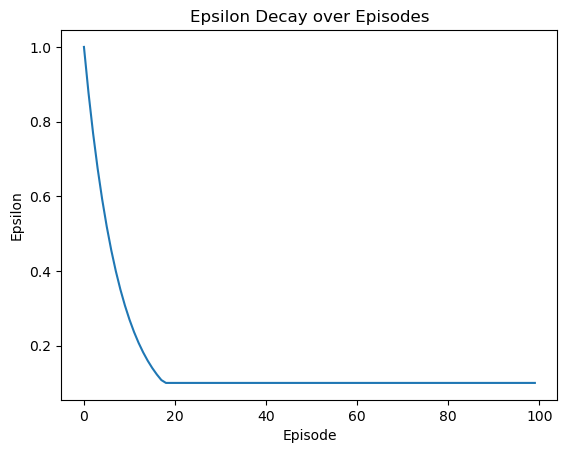

[I 2023-11-09 09:36:31,751] Trial 4 finished with value: -96.85 and parameters: {'alpha': 0.43451958257849443, 'gamma': 0.9364071742885651, 'epsilon_decay': 0.8771144992010751, 'max_timesteps': 14}. Best is trial 2 with value: -425.15.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 17.00221209  27.36225793  27.36225632  17.00293761]
 [ 27.34137201  44.03316512 -15.94032243  16.79030636]
 [-24.18818895   9.0525719    0.          27.10827774]
 [  0.         -22.40847816   0.         -24.18595417]
 [  0.           0.           0.           0.        ]
 [ 17.00277758 -10.96683493  44.03316512  27.34107181]
 [ 27.36225475  62.81476512  37.95852082  27.36204384]
 [-16.51390796  61.08568823  47.93620378  43.58867723]
 [  0.         130.39818202   0.           1.87654788]
 [  0.         132.09321705   0.         -10.30490623]
 [ 25.76955372  62.81476512  62.80929407

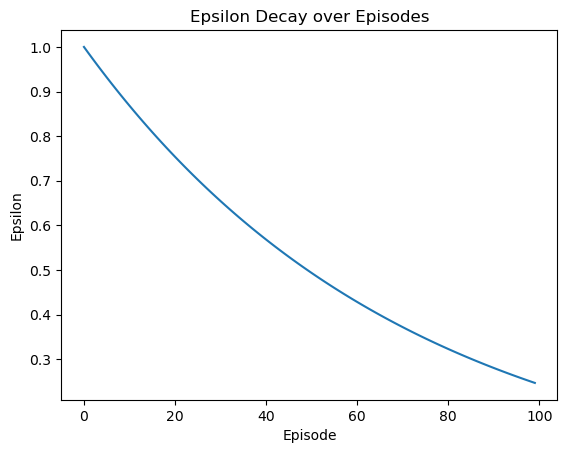

[I 2023-11-09 09:36:32,199] Trial 5 finished with value: -326.85 and parameters: {'alpha': 0.7771570812457753, 'gamma': 0.6214011156579667, 'epsilon_decay': 0.9859577455832071, 'max_timesteps': 19}. Best is trial 2 with value: -425.15.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.15345688   2.66438831   1.96710723   1.13342742]
 [  0.           6.15362356 -28.88362084   1.07378368]
 [  0.           2.64302243   0.           1.61783555]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  1.15362356 -48.84637644   6.15362356   2.66438831]
 [  2.66438831   2.66438749   2.66438831   2.66438831]
 [-24.94588162 -12.5164536  -25.79974      6.15362356]
 [  0.           0.           0.           1.36791865]
 [  0.           0.           0.         -25.79974   ]
 [  2.66438831   0.           2.0167062 

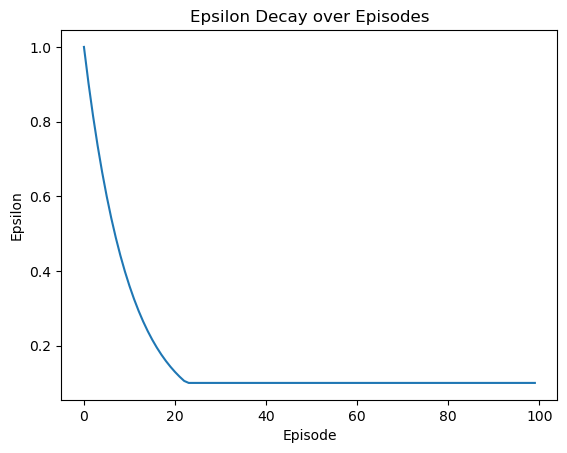

[I 2023-11-09 09:36:32,597] Trial 6 finished with value: -19.25 and parameters: {'alpha': 0.6258226801330872, 'gamma': 0.43297876281734615, 'epsilon_decay': 0.9027840634102575, 'max_timesteps': 20}. Best is trial 2 with value: -425.15.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  6.25825447  12.72486202  10.50662419   6.49300753]
 [  9.38126495  22.52784947 -26.58764788   6.42316802]
 [-25.92450761   8.27720439   0.           6.5587476 ]
 [  0.         -18.24698065   0.         -16.4920231 ]
 [  0.           0.           0.           0.        ]
 [  5.65386684 -33.51414766  23.80431585  12.38650972]
 [ 10.64111271  35.21658579  10.66032722  12.13899872]
 [-26.21033528   7.32514836 -27.05841001  22.53470127]
 [  0.           5.65409841   0.           4.37277237]
 [  0.           0.           0.         -11.22260454]
 [ 10.14682787  25.81675586  32.97981719

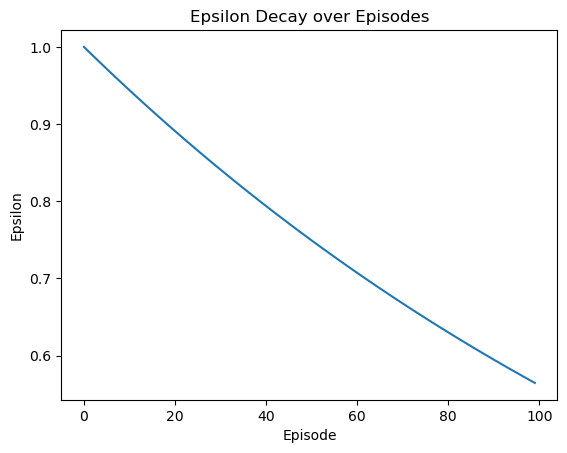

[I 2023-11-09 09:36:33,024] Trial 7 finished with value: -40.1 and parameters: {'alpha': 0.37408681786446485, 'gamma': 0.5378964246541317, 'epsilon_decay': 0.9942415025344707, 'max_timesteps': 13}. Best is trial 2 with value: -425.15.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[195.1465849  130.56163972 437.45020853 284.88333971]
 [231.7083766  445.09191039 318.30343957 259.01290283]
 [ -4.59191719  52.79229413   0.         420.93557921]
 [  0.         -28.58148641   0.           3.73896174]
 [  0.           0.           0.           0.        ]
 [185.57221049 -41.50187    396.81436626  37.02135896]
 [251.68653695 447.77975534  93.53891288 304.00598284]
 [-12.6843437  -14.09160711 -26.07720074 257.28019223]
 [  0.           0.           0.          20.04747281]
 [  0.           0.           0.         -19.15177536]
 [  2.45426465  14.8453484    0.        

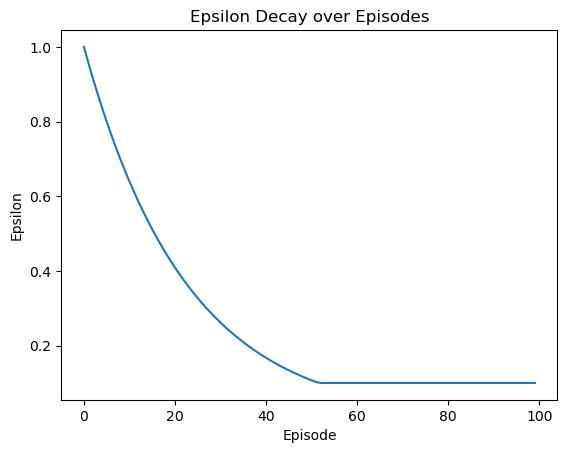

[I 2023-11-09 09:36:33,440] Trial 8 finished with value: -343.25 and parameters: {'alpha': 0.3986619186155549, 'gamma': 0.9828311933223044, 'epsilon_decay': 0.9562669245964891, 'max_timesteps': 22}. Best is trial 2 with value: -425.15.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.17031      0.99220083   0.48847538   0.17392739]
 [  0.21995103   5.60610668 -28.07706534   0.0869592 ]
 [-14.94301051   0.           0.           0.21995103]
 [  0.         -14.94301051   0.         -14.94301051]
 [  0.           0.           0.           0.        ]
 [  0.15043193 -47.90468888   5.6389788    0.92921812]
 [  0.93944937   3.63151069   0.98996934   0.98685975]
 [-22.44290225 -19.21277846 -22.44290225   5.6389788 ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.83840693   0.           3.63151069

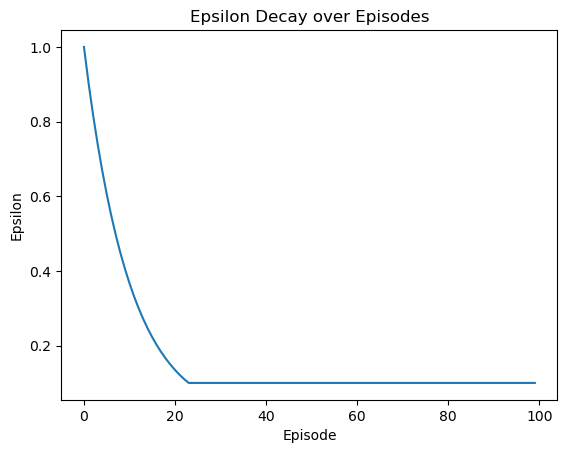

[I 2023-11-09 09:36:33,785] Trial 9 finished with value: -125.85 and parameters: {'alpha': 0.4981003502566974, 'gamma': 0.17595399115927224, 'epsilon_decay': 0.9045974482073492, 'max_timesteps': 23}. Best is trial 2 with value: -425.15.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.55573377e-03  5.36175011e-01  1.19964970e-01  2.10931425e-02]
 [ 3.99789466e-02  3.50641454e+00 -6.32297562e+00  3.39448425e-03]
 [-6.32297562e+00  0.00000000e+00  0.00000000e+00  2.56676786e-02]
 [ 0.00000000e+00 -1.13137490e+01  0.00000000e+00 -3.34821587e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.26924882e-02 -3.46360377e+01  5.21590084e+00  2.39860266e-01]
 [ 1.27294423e-01  2.10606960e+00  0.00000000e+00  1.82489079e-01]
 [-8.96599621e+00 -2.22067667e+00 -3.34851051e+00  5.81127378e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

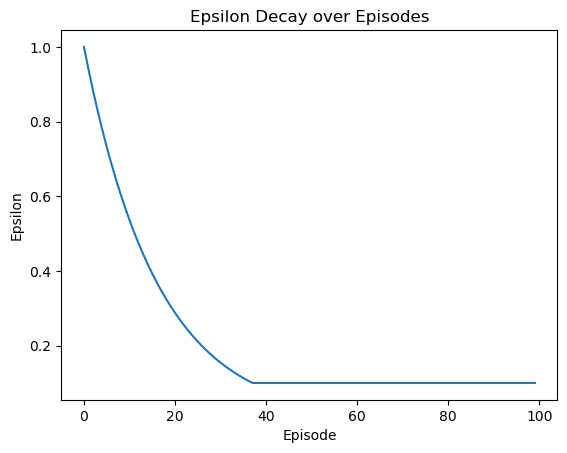

[I 2023-11-09 09:36:34,230] Trial 10 finished with value: -425.65 and parameters: {'alpha': 0.11161701696496149, 'gamma': 0.10284293216689994, 'epsilon_decay': 0.9396013362291157, 'max_timesteps': 25}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.23943623e-02  5.26345178e-01  1.20990090e-01  9.10675827e-03]
 [ 3.98737262e-02  3.35929267e+00 -1.51974207e+01  3.64133832e-03]
 [-1.33501617e+01  1.41676608e-01  0.00000000e+00  3.59724805e-02]
 [ 0.00000000e+00 -3.33161698e+00  0.00000000e+00 -6.29475473e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.79801755e-02 -3.26643032e+01  5.20731047e+00  3.30976639e-01]
 [ 1.30230712e-01  2.05612346e+00  1.92167704e-01  4.36009983e-01]
 [-1.68413577e+01 -8.90014413e+00 -1.33485687e+01  4.14304058e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.3

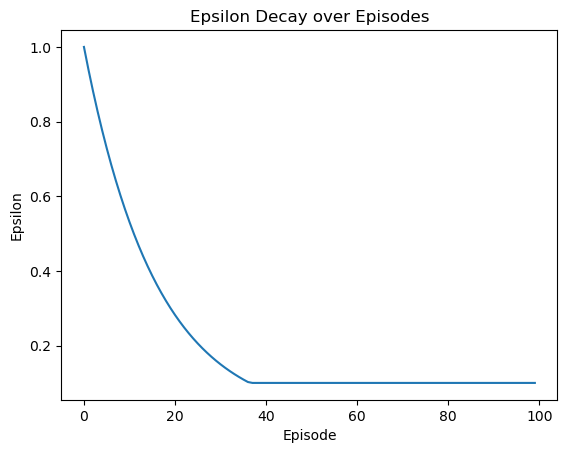

[I 2023-11-09 09:36:34,591] Trial 11 finished with value: -232.75 and parameters: {'alpha': 0.11109445573757434, 'gamma': 0.10108936315788325, 'epsilon_decay': 0.9386669919076938, 'max_timesteps': 25}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.07291016   0.23588081   1.37677747   0.06986318]
 [  0.7157859    5.3540574  -23.16514385   0.23187555]
 [-10.39445856   0.70348381   0.           0.        ]
 [  0.          -8.19589617   0.          -5.74883652]
 [  0.           0.           0.           0.        ]
 [  0.         -17.32672611   3.80452001   0.        ]
 [  1.37682375   0.46444764   0.43900346   0.41217865]
 [-10.3852753   -2.0180967   -3.02714505   4.55696959]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.        

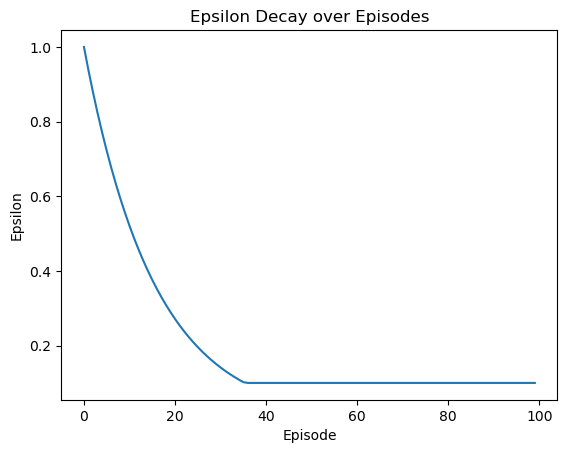

[I 2023-11-09 09:36:34,950] Trial 12 finished with value: -5.45 and parameters: {'alpha': 0.10090483486568075, 'gamma': 0.25715520834538863, 'epsilon_decay': 0.9368548819555054, 'max_timesteps': 9}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.55931460e-01  1.87901536e+00  1.14505783e+00  3.73074615e-01]
 [ 8.16775875e-01  6.43022060e+00 -2.56057735e+01  2.64333385e-01]
 [-1.54488649e+01  2.71460325e-01  0.00000000e+00  7.06874946e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.44167769e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.33648684e-01 -4.53108555e+01  6.90220484e+00  1.13593842e+00]
 [ 1.45305438e+00  6.98743343e+00  1.16458235e+00  1.75215277e+00]
 [-1.54098496e+01 -1.23508972e+01 -2.28741366e+01  5.91714809e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.0

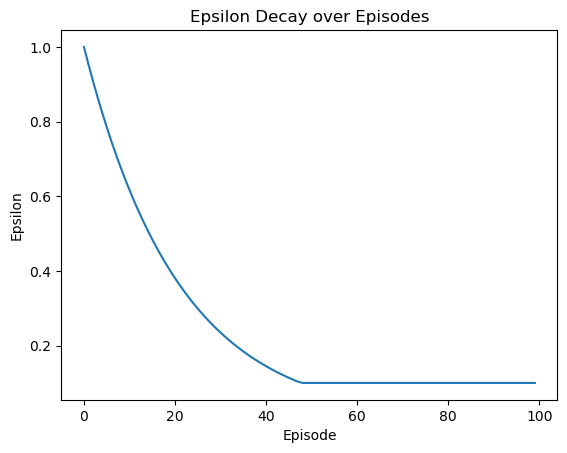

[I 2023-11-09 09:36:35,381] Trial 13 finished with value: -400.75 and parameters: {'alpha': 0.2146825931780304, 'gamma': 0.27224356675238015, 'epsilon_decay': 0.9528280869086967, 'max_timesteps': 25}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 4.10158959e-01  2.21936716e+00  2.57731671e-02  2.59170869e-01]
 [ 0.00000000e+00  0.00000000e+00 -1.40624122e+01  4.34293634e-01]
 [-1.03243614e+01  1.51432331e-01  0.00000000e+00  8.76310613e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.70923874e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.68845058e-01 -1.71121076e+01  7.13942893e+00  1.96700701e+00]
 [ 4.17995046e-02  6.88227694e+00  4.43967114e-01  1.73982349e+00]
 [-1.40657244e+01  0.00000000e+00 -1.03244132e+01  4.41971060e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

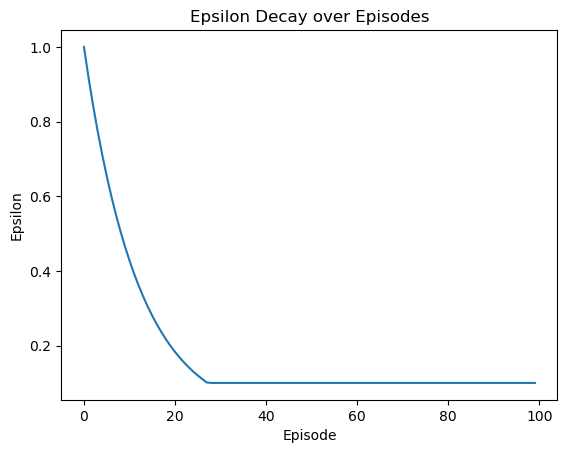

[I 2023-11-09 09:36:35,910] Trial 14 finished with value: -217.95 and parameters: {'alpha': 0.19015254978518797, 'gamma': 0.310860634647121, 'epsilon_decay': 0.9185983730825124, 'max_timesteps': 21}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 4.39114826e-02  2.87687280e-01  5.73412519e-01  4.77431155e-02]
 [ 4.94742669e-01  5.24575005e+00 -2.95322842e+01  4.91890158e-02]
 [-2.21015332e+01  1.80313484e-01  0.00000000e+00  5.42300179e-01]
 [ 0.00000000e+00 -7.03908401e+00  0.00000000e+00 -2.39512544e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.17318067e+01  5.03711959e+00  0.00000000e+00]
 [ 5.51685029e-01  2.24823462e+00  4.86878250e-01  4.09805769e-01]
 [-1.96924006e+01 -1.68354761e+01 -1.24241051e+01  5.01335124e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.1

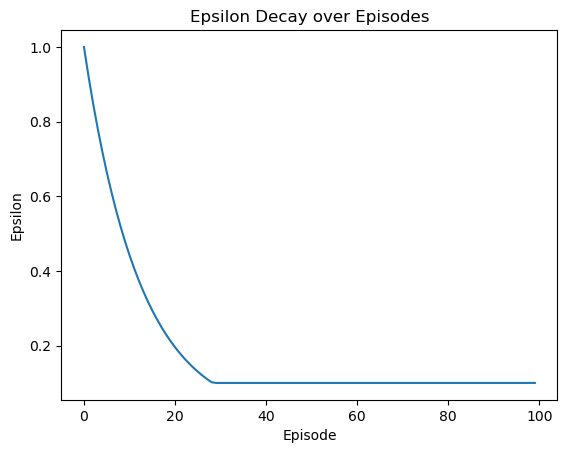

[I 2023-11-09 09:36:36,458] Trial 15 finished with value: -349.6 and parameters: {'alpha': 0.2346361336166854, 'gamma': 0.10931011449801432, 'epsilon_decay': 0.9216628855104348, 'max_timesteps': 18}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 5.60908048e-01  3.44573762e+00  5.52161303e-01  4.07233608e-01]
 [ 2.61741989e-01  6.13453889e+00 -1.32904666e+01  9.26371969e-04]
 [-6.25908282e+00  1.20644220e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.26402275e+00  0.00000000e+00 -3.31518564e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.85772160e-01 -3.02762001e+01  9.46693441e+00  1.17350096e+00]
 [ 9.60866877e-01  1.23859325e+01  7.29790795e-01  1.33056158e+00]
 [ 0.00000000e+00 -4.16276368e+00 -3.31518564e+00  4.92326762e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

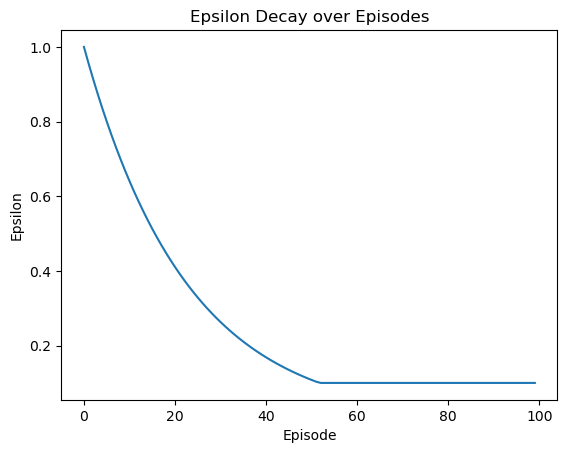

[I 2023-11-09 09:36:36,953] Trial 16 finished with value: -412.95 and parameters: {'alpha': 0.11050618789618535, 'gamma': 0.3705337777271557, 'epsilon_decay': 0.9564488706658275, 'max_timesteps': 23}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.78183671e-01  1.29995620e+00  1.21105765e+00  2.77139800e-01]
 [ 5.58419813e-01  6.03845736e+00 -2.96773234e+01  1.82285582e-01]
 [-2.88692713e+01  6.97503691e-01  0.00000000e+00  5.58419813e-01]
 [ 0.00000000e+00 -1.69950721e+01  0.00000000e+00 -2.88043153e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.42959061e-01 -4.88581779e+01  6.05670390e+00  1.27248748e+00]
 [ 1.15841653e+00  4.92335256e+00  9.13763232e-01  1.27640682e+00]
 [-2.42763444e+01 -1.62415967e+01 -1.69950721e+01  5.32619295e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

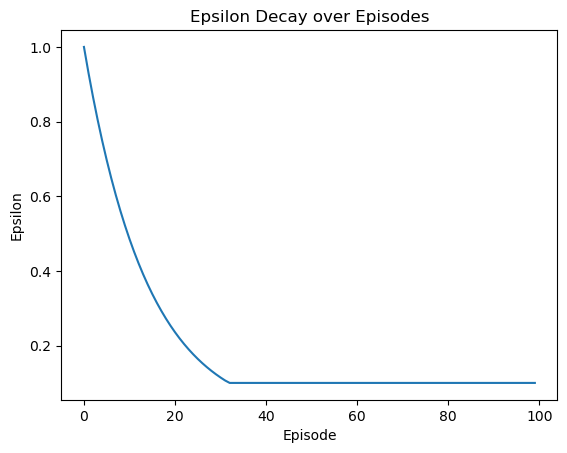

[I 2023-11-09 09:36:37,578] Trial 17 finished with value: -411.95 and parameters: {'alpha': 0.5665024030535799, 'gamma': 0.21463096355528544, 'epsilon_decay': 0.9302895434099844, 'max_timesteps': 25}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.56173206e-01  6.31672976e-01  9.13758710e-01  1.30218825e-01]
 [ 9.13758189e-01  5.16175787e+00 -2.98382390e+01  1.61755525e-01]
 [-2.59169639e+01  5.58554089e-01  0.00000000e+00  9.13755756e-01]
 [ 0.00000000e+00 -1.65898112e+01  0.00000000e+00 -2.59536347e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.70365362e-03 -2.76246957e+01  5.16173703e+00  3.02826957e-01]
 [ 9.13758710e-01  9.13677753e-01  9.13131459e-01  9.13687021e-01]
 [-1.65759573e+01 -1.60037075e+01 -2.40055612e+01  5.16142259e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

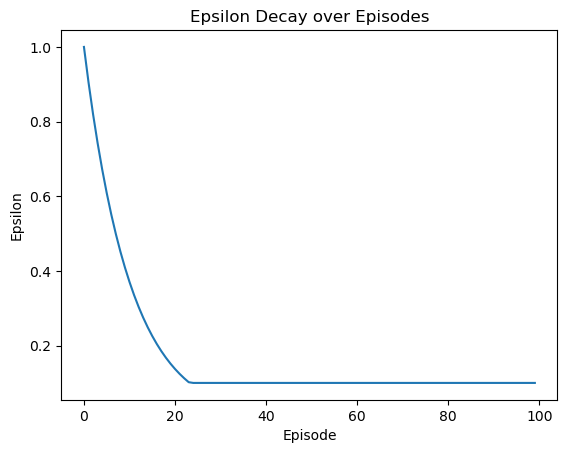

[I 2023-11-09 09:36:38,059] Trial 18 finished with value: -27.85 and parameters: {'alpha': 0.33141470848445065, 'gamma': 0.1770247138134698, 'epsilon_decay': 0.9054887014717702, 'max_timesteps': 23}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 5.82644076e-01  1.83460384e+00  2.13867963e+00  4.44017451e-01]
 [ 2.09094167e+00  5.78997729e+00 -2.90180860e+01  7.82266089e-01]
 [ 0.00000000e+00  1.37835593e-01  0.00000000e+00  2.10047283e+00]
 [ 0.00000000e+00 -1.09548907e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.72655130e-03 -2.97830511e+01  5.78417584e+00  7.69820874e-01]
 [ 2.13867963e+00  2.08446690e+00  1.96803328e+00  2.09480031e+00]
 [-1.48069224e+01 -4.06466849e+00  0.00000000e+00  5.70707879e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

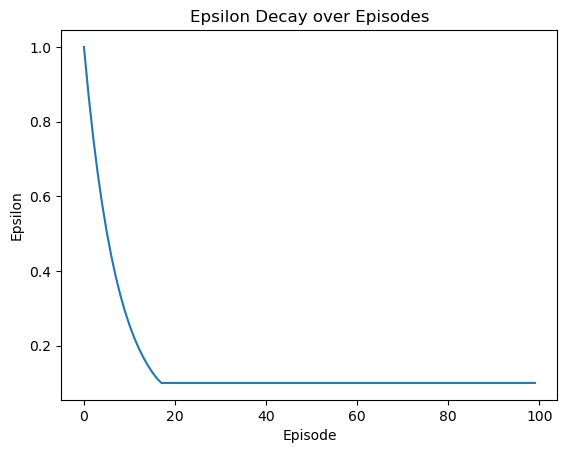

[I 2023-11-09 09:36:38,484] Trial 19 finished with value: -23.35 and parameters: {'alpha': 0.20323342465114996, 'gamma': 0.3693761689551902, 'epsilon_decay': 0.872202756384144, 'max_timesteps': 17}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 6.44604639e-02  5.45491864e-01  5.85476583e-01  6.42389649e-02]
 [ 4.18724203e-01  5.25169867e+00 -2.96088359e+01  6.17358282e-02]
 [-9.25522202e+00  4.49793868e-01  0.00000000e+00  1.77624159e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.25522202e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.26081379e-02 -1.54056268e+01  5.22881409e+00  9.09326005e-02]
 [ 5.53721763e-01  2.25772576e+00  4.15809664e-01  4.77610848e-01]
 [-2.00951236e+01 -1.04472645e+01 -1.56708967e+01  5.11006416e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.4

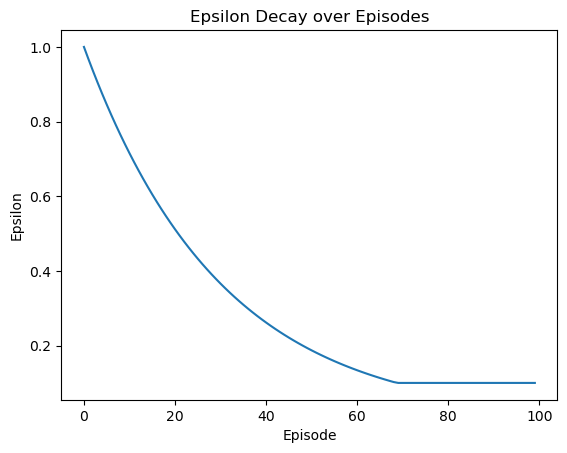

[I 2023-11-09 09:36:38,844] Trial 20 finished with value: -26.5 and parameters: {'alpha': 0.3088872915029115, 'gamma': 0.11148327813047873, 'epsilon_decay': 0.9670384666540678, 'max_timesteps': 8}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.20652967   1.08933868   1.08933871   0.20652969]
 [  1.08933868   5.74570552 -29.80179715   0.20570557]
 [  0.           0.           0.           1.08933704]
 [  0.         -29.29786875   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.18642624 -49.81323419   5.74570552   0.96029035]
 [  1.08933851   3.93321587   1.08933871   1.08685704]
 [-29.79350352 -19.9890447  -29.9996154    5.74570552]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  1.08933871   0.           3.93321587

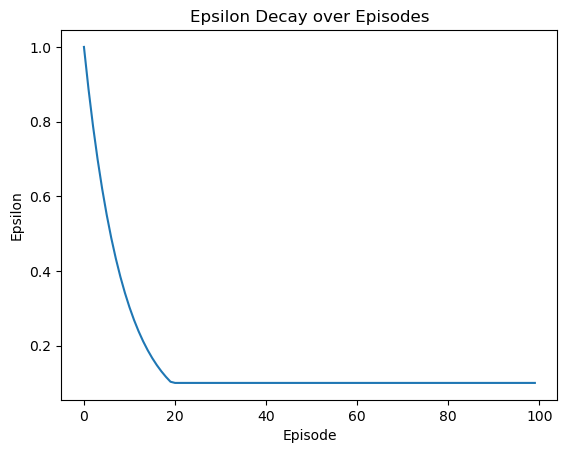

[I 2023-11-09 09:36:39,427] Trial 21 finished with value: -90.65 and parameters: {'alpha': 0.9765956251310629, 'gamma': 0.1895918105748895, 'epsilon_decay': 0.8873320733039715, 'max_timesteps': 16}. Best is trial 10 with value: -425.65.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.8202979    6.24441647   6.32417664   2.78842752]
 [  6.24569185  14.17139068 -27.36694758   2.81823339]
 [-29.08296274   1.48288808   0.           6.27271909]
 [  0.         -20.29651918   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  2.06835689 -34.36641495  14.1701583    0.        ]
 [  6.18079513  20.551507     5.27192019   6.01683618]
 [-20.61984897 -13.74656598 -27.06709222  13.79918785]
 [  0.           0.           0.           1.81248151]
 [  0.           0.           0.           0.        ]
 [  5.28759453   0.           0.        

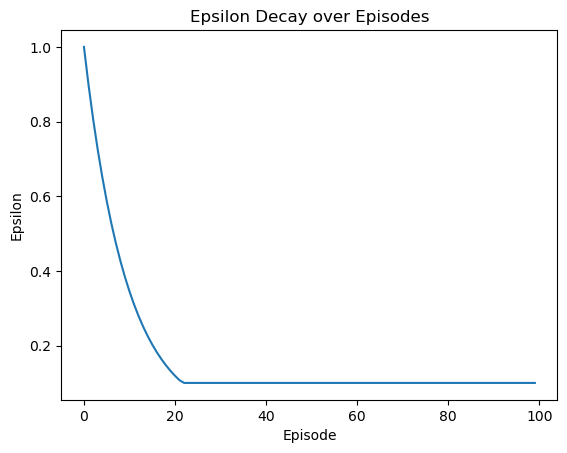

[I 2023-11-09 09:36:39,984] Trial 22 finished with value: -430.1 and parameters: {'alpha': 0.6873282989696725, 'gamma': 0.4462636576689285, 'epsilon_decay': 0.899052538655679, 'max_timesteps': 17}. Best is trial 22 with value: -430.1.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 6.51845062e-01  2.35235261e+00  2.20311751e+00  6.54797841e-01]
 [ 1.67776029e+00  7.62289272e+00 -2.68097249e+01  3.74040131e-01]
 [-2.06638602e+01  1.90405030e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.70945498e+01  0.00000000e+00 -2.06638602e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.21435743e-01 -4.92119088e+01  7.65280698e+00  2.21613365e+00]
 [ 2.17815827e+00  8.63026216e+00  2.08498476e+00  2.33824332e+00]
 [-2.06638602e+01 -1.37759068e+01 -2.06638602e+01  7.52892580e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

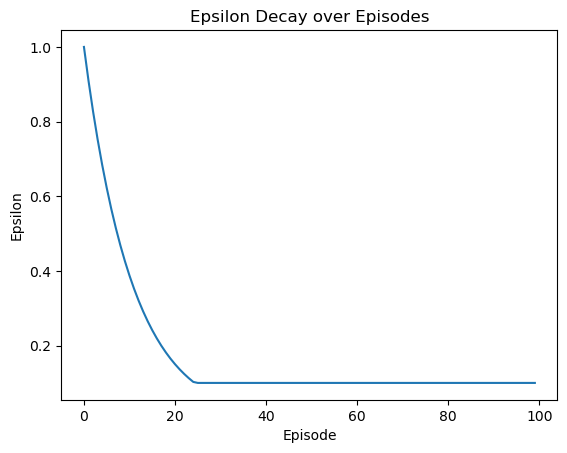

[I 2023-11-09 09:36:40,346] Trial 23 finished with value: -412.05 and parameters: {'alpha': 0.6887953408406984, 'gamma': 0.3073842865617592, 'epsilon_decay': 0.9095316991159001, 'max_timesteps': 21}. Best is trial 22 with value: -430.1.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.1144517    1.54035298   6.4869338    1.9993813 ]
 [  6.25197882  14.43164692 -27.4664707    2.11082275]
 [-15.03119298   6.02870578   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  1.4609496  -43.42056431  10.51294114   2.36766361]
 [  6.1097139   20.98282522   5.4916388    3.11202563]
 [  0.           0.         -25.43846901  14.38969793]
 [  0.           0.           0.           4.59999301]
 [  0.           0.           0.         -15.03119298]
 [  0.88124835   3.73440796  20.52311444

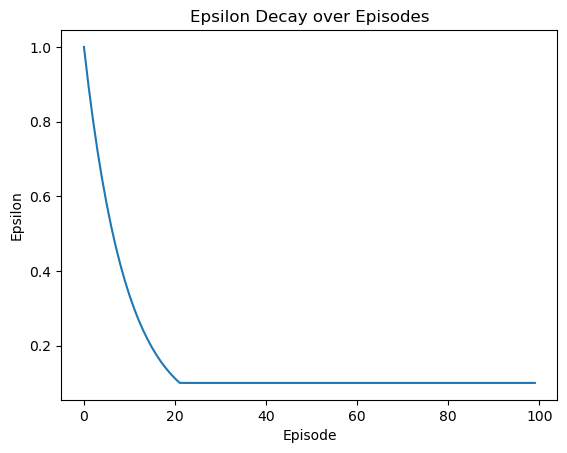

[I 2023-11-09 09:36:40,714] Trial 24 finished with value: -453.35 and parameters: {'alpha': 0.5010397661112616, 'gamma': 0.44949366072399555, 'epsilon_decay': 0.8962605372116292, 'max_timesteps': 24}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.47293436   4.21529449   4.70006771   1.64154056]
 [  2.54906061  10.28244183 -28.7545598    1.59998311]
 [-14.52504661   2.56638373   0.           0.        ]
 [  0.         -25.88238688   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.         -47.80212865  10.24845378   1.40376028]
 [  4.63390304  11.55651453   3.22291825   3.9838625 ]
 [-14.52504661  -9.68336441 -14.52504661  10.14625512]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  4.04022556  10.66175963   0.        

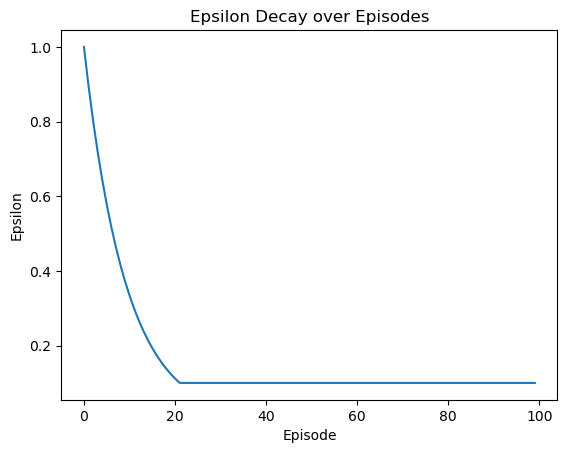

[I 2023-11-09 09:36:41,198] Trial 25 finished with value: -51.75 and parameters: {'alpha': 0.484168220345247, 'gamma': 0.4570964550359359, 'epsilon_decay': 0.8962513907718891, 'max_timesteps': 11}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.94003951   3.89224364   5.04232965   1.41222042]
 [  3.02708223  10.7039392  -28.57955041   2.33862012]
 [-24.22224526   0.93824213   0.           4.15421975]
 [  0.           0.           0.         -24.22224526]
 [  0.           0.           0.           0.        ]
 [  1.10644836 -47.43765446  10.49772989   0.91455077]
 [  3.02710367  12.10841469   4.12163121   3.36523718]
 [-26.31337806 -17.59865763 -28.88725167  10.69260775]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  4.01015144   0.           6.79460239

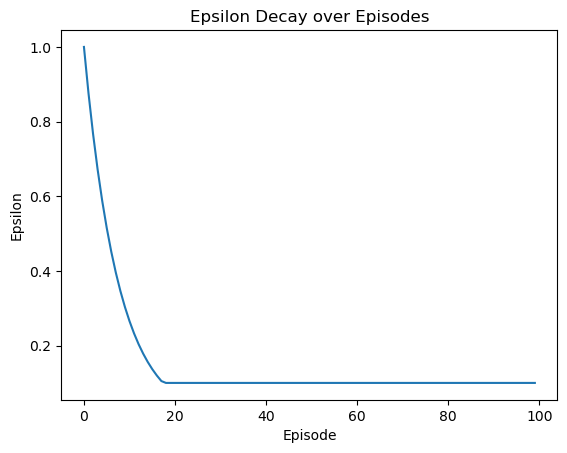

[I 2023-11-09 09:36:41,561] Trial 26 finished with value: -68.2 and parameters: {'alpha': 0.5611471492606459, 'gamma': 0.4710723364357885, 'epsilon_decay': 0.8758389250916528, 'max_timesteps': 20}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.09250401e+00  3.02381288e+00  3.05580596e+00  1.04693063e+00]
 [ 3.00068796e+00  8.54306966e+00 -2.93800736e+01  1.08865757e+00]
 [-2.07125253e+01  9.04515598e-01  0.00000000e+00  2.61860855e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.40574181e-01 -4.77227048e+01  8.53510030e+00  0.00000000e+00]
 [ 3.04351601e+00  9.90530530e+00  2.95587460e+00  1.78627042e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  8.52054714e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.2

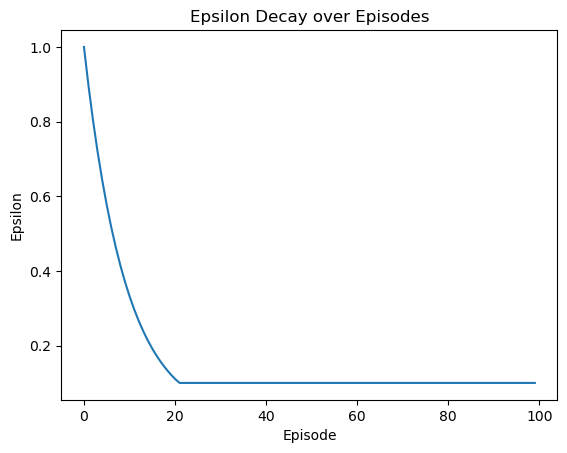

[I 2023-11-09 09:36:41,903] Trial 27 finished with value: -405.05 and parameters: {'alpha': 0.6904175101152112, 'gamma': 0.3576941401229777, 'epsilon_decay': 0.8957857123600618, 'max_timesteps': 22}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.18291108   2.44811513   3.40964727   1.28514471]
 [  3.38579804   8.66457237 -29.00071448   1.22720076]
 [-21.42057389   0.92358919   0.           3.07846777]
 [  0.         -14.03108175   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.         -44.24176422   8.62057931   0.67407984]
 [  3.38372776   9.31238626   3.26901663   3.19475368]
 [  0.         -14.33319222 -21.42057389   8.61999269]
 [  0.           0.           0.           0.92358919]
 [  0.           0.           0.           0.        ]
 [  2.59186253   9.31238357   8.891904  

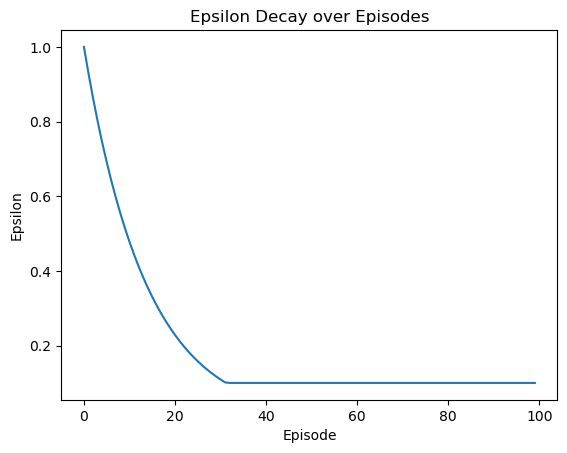

[I 2023-11-09 09:36:42,281] Trial 28 finished with value: -153.1 and parameters: {'alpha': 0.4677027250092219, 'gamma': 0.3935159325848381, 'epsilon_decay': 0.9288208428098421, 'max_timesteps': 24}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  4.95792031  10.20774835   6.55954476   5.11557065]
 [  0.          20.005369   -29.15586122   2.81132181]
 [  0.           1.75009227   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  5.15687608 -42.11876649  20.20008347   9.52182909]
 [  8.8445751   30.0794009    9.99861985  10.20509416]
 [  0.         -13.97188352 -24.96768806  20.17419534]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.          30.07041689

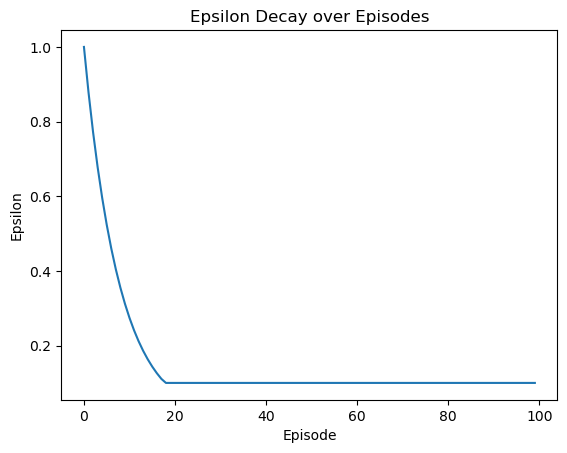

[I 2023-11-09 09:36:42,635] Trial 29 finished with value: -363.55 and parameters: {'alpha': 0.8322562688263779, 'gamma': 0.5053319885415462, 'epsilon_decay': 0.8786360637887642, 'max_timesteps': 15}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.35549549   4.45713339   3.3922272    2.30379037]
 [  1.69871335   7.60468976 -25.12140205   1.36665119]
 [-18.52685617   3.56467557   0.           0.        ]
 [  0.           0.           0.         -11.44752537]
 [  0.           0.           0.           0.        ]
 [  2.61028777 -47.39548184   7.61038531   4.45711973]
 [  4.39998428   4.43931792   4.43879435   4.45713339]
 [-26.46591121  -7.39045824 -11.44752537   7.60475211]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  4.45402879   0.           0.44767787

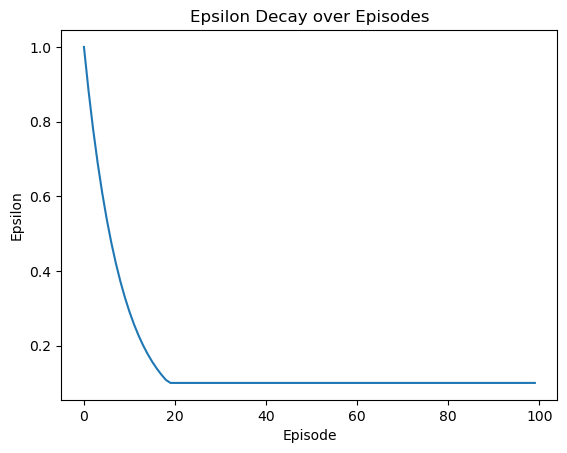

[I 2023-11-09 09:36:43,002] Trial 30 finished with value: -21.75 and parameters: {'alpha': 0.38158417890368557, 'gamma': 0.5856646157338171, 'epsilon_decay': 0.8836946532040667, 'max_timesteps': 17}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.28737838   1.4659273    0.98565889   0.22998264]
 [  0.25698842   6.12957262 -17.52359386   0.        ]
 [-17.49118756   0.41049428   0.           0.35848738]
 [  0.           0.           0.         -13.26213726]
 [  0.           0.           0.           0.        ]
 [  0.32388064 -49.16643583   6.18881965   0.81785487]
 [  1.30747887   5.01893268   0.78711063   1.24141876]
 [-17.50162915  -5.0207882  -17.53427709   5.30593701]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  1.46385744   0.           1.33063732

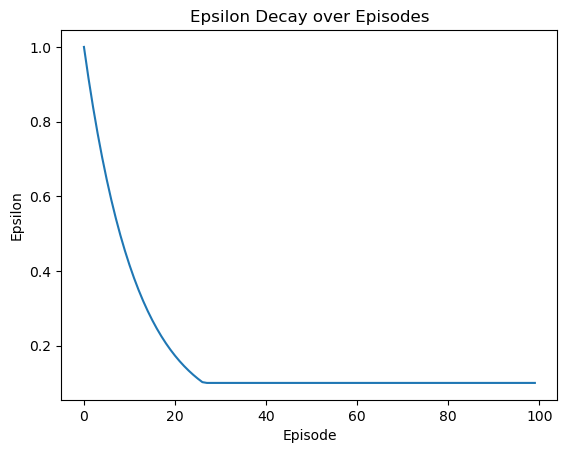

[I 2023-11-09 09:36:43,636] Trial 31 finished with value: -150.75 and parameters: {'alpha': 0.2537825429203733, 'gamma': 0.23686702505835616, 'epsilon_decay': 0.9159829806975632, 'max_timesteps': 24}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.77832025e-01  2.11087960e+00  6.05132616e-01  4.31827728e-01]
 [ 2.60280305e-01  5.42725316e+00 -4.74920524e+00  7.93261861e-02]
 [-4.75587922e+00  2.57097349e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.75781220e+00  0.00000000e+00 -4.75587922e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.62106057e-01 -2.83789622e+01  7.00039022e+00  1.04106629e+00]
 [ 7.79479908e-01  6.63395717e+00  8.08053001e-01  1.42458731e+00]
 [ 0.00000000e+00 -5.43054379e+00 -1.21253215e+01  4.56942297e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

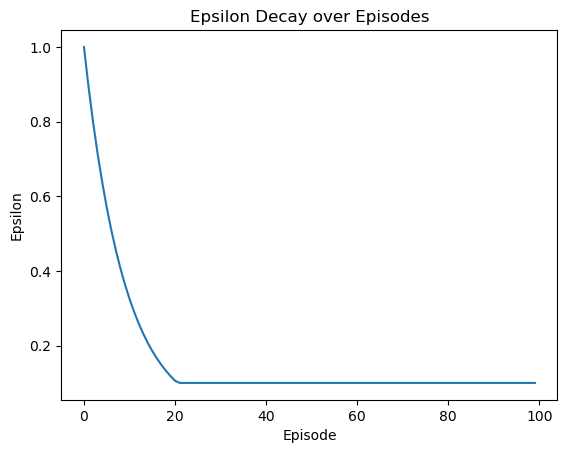

[I 2023-11-09 09:36:44,067] Trial 32 finished with value: -156.35 and parameters: {'alpha': 0.15852930733236423, 'gamma': 0.30153814808624924, 'epsilon_decay': 0.8937809394223848, 'max_timesteps': 24}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.87386616   2.21091335   2.60701541   0.86595744]
 [  2.60673196   6.11199797 -28.8895367    1.11134245]
 [-22.04459529   2.6062877    0.           0.88340809]
 [  0.         -26.15726443   0.         -22.04396105]
 [  0.           0.           0.           0.        ]
 [  0.68902309 -24.79268934   6.10899659   1.06687716]
 [  2.60701541   2.60624801   2.60660516   2.57771437]
 [-14.81247809 -14.63465008 -28.06292286   6.11199775]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.6836921    0.           0.        

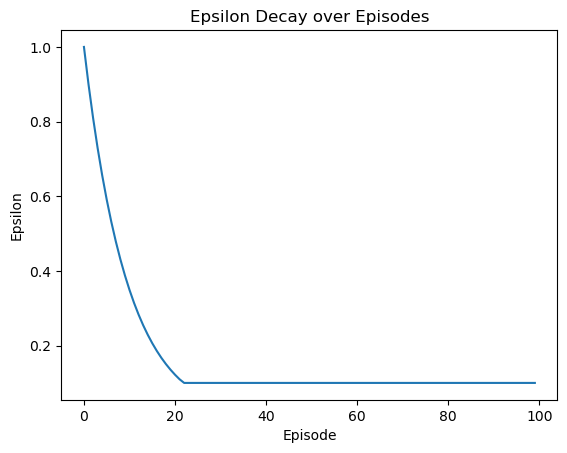

[I 2023-11-09 09:36:44,597] Trial 33 finished with value: -26.45 and parameters: {'alpha': 0.2900084047782224, 'gamma': 0.4265406213218466, 'epsilon_decay': 0.9001249476615933, 'max_timesteps': 22}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 4.17422051e-01  2.54549732e+00  1.17063197e+00  2.04339767e-01]
 [ 0.00000000e+00  6.66486137e+00 -4.93108153e+00  5.97857848e-02]
 [-4.93108153e+00  0.00000000e+00  0.00000000e+00  2.55358287e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.93108153e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.32349711e-01 -2.92096374e+01  7.55851841e+00  1.42063616e+00]
 [ 9.83405108e-01  7.59714334e+00  3.62414326e-01  8.91480946e-01]
 [-9.04687016e+00 -3.28738769e+00 -4.93108153e+00  2.92580637e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

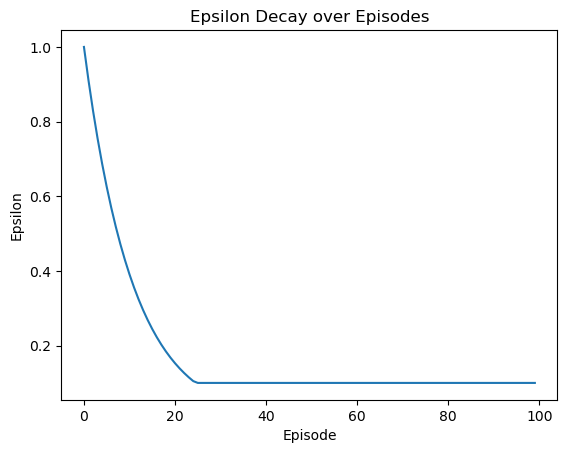

[I 2023-11-09 09:36:44,978] Trial 34 finished with value: -79.2 and parameters: {'alpha': 0.1643693844730869, 'gamma': 0.33677481045158175, 'epsilon_decay': 0.9103119404828075, 'max_timesteps': 11}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.10994909e-01  8.74795406e-01  1.80252021e-01  1.19144511e-01]
 [ 1.62676205e-01  4.91163029e+00 -8.40218796e+00  0.00000000e+00]
 [-8.40218796e+00  1.11017675e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.88059624e+01  0.00000000e+00 -1.88059624e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.66003831e-02 -4.80285854e+01  5.53354302e+00  4.78250183e-01]
 [ 5.73346402e-01  3.37494474e+00  3.11275524e-01  7.91717800e-01]
 [-8.40218796e+00 -5.60145864e+00 -1.44511505e+01  4.36694089e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

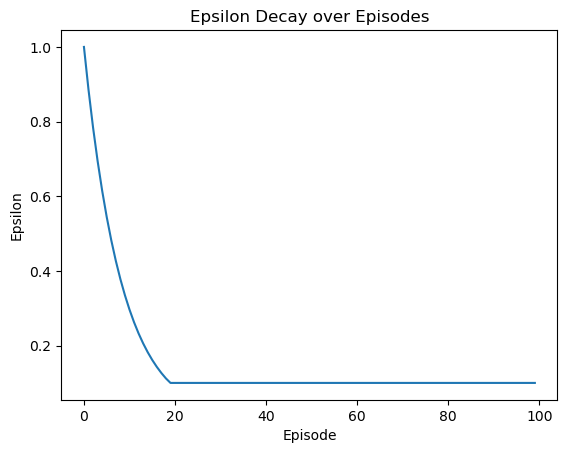

[I 2023-11-09 09:36:45,415] Trial 35 finished with value: -329.6 and parameters: {'alpha': 0.2800729321119667, 'gamma': 0.15808960930452837, 'epsilon_decay': 0.885506618053977, 'max_timesteps': 19}. Best is trial 24 with value: -453.35.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.34206548e-01  3.88730674e-01  1.44267942e+00  2.38138873e-01]
 [ 1.11827291e+00  6.25409986e+00 -2.66273424e+01  1.85202224e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11400986e+00]
 [ 0.00000000e+00 -7.26350783e+00  0.00000000e+00 -1.27683975e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.25441086e-01 -1.21058464e+01  4.68656166e+00  0.00000000e+00]
 [ 9.22725966e-01  5.43659647e+00  1.17987823e+00  2.11797790e-01]
 [-1.68868035e+01 -1.12638193e+01 -7.26350783e+00  6.13404553e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.1

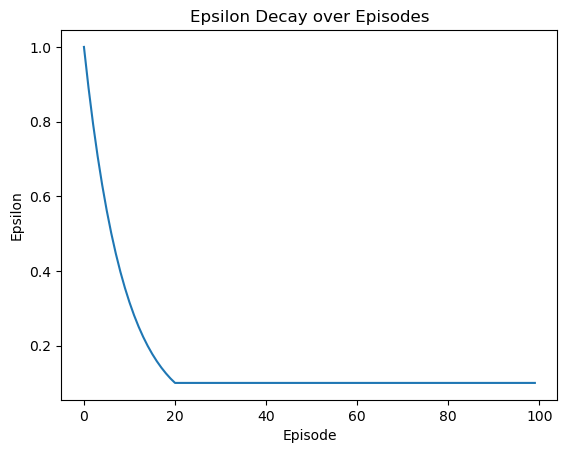

[I 2023-11-09 09:36:45,762] Trial 36 finished with value: -468.95 and parameters: {'alpha': 0.24211692753844455, 'gamma': 0.23067740713154447, 'epsilon_decay': 0.8911270892082245, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.55123752e-01  1.77902532e+00  0.00000000e+00  3.89339497e-01]
 [ 4.68906344e-01  5.95063120e+00 -2.08262506e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.80337951e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.24441328e-01 -4.29793199e+01  6.74888546e+00  1.14670340e+00]
 [ 1.05142303e+00  6.63454734e+00  9.63839668e-01  1.31873146e+00]
 [-9.77652815e+00 -6.49900985e+00 -1.63833064e+01  5.76185859e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

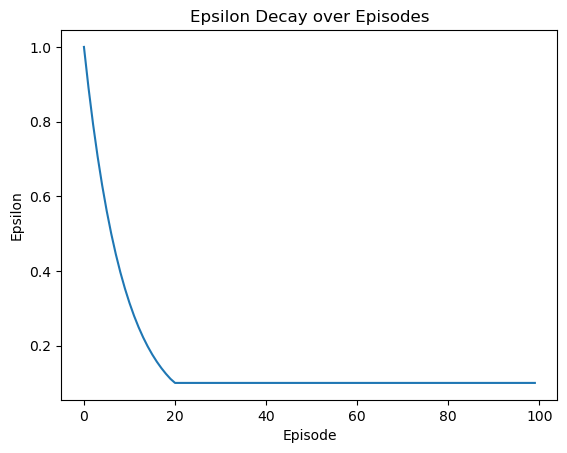

[I 2023-11-09 09:36:46,141] Trial 37 finished with value: -451.95 and parameters: {'alpha': 0.32628656827315217, 'gamma': 0.2636028316182426, 'epsilon_decay': 0.8906755400317143, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.71033294e+00  5.16223242e+00  2.72416436e+00  1.79016391e+00]
 [ 1.35588683e+00  1.12611077e+01 -2.63969866e+01  2.67552257e-01]
 [-1.03946655e+01  1.93785785e+00  0.00000000e+00  4.26385418e-01]
 [ 0.00000000e+00 -1.73603152e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.39691679e+00 -4.64370899e+01  1.22922829e+01  4.96198062e+00]
 [ 3.03839697e+00  1.73643487e+01  3.05240055e+00  3.74708475e+00]
 [-1.03946655e+01 -1.12266769e+01  0.00000000e+00  1.02780189e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

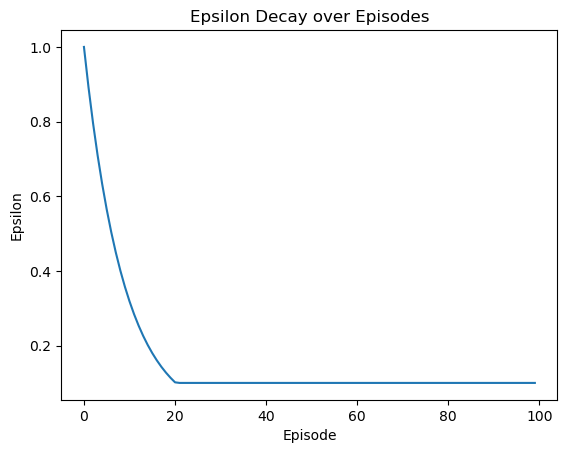

[I 2023-11-09 09:36:46,540] Trial 38 finished with value: -437.6 and parameters: {'alpha': 0.35090614993431485, 'gamma': 0.41995717721749776, 'epsilon_decay': 0.891943103844177, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.95687395e-01  1.73774936e+00  1.04455380e+00  2.71089589e-01]
 [ 5.58070156e-01  5.56569241e+00 -2.45262121e+01  9.80140029e-02]
 [-1.04504660e+01  5.29263995e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.16983061e+01  0.00000000e+00 -1.04504660e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.61708330e-01 -4.54484728e+01  6.68632892e+00  1.51384965e+00]
 [ 7.44240749e-01  6.48847875e+00  1.00483747e+00  1.66208417e+00]
 [-2.16983061e+01 -6.95270117e+00 -1.72239761e+01  6.31915047e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  9.8

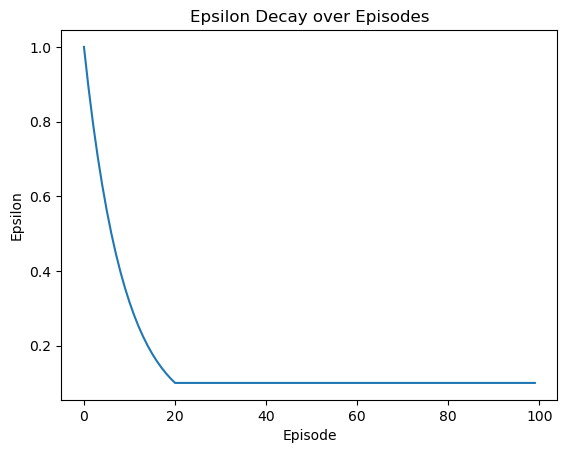

[I 2023-11-09 09:36:46,888] Trial 39 finished with value: -440.45 and parameters: {'alpha': 0.3483488673485725, 'gamma': 0.2598958834453217, 'epsilon_decay': 0.891250390200322, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.40471608e-01  1.67767223e+00  9.97872848e-01  3.14108099e-01]
 [ 1.21732225e+00  6.45706610e+00 -2.38438501e+01  0.00000000e+00]
 [-2.38756444e+01  3.64575465e-01  0.00000000e+00  1.07877684e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.23941568e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.97176964e-01 -4.76674710e+01  6.59609947e+00  1.43976173e+00]
 [ 1.54050852e+00  6.27538003e+00  1.35746136e+00  1.52408370e+00]
 [-2.78312124e+01 -1.59576239e+01 -1.96678095e+01  6.19868228e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

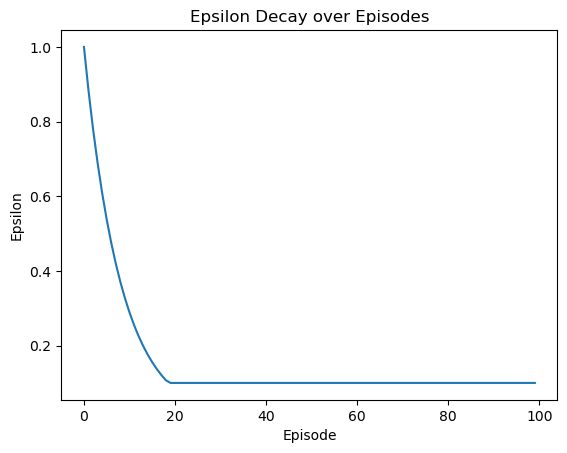

[I 2023-11-09 09:36:47,338] Trial 40 finished with value: -339.35 and parameters: {'alpha': 0.41313855913221176, 'gamma': 0.2543430841582492, 'epsilon_decay': 0.8832117983265962, 'max_timesteps': 21}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.39498469   1.36379189   1.56660727   0.43853879]
 [  1.56650694   5.45029801 -29.54970751   0.4502977 ]
 [-26.2796248    1.56660567   0.           0.90398961]
 [  0.         -26.3050346    0.         -17.12119542]
 [  0.           0.           0.           0.        ]
 [  0.27182938 -17.48217869   5.45028857   0.41754113]
 [  1.56660727   1.55936028   1.56660188   1.56654543]
 [-28.61981399 -16.34871714 -24.39769595   5.45029801]
 [  0.           0.           0.           1.36576584]
 [  0.           0.           0.         -10.37868763]
 [  0.44292675   0.           0.        

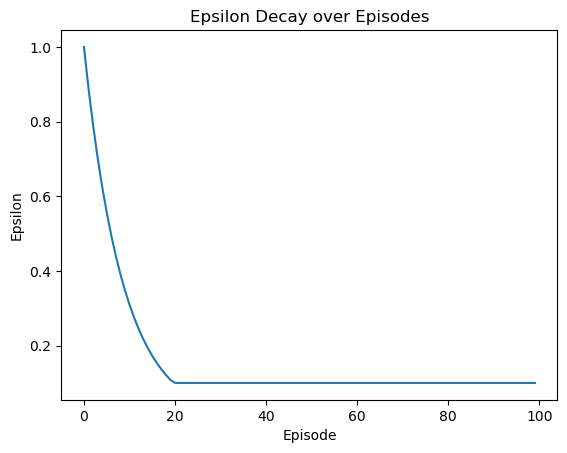

[I 2023-11-09 09:36:47,820] Trial 41 finished with value: -26.95 and parameters: {'alpha': 0.34964357386315315, 'gamma': 0.28743515810945963, 'epsilon_decay': 0.8894155145687066, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.73694377e-01  1.47660892e+00  3.36385688e+00  1.01658474e+00]
 [ 2.58725729e+00  8.60634005e+00 -2.89231176e+01  7.46696441e-01]
 [-1.02852627e+01  3.95764922e-01  0.00000000e+00  2.79769715e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.13626201e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.52571717e-01 -2.88992752e+01  8.60623934e+00  1.04295882e-02]
 [ 3.23042560e+00  9.22672692e+00  2.77416758e+00  2.76980816e+00]
 [-2.59288178e+01 -1.41552693e+01 -2.61662445e+01  8.27562625e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.0

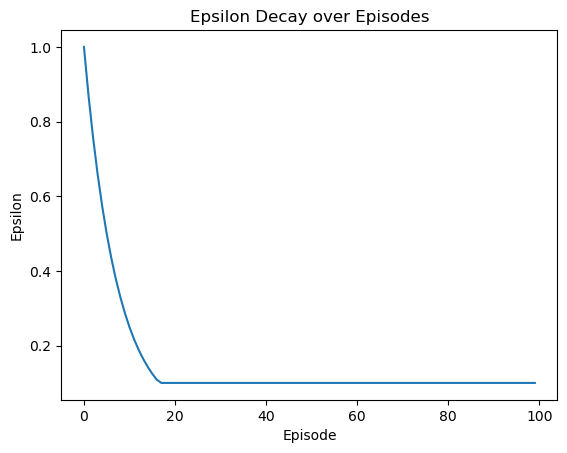

[I 2023-11-09 09:36:48,197] Trial 42 finished with value: -176.35 and parameters: {'alpha': 0.3503735713800241, 'gamma': 0.3908580025535776, 'epsilon_decay': 0.8703779895367257, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.40631588e-01  9.62155788e-01  1.24293250e+00  1.82921015e-01]
 [ 1.13513789e+00  5.98044872e+00 -2.97456373e+01  2.39363162e-01]
 [ 0.00000000e+00  1.18163934e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.05879349e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.63026768e-01  0.00000000e+00  5.72647498e+00  6.10756052e-01]
 [ 1.15603095e+00  4.71749134e+00  1.12091142e+00  1.05418271e+00]
 [-2.06495452e+01 -1.88790108e+01 -2.47169051e+01  5.94304674e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.7

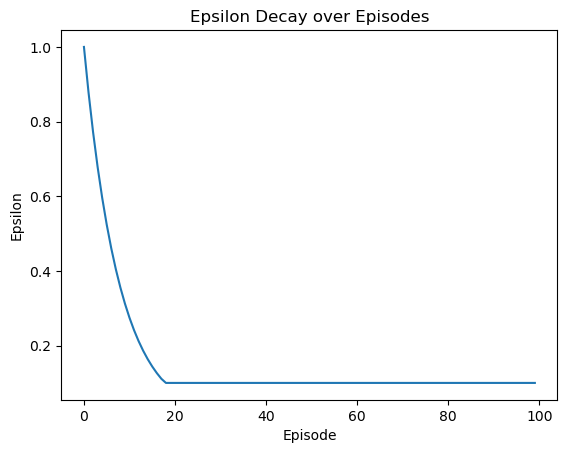

[I 2023-11-09 09:36:48,688] Trial 43 finished with value: -390.4 and parameters: {'alpha': 0.44171528183083475, 'gamma': 0.20783264891740633, 'epsilon_decay': 0.8787350467731642, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.72918210e-01  6.65512087e-01  1.52668717e+00  2.83203914e-01]
 [ 1.40017337e+00  6.37416733e+00 -2.77320525e+01  1.93511500e-01]
 [-9.41671418e+00  0.00000000e+00  0.00000000e+00  1.02025438e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.58776115e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.76052506e-02 -1.56945236e+01  5.29658873e+00  0.00000000e+00]
 [ 1.18835378e+00  5.73737215e+00  1.16094368e+00  3.09373009e-01]
 [-9.41671418e+00 -6.04221738e+00 -1.58776115e+01  6.03905881e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

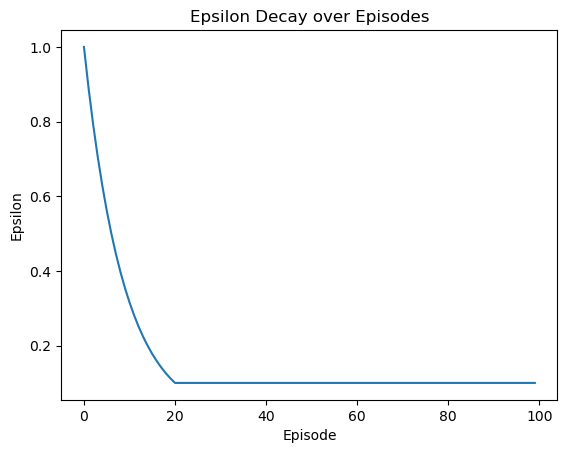

[I 2023-11-09 09:36:49,179] Trial 44 finished with value: -429.9 and parameters: {'alpha': 0.31389047274060056, 'gamma': 0.23951162520351787, 'epsilon_decay': 0.8911543090572082, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 7.69134012e-01  2.78245908e+00  2.25733957e+00  6.39076981e-01]
 [ 0.00000000e+00  8.13574680e+00 -1.84631288e+01  3.01112459e-01]
 [-1.13962210e+01  0.00000000e+00  0.00000000e+00  2.51400138e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.49441488e-01 -4.68413675e+01  8.35649249e+00  1.95707243e+00]
 [ 1.97568736e+00  1.00804717e+01  1.08820238e+00  1.89191812e+00]
 [-1.84321165e+01  0.00000000e+00 -1.13967072e+01  5.27882690e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

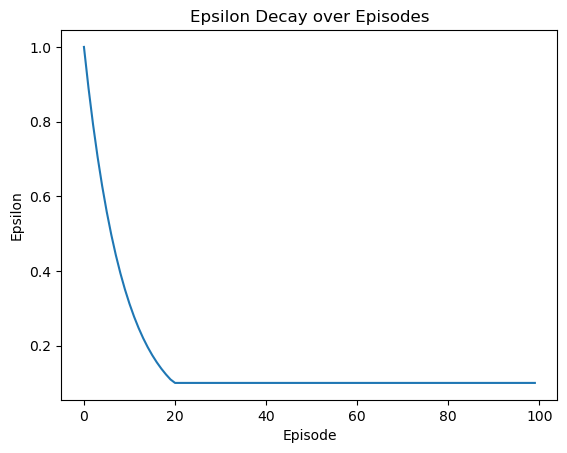

[I 2023-11-09 09:36:49,708] Trial 45 finished with value: -341.85 and parameters: {'alpha': 0.3798902408310779, 'gamma': 0.33296987326809696, 'epsilon_decay': 0.8900453252445638, 'max_timesteps': 22}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.77497528   2.43980899   1.25025208   0.48953761]
 [  0.94316959   5.99311006  -7.53028379   0.34162663]
 [-13.18857288   0.73691592   0.           0.        ]
 [  0.          -7.56687635   0.          -7.56687635]
 [  0.           0.           0.           0.        ]
 [  0.99243924 -49.00634473   5.99323173   2.43980689]
 [  2.43919224   2.43785034   2.43074024   2.43980899]
 [-20.62016418  -8.78359435 -22.98603277   5.99007615]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  2.43919442   1.29264814   0.90976092

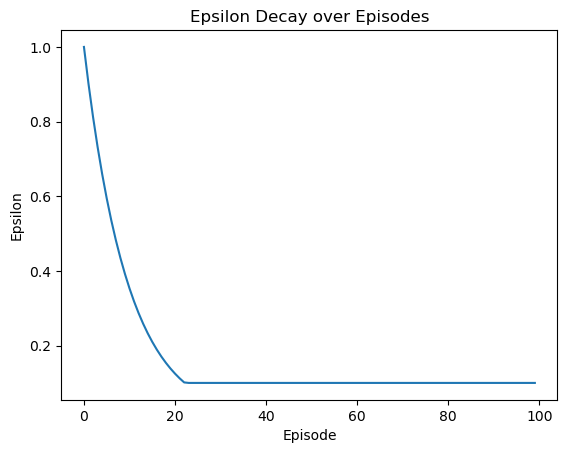

[I 2023-11-09 09:36:50,298] Trial 46 finished with value: -28.3 and parameters: {'alpha': 0.2522292115277258, 'gamma': 0.40709405198486937, 'epsilon_decay': 0.9011783761413573, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 5.16198885e-01  1.90606693e+00  1.60113822e+00  4.59723811e-01]
 [ 9.47852011e-01  6.67151872e+00 -2.65446098e+01  1.01699017e-01]
 [-1.25858598e+01  1.11431363e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.25077968e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.81160517e-01 -4.88925866e+01  6.73907071e+00  1.82435144e+00]
 [ 1.54960890e+00  6.14864060e+00  1.65344120e+00  1.86438820e+00]
 [-1.25858598e+01 -8.39057323e+00 -1.25858598e+01  6.54820344e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

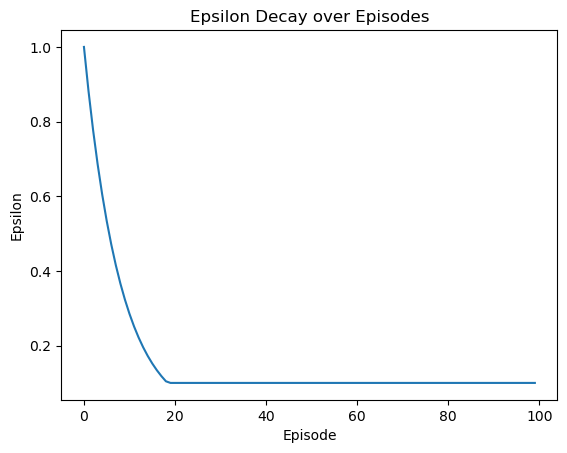

[I 2023-11-09 09:36:50,891] Trial 47 finished with value: -137.75 and parameters: {'alpha': 0.41952866133439637, 'gamma': 0.28283824448433886, 'epsilon_decay': 0.8820055461172543, 'max_timesteps': 20}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.29769450e+00  9.68061211e+00  2.96251681e+00  2.46435450e+00]
 [ 2.69771850e+00  1.52182154e+01 -2.71949341e+01  2.43868413e-01]
 [-1.02173564e+01  1.78525329e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.02173564e+01  0.00000000e+00 -1.01212742e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.40647826e+00 -4.47981328e+01  1.94021773e+01  8.47038907e+00]
 [ 3.84050310e+00  2.88652818e+01  2.72397077e+00  7.37866056e+00]
 [-1.02173564e+01 -9.16040353e+00 -1.69549004e+01  1.28474640e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

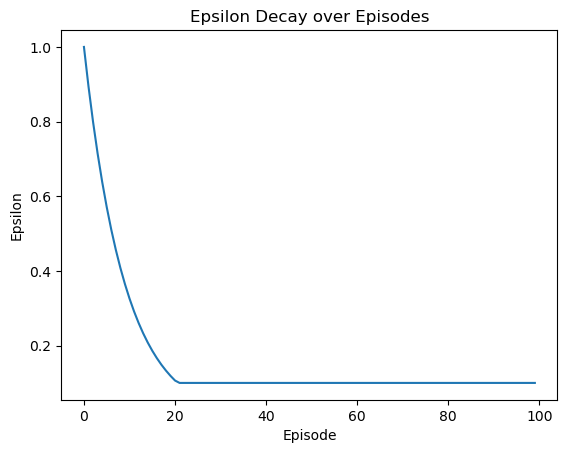

[I 2023-11-09 09:36:51,416] Trial 48 finished with value: -453.3 and parameters: {'alpha': 0.34057854591199704, 'gamma': 0.4989446273334797, 'epsilon_decay': 0.8940038274873234, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  5.16320074  10.37061049   8.57384402   2.89461453]
 [  0.          19.74017801 -15.23659303   3.37051268]
 [-26.6449527    3.14714684   0.           0.        ]
 [  0.           0.           0.         -15.54625509]
 [  0.           0.           0.           0.        ]
 [  4.48159304 -36.06586343  20.44545022   8.93854185]
 [  5.26926438  30.45039479   4.12023918   9.27009564]
 [  0.         -17.3874964    0.          15.89140338]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  4.23857308   0.          30.28101801

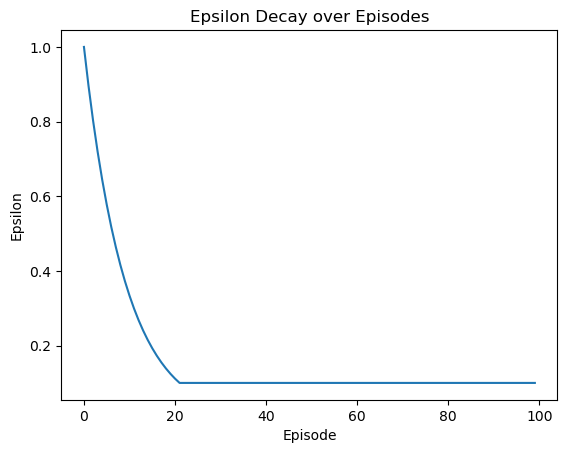

[I 2023-11-09 09:36:51,870] Trial 49 finished with value: -451.35 and parameters: {'alpha': 0.5182085030273251, 'gamma': 0.5072331682597206, 'epsilon_decay': 0.8960825046672786, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 7.31909417e+00  1.38906037e+01  2.74103651e+00  2.69219188e+00]
 [ 8.13994432e-02  2.24430057e+01 -2.89353761e+01  1.04071884e+00]
 [-2.65140190e+01  1.25758848e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.05096006e+01  0.00000000e+00 -1.53606259e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.55335958e+00 -3.29795452e+01  2.56302672e+01  1.36462680e+01]
 [ 7.34961181e+00  3.80659670e+01  0.00000000e+00  9.70705123e+00]
 [ 0.00000000e+00 -1.52375272e+01 -1.99226063e+01  9.55958511e+00]
 [ 0.00000000e+00  1.91154961e+01  0.00000000e+00  0.0

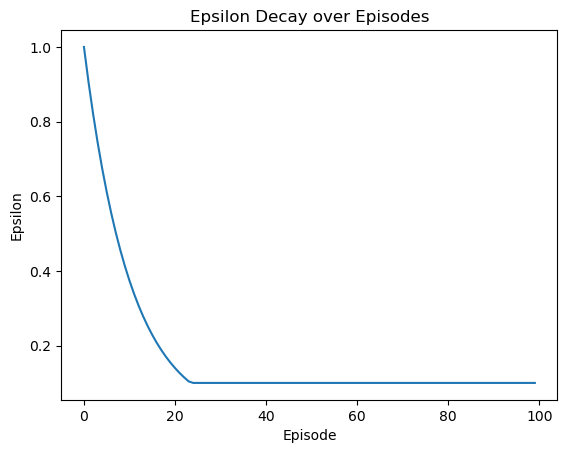

[I 2023-11-09 09:36:52,279] Trial 50 finished with value: -448.85 and parameters: {'alpha': 0.51202086283681, 'gamma': 0.5419609389081477, 'epsilon_decay': 0.9062894600815141, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  4.10857936   1.41866378   7.52919796   3.44557894]
 [  6.79923101  13.68391052 -27.19124014   4.0586664 ]
 [-15.33060343   6.58912233   0.           0.        ]
 [  0.         -22.82696014   0.         -15.12859896]
 [  0.           0.           0.           0.        ]
 [  3.86580903 -45.81456235   0.           0.        ]
 [  7.18324161  15.7825382    4.72575284   0.        ]
 [  0.         -17.60518922 -15.33060343  13.53744784]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.         -15.33060343]
 [  1.00530123  15.78253797  11.70090875

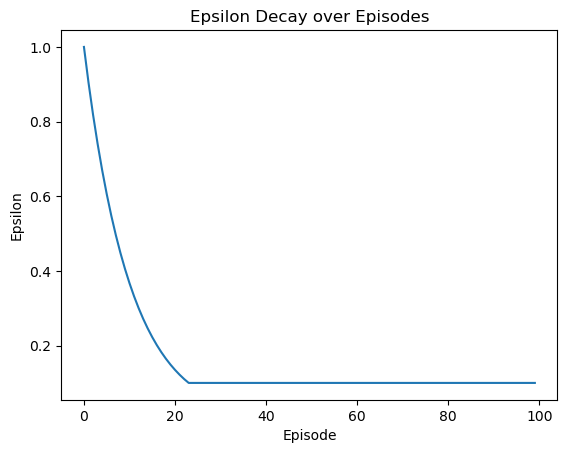

[I 2023-11-09 09:36:52,812] Trial 51 finished with value: -157.15 and parameters: {'alpha': 0.5110201142912686, 'gamma': 0.5502226830509501, 'epsilon_decay': 0.9046695055689792, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 17.06899394  32.43484323  23.6865512    0.        ]
 [  5.35779591  50.26307909 -26.48063246   3.25566145]
 [-26.14098826   0.           0.          11.53679378]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 11.88347736 -40.14954095  50.56758029  18.50303633]
 [ 29.2351651   71.04218937  21.11198202  25.45318655]
 [-15.87599563 -17.93725253 -26.31471719  45.91661614]
 [  0.           0.           0.           4.16117083]
 [  0.           0.           0.           0.        ]
 [  6.48687122  45.40608635   0.        

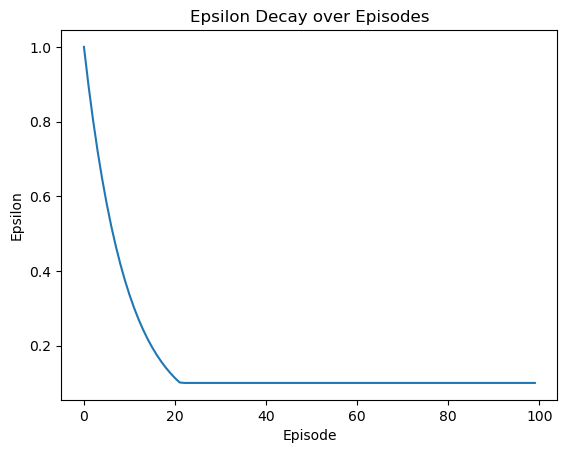

[I 2023-11-09 09:36:53,228] Trial 52 finished with value: -411.05 and parameters: {'alpha': 0.5291998543338676, 'gamma': 0.6414157656867252, 'epsilon_decay': 0.8966905353221148, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.79716365   5.83386536   5.52110151   2.46366406]
 [  2.71803765  11.64959402 -13.54487488   1.43034544]
 [-21.00133183   1.35172665   0.           0.08719116]
 [  0.         -21.31352594   0.         -13.73387435]
 [  0.           0.           0.           0.        ]
 [  2.70765176 -48.02562026  11.66730911   4.89676074]
 [  5.02988439  13.33413638   5.55791566   5.09824656]
 [-27.36164432 -16.6281094  -13.85706898  11.59008624]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  5.82974558   7.92321432  13.33410978

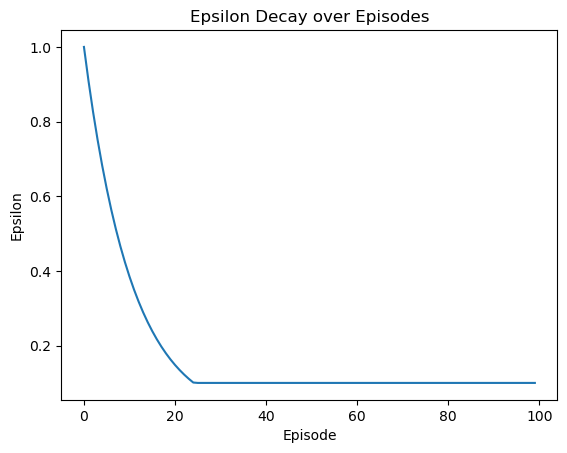

[I 2023-11-09 09:36:53,645] Trial 53 finished with value: -137.65 and parameters: {'alpha': 0.4619022993657577, 'gamma': 0.5000180679109837, 'epsilon_decay': 0.9089186186824773, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  3.19305532   8.65432106   3.9483749    2.72717575]
 [  0.76044259  15.83175122 -24.56300787   0.41369213]
 [-13.4872014    3.07582944   0.           0.        ]
 [  0.         -13.4872014    0.         -20.32917675]
 [  0.           0.           0.           0.        ]
 [  2.31355162 -42.12917243  17.83154471   2.50456768]
 [  2.99592701  26.43838397   3.49458833   7.85993664]
 [-13.4872014  -13.76959096 -13.4872014   13.20094932]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.         -20.91091608]
 [  0.76044259   0.          23.25028206

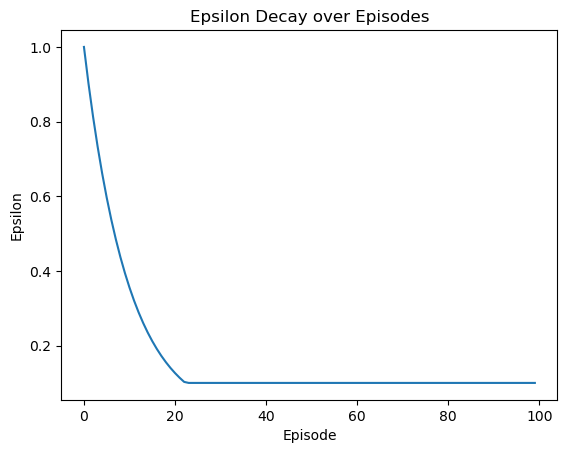

[I 2023-11-09 09:36:53,996] Trial 54 finished with value: -444.0 and parameters: {'alpha': 0.4495733801046501, 'gamma': 0.4853377092963257, 'epsilon_decay': 0.9017334868226854, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  6.60951712  12.60593411   7.94094238   1.93086865]
 [  0.          23.3582579  -16.09275409   1.50058498]
 [  0.           0.           0.           2.9607695 ]
 [  0.         -16.09275409   0.         -15.48764191]
 [  0.           0.           0.           0.        ]
 [  4.12933476 -38.99574897  23.76255074  11.68129805]
 [ 10.09506259  35.36795133   1.53486236  11.7070547 ]
 [-15.67930604 -13.96436094 -16.09275409  13.96854106]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  4.70324898   0.          34.18661621

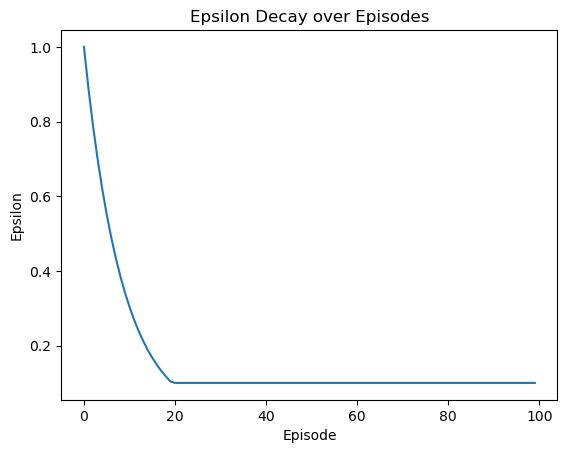

[I 2023-11-09 09:36:54,351] Trial 55 finished with value: -459.85 and parameters: {'alpha': 0.5364251364698007, 'gamma': 0.5304958311701714, 'epsilon_decay': 0.8876568178097892, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.73990192   3.48420982   3.49575786   1.78793785]
 [  3.49575786   6.79771137 -28.20228863   1.79771137]
 [-27.90607844   0.           0.           3.49575786]
 [  0.         -24.84991976   0.         -17.57010027]
 [  0.           0.           0.           0.        ]
 [  1.75337474 -48.61890897   6.79771137   3.47584914]
 [  3.49575786   3.49575786   3.49575774   3.49575786]
 [-17.57010027 -11.71340018 -27.8661673    6.79771136]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  3.3676297    0.           1.66945326

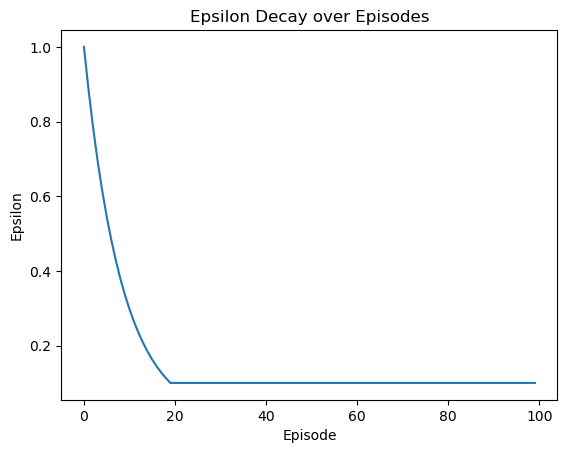

[I 2023-11-09 09:36:54,746] Trial 56 finished with value: -36.35 and parameters: {'alpha': 0.5856700090737973, 'gamma': 0.5142551175629697, 'epsilon_decay': 0.8858299471934403, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.23635036   0.           2.81275829   0.83682861]
 [  2.80068923   6.26319136 -23.84442794   1.16005772]
 [-12.61747399   2.16333753   0.           0.        ]
 [  0.           0.           0.         -12.61747399]
 [  0.           0.           0.           0.        ]
 [  1.26319128 -46.04196862   6.26319136   2.81275824]
 [  2.81275778   2.8127568    2.81254097   2.81275829]
 [-19.76060948 -11.78830285 -12.61747399   6.26316103]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  2.81202129  11.38682251   1.01195067

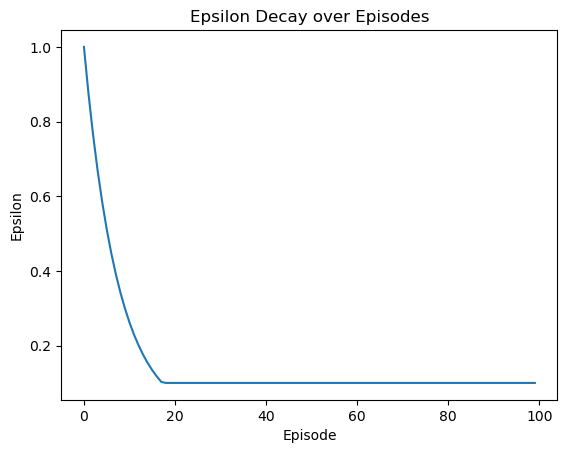

[I 2023-11-09 09:36:55,116] Trial 57 finished with value: -63.3 and parameters: {'alpha': 0.42058246634142177, 'gamma': 0.449093462088496, 'epsilon_decay': 0.8746118331298796, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  7.38330881   6.99129373  12.55115797   4.78047211]
 [  9.5690431   19.39935935 -25.89156151   6.2730008 ]
 [-17.96121509   9.93893608   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  2.00069339 -40.88368702  17.4501026    0.8830181 ]
 [ 12.09904013  22.25598204   7.84090409   3.76760616]
 [-25.16892193   3.361727   -19.33460508  17.642347  ]
 [  0.          41.14979239   0.           0.        ]
 [  0.           0.           0.          -8.11582266]
 [  0.          22.25595951  13.32481601

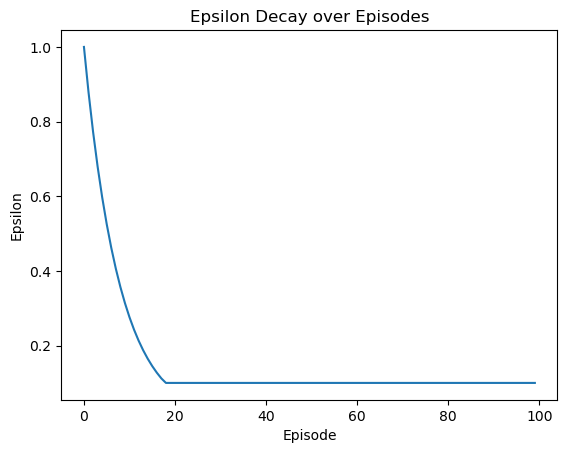

[I 2023-11-09 09:36:55,635] Trial 58 finished with value: -167.45 and parameters: {'alpha': 0.5987071695896204, 'gamma': 0.646988271354237, 'epsilon_decay': 0.8791853202902543, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 6.82308593e+00  1.44257304e+01  8.69086392e+00  6.88353009e+00]
 [ 1.69540718e+00  2.48554235e+01 -2.26623089e+01  3.23150902e-01]
 [-2.26623089e+01  9.30843469e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.26623089e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.43242496e+00 -3.54818751e+01  2.55954390e+01  7.29133952e+00]
 [ 1.09913184e+01  3.65422956e+01  9.30843469e-01  7.09620154e+00]
 [-2.26623089e+01 -1.01087978e+01 -2.82052763e+01  1.58064047e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

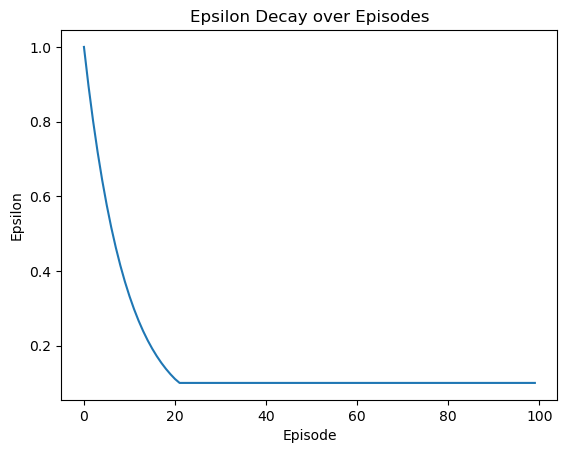

[I 2023-11-09 09:36:55,984] Trial 59 finished with value: -361.95 and parameters: {'alpha': 0.5054398895217123, 'gamma': 0.5636055074849228, 'epsilon_decay': 0.8956763114762313, 'max_timesteps': 22}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.10030687e+01  2.17547621e+01  1.33356835e+01  7.77028186e+00]
 [ 6.55098628e-01  3.52949050e+01 -1.65538424e+01  1.99686180e+00]
 [-1.65538424e+01  1.54344758e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.36237221e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.63115237e-01 -2.24628499e+01  3.65909108e+01  6.64349299e+00]
 [ 1.20565088e+01  5.31350421e+01  4.54192975e+00  1.49225839e+01]
 [ 0.00000000e+00 -1.56326016e+01 -2.72988290e+01  2.62948250e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

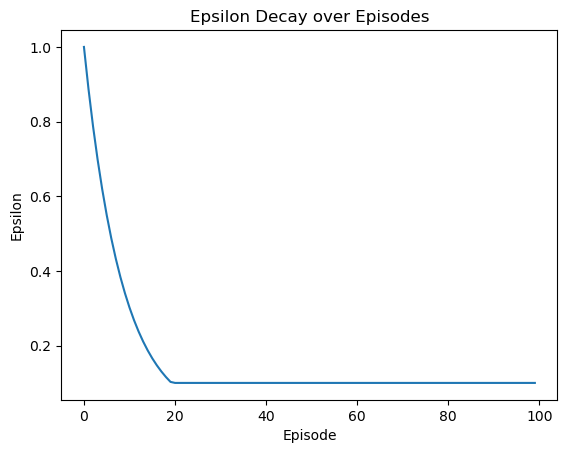

[I 2023-11-09 09:36:56,333] Trial 60 finished with value: -442.8 and parameters: {'alpha': 0.5517947465899979, 'gamma': 0.5945400546608943, 'epsilon_decay': 0.8871482065566514, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.45934185e+00  6.41992474e+00  4.20033065e+00  3.10012571e+00]
 [ 9.35339593e-01  1.21454041e+01 -2.19086805e+01  3.95738120e-01]
 [-1.44929983e+01  1.03197142e+00  0.00000000e+00  1.09733290e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.76821541e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.61320209e+00 -4.22791886e+01  1.23711281e+01  5.96666393e+00]
 [ 4.82123032e+00  1.42040872e+01  2.65965684e+00  5.75286844e+00]
 [-2.58243692e+01 -9.76653130e+00 -1.43882807e+01  8.96764990e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.0

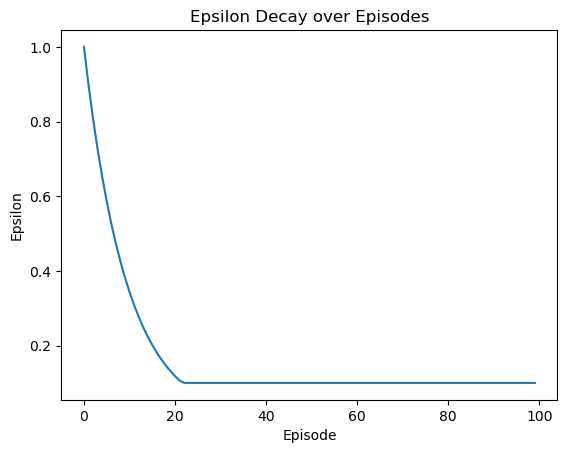

[I 2023-11-09 09:36:56,748] Trial 61 finished with value: -280.85 and parameters: {'alpha': 0.48832656498479526, 'gamma': 0.5189441631796564, 'epsilon_decay': 0.8987388464610222, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.0023119    3.10888896   4.87114422   2.18545098]
 [  4.75405306  10.4935109  -27.90044578   2.17337257]
 [-22.33509832   0.7678187    0.           4.77992108]
 [  0.         -23.13553155   0.         -14.56657012]
 [  0.           0.           0.           0.        ]
 [  0.         -25.83412589  10.45571841   0.93372786]
 [  4.84937038  11.83422494   3.17909287   4.6282648 ]
 [-28.52930182 -17.52970475 -23.13553155   9.42111896]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  1.88100406   0.          11.83422486

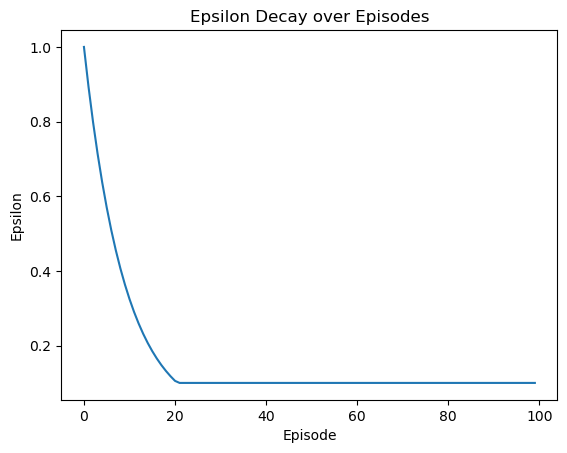

[I 2023-11-09 09:36:57,272] Trial 62 finished with value: -166.25 and parameters: {'alpha': 0.5216532482340888, 'gamma': 0.4642053809804871, 'epsilon_decay': 0.893624151838231, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.08660747   5.16884073   4.81840261   1.77873353]
 [  2.21993489  10.8158265  -21.35098602   1.22280308]
 [-14.14587523   1.56292943   0.           0.        ]
 [  0.         -25.57223762   0.         -14.14587523]
 [  0.           0.           0.           0.        ]
 [  2.1546819  -43.98918955  10.85896259   2.58700257]
 [  4.61761314  12.30880557   4.82902602   4.2664447 ]
 [-14.02710562 -16.70434582 -25.57223762  10.82555817]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  4.10205396  12.30880455  10.4921129 

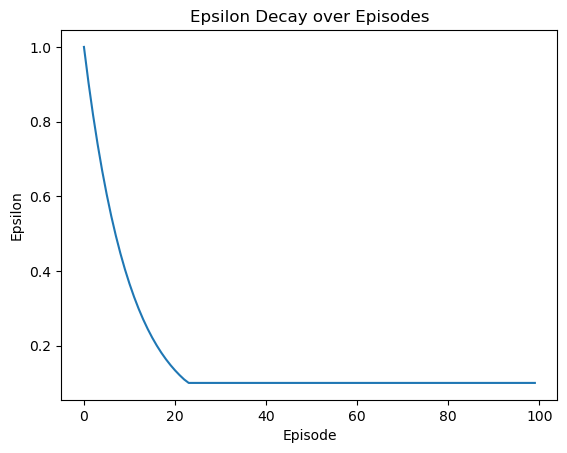

[I 2023-11-09 09:36:57,921] Trial 63 finished with value: -178.95 and parameters: {'alpha': 0.47152917427578206, 'gamma': 0.47599765549329315, 'epsilon_decay': 0.9042800433148963, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.8483356   14.2239661    9.19038189   6.373866  ]
 [  0.          25.80403922   0.           0.        ]
 [  0.           0.           0.           5.70966267]
 [  0.         -15.80171305   0.         -25.55065408]
 [  0.           0.           0.           0.        ]
 [  7.65312087 -38.02192444  26.11075832   1.53318429]
 [ 12.08991203  38.75275746   6.45192858  13.45048971]
 [  0.         -14.10099998 -23.28028826  23.14825927]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.         -15.80171305]
 [  2.69791684  32.39173368   3.38035863

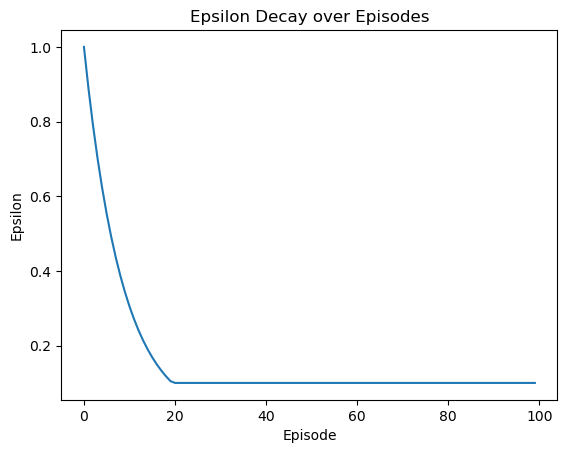

[I 2023-11-09 09:36:58,268] Trial 64 finished with value: -429.5 and parameters: {'alpha': 0.5267237684339968, 'gamma': 0.5447549982126791, 'epsilon_decay': 0.888022653749284, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 3.27507711e-01  1.31804078e+01  6.60898990e+00  9.13903628e-02]
 [ 4.27167448e-01  2.38026773e+01 -1.19797333e+01  2.05365441e-01]
 [-2.34980873e+01  1.80015429e+00  0.00000000e+00  7.27693413e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.91756662e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.47134804e+00 -3.66837116e+01  2.46009846e+01  1.02475742e+01]
 [ 1.04992690e+01  3.65848712e+01  1.00289140e+01  1.11877026e+01]
 [-2.31870641e+01 -1.25338002e+01 -2.32735585e+01  2.33409797e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.3

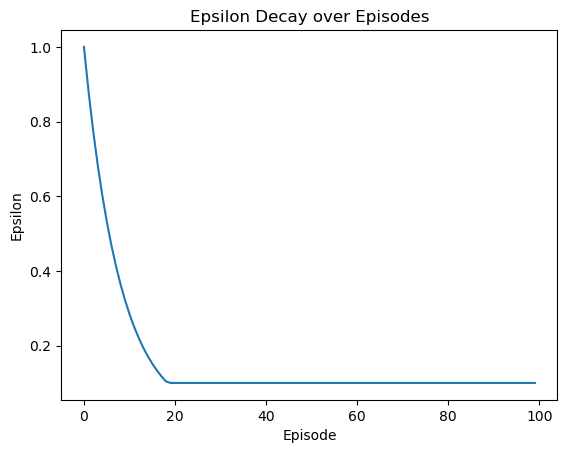

[I 2023-11-09 09:36:59,055] Trial 65 finished with value: -450.75 and parameters: {'alpha': 0.39932444231623626, 'gamma': 0.5357674904263375, 'epsilon_decay': 0.8818453102126663, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.35621033e+00  3.29199997e+00  5.01549313e+00  1.57269975e+00]
 [ 3.91294619e+00  1.16417947e+01 -2.84335649e+01  1.07418113e+00]
 [-2.34451176e+01  1.12837923e+00  0.00000000e+00  4.42602591e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.18725502e+01]
 [ 0.00000000e+00  2.91898463e-01  0.00000000e+00  0.00000000e+00]
 [ 8.45752840e-01 -4.57693290e+01  1.02977980e+01  9.90906803e-01]
 [ 4.40131601e+00  1.54161367e+01  2.92190541e+00  3.23249717e+00]
 [ 0.00000000e+00 -7.95395323e+00 -2.60519790e+01  8.70251117e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

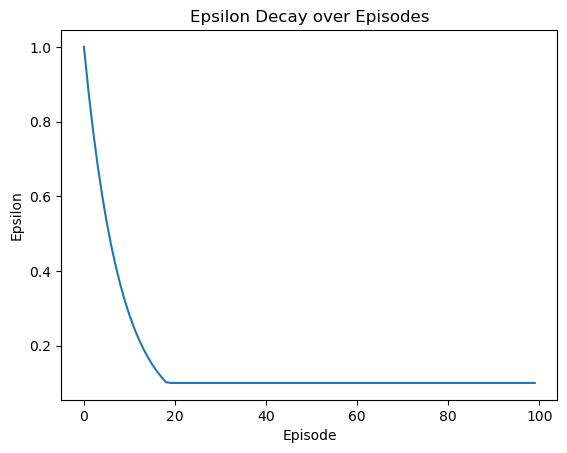

[I 2023-11-09 09:36:59,605] Trial 66 finished with value: -275.9 and parameters: {'alpha': 0.3976976614325289, 'gamma': 0.430840323812825, 'epsilon_decay': 0.8809134416363446, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  3.55093563   9.7063504    6.3702657    2.62863119]
 [  0.62664063  17.58194589 -15.95330367   0.        ]
 [-15.95330367   0.           0.           0.        ]
 [  0.         -15.95330367   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  1.69879689 -45.08320333  19.44127127   5.16161188]
 [  0.68953643  28.92504995   1.32582681   7.68380978]
 [ -9.4719487   -6.04645728 -15.95330367  10.65586783]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.         -20.3882899 ]
 [  9.14948945   0.           0.        

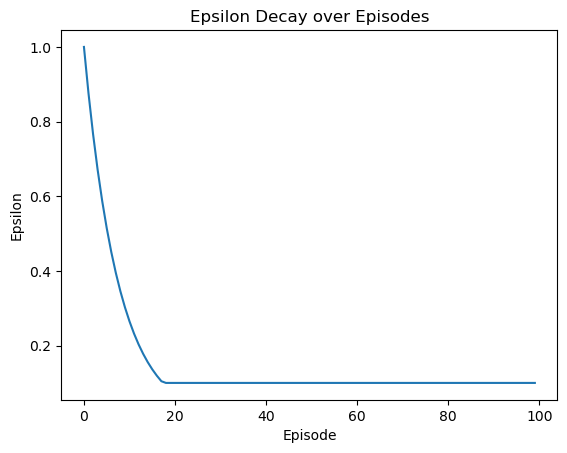

[I 2023-11-09 09:37:00,229] Trial 67 finished with value: -454.4 and parameters: {'alpha': 0.3157316234804928, 'gamma': 0.4992652148776072, 'epsilon_decay': 0.8756247368670595, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.04504217   2.18107177   3.23504626   0.4459019 ]
 [  2.86016924   6.58846234 -26.98227676   1.34626442]
 [ -9.40591706   3.23314892   0.           1.01402498]
 [  0.         -24.92545635   0.          -9.40591706]
 [  0.           0.           0.           0.        ]
 [  0.59959567 -26.28252609   6.58799911   1.71030694]
 [  3.23403512   3.20199968   3.23504626   3.22997969]
 [-28.40844213 -18.41397791 -13.99594887   6.58846234]
 [  0.          46.41701982   0.           1.63627927]
 [  0.           0.           0.           0.        ]
 [  1.70734209   0.           0.        

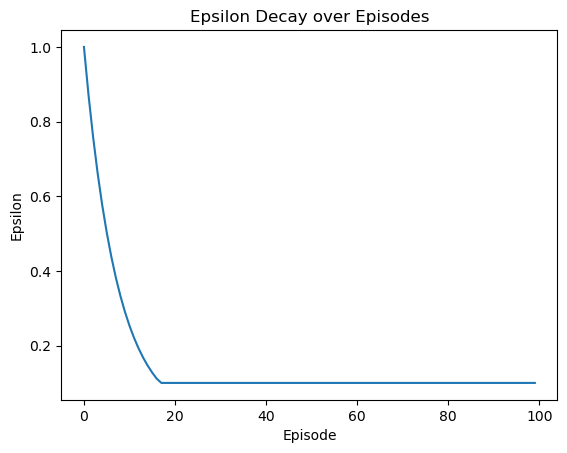

[I 2023-11-09 09:37:00,795] Trial 68 finished with value: -74.95 and parameters: {'alpha': 0.31353056862156375, 'gamma': 0.49101688612109046, 'epsilon_decay': 0.8716442182855237, 'max_timesteps': 22}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 9.66568944e-01  9.66475981e-02  3.23710885e+00  8.46386993e-01]
 [ 2.21907102e+00  8.81788157e+00 -2.57197351e+01  5.44823043e-01]
 [-1.89799399e+01  1.58846991e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.64462031e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.52235989e-03 -2.63827341e+01  4.88112855e+00  0.00000000e+00]
 [ 1.34251801e+00  1.05055488e+01  1.58283949e+00  4.99108171e-01]
 [-6.63709795e+00 -6.58105837e+00  0.00000000e+00  7.64598484e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

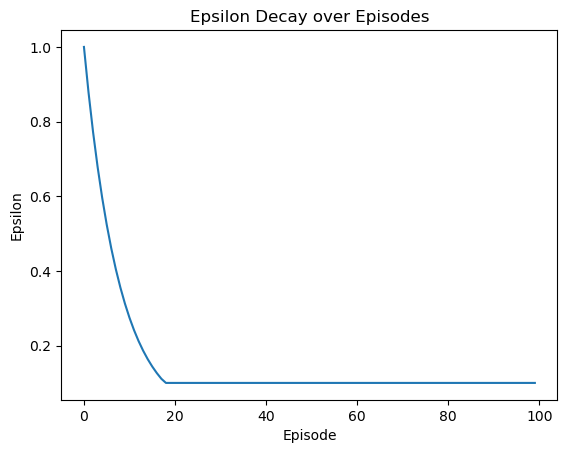

[I 2023-11-09 09:37:01,288] Trial 69 finished with value: -289.7 and parameters: {'alpha': 0.22148734352321722, 'gamma': 0.37210771974521795, 'epsilon_decay': 0.8787326627909616, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.96542382   0.31799108   2.73699169   0.98413932]
 [  2.73374214   6.20690214 -28.79170346   1.20658718]
 [  0.           0.14561445   0.           2.73209023]
 [  0.         -13.01607517   0.          -7.31440847]
 [  0.           0.           0.           0.        ]
 [  1.20482627 -21.67289006   0.           0.11035122]
 [  2.73699169   2.40587712   2.69000598   0.52319484]
 [-12.90298339  -8.67738344 -13.01607517   6.1896915 ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.          -7.42750025]
 [  0.33482435   0.           0.        

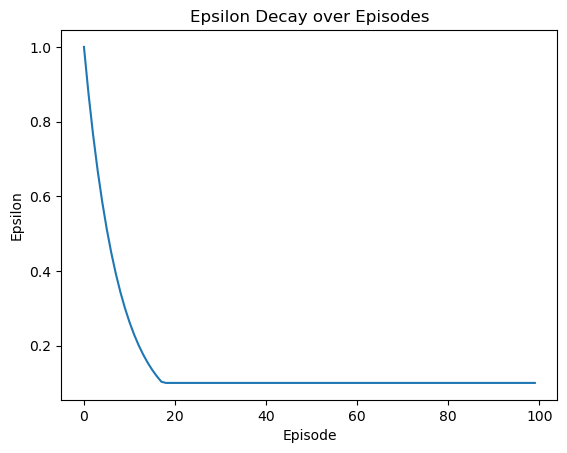

[I 2023-11-09 09:37:01,850] Trial 70 finished with value: -29.95 and parameters: {'alpha': 0.2475833416143095, 'gamma': 0.4409593746382274, 'epsilon_decay': 0.8749362593843072, 'max_timesteps': 21}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.63952424e+00  1.19432453e+01  2.73804739e+00  2.35122971e+00]
 [ 7.90999450e-01  1.11894080e+01 -8.40912881e+00  4.45158887e-01]
 [-1.44611427e+01  0.00000000e+00  0.00000000e+00  6.30414074e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.88167511e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.98110818e+00 -4.33132135e+01  2.27912906e+01  4.98304022e+00]
 [ 2.91207447e+00  3.39480975e+01  3.31038342e+00  6.46416094e+00]
 [-1.44611427e+01 -8.13370191e+00 -8.16712903e+00  1.34545131e+01]
 [ 0.00000000e+00  1.64722283e+00  0.00000000e+00  0.0

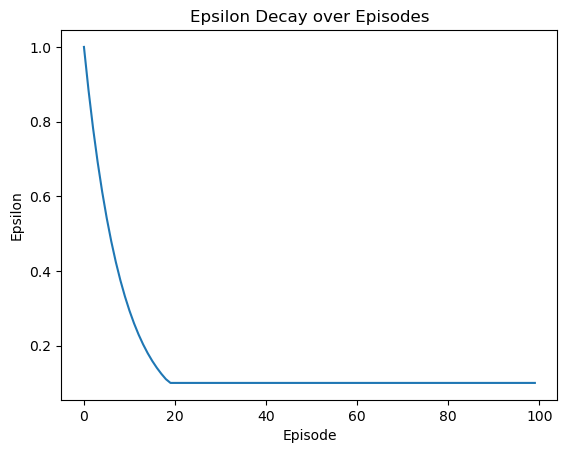

[I 2023-11-09 09:37:02,205] Trial 71 finished with value: -353.25 and parameters: {'alpha': 0.28030429351472586, 'gamma': 0.5241225697028653, 'epsilon_decay': 0.8845737308400659, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  4.03133661   8.79787532   6.69638149   4.13372259]
 [  0.          14.78453628   0.           0.        ]
 [-11.2423314    1.8727237    0.           0.        ]
 [  0.           0.           0.         -11.2423314 ]
 [  0.           0.           0.           0.        ]
 [  4.3502171  -41.67264511  15.15877206   7.74670665]
 [  6.09640505  17.50360223   5.71317585   7.43156774]
 [-11.15369687 -15.82601582 -25.06401085  13.24733061]
 [  0.          21.27975048   0.           1.12737956]
 [  0.           0.           0.           0.        ]
 [  8.79787351   0.           0.        

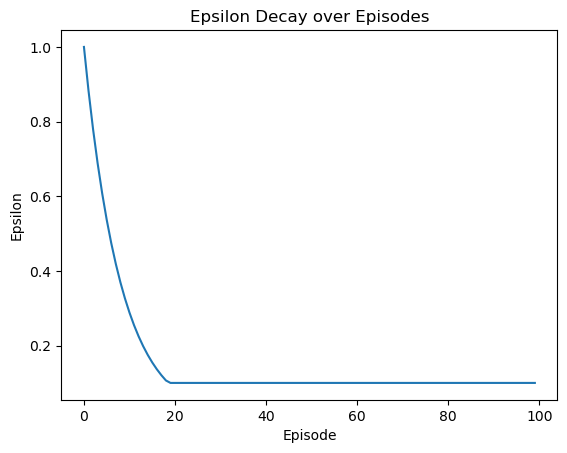

[I 2023-11-09 09:37:02,756] Trial 72 finished with value: -180.5 and parameters: {'alpha': 0.3747443799934908, 'gamma': 0.580381793908111, 'epsilon_decay': 0.8830313201704927, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.70332186e+00  7.31944277e-01  8.94171056e+00  3.33721759e+00]
 [ 7.79976191e+00  1.82737374e+01 -2.40508634e+01  3.24425996e+00]
 [-1.26594921e+01  4.89946218e-01  0.00000000e+00  3.60797440e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.44658664e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.97557880e-01 -3.41842554e+01  1.63996318e+01  3.47927973e+00]
 [ 4.70241422e+00  2.71268892e+01  7.24654374e+00  5.57246191e+00]
 [-2.37130943e+01 -1.63370652e+01 -2.04056472e+01  1.73236854e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.6

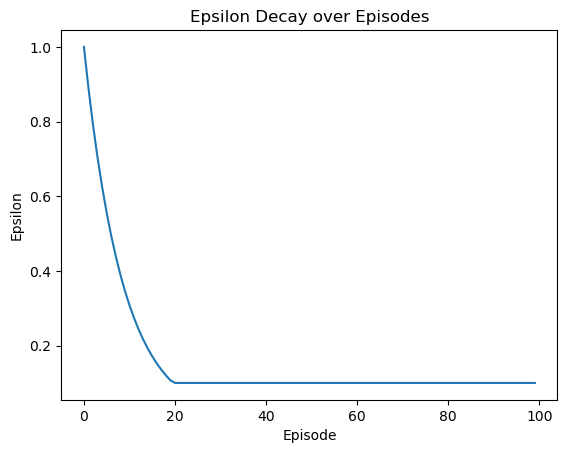

[I 2023-11-09 09:37:03,183] Trial 73 finished with value: -407.25 and parameters: {'alpha': 0.43758121252078125, 'gamma': 0.4893202939188235, 'epsilon_decay': 0.8889478728786548, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 0.00000000e+00  1.22121321e+01  4.54678453e+00  2.92851901e+00]
 [ 1.29666003e+00  2.09785585e+01 -2.05216008e+01  1.12067153e-01]
 [-1.61640737e+01  1.07473924e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -9.62654201e+00  0.00000000e+00 -1.61640737e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.91631266e+00 -4.71596380e+01  2.31846489e+01  9.95593619e+00]
 [ 7.20224549e+00  3.45234284e+01  7.75279515e+00  9.36322742e+00]
 [-1.61640737e+01 -1.28044621e+01 -2.06038112e+01  2.11376320e+01]
 [ 0.00000000e+00  2.16944739e+00  0.00000000e+00  0.0

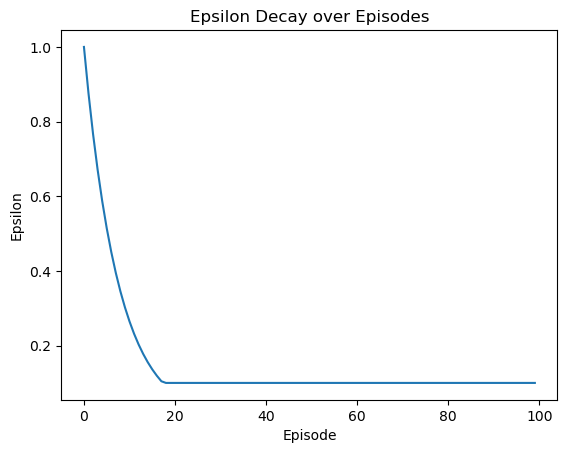

[I 2023-11-09 09:37:03,582] Trial 74 finished with value: -411.65 and parameters: {'alpha': 0.3208847337213211, 'gamma': 0.5267335972119918, 'epsilon_decay': 0.8755786249094142, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.70377194e+00  2.46631947e+00  7.63282662e+00  8.07944993e-01]
 [ 6.17681539e+00  1.62566591e+01 -2.54517796e+01  1.18148749e+00]
 [ 0.00000000e+00  4.25409885e-01  0.00000000e+00  3.14070564e+00]
 [ 0.00000000e+00 -1.88077684e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.58857427e-01 -3.98341632e+01  1.40749901e+01  1.33478028e+00]
 [ 4.84661107e+00  2.39625210e+01  5.77654926e-01  3.59969592e+00]
 [-1.86610273e+01 -5.60223304e+00 -8.40334955e+00  5.31123267e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

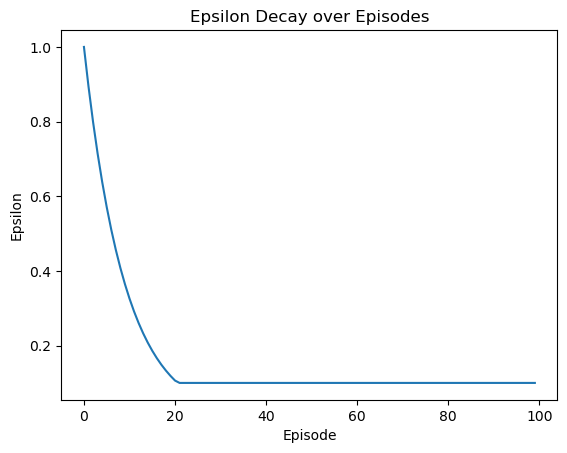

[I 2023-11-09 09:37:03,974] Trial 75 finished with value: -387.15 and parameters: {'alpha': 0.2801116517784619, 'gamma': 0.47015982704032705, 'epsilon_decay': 0.8939663899984114, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.83119367   4.09520957   4.21124579   2.27193544]
 [  4.02305035   7.39740657 -27.62078957   1.20207346]
 [-18.01298046   4.20996547   0.           0.        ]
 [  0.         -11.79692571   0.         -22.54509505]
 [  0.           0.           0.           0.        ]
 [  0.50178835 -31.4880911    7.39721524   0.        ]
 [  4.20762689   4.20555301   4.21124579   4.19463641]
 [-27.59024513 -17.58007459 -27.64650055   7.39740657]
 [  0.           0.           0.           4.19802841]
 [  0.           0.           0.           0.        ]
 [  1.05097662   0.           0.        

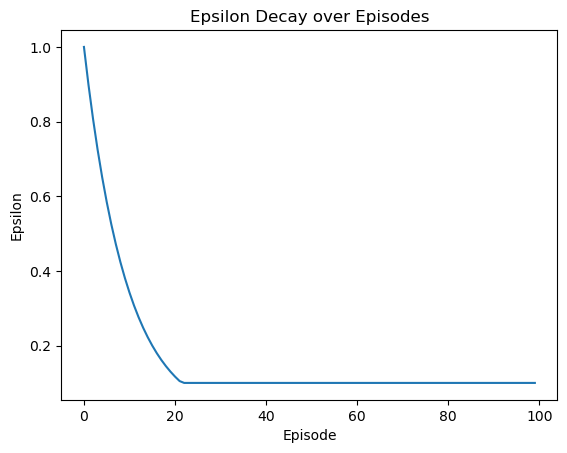

[I 2023-11-09 09:37:04,341] Trial 76 finished with value: -14.0 and parameters: {'alpha': 0.39323085708619576, 'gamma': 0.5692867829802755, 'epsilon_decay': 0.8982358622553608, 'max_timesteps': 14}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 10.93782746  24.44472032   1.59467352   7.65410777]
 [  0.          34.63861807 -16.78191132   0.        ]
 [-10.08662107   0.           0.           0.        ]
 [  0.         -16.78191132   0.         -16.78191132]
 [  0.           0.           0.           0.        ]
 [  7.40399642 -23.77941596  40.19316582  10.30129604]
 [ 12.92428708  57.86613257   2.75947806  13.65189319]
 [-10.08662107  -6.44324201 -10.08662107  22.47107581]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  2.76506817   5.22538353  29.07529868

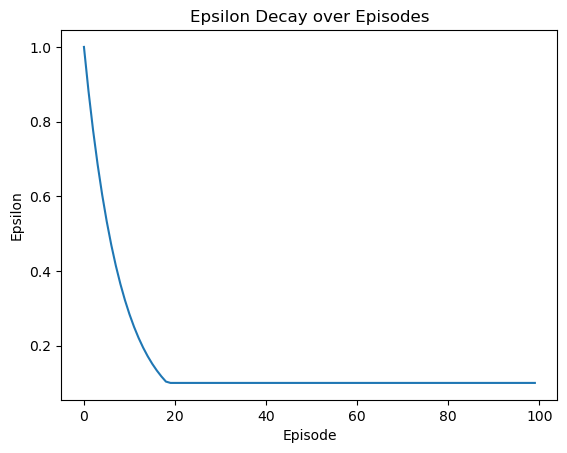

[I 2023-11-09 09:37:04,721] Trial 77 finished with value: -386.55 and parameters: {'alpha': 0.33622070243626606, 'gamma': 0.6081831594779847, 'epsilon_decay': 0.8816417976820846, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.31930906e+00  5.10659970e+00  2.10874748e+00  8.26229378e-01]
 [ 0.00000000e+00  1.17742891e+01 -2.22939873e+01  9.72673457e-02]
 [-1.78774617e+01  7.53187270e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.09297051e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.58228174e+00 -4.28772294e+01  1.22013930e+01  2.85014273e+00]
 [ 3.98994790e+00  1.72065622e+01  2.87462588e+00  4.54837311e+00]
 [-1.09297051e+01  0.00000000e+00 -1.77097306e+01  1.08614323e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.0

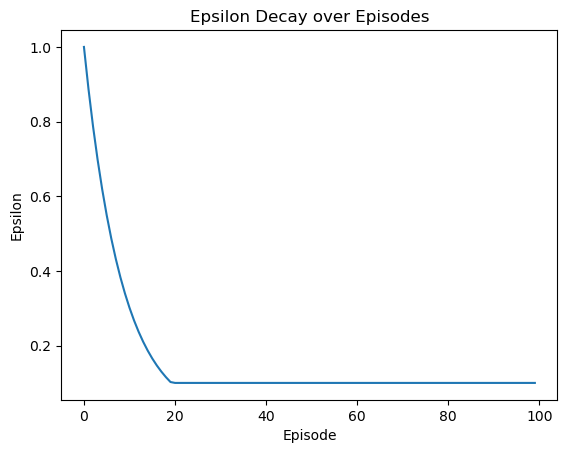

[I 2023-11-09 09:37:05,135] Trial 78 finished with value: -448.65 and parameters: {'alpha': 0.36432350262925894, 'gamma': 0.4185259598519563, 'epsilon_decay': 0.886983440581796, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.24713794e+00  1.66723043e+00  4.22001483e+00  1.17396157e+00]
 [ 2.87689988e+00  1.07440218e+01 -2.90977340e+01  8.79926202e-01]
 [-9.21216219e+00  2.86249515e+00  0.00000000e+00  9.94593845e-01]
 [ 0.00000000e+00 -9.21216219e+00  0.00000000e+00 -1.55955266e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.06677458e-01 -3.78731767e+01  7.21708477e+00  6.32714405e-01]
 [ 2.90142042e+00  1.46229470e+01  2.65292024e+00  2.03803703e+00]
 [-1.54568895e+01 -6.14144146e+00 -2.00187381e+01  9.79039560e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

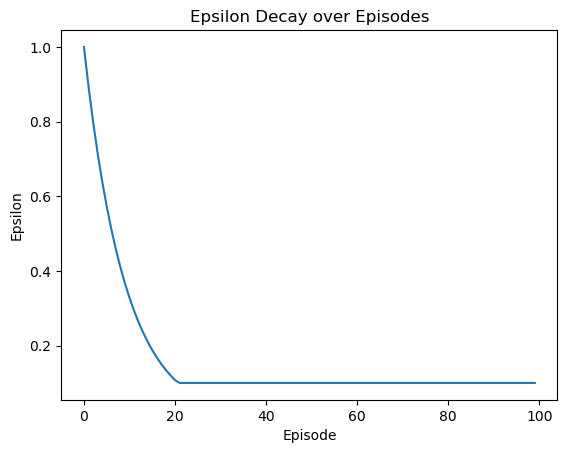

[I 2023-11-09 09:37:05,613] Trial 79 finished with value: -266.05 and parameters: {'alpha': 0.307072072893668, 'gamma': 0.3928869431828578, 'epsilon_decay': 0.8945221178813858, 'max_timesteps': 19}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.91233816   4.24911327   6.03515314   2.89212954]
 [  4.44777281  11.90990569 -28.6409535    2.68137977]
 [-22.01615802   0.           0.           3.23338427]
 [  0.         -25.88132739   0.         -21.34800962]
 [  0.           0.           0.           0.        ]
 [  0.44780116 -36.24530684  11.79194784   0.9001748 ]
 [  3.40903558  13.63616187   4.18583377   5.47077516]
 [-14.28959639 -12.84063739   0.          10.76425154]
 [  0.          17.06570778   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.59383142   0.          13.63616179

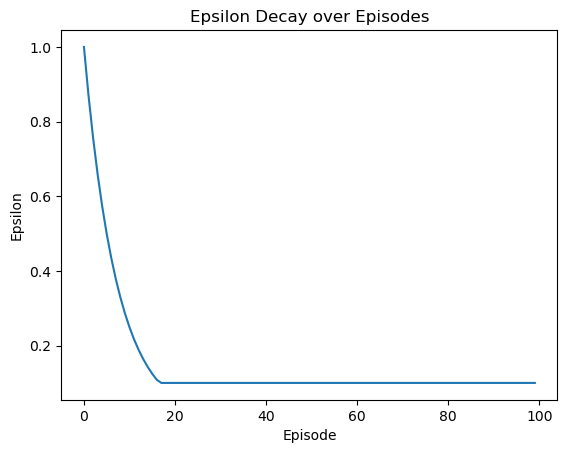

[I 2023-11-09 09:37:06,217] Trial 80 finished with value: -148.05 and parameters: {'alpha': 0.484123982080527, 'gamma': 0.5067339152546384, 'epsilon_decay': 0.8702524170789303, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  3.26950493   7.17647478   6.03581475   3.06964288]
 [  1.79297327  13.26212921 -16.28181398   0.        ]
 [-16.28181398   0.           0.           0.        ]
 [  0.           0.           0.         -23.72704574]
 [  0.           0.           0.           0.        ]
 [  3.29856868 -41.71677336  13.26903305   4.90181504]
 [  7.06260517  15.28913237   3.25162045   6.04942104]
 [-16.28181398 -19.12555655 -27.13154822  11.10911345]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  4.35698887  11.81790797  15.28913237

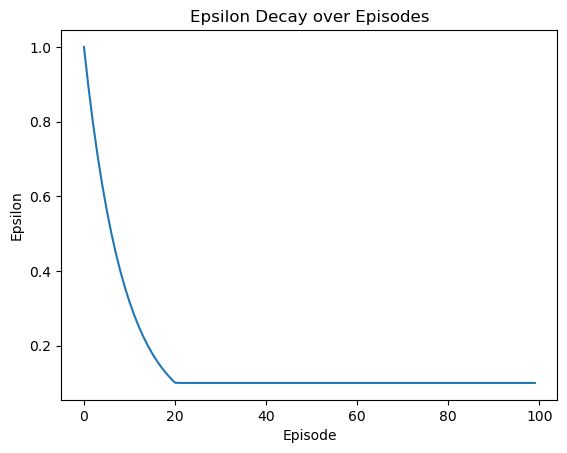

[I 2023-11-09 09:37:06,691] Trial 81 finished with value: -155.7 and parameters: {'alpha': 0.5427271325135385, 'gamma': 0.5408438393418489, 'epsilon_decay': 0.8915259170545424, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  4.41847892   7.78579851  15.5330767    1.48940183]
 [  9.21082305  27.98217094 -27.5294564    2.77278393]
 [-27.47157567   8.49848856   0.           2.84002298]
 [  0.           0.           0.         -13.41586975]
 [  0.           0.           0.           0.        ]
 [  1.5824317  -22.74886831  27.65269545   2.40452792]
 [ 13.17274922  41.40139447   6.92909111  13.75296537]
 [-27.05198835 -19.03816033 -21.08850986  25.06504814]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.         -13.64932099]
 [  5.2175013    0.          31.25111438

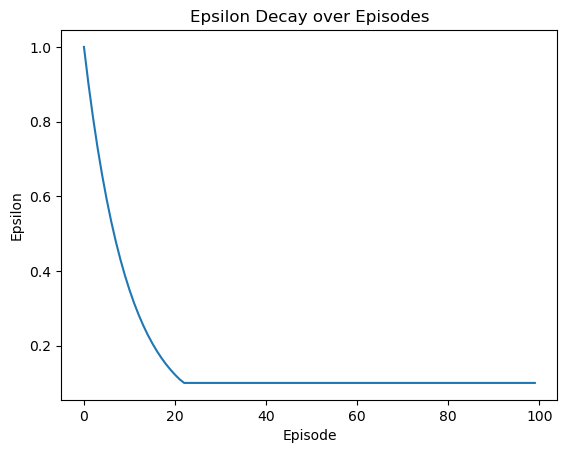

[I 2023-11-09 09:37:07,152] Trial 82 finished with value: -416.05 and parameters: {'alpha': 0.45497736622115265, 'gamma': 0.5551062043231088, 'epsilon_decay': 0.9001160047482029, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.79581297   3.38981824   6.9505313    0.95737429]
 [  3.43504477  15.16905601 -27.13195512   2.33230203]
 [-11.78226837   0.58276463   0.           3.35937904]
 [  0.           0.           0.         -11.78226837]
 [  0.           0.           0.           0.        ]
 [  1.25991467 -48.69594619  13.28167556   2.86065354]
 [  5.10480106  22.19323416   4.71195426   4.17364361]
 [-11.78226837 -16.90305771   0.          13.32347394]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.         -11.956246  ]
 [  4.58982341   0.           0.60219858

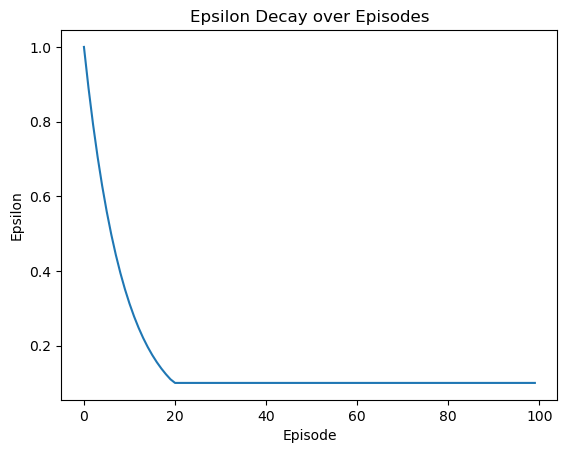

[I 2023-11-09 09:37:07,541] Trial 83 finished with value: -292.95 and parameters: {'alpha': 0.3985415334143919, 'gamma': 0.458205532184667, 'epsilon_decay': 0.8902052861866372, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.48668266   7.33121248   7.44851832   3.50089124]
 [  5.06677445  13.58921296 -26.2343643    3.85769912]
 [-21.34870313   5.94622884   0.           3.74165021]
 [  0.         -15.07004502   0.         -15.07004502]
 [  0.           0.           0.           0.        ]
 [  0.         -21.96618046  13.57888193   0.        ]
 [  7.30639145  15.67031712   7.32436997   4.08010159]
 [-26.30228883 -13.30349399 -22.56988147  13.58442193]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.69156368   9.9273956   15.67031712

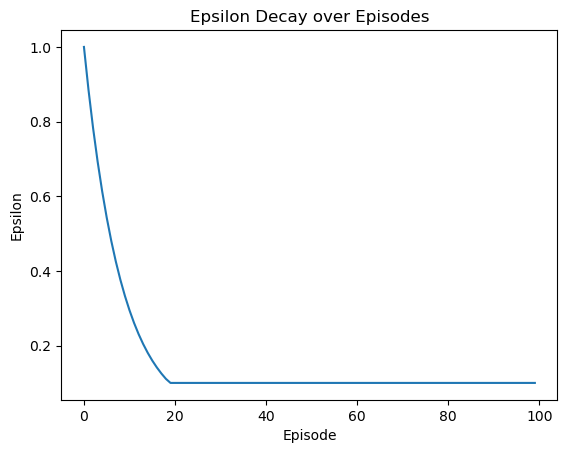

[I 2023-11-09 09:37:07,943] Trial 84 finished with value: -160.35 and parameters: {'alpha': 0.5023348338732113, 'gamma': 0.5481199198749033, 'epsilon_decay': 0.8849675690956682, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.22659846   3.6534226    3.10248344   1.66022167]
 [  3.6487943    6.92690599 -28.0745406    1.92684081]
 [-22.44775229   0.74329882   0.           3.65298431]
 [  0.         -19.55992661   0.         -19.45389337]
 [  0.           0.           0.           0.        ]
 [  1.57557999 -47.13346023   6.92690599   3.0995147 ]
 [  3.6534226    3.65231877   3.65300501   3.65280342]
 [-15.21686736 -14.87596574 -26.10954184   6.92682482]
 [  0.           0.           0.           1.96093562]
 [  0.           0.           0.         -15.21686736]
 [  3.52701236   0.           0.89367364

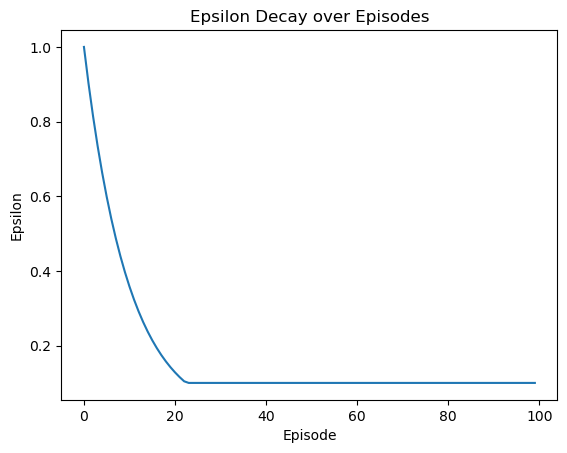

[I 2023-11-09 09:37:08,495] Trial 85 finished with value: -26.65 and parameters: {'alpha': 0.29802344207416054, 'gamma': 0.5274248850047255, 'epsilon_decay': 0.9023774740002293, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.36869337e+00  9.29554652e+00  1.28199836e+00  1.24919321e+00]
 [ 0.00000000e+00  1.14784110e+01 -7.65875099e+00  2.02315916e-01]
 [-7.65875099e+00  5.26845581e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.65875099e+00  0.00000000e+00 -7.65875099e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.79494631e+00 -4.13200975e+01  1.88158320e+01  2.21411635e+00]
 [ 2.46301423e+00  2.79653920e+01  3.72597460e+00  7.56411454e+00]
 [-1.33622864e+01 -1.11346735e+01 -7.37534318e+00  1.40730052e+01]
 [ 0.00000000e+00  2.96133981e+00  0.00000000e+00  0.0

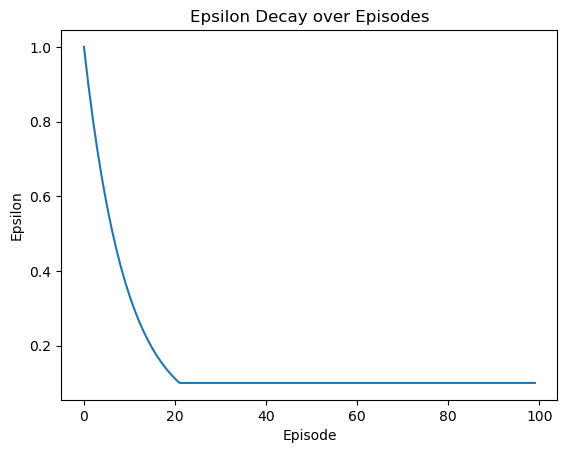

[I 2023-11-09 09:37:08,907] Trial 86 finished with value: -426.4 and parameters: {'alpha': 0.2552916997788082, 'gamma': 0.494036981504129, 'epsilon_decay': 0.8960971630729005, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  4.58148881   8.60531964  11.18138459   4.24136005]
 [  3.46846541  17.86946808 -26.93501403   6.02800107]
 [-13.024609     0.           0.           8.29362692]
 [  0.         -13.024609     0.         -20.23433456]
 [  0.           0.           0.           0.        ]
 [  1.50145785   0.          17.49849142   1.95560636]
 [ 10.59702532  20.56726939   9.07129645   6.18455439]
 [-20.23433456 -13.59635779 -13.024609    17.37994199]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  5.57833907   0.          20.56407336

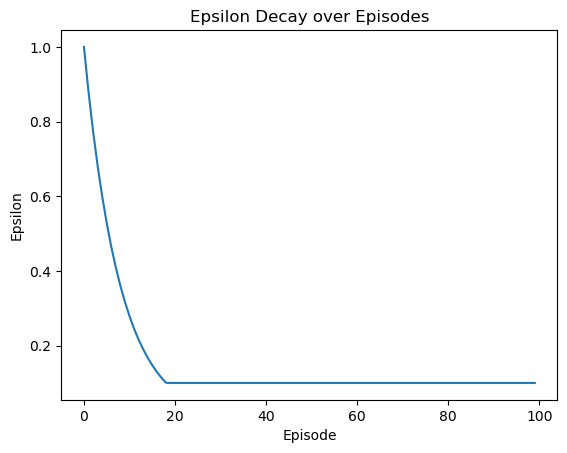

[I 2023-11-09 09:37:09,465] Trial 87 finished with value: -167.8 and parameters: {'alpha': 0.4341536332828774, 'gamma': 0.6257256533910285, 'epsilon_decay': 0.8801415552822851, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 8.74877285e+00  1.97236129e+01  8.43506004e+00  1.82390823e-01]
 [ 1.09407634e+00  2.69902863e+01 -2.10798694e+01  8.48207679e-01]
 [ 0.00000000e+00  3.27824662e-01  0.00000000e+00  1.80274286e+00]
 [ 0.00000000e+00 -1.00599033e+01  0.00000000e+00 -9.99163309e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.48834978e+00 -4.15138742e+01  3.38267255e+01  9.38418670e+00]
 [ 4.22847755e+00  4.94389002e+01  7.38308068e+00  1.28982409e+01]
 [-9.85686179e+00 -1.55592684e+01 -2.76396183e+01  2.40379785e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.5

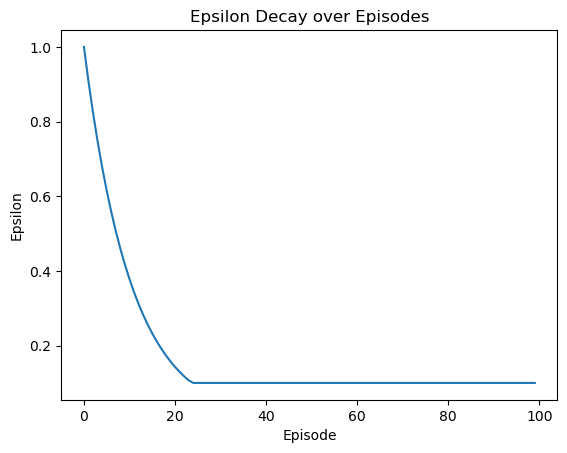

[I 2023-11-09 09:37:09,857] Trial 88 finished with value: -434.8 and parameters: {'alpha': 0.3353301111010676, 'gamma': 0.5830778079462765, 'epsilon_decay': 0.9073150160202427, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.99416421   3.4665879    4.37952157   1.49061007]
 [  3.80561074   9.88483096 -28.12578348   1.47764488]
 [-17.9546603    1.31716205   0.           4.09766036]
 [  0.           0.           0.         -24.33117577]
 [  0.           0.           0.           0.        ]
 [  0.07960715 -29.68517317   9.79783934   1.58765762]
 [  4.25343982  11.0253432    2.87091017   3.57012815]
 [-11.02904453  -7.35269635 -11.02904453   9.41139862]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           2.78836914  11.02402681

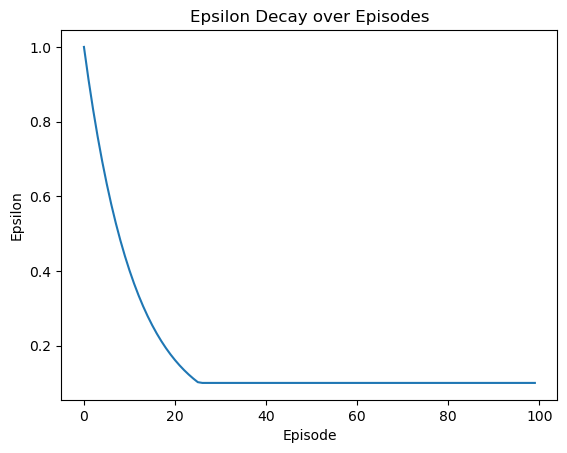

[I 2023-11-09 09:37:10,370] Trial 89 finished with value: -139.25 and parameters: {'alpha': 0.36763481759840655, 'gamma': 0.4430547758294955, 'epsilon_decay': 0.912743785324518, 'max_timesteps': 22}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.46429166e+00  3.07736153e+00  2.78004420e+00  1.45943912e+00]
 [ 2.91855005e+00  6.46486493e+00 -1.44581540e+01  1.26818587e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.44581540e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.46486494e+00 -4.85351352e+01  6.46486494e+00  3.07736148e+00]
 [ 3.07736142e+00  3.07732626e+00  3.07736146e+00  3.07736153e+00]
 [ 0.00000000e+00 -1.43896808e+01 -2.52888554e+01  6.46486494e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.4

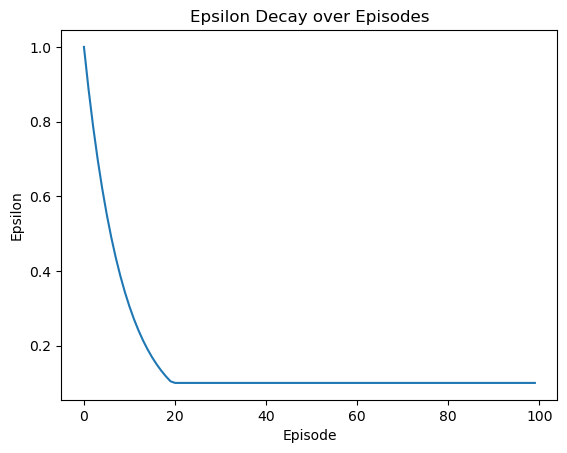

[I 2023-11-09 09:37:10,937] Trial 90 finished with value: -30.4 and parameters: {'alpha': 0.4819384677690288, 'gamma': 0.47601327496229384, 'epsilon_decay': 0.8878691011276241, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.93858448   5.15530974   4.26259157   1.99114669]
 [  0.58337259  11.82894873 -26.00326911   0.67671357]
 [  0.           3.33926701   0.           0.58337259]
 [  0.         -19.23968847   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  1.2100305  -47.5151049   12.28097742   4.41081798]
 [  2.29962059  17.34474235   4.21688971   4.61041013]
 [-28.14037951 -16.36017884 -28.68593104  12.26424959]
 [  0.           0.           0.           2.35128833]
 [  0.           0.           0.         -11.98569167]
 [  5.00076261   0.           0.        

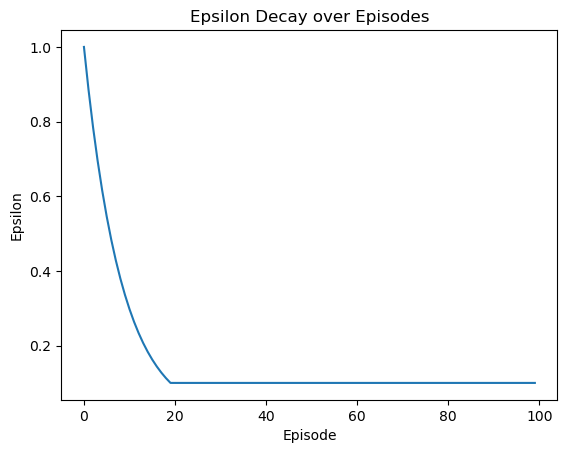

[I 2023-11-09 09:37:11,363] Trial 91 finished with value: -420.1 and parameters: {'alpha': 0.4121432205964764, 'gamma': 0.4197800847485508, 'epsilon_decay': 0.8858850924120447, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.62450010e+00  3.43051915e+00  2.16133051e+00  1.61123018e+00]
 [ 2.22708396e-02  6.74313467e+00 -2.81476758e+01  1.62096281e+00]
 [-2.19058664e+01  2.87953605e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.19058664e+01  0.00000000e+00 -1.02347957e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.74481226e+00 -4.82552154e+01  6.74481585e+00  3.43051160e+00]
 [ 3.42227906e+00  3.43038365e+00  3.43034538e+00  3.43051915e+00]
 [-2.13931027e+01 -1.45283088e+01 -2.47697786e+01  6.74480163e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

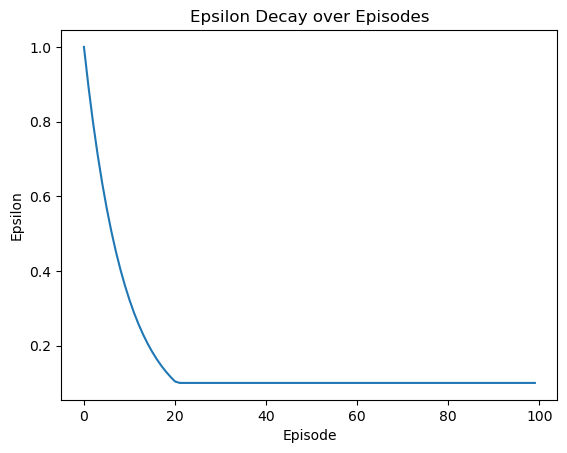

[I 2023-11-09 09:37:11,982] Trial 92 finished with value: -28.55 and parameters: {'alpha': 0.35382566444765773, 'gamma': 0.5086156869820277, 'epsilon_decay': 0.8929403961450894, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  4.06852597  13.13379255   4.60276593   6.61034161]
 [  4.72494904  22.1732952  -23.39778745   0.55074153]
 [-28.28094065   4.30528661   0.           0.        ]
 [  0.         -27.49227179   0.         -28.72293229]
 [  0.           0.           0.           0.        ]
 [  4.80860427 -40.44691585  24.53314943  12.47557982]
 [  8.24443218  36.48677042  10.7451763    9.85415127]
 [  0.         -16.17642626 -28.90352129  23.69017986]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.         -24.26463939]
 [  1.90831849   0.          29.75919407

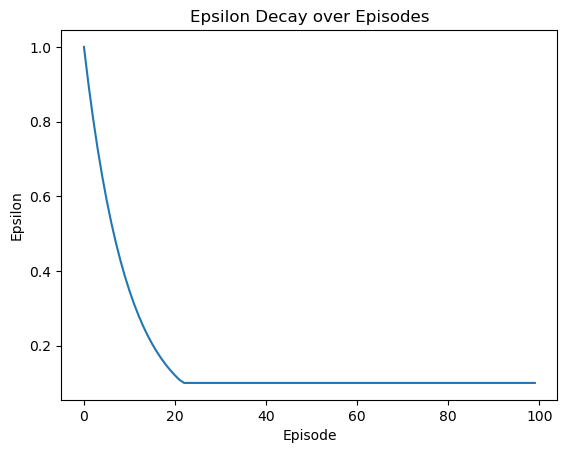

[I 2023-11-09 09:37:12,346] Trial 93 finished with value: -435.05 and parameters: {'alpha': 0.5627601494739507, 'gamma': 0.5353488183049234, 'epsilon_decay': 0.8994479973106669, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 9.45463311e-01  1.65524819e+00  4.57533973e+00  1.26112560e+00]
 [ 2.41940902e+00  1.13949035e+01 -2.89906700e+01  1.18682086e+00]
 [-1.37820849e+01  0.00000000e+00  0.00000000e+00  2.44057165e+00]
 [ 0.00000000e+00 -1.81493296e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.70843530e-01 -3.53529415e+01  8.39111574e+00  6.20972614e-01]
 [ 2.74750734e+00  1.59194552e+01  2.15271385e+00  2.50956813e+00]
 [-1.78874007e+01 -1.14799603e+01 -1.38488904e+01  6.89435170e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

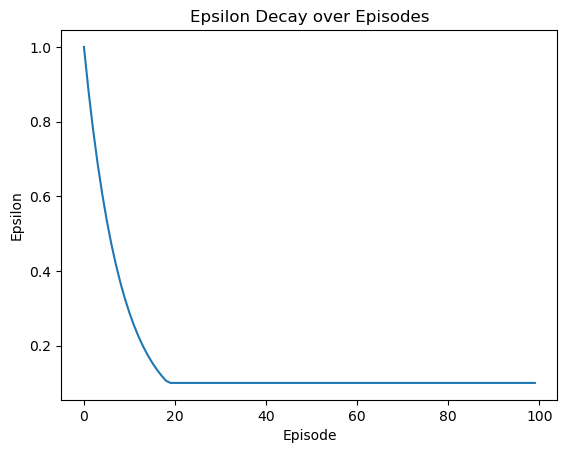

[I 2023-11-09 09:37:12,781] Trial 94 finished with value: -234.35 and parameters: {'alpha': 0.26626277227211065, 'gamma': 0.40781072277298647, 'epsilon_decay': 0.882750371035754, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  1.94151679   4.60203921   3.18526842   1.14533133]
 [  1.25006967   9.56281457 -22.17351338   0.        ]
 [-24.99909378   0.90726118   0.           0.        ]
 [  0.         -10.83083839   0.         -10.83083839]
 [  0.           0.           0.           0.        ]
 [  1.48762297 -42.45770042  10.16114285   2.46612538]
 [  1.38368195  11.39562426   3.72527741   2.72249309]
 [-10.83083839 -14.01966358 -17.64924646   9.77700541]
 [  0.           0.           0.           1.3066196 ]
 [  0.           0.           0.         -17.75144144]
 [  1.66146477   4.98383606  11.39562353

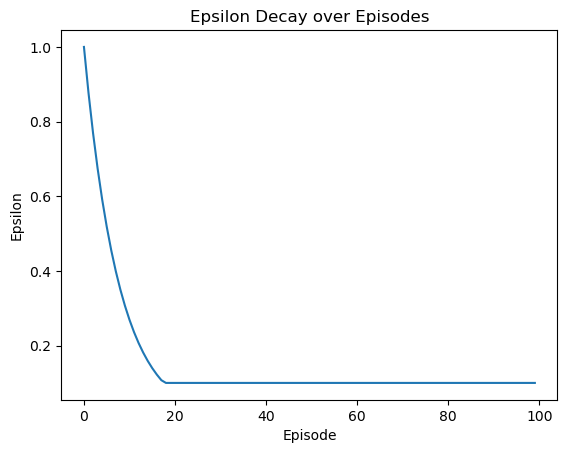

[I 2023-11-09 09:37:13,186] Trial 95 finished with value: -149.15 and parameters: {'alpha': 0.3610279464164213, 'gamma': 0.45290567024423944, 'epsilon_decay': 0.8769462647431931, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 7.63089516e-01  1.40209904e+00  2.80424298e+00  7.93727563e-01]
 [ 1.53549193e+00  8.39243730e+00 -2.85194953e+01  5.49676674e-01]
 [-9.79163588e+00  0.00000000e+00  0.00000000e+00  2.52858587e+00]
 [ 0.00000000e+00 -9.79163588e+00  0.00000000e+00 -2.37164092e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.58163170e-01 -3.96400892e+01  8.19285921e+00  1.15721154e+00]
 [ 2.26558545e+00  1.01527640e+01  2.05386649e+00  2.44060150e+00]
 [-9.73031970e+00 -6.52775725e+00 -2.37763998e+01  7.72038992e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  8.8

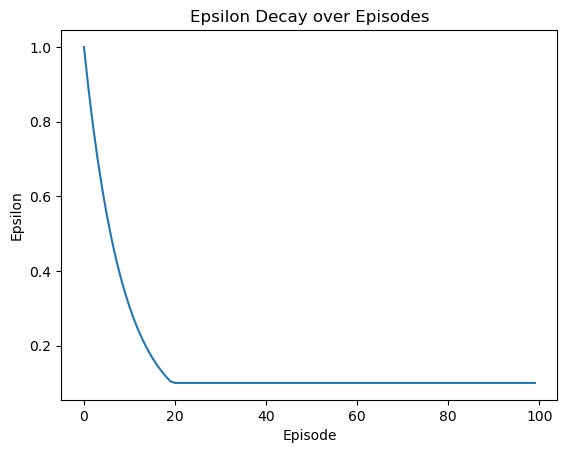

[I 2023-11-09 09:37:13,545] Trial 96 finished with value: -427.2 and parameters: {'alpha': 0.32638786271099324, 'gamma': 0.334139284176348, 'epsilon_decay': 0.8877202813903431, 'max_timesteps': 25}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  2.94250057   6.07841014   4.92807007   2.85210729]
 [  2.99348086  11.48584188 -13.81076336   1.90152328]
 [-13.81076336   2.84456834   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  3.0170456  -42.92092788  11.96192001   5.35229216]
 [  3.91590768  13.70061059   5.91625114   5.56292996]
 [-21.00171122   0.           0.          11.93903253]
 [  0.           0.           0.           0.82903239]
 [  0.           0.           0.           0.        ]
 [  5.2529423    5.56696815  13.70032513

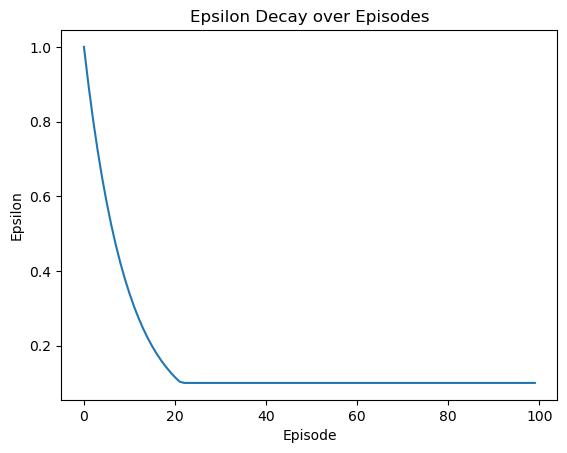

[I 2023-11-09 09:37:13,925] Trial 97 finished with value: -145.3 and parameters: {'alpha': 0.46035877869766706, 'gamma': 0.5081466966445556, 'epsilon_decay': 0.8975902169307223, 'max_timesteps': 23}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 2.50439890e+00  7.69461541e+00  3.73350935e-01  6.98587761e-01]
 [ 1.90853558e-01  1.26058939e+01 -1.92230034e+01  7.60420617e-01]
 [-1.48397773e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.67380291e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.12528624e+00 -4.78264861e+01  1.63407646e+01  5.17310077e+00]
 [ 3.10961538e+00  2.40839109e+01  3.82120371e+00  5.61595256e+00]
 [-1.48397773e+01 -1.47202458e+01 -1.90086371e+01  1.26725090e+01]
 [ 0.00000000e+00  1.35065079e+01  0.00000000e+00  0.0

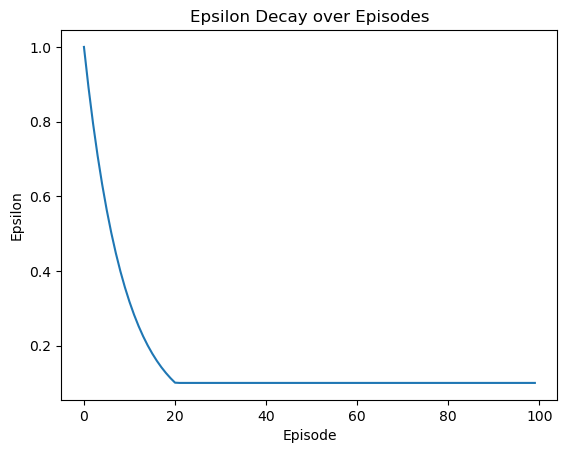

[I 2023-11-09 09:37:14,283] Trial 98 finished with value: -402.25 and parameters: {'alpha': 0.2891267637470229, 'gamma': 0.47088604763501535, 'epsilon_decay': 0.8915368640921495, 'max_timesteps': 24}. Best is trial 36 with value: -468.95.


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[  0.87838063   7.93476728   3.36610276   0.87838063]
 [  0.77531416   9.30147985 -11.46467873   0.        ]
 [  0.           0.           0.           0.        ]
 [  0.         -11.46467873   0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  2.25134009 -47.70510053  14.18637298   5.50525837]
 [  4.01466363  16.38077239   3.84863803   4.09578817]
 [-18.54806218 -12.36537479 -18.54806218  10.17704116]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  6.62337592   0.           0.        

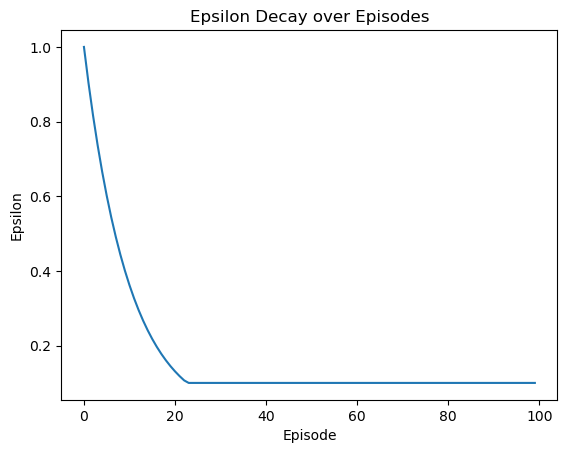

[I 2023-11-09 09:37:14,828] Trial 99 finished with value: -15.2 and parameters: {'alpha': 0.38215595774133054, 'gamma': 0.5611831573804417, 'epsilon_decay': 0.9033188669193006, 'max_timesteps': 10}. Best is trial 36 with value: -468.95.


In [43]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)
best_params = study.best_params

Best Parameters: {'alpha': 0.24211692753844455, 'gamma': 0.23067740713154447, 'epsilon_decay': 0.8911270892082245, 'max_timesteps': 25}
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table:
[[ 1.80522209e-01  1.44267719e+00  6.27559549e-01  2.08437600e-01]
 [ 2.48632441e-01  5.08731470e+00 -1.27683975e+01  0.00000000e+00]
 [-7.26350783e+00  7.63940232e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.24987733e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.38019034e-01 -3.32851618e+01  6.25409736e+00  8.81368592e-01]
 [ 3.39833468e-01  5.43659323e+00  7.63940232e-02  1

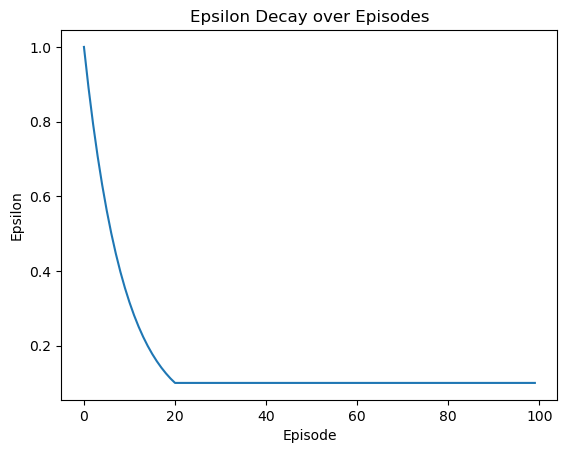

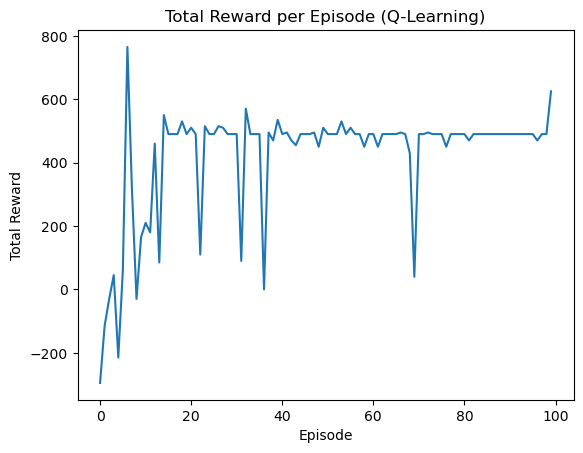

In [48]:
# Worked Best
print(f"Best Parameters: {best_params}")
q_table_q_learning, Qrewards = q_learning(env, num_episodes=100, epsilon_start=1.0, epsilon_min=0.1, **best_params)
plot_rewards(Qrewards, "Total Reward per Episode (Q-Learning)")

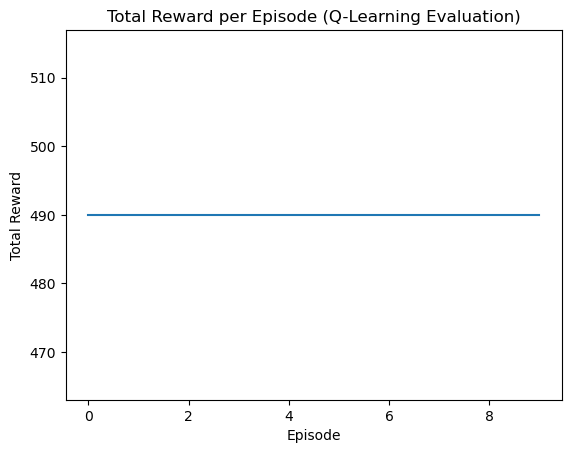

In [49]:
# Evaluate the Q-Learning policy
eval_rewards = evaluate_policy(env, q_table_q_learning, num_episodes=10, max_timesteps=10)
plot_rewards(eval_rewards, "Total Reward per Episode (Q-Learning Evaluation)")

C:\Users\karti\AppData\Local\Temp\ipykernel_18276\600712846.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Paired', 10)


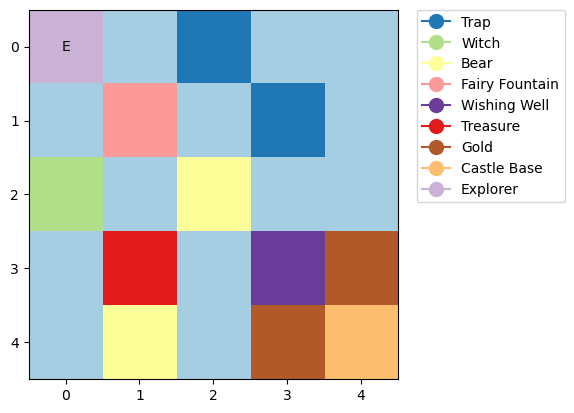

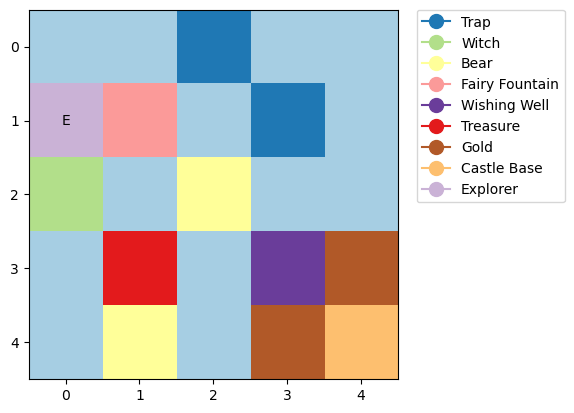

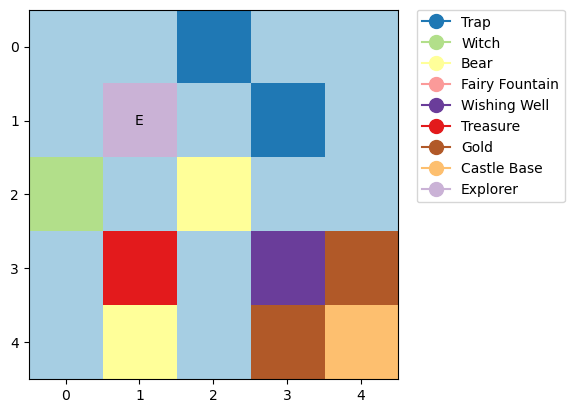

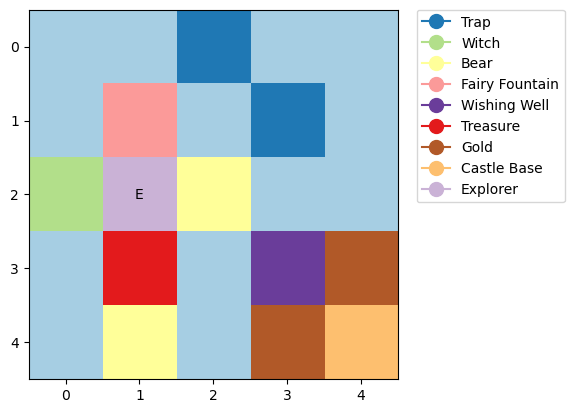

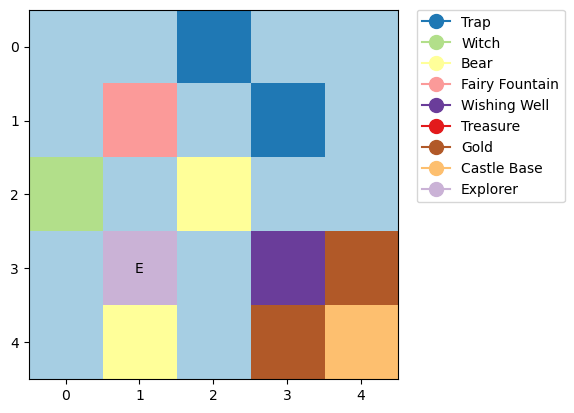

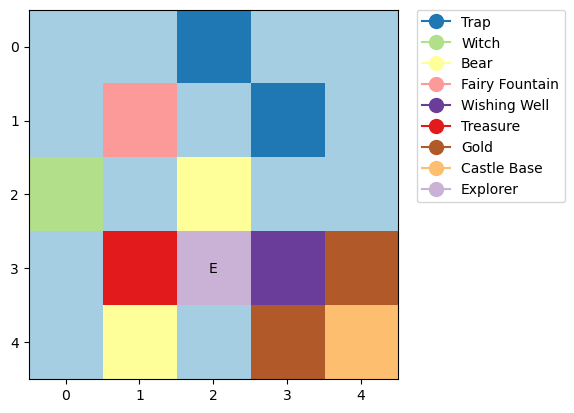

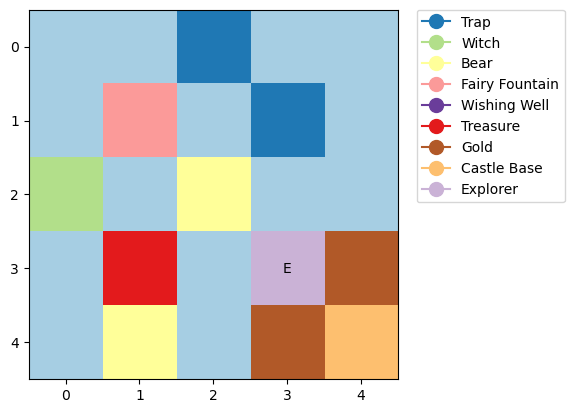

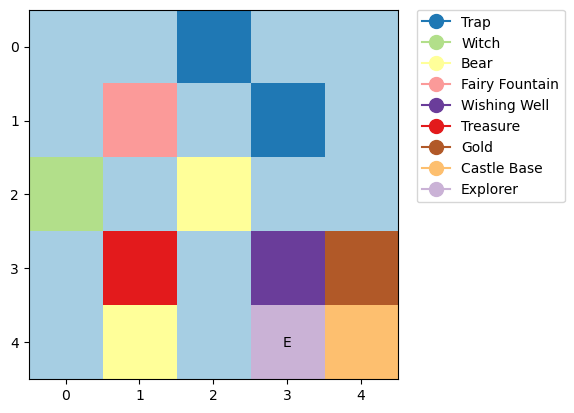

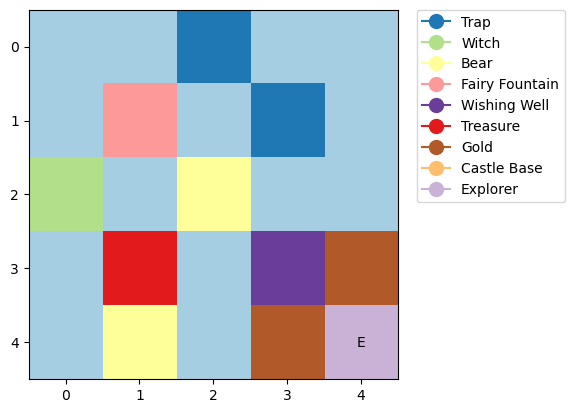

Episode done with total reward: 490


In [50]:
# Run the best episode
run_best_episode(env, q_table_q_learning)

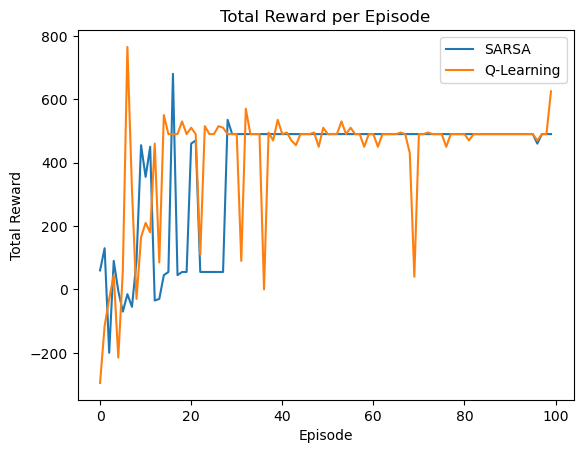

In [51]:
plot2_rewards([Srewards, Qrewards], ["SARSA","Q-Learning"], "Total Reward per Episode")

In [22]:
def objective(trial):
    alpha = trial.suggest_uniform('alpha', 0.1, 1)
    gamma = trial.suggest_uniform('gamma', 0.1, 1)
    epsilon_start = 1
    epsilon_min = 0.1
    epsilon_decay = trial.suggest_uniform('epsilon_decay', 0.87, 0.999)
    num_episodes=100
    max_timesteps = trial.suggest_int('max_timesteps',8,25)
    env = MysticForestExplorer()

    _, _, rewards_per_episode = double_q_learning(env, num_episodes, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay, max_timesteps)
    mean_reward = np.mean(rewards_per_episode)
    
    return -mean_reward

In [23]:
def double_q_learning(env, num_episodes, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay, max_timesteps):
    q_table1 = np.zeros((env.observation_space.n, env.action_space.n))
    q_table2 = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_per_episode = []
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        epsilon = max(epsilon_min, epsilon_start * (epsilon_decay ** episode))
        
        for timestep in range(max_timesteps):
            action = choose_action(q_table1 + q_table2, state, epsilon, env.action_space.n)
            next_state, reward, done = env.step(action)
            if np.random.random() < 0.5:
                best_next_action = np.argmax(q_table1[next_state])
                q_table1[state, action] = q_table1[state, action] + alpha * (reward + gamma * q_table2[next_state, best_next_action] - q_table1[state, action])
            else:
                best_next_action = np.argmax(q_table2[next_state])
                q_table2[state, action] = q_table2[state, action] + alpha * (reward + gamma * q_table1[next_state, best_next_action] - q_table2[state, action])
            state = next_state
            total_reward += reward
            if done:
                break
        rewards_per_episode.append(total_reward)
    return q_table1, q_table2, rewards_per_episode

In [24]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)
best_params = study.best_params

[I 2023-11-09 09:31:46,554] A new study created in memory with name: no-name-579fc818-dbdc-4cde-a0f9-ae2cb61c0cc1
C:\Users\karti\AppData\Local\Temp\ipykernel_18276\2840504350.py:2: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.1, 1)
C:\Users\karti\AppData\Local\Temp\ipykernel_18276\2840504350.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  gamma = trial.suggest_uniform('gamma', 0.1, 1)
C:\Users\karti\AppData\Local\Temp\ipykernel_18276\2840504350.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  epsilon_decay = trial.su

[I 2023-11-09 09:31:50,472] Trial 31 finished with value: -435.55 and parameters: {'alpha': 0.9339130981273129, 'gamma': 0.7245008933034011, 'epsilon_decay': 0.9499053033738889, 'max_timesteps': 24}. Best is trial 22 with value: -437.3.
[I 2023-11-09 09:31:50,601] Trial 32 finished with value: -371.8 and parameters: {'alpha': 0.932168526805429, 'gamma': 0.7644006054565933, 'epsilon_decay': 0.9460598912835618, 'max_timesteps': 24}. Best is trial 22 with value: -437.3.
[I 2023-11-09 09:31:50,751] Trial 33 finished with value: -406.95 and parameters: {'alpha': 0.8804709414501677, 'gamma': 0.7290037274528595, 'epsilon_decay': 0.9506459569346644, 'max_timesteps': 23}. Best is trial 22 with value: -437.3.
[I 2023-11-09 09:31:50,862] Trial 34 finished with value: -211.1 and parameters: {'alpha': 0.9391512903412386, 'gamma': 0.6668882457155301, 'epsilon_decay': 0.9643961397039472, 'max_timesteps': 22}. Best is trial 22 with value: -437.3.
[I 2023-11-09 09:31:50,962] Trial 35 finished with valu

[I 2023-11-09 09:31:54,792] Trial 66 finished with value: -404.35 and parameters: {'alpha': 0.8415332985559872, 'gamma': 0.8418909410017655, 'epsilon_decay': 0.9452748204407011, 'max_timesteps': 25}. Best is trial 53 with value: -437.6.
[I 2023-11-09 09:31:54,882] Trial 67 finished with value: -292.7 and parameters: {'alpha': 0.9245973088590546, 'gamma': 0.8948742133237255, 'epsilon_decay': 0.9621914366688753, 'max_timesteps': 22}. Best is trial 53 with value: -437.6.
[I 2023-11-09 09:31:54,973] Trial 68 finished with value: -98.1 and parameters: {'alpha': 0.8778536468744904, 'gamma': 0.7755679169385833, 'epsilon_decay': 0.9466311057336521, 'max_timesteps': 21}. Best is trial 53 with value: -437.6.
[I 2023-11-09 09:31:55,055] Trial 69 finished with value: -261.35 and parameters: {'alpha': 0.8115743875668929, 'gamma': 0.7385061802235107, 'epsilon_decay': 0.9353663709457379, 'max_timesteps': 23}. Best is trial 53 with value: -437.6.
[I 2023-11-09 09:31:55,137] Trial 70 finished with valu

Best Parameters: {'alpha': 0.8645468084816089, 'gamma': 0.74815283939248, 'epsilon_decay': 0.9513445027257623, 'max_timesteps': 24}


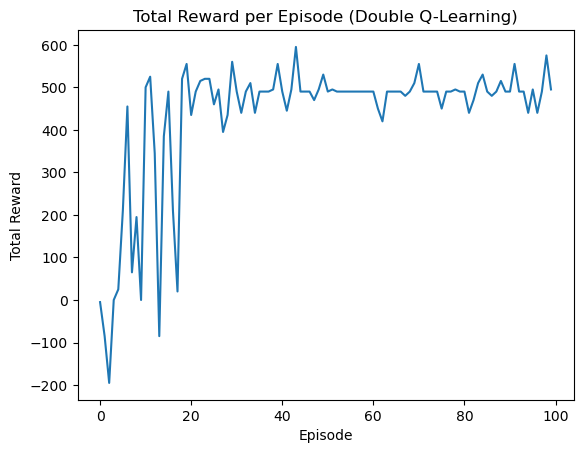

In [25]:
# Worked Best
print(f"Best Parameters: {best_params}")
q_table_dq_learning1, q_table_dq_learning1, DQrewards = double_q_learning(env, num_episodes=100, epsilon_start=1.0, epsilon_min=0.1, **best_params)
plot_rewards(DQrewards, "Total Reward per Episode (Double Q-Learning)")

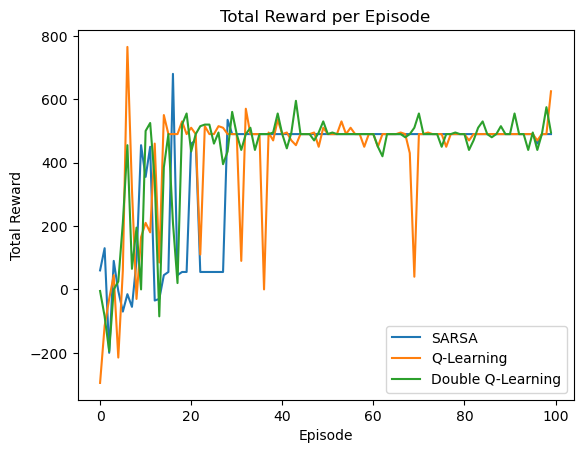

In [52]:
plot2_rewards([Srewards, Qrewards, DQrewards], ["SARSA","Q-Learning","Double Q-Learning"], "Total Reward per Episode")

In [27]:
# Sarsa and Q-Learning adopted from CSE474